In [1]:
import camb
from camb import model, initialpower
import healpy as hp 
import numpy as np
from pylab import *
rcParams['image.cmap'] = 'jet'

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2551, 4)


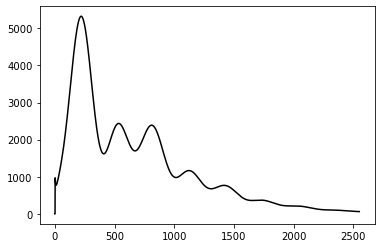

In [2]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)


#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)

ls = np.arange(totCL.shape[0])
clf()
plot(ls,totCL[:,0], color='k')

/home/stagiaire/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/stagiaire/miniconda3/envs/py3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/stagiaire/miniconda3/envs/py3/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/stagiaire/miniconda3/envs/py3/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cboo

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


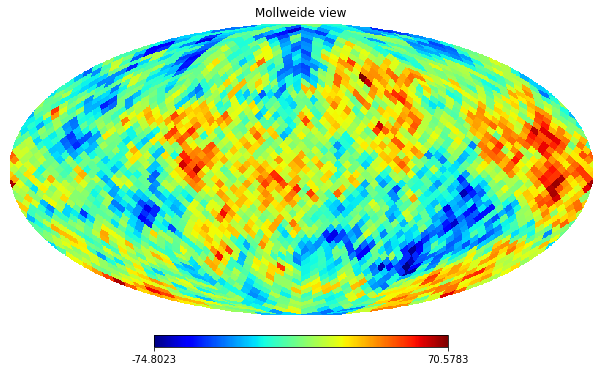

In [3]:
CL = totCL[:,0]/ls/(ls+1)
CL[0]=0

ns = 16
map =hp.synfast(CL[0:5*ns], ns, pixwin=False)
hp.mollview(map)

(32,) 32
(528,) 528.0
complex128
[ 8.12288232e-03+0.00000000e+00j -1.14087807e-02+0.00000000e+00j
 -1.69765543e+01+0.00000000e+00j -2.19175082e+01+0.00000000e+00j
  3.68065261e+00+0.00000000e+00j  1.70337519e+00+0.00000000e+00j
 -8.81584481e+00+0.00000000e+00j  2.26345945e+00+0.00000000e+00j
 -2.34646939e+00+0.00000000e+00j  1.72636008e+00+0.00000000e+00j
 -1.81073634e+00+0.00000000e+00j  5.35624159e+00+0.00000000e+00j
  2.39779064e+00+0.00000000e+00j -1.73506651e+00+0.00000000e+00j
 -2.09338460e+00+0.00000000e+00j  5.03961129e-01+0.00000000e+00j
  1.35795392e+00+0.00000000e+00j  2.44392713e+00+0.00000000e+00j
  1.70507066e-01+0.00000000e+00j  1.66512950e-01+0.00000000e+00j
 -2.38524036e+00+0.00000000e+00j  2.70744688e+00+0.00000000e+00j
 -3.93385935e-01+0.00000000e+00j  1.34842612e+00+0.00000000e+00j
  1.73405218e+00+0.00000000e+00j  1.01830713e+00+0.00000000e+00j
 -9.72538631e-01+0.00000000e+00j  1.75397466e+00+0.00000000e+00j
 -2.74486106e-01+0.00000000e+00j  4.04708008e-01+0.000000

(0, 31)

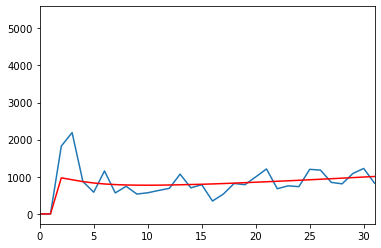

In [4]:
lmax = 2*ns-1
nl = 2*ns
nalm = (2*ns)*(2*ns+1)/2
outcl, outalm = hp.anafast(map,alm=True, lmax=lmax)
print(outcl.shape, nl)
print(outalm.shape, nalm)
print(outalm.dtype)
print(outalm[0:50])
ll = np.arange(outcl.shape[0])
clf()
plot(ll,ll*(ll+1)*outcl)
plot(ls, ls*(ls+1)*CL, 'r')
xlim(0,max(ll))

In [5]:
clt = CL[0:nl]
lt = ll[0:nl]

nbmodels = 100000
nnn = int(nbmodels/30)
npixok = 12*ns**2
limit_shape = 3*ns
okpix = np.arange(npixok)
mymaps = np.zeros((nbmodels, npixok))
myalms = np.zeros((nbmodels, int(nalm)), dtype = complex128)
expcls = np.zeros((nbmodels, nl))
mycls = np.zeros((nbmodels, nl))
expcls = np.zeros((nbmodels, nl))
allshapes = np.zeros((nbmodels, len(ls)))
for i in range(nbmodels):
  ylo = np.random.rand()*2
  yhi = np.random.rand()*2
  if (i/nnn)*nnn == i: 
    print(i,ylo,yhi)
  theshape = ylo+(yhi-ylo)/(limit_shape)*ls
  theshape[theshape < 0] = 0
  theshape[limit_shape:] = 0
  allshapes[i,:] = theshape
  theCL = CL*theshape
  themap = hp.synfast(theCL, ns, pixwin=False, verbose=False)
  mymaps[i,:] = themap[okpix]
  expcls[i,:], myalms[i,:] = hp.anafast(themap, lmax=lmax, alm=True)
  mycls[i,:] = theCL[0:nl]


0 1.9563149128463033 0.2240610006501993
1 1.367370053559206 0.4726423409169822
2 0.6631491752475025 0.7943459470434595
3 1.2455430601285595 1.259083300792053
4 0.21623926985025732 0.49395343420139337
5 0.7879787443394484 0.09397196466953384
6 1.7295709965631036 1.045672894425844
7 0.6024928866197541 1.0316786531898237
8 1.8632539588079375 0.7202910141606749
9 1.2933016545073748 1.663250212190793
10 0.15085390738561433 0.15308108806794296
11 1.258678470429591 1.2474097438722265
12 1.3523060287094686 1.696742857636862
13 1.4189647029661567 1.2403092971610323
14 0.0808662236579365 0.5707463400737705
15 1.8018365849413254 0.7558390184765136
16 1.7430023507896846 0.7424502293592283
17 1.3199570752266716 0.2252000945292263
18 1.9160327844476932 1.187459673107358
19 0.3117431108052693 0.30169425873780265
20 0.42045170232744145 1.2108834585958783
21 0.9607833011479312 0.6358195050268209
22 1.913777168632747 1.974819936134616
23 1.4322099324113637 0.2366860845437413
24 1.7428066778510902 1.9465

248 1.5593224782008794 0.5079649881473438
249 1.4730852748275571 1.263231940839646
250 1.7485561739671194 0.280294901059545
251 0.30820277755055603 0.36696425289909307
252 1.7324358789165757 1.573379358047889
253 0.43150068350386417 1.030769319983277
254 1.7953814216195194 0.7088490793420761
256 1.6206195775588061 1.7921941151272487
257 1.2152765989867287 0.6133814094686798
258 1.6265551060976355 1.3978378236233815
259 0.24196729847029874 1.182829857493838
260 0.4688044015630317 0.8167736531761465
261 1.3326565358206692 0.06492756599324245
262 1.7315281277940953 1.4679572673443488
263 1.4754231428447364 0.6650631610397344
264 0.1288462637317771 1.5311417912972685
265 1.6859534385347772 0.9209206642300403
266 0.37570470923770394 0.10267686955723199
267 0.8798816367218147 0.477710602804176
268 0.3696484220708296 1.0216958822377789
269 1.8607412476102172 0.32164261398912264
270 1.9847870519420965 1.7455502491623323
271 1.188285543037021 1.6321733207713371
272 1.8135127086872134 1.90671904

517 0.27703207252976725 1.8190660833099386
518 1.4919262517902294 0.8400793805551674
519 1.3203178266140743 1.7673310132624904
520 0.08755025368532032 0.9458746429941762
521 1.2189869535720297 0.196431694967393
522 1.2206388659041068 1.3545642662000328
523 0.7379027936809393 1.2668538857459997
524 1.9816682921452873 0.30435225931078547
525 1.877641698806014 0.21219465927684356
526 0.4400369622262721 0.18233146041224257
527 1.4603781879651179 1.4755414352775194
528 0.28890962225702355 0.09473434190151253
529 1.1913957536613013 0.21189579702600447
530 1.7604550319298826 0.8439906460373039
531 0.5172049572497077 0.2711426960708274
532 1.8170602347846223 1.4840709039962345
533 1.5803248545501354 1.6880529577190468
534 0.5447988147147658 0.7969012671580551
535 0.5413100139856495 0.7583075307335867
536 0.46465009660940804 1.2659669730200995
537 0.8042857892904873 0.4790770004786191
538 1.5444501341493415 0.7003166338623288
539 0.11462209190055206 0.588868569442724
540 0.8144656825482055 1.48

720 1.9753866721301638 0.5050772065517444
721 0.14648427858944868 0.0999656091433494
722 1.7797405523620464 0.7632111152857992
723 0.19994854943445506 1.4609589753227832
724 0.895399414691088 1.5251118519076805
725 0.5178296624867205 0.8982885446579063
726 1.9370598210245127 0.8077495912800692
727 1.53464122351803 1.654218567600726
728 0.9324951669408645 1.6525365051882788
729 1.2542428150728753 1.7376164682230097
730 0.6649662091702717 0.40831059160604677
731 0.6024252870428588 1.8876444348183736
732 0.9694278986682403 1.9823786273241175
733 1.0117134794904385 0.16657607154717113
734 1.501190223403205 0.678284581250395
735 0.43435523710325064 1.4314432042620902
736 0.16234739137957344 1.1434533401990101
737 0.5245678606630986 0.9463173615849612
738 0.0549625383554766 0.053480611591866456
739 0.32402748183262897 1.8941099928240281
740 1.8777911897782305 1.1289248700593264
741 1.6765203102557322 1.342627260741683
742 0.3268589245207423 1.5582195592162729
743 0.04630915805365721 0.588684

983 1.1783168759544793 0.3403790398054416
985 0.2794329841044094 1.5659047056166495
987 1.513929582286415 1.1907421156300875
988 0.4403497205328992 1.6672970381500418
989 1.4509621720616974 1.102117489381352
990 1.4309096859663228 1.0606604619994735
991 1.8233323135034407 0.5568398812866808
992 0.9165793048983926 1.5056634615747333
994 1.7319051068108526 0.21861856790316847
996 0.28891207111867345 0.6725357934071374
998 0.7949921953940924 0.9749991233999433
1000 0.994683177470548 0.19218165206037852
1002 0.8157860900565279 0.7511504280357073
1004 0.7280763113583288 1.951420408882419
1006 1.2329817024596836 1.8468868981068414
1008 1.345510920672263 1.3587680371323363
1010 1.665378189600088 1.7758981563046683
1012 1.2750057820730343 1.262324702115396
1013 1.603024199132638 0.5245500883322172
1014 1.7048980713135256 1.9504504911869949
1015 0.35536250627979427 0.7498091100303024
1016 0.9436506339674602 1.545800411476456
1017 0.9277185431237474 1.570272995812524
1019 0.355892493711349 0.880

1226 0.41128584417115865 1.6516395228713092
1227 0.05404616381286553 0.4109344374935655
1228 1.3535151016267921 1.0807140316227608
1229 1.1158619004230272 0.4799052672010702
1230 1.327287012872629 1.623847311072271
1231 1.3069300368792234 0.466291334933975
1232 0.4108463918241194 0.5019378303841189
1233 0.12171517891851358 0.574488754891946
1234 0.41966788675365985 0.23340257539033593
1235 1.2764644820610351 1.0359603737786118
1236 0.48675259727318676 0.37025851946331545
1237 0.8180855458876057 1.2270963186976858
1238 0.5893710139872717 0.955664846337148
1239 1.1820517658937666 1.0885420471186604
1240 1.935306382146351 0.8009328877299822
1241 1.2712426303268713 1.4741374837803274
1242 0.9693074231839103 0.019556390273237856
1243 1.6872001697372196 1.2541579673179581
1244 1.1399710162605117 0.3336870619351786
1245 0.3471130254337931 1.6895845630278044
1246 1.2957431446742649 0.9219535616861283
1247 0.1962808114712089 0.6704468685493947
1248 0.8509428715717624 0.5788641319168071
1249 0.0

1458 1.975277313975951 0.8024083085318814
1459 1.903678473976218 0.5157150960875194
1460 1.420465054685501 1.940534840221902
1461 1.2863859677800382 1.6494255893370533
1462 0.6634933637384461 1.9505558888738028
1463 1.2380796136986594 1.7296516516773344
1464 1.2626671589483738 1.7522433483190312
1465 0.6244840672851939 1.7815454280157268
1466 1.5316119032078006 1.5080854980580898
1467 1.8234556278467773 0.20369107262451713
1468 1.482919853337286 1.660131055525866
1469 1.8279087702785257 1.1432798618291045
1470 0.9303985682939493 1.1078236956376581
1471 1.626728934455709 0.16106651854645526
1472 0.5675254197281843 1.3438915896521033
1473 0.509300508225581 1.4178199867576036
1474 1.3932174865445104 1.5504322676619813
1475 1.1571921573260697 1.147088212950829
1476 0.7104098524692599 0.23976825153835435
1477 1.9781927982936538 0.0051396767570812685
1478 1.3340738968217931 1.1209091981206663
1479 0.9447017873723549 0.8298282421998964
1480 0.9674022077406941 1.6900427068216861
1481 0.3951753

1678 1.940318961220287 1.6936389457636762
1679 0.9994370212456911 0.651572426517089
1680 0.8138610851073136 1.47308219333029
1682 1.439368637896709 0.6771966772613527
1683 0.28859466439979764 1.8940192222374934
1684 1.000173721671419 0.13658196791035593
1687 1.1984423163205493 1.4991904756012824
1688 1.1351604549403402 1.8609096839149677
1691 1.6062412892110105 0.23175048593441216
1692 1.677742649626056 1.9476652572627442
1695 1.4260957029863426 0.202903337259277
1696 0.8867346028318566 1.2084842312110862
1699 1.896606842261875 1.4005828686590547
1700 0.7981678092247615 1.122054919773834
1701 1.014151560870945 1.3831036566984627
1703 1.8724492435576152 1.8312819290582485
1704 1.0258278884209793 1.5730336926637885
1705 0.5469320074936177 1.8347300479805155
1707 1.3823389691805865 1.9028901297412455
1708 0.08826708198564526 0.10417362907409933
1709 0.2816919236178308 0.8222069078109466
1712 1.2205717655221135 0.019438061789426975
1713 0.9998983033497584 1.6725083399165808
1716 1.07557794

2042 0.4723608881935013 0.9784765596330891
2045 1.757290336003798 0.2405088799815316
2046 0.21146412653062496 1.5146124717717524
2048 0.4373719877237696 1.8476551881179986
2049 0.921857480785212 1.9180422513336453
2050 1.6346006233710297 1.041383828169768
2051 0.7616173304073091 0.5606091834356066
2052 0.5514217540083799 1.8755650189059645
2053 0.8805383087966134 0.05804102541632328
2054 0.9775653539112155 0.19276746984222082
2055 0.3177440546570647 1.455625423042777
2056 1.1985059847545418 0.30008039024654276
2057 0.5065365717354049 0.1238119989966624
2058 0.11896951743616979 1.4503809038121525
2059 0.9067270415839426 1.6848778007179261
2060 0.3628974977026225 1.647480219288122
2061 0.6099071889203103 0.8613072340715688
2062 1.2388754505206263 0.0926568940868151
2063 1.3069823323797054 1.362111017250213
2064 1.931937130607412 0.8865010077184934
2065 1.8080125237280678 0.2378626605896541
2066 1.4456583549647477 1.190809174989086
2067 0.008505950052491995 1.3952506493212355
2068 1.02863

2236 0.32498068477755626 1.5612747347438376
2237 0.7454588308645878 1.874521241905202
2238 0.5786810697492666 1.6099827048437916
2239 1.6439570865296607 1.132237765007602
2240 1.8220856836951138 1.2795823855522048
2241 1.1873269117413978 0.8172193810643738
2242 0.03411249726299492 0.9616830242748129
2243 0.7859141381728778 1.1730103342778617
2244 1.5976011512988328 1.5290666855502817
2245 1.619649157627591 0.3326255784037724
2246 1.9389566650886223 0.8455184089764523
2247 1.4683256267911988 0.09054462552196285
2248 0.26121020104206405 1.8996311716479892
2249 1.8918917404639248 1.6600671372100917
2250 1.8367320217594276 1.767513327552849
2251 1.2918591080852375 1.6278222708292769
2252 0.7488104245938696 1.5705446922004278
2253 1.1190754153933016 1.3947876819364444
2254 0.9855572612159293 1.6759080511842797
2255 0.2806729062700999 0.041347574645121954
2256 1.1648658104903196 0.47980373514627916
2257 0.5046480876032868 0.6797968850277416
2258 1.7318022414704204 0.02451896395740749
2259 1.

2483 1.3432511954095574 1.3025733273391848
2484 0.26220303353371466 0.13960399993699513
2485 1.5562278226733375 1.0982519737245517
2486 0.9768083599715633 1.9169692027391174
2487 0.8761173959218977 1.8098404809546413
2488 0.5831467791125926 1.231052673696725
2489 0.9399843820122493 1.20387227437661
2490 1.8825050783721893 0.4499681174754073
2491 0.02003712840073124 1.1170427097535862
2492 1.1846425999126962 1.1088751119195908
2493 1.3192144124475944 1.1352147235588492
2494 0.4525136251492907 0.47810908221050674
2495 0.002197724315290861 1.6359766628245842
2496 0.36939028254534145 0.956849607117098
2497 1.2954098939348764 1.2994621195307112
2498 0.2081404152845301 0.8089838405396335
2499 1.5640399994414986 1.849411837980248
2500 1.0234734253315734 0.26505394411452365
2501 1.5280572749795571 1.0455021932828583
2502 0.9896054995608963 1.1858752296931618
2503 0.6515440858549733 1.9784820970712853
2504 0.41785284808631085 0.1503094945069101
2505 0.14239587679699484 1.2249769343801267
2506 1

2724 0.16244768801047949 1.265370088886975
2725 1.5354314998179008 1.9422876556949666
2726 1.2829933420568764 0.3530671192460513
2727 1.3142545156743815 1.7553755639681838
2728 1.0025227675791215 1.1665983123284924
2729 0.7605865605746696 1.60833462209968
2730 0.3190034217941564 0.26520013370596685
2731 0.3710153415757058 1.0705421647346915
2732 0.542056087499672 0.6113865020617917
2733 1.0614737914123584 1.3240995718810376
2734 0.20002156040874652 1.2366683400952796
2735 1.2148595911422069 0.6156864095234351
2736 1.0136320135255306 0.32472306082466296
2737 0.1810294813642721 1.6285706943542164
2738 1.8727691889173668 0.16626874179348072
2739 1.6736097703911466 0.7004544538813249
2740 0.6518134895429635 0.15739862273612615
2741 0.19603343497625736 0.032592546282175006
2742 1.4653054180878473 0.8557708985036181
2743 0.238307827117624 1.3507263672787786
2744 0.3623511348789743 1.325135024271816
2745 0.3662121378845029 0.3372347605864563
2746 1.5108504098179063 1.992088361689626
2747 0.92

2978 0.08603479285552806 1.269249736683612
2979 0.4337686867517301 0.9945725557056455
2980 0.4742884824415352 1.854576776187674
2981 1.9669529416910057 1.3976571096286092
2982 1.2826693967343865 0.6414245542956496
2983 1.1904818864550015 1.4243586173650262
2984 1.7383362784790157 1.870018977310543
2985 0.9526111897149694 1.100326043443813
2986 1.9186817529236488 1.651997590008692
2987 1.568711902002974 0.46774763076355597
2988 1.105605067340968 0.6665727388592804
2989 0.8860281842469184 1.1682339085335292
2990 1.8777195391890829 0.2214345877431585
2991 1.8000670505385177 0.9825494946091953
2992 1.8133927198231203 1.9061201047897263
2993 1.100451521850113 1.2510577215005811
2994 0.569198413211506 1.6230935247568774
2995 0.5760738510744017 0.27547666391989933
2996 1.1682667619510982 0.028110109602395683
2997 1.0843350921127572 1.9884093483121128
2998 0.380432818237304 0.9206388621606063
2999 0.39937581579700665 1.1376629327863486
3000 0.4536067928416192 1.276092427272131
3001 0.211712954

3259 0.9593501977900254 1.0381312018002693
3260 1.5303708402212983 1.6010050367542412
3261 1.364751442198621 1.021819709261318
3262 1.4601177374616814 0.3538794648686323
3263 1.0523720066835258 1.3466180593434878
3264 0.5260524657834342 0.15177128099841375
3265 1.0197231402495657 1.9794104008028146
3266 0.6251738062889274 0.025076617247348
3267 1.1822681901528511 1.3820118658002836
3268 1.082438921412708 0.1272469676081558
3269 0.09452214715313811 0.6194938164717425
3270 1.9903579285428297 0.31567739543768836
3271 0.8538546977887156 0.5709512373983461
3272 1.8930480157351335 0.4340739694121116
3273 0.5499457954674989 1.8323050408427675
3274 0.8576739270700373 1.8053422004444282
3275 0.7155183733906614 1.1881066090923829
3276 0.8494467375754278 0.137936731148238
3277 0.8525041315503892 1.6839395153663343
3278 1.0529347408235044 0.5763467925770287
3279 0.6894841391307878 1.424502415694757
3280 0.9069372649315226 1.6374202237235427
3281 1.7522743217473118 0.2157372294046933
3282 0.6417338

3577 0.4758084004169607 0.27843275677758217
3581 1.5253067062193573 1.495943296403795
3582 0.6567100362909224 1.0597344995203717
3583 0.6557873530817726 1.744485921951191
3584 0.9554888963974901 1.3081928564690146
3585 1.7827749212070452 1.1873499680896753
3589 1.6152305950737502 1.1128587648690966
3590 0.5505838673019547 0.5849558018514225
3591 0.36878260230873083 0.20687098081536925
3592 1.9070693277282644 0.6756303280568818
3593 1.7950608627573126 0.24986141716422727
3598 1.7275135814923643 0.7266004601360032
3599 1.7253599396773973 1.932493260132601
3600 1.6598994693741755 0.9614386310112613
3601 0.9995002077349011 1.1776031504951976
3602 1.2480698006897692 0.5925819122505616
3606 1.562963552250979 0.4485446346917983
3607 1.4704123624268246 0.7199613848757629
3608 0.7590704611995889 1.1225417042688077
3609 1.828618227297499 0.8308027860287761
3610 0.4914792451872829 0.7812365535514396
3614 1.0501264895406541 1.0271138698034665
3615 0.9979917179761955 1.2383339978992924
3616 0.42430

3910 1.244662110710584 0.11849088521820073
3914 1.724238828548794 0.2866170518637461
3915 0.7948903538446381 1.695422846899397
3916 0.36062221543490125 1.6583848457097714
3917 1.6295373941267166 0.09944897931415575
3918 0.8655504992822729 1.1551961154309769
3923 0.01478175040523766 0.6937653444574701
3924 0.11403922940141631 0.5414209541322779
3925 0.3395528471687903 1.9546412917037403
3926 1.7377973190251077 0.5591608577367599
3927 0.4515184672252439 1.9320808330428758
3931 0.12382359638874574 0.5978345791492654
3932 0.07858480888483177 0.9788179058055788
3933 0.10115951329503514 1.0188375936048357
3934 1.42202351046842 1.3308884551186813
3935 1.5071180629703194 1.416311637333449
3939 0.41125336443837557 1.6554589555222925
3940 0.48311037916424304 1.2126663471688297
3941 1.670609679755944 1.258067957160954
3942 1.7444959126798085 1.8209206513763603
3943 1.6950521105021086 0.4811812676711571
3948 1.0646317972154158 1.0053594712554168
3949 0.9480636421146311 1.6631174821763484
3950 0.30

4220 0.6594536008706195 0.43787378593604975
4221 0.8783627210280891 1.6500326315699967
4222 0.5049103577630314 0.3039675972611091
4223 1.0383101665484615 1.629599001292921
4224 1.5964278280369948 1.1676197563238464
4225 0.800451322056706 0.899241516895783
4226 0.047257584464005076 1.63239267421906
4227 0.25005158316593423 1.9996787712167872
4228 1.2926493136415949 1.4500586808626788
4229 0.18428270053691587 0.2992269021205567
4230 0.7684019923850038 1.3401275427828256
4231 0.8057014105280831 1.23850924856264
4232 1.0905207744914116 0.46389219068749377
4233 0.813663959279755 0.9774412678300668
4234 1.915399681120859 1.6650025151856795
4235 0.6349928648348904 0.15962646984312534
4236 1.1680244565484834 1.5720346762941784
4237 1.7433927236118067 0.8282992042168975
4238 0.8372688311640548 0.16500608672984374
4239 0.47392042247215094 1.2585811828106348
4240 0.478390403054763 1.0227835993491465
4241 0.40908465005711325 1.4602439192731118
4242 0.8099111519702047 1.4135274730945673
4243 0.1871

4505 0.6601211563229901 1.46561603173848
4506 1.9759582780490972 1.7875225438976983
4507 1.1155782193562205 0.2876589815591786
4508 0.004345597844335858 1.182168121635983
4509 0.22321577148974603 1.1098450342515125
4510 1.579970471851796 1.3999199241133486
4511 0.0655741184475307 1.7646264753759096
4512 0.24442461524326475 1.0401334853073427
4513 0.17919077463247057 0.664138999329976
4514 0.18736788574764152 0.5115033734333665
4515 1.81987430495263 0.9786492204072115
4516 1.3187069994994625 0.9000548489980764
4517 0.5108473568043121 0.4388269280977781
4518 1.4770332958463506 1.4363524534418048
4519 1.1657030551068388 1.0372373716436865
4520 1.3891158336003886 0.1885976367010933
4521 0.885770806636411 1.0389994212031317
4522 1.5218871145059278 0.1466259923586204
4523 1.2923267470035984 0.61429607905455
4524 1.9098068751544552 0.052453150725137565
4525 0.4178341500418592 1.1882197005175648
4526 0.7594292940382452 0.6015692827638992
4527 1.961487835348488 0.007021152463105418
4528 1.12016

4698 1.4931722358240718 1.3955820515678241
4699 0.7325419400929163 0.5689736702289978
4700 1.9726121599017752 0.06745492150804844
4701 0.7016089439661388 1.4413510205352686
4702 0.3411889180696157 1.6627976729772576
4703 1.8930382653329396 0.37248129761013593
4704 1.131497303140765 0.5234665856983143
4705 1.2149371844027754 0.14104100742880799
4706 0.6622468840208957 0.6099670469390084
4707 0.6743662325592723 1.0435739255304246
4708 0.350703813227353 0.39436099678258274
4709 1.9519133175462515 1.0868418154027402
4710 0.7638519618528705 0.18590521128305415
4711 1.715467814355252 0.7937864797478735
4712 0.045188989358702525 1.0178290042550309
4713 0.3177631230881983 1.3805542396819601
4714 0.9201587668641711 0.10802436146577321
4715 0.060860538983769086 0.3273166566237231
4716 1.2398433065335162 1.4534826426855871
4717 1.2844294199842499 1.3622188971479225
4718 1.5429924642322042 1.6011518909829758
4719 1.4386354637592147 0.8859444731733026
4720 0.08998355523923052 1.6254771294655839
472

4890 1.7001758999641132 0.6338532846154032
4891 0.16474669431447486 0.3389097959601741
4892 0.3582733282428767 1.841574666164003
4893 1.9187913565961845 1.7866860687462356
4894 1.2298416950515685 1.836460556277556
4895 0.3995880491043893 1.348551763758665
4896 1.8573019401009296 0.2026021628131245
4897 0.12196652312095413 0.5682416729772148
4898 1.3777626661123714 0.8410517882022004
4899 0.4279148049744941 0.5685717802556551
4900 0.16018569420737205 1.8597915025842597
4901 1.8723683077781477 1.0685474237312258
4902 1.8993557654299222 0.7857659174980145
4903 1.5876736762303147 0.7525843733745696
4904 1.615797123459566 0.9612506894361392
4905 1.1379308201621703 0.21399857402162592
4906 1.4884999193731063 0.00026034893616877497
4907 1.735097595190412 1.583317670032437
4908 0.00024261249973989152 0.8073620034569708
4909 1.301498881577198 1.5709012034526535
4910 0.023260907682693288 1.5008201578710945
4911 1.2205689644810374 0.5803543686236374
4912 1.6196241713574255 1.64466611065282
4913 0

5084 1.5488454394019229 1.6497811084488583
5085 0.6038660066776915 1.223854728282968
5086 1.692042407082666 1.3114224868843098
5087 0.8939228405662383 1.3169457371173976
5088 0.30613742627416296 0.05290539886627843
5089 1.8787755742836154 1.5482160618059815
5090 1.0196861877697476 1.4171942100069084
5091 0.4856719170622046 1.1852917342019873
5092 1.640186374107609 1.4552790682262398
5093 1.0706380223770835 0.2696722903445916
5094 0.15717831136700133 0.13854653123877325
5095 0.23369449839031398 1.2384780815076653
5096 1.7552692730175012 1.7058195270866154
5097 0.1539877963251759 1.7707773681256076
5098 1.0257303851619268 0.9508993011243285
5099 1.7665507348141967 1.1847036553431798
5100 0.036986438132870614 1.1036493534284018
5101 0.6865048278554298 1.219166447409799
5102 0.8686842256769696 0.3966068168214072
5103 1.7675353490701429 0.032889460537830706
5104 1.7841804723992192 1.5611064072017868
5105 0.7365650717754932 1.5659709454936208
5106 1.7288560113264793 1.3095418917737849
5107 0

5279 1.4369672941430756 1.5654247944162902
5280 1.550490885555451 0.5136480967509114
5281 1.8726320170640685 0.30956433338405187
5282 1.7482636212465872 0.27601520947099156
5283 0.00972349376583681 0.5000715187638858
5284 0.9304882650196795 1.0069358258033252
5285 1.8513238676327206 0.42732134293963586
5286 0.4994610485998172 0.40153790078375384
5287 1.5030089222114702 0.1571627668039468
5288 0.18936404985279198 0.36466168836932566
5289 1.1392092407001544 0.7190506743015133
5290 1.978732047167095 0.9311645214520299
5291 1.5011934445975768 1.2055600239047284
5292 1.1723297272636246 0.5986888525789327
5293 0.1133971966559697 0.3596047904056836
5294 1.06699516045443 1.3050334677854625
5295 1.9925829866491194 1.5515627883582297
5296 0.6801253209240443 1.0531196933181934
5297 0.5501236086582613 1.2915164083879933
5298 0.508198855069586 1.1594992270766327
5299 0.893083695767785 0.4861797822709941
5300 0.9346687098018212 1.2321956933627158
5301 1.222948773712229 1.8587963072174285
5302 0.7597

5566 0.25188711114961215 1.7864245336009987
5567 0.6336446134128979 1.9886887100714998
5568 1.5686431346171792 1.0991094117170275
5569 0.6098319220418515 1.043496947763758
5570 0.2097997351302705 1.6061223104693843
5571 0.3463198935928915 0.9790652152256298
5572 0.23585886010038526 0.36604834943663556
5573 0.3303659401471377 0.9003939236596799
5574 0.6068779630527359 0.7488163518668769
5575 0.7348817347288132 0.11854853553251887
5576 0.9682710041399152 0.4447401060623797
5577 1.9440931569856956 1.8943925860313757
5578 1.142162280970081 1.3850295423315533
5579 1.6299904789338637 0.21003736022654285
5580 0.49618541963927054 0.6573680704562224
5581 0.6313243429470543 0.8493149145258605
5582 0.3969852857736915 0.7447278569526978
5583 0.1433213821618735 0.1953690095195484
5584 1.9213842256815328 0.16464462836175864
5585 0.013092876904384099 0.6508528766419521
5586 1.099991764131456 0.6878584088524784
5587 1.9189049251217785 1.4770678832690667
5588 0.5111826993847248 1.5112641172996428
5589 

5764 0.9126274113326796 0.8255302627508412
5765 0.6860757135431768 1.8399078098415447
5766 0.26368230124652925 0.6559814562456785
5767 1.3047757496886654 0.5979643114506454
5768 0.5225113189254258 1.6607465508729553
5769 0.499129165904987 1.4965245200902353
5770 1.9040094566621175 1.8860556084210656
5771 1.387648521513712 0.9217454377526058
5772 0.688897882894641 0.5091337923960286
5773 0.17908251940476028 0.3152041141711732
5774 1.4243278054529462 1.7591191280911582
5775 1.0985358327535892 0.348079104811591
5776 1.9760373083186058 0.8421098789908037
5777 0.6201966665894678 1.317324003480374
5778 0.5731135923559014 1.5294172287559142
5779 1.4098288778488304 0.12582889312946244
5780 1.8328596216277129 1.2907698896926245
5781 1.846144389282098 0.7642967942059498
5782 1.7590137975844464 1.1692430467406407
5783 1.8565826359878026 0.7302401930570364
5784 1.9928123869418441 0.23359638107101577
5785 0.25798068288173326 1.789477975692879
5786 0.6569131552727818 0.965751177411952
5787 0.2364438

5955 1.9717900833768938 1.084170716549024
5956 0.48484283907411263 0.5504218752886454
5957 1.0122386327552733 0.5823622913927617
5958 1.9795316036352333 1.49000691290294
5959 1.2846473112232037 0.7381404543340402
5960 1.8787065679663122 0.8973413981053082
5961 0.703998644365446 1.5503229328742052
5962 1.5051965495902833 0.3136503033302567
5963 0.10629281757005682 1.6531237714477254
5964 0.3510984284544294 1.504146560590205
5965 1.1220722217451484 1.5551461055930222
5966 1.858731636114149 0.5753019243208357
5967 0.7996535216193972 0.5962400710220905
5968 0.8555622911807939 0.8694951804611672
5969 0.136693757295558 1.9559012088359053
5970 1.7401353002563982 0.4594521658545543
5971 1.4751279549952434 0.5499817646551532
5972 0.21107687153910737 1.273961850185557
5973 1.9780946106117687 0.8334403837657312
5974 0.4194628070485149 0.6685212077375164
5975 1.8179561063555656 0.7980662370385059
5976 0.2934944455180677 0.4624476004406288
5977 0.9927996591935211 0.446970958319729
5978 0.7600386645

6236 0.7501871100590287 1.9758762685767874
6237 0.07118964995789168 1.7568322396917917
6238 1.6661300868515756 1.2213356213030169
6239 0.8444846510386232 1.7203652537992202
6240 0.00983844670224987 0.07652548045371077
6241 1.6643716548354175 0.6271275389433231
6242 1.082346211749013 0.5272785563958713
6243 1.3942130241741106 1.9130148095629858
6244 1.0325782879405068 0.13191260816500838
6245 0.010303038721058755 1.1134520702766242
6246 1.2270861767385117 1.7989907822376587
6247 0.49723089833930856 1.73765176078404
6248 0.6338070251770878 0.5326696616245399
6249 1.990728607674789 1.3399802985676086
6250 0.9055785669982634 1.8689963976573722
6251 1.428012784075024 0.300247393774822
6252 1.2370003537264804 0.7248645998408147
6253 1.4543220699824684 1.3647820025106032
6254 1.9903020223354189 1.8694632255323849
6255 1.0416101144203822 0.11972092033980464
6256 0.20691023056493574 1.7147255080041741
6257 0.8821878526923936 0.42842877426048753
6258 0.5685267919339101 1.3280660458865314
6259 0.

6523 0.09871366050186214 0.39572356504252304
6524 0.6849071590561464 1.3105537078318803
6525 0.8179763957451813 0.0019011100354935362
6526 0.3512093279878159 0.6628889129088642
6527 0.03752377421441255 1.3360628487619743
6528 1.9722366987863955 0.4755988883449689
6529 0.6440410340204465 1.5212234825972366
6530 1.347171575451754 1.668904708890513
6531 0.07643012944186456 1.6635181297704704
6532 0.16310539569678673 1.7647704911462825
6533 1.858651388980862 1.2141081362217676
6534 0.6692081498313265 1.131119470261257
6535 1.3600452262086031 0.0411437768722116
6536 1.8057498528771452 0.46004170926362176
6537 1.502711948404073 1.8252440364672713
6538 1.9783788896835164 1.9933480435629272
6539 1.5531394850614508 0.5809465603133677
6540 0.9451846328854203 1.102660966485477
6541 1.4352553095495642 1.4321864151044557
6542 0.9976542604109178 0.7105149053890667
6543 1.73175377497306 1.1684137004542858
6544 1.8816065169587333 0.6933987182748427
6545 0.5193012332714702 1.8538958810257244
6546 0.591

6821 0.8228731676064909 0.6000639754397454
6828 0.3838817160216048 1.2522420110911003
6829 0.8994583354885297 0.25054894919164883
6830 0.44978592771825165 0.09471833495789372
6831 0.8007439056052472 1.4849919401236917
6832 0.9318724788222883 1.7264170789228992
6833 0.7907547709734386 1.0368510834397122
6834 1.4667467099862121 0.5735649247798642
6835 1.5003868692935949 1.769355624711565
6836 0.75957276450511 1.0591011820386382
6837 1.6965191701368887 0.27678669344420115
6845 1.600796242820608 1.9128269212407538
6846 1.466141571631789 1.080681088407893
6847 1.7269477345297823 0.4342138221863716
6848 1.8791164489115355 0.5194204325773706
6849 1.0044328143148444 0.5929386897943585
6850 0.2616783772862137 0.6304004681142015
6851 1.2166095852965007 1.6590147107486695
6852 1.9747350780750221 0.5364714418793226
6853 1.3722382153042736 1.8549529778573117
6854 1.2722070958719847 1.17737116896546
6861 1.6802286394217967 1.3047938080294166
6862 1.2843120924612164 1.2381959011037331
6863 0.59956814

7145 1.2821887519222588 1.4598104491699908
7146 1.3154722879741765 1.1418917548208878
7147 1.6213637874040328 0.6534090573815876
7148 1.2339043800217508 0.02400742143962331
7149 0.873752458207304 1.1767163397971825
7150 0.5780729691811721 0.2370241189184299
7151 0.9336208560803387 0.9296526919369994
7152 0.42181222365201476 0.6238719587286634
7153 0.6741905503583288 1.815916630258671
7154 0.15464958909135706 0.9191438228593216
7161 0.3389950487941855 0.2672029112123817
7162 0.4120245104331304 1.0538282049919925
7163 1.3432421367309741 1.133411982935608
7164 0.38940428711234776 0.8535646632842926
7165 1.4762988377055442 1.3416907254281323
7166 0.5281944801319165 1.4394584091434346
7167 0.6530956783941573 1.064953954740206
7168 1.642207796420799 0.3176271406276099
7169 0.6639046743156705 1.0479605908144687
7170 1.7034015626757164 0.141083832934358
7171 0.5527199690250235 0.5932493753462322
7178 1.231186274063525 0.11922718194194393
7179 0.27425293039349485 1.514749429014104
7180 1.301509

7478 1.5851365058622149 1.902194465436908
7479 0.43985953356774 1.1969979224297482
7480 1.8066638318109667 1.6613338239085373
7481 1.468266825152392 1.412998073115223
7482 0.4856991028290405 1.902884296149853
7483 0.2612042436487001 1.8469020545144224
7484 1.821273739354617 1.756944681920007
7485 0.02787184239931917 0.6908789755205209
7486 0.2808973320436068 0.549842537269732
7487 0.33024236276512564 0.6292314788843607
7495 0.7863047768920983 0.16965619226868767
7496 0.3992356222238165 0.6818642856237704
7497 1.9562690162705145 0.41948073696561816
7498 1.2538880879977579 0.5323180963599274
7499 0.8219819421280663 1.8983120023680844
7500 0.5436056323536007 0.11852947602279817
7501 0.26643958672229995 0.3151422610363661
7502 1.7370873122826371 1.4756640898504123
7503 1.9880866907584445 0.28892924663672903
7504 1.0223700475734827 0.06211475150088064
7511 1.6849145228162123 1.677844640331589
7512 1.7397641508209023 1.922497065610602
7513 0.31698194066172447 0.45796349189591634
7514 0.74615

7803 1.8964466195236849 1.5281060067370442
7804 1.3444676180748119 0.832502672125981
7811 1.1596020894658579 1.2224772297708035
7812 1.437173735095164 1.3610505942136053
7813 1.2002946113940314 1.910303881482249
7814 0.3511135790984623 1.2239793475444902
7815 1.304586104122136 1.592080732256402
7816 0.286072538992614 0.972913529609645
7817 0.09269345244306892 1.3946068818824244
7818 0.6741557167018724 0.4926172294375635
7819 0.8810724132876231 0.47803446846884
7820 0.12154140461541574 0.33415097228203594
7821 1.5638413046514326 0.0959170644706937
7828 1.7081978486120022 1.7208226045214918
7829 1.086643340351924 0.3657619655392117
7830 0.6849066789144027 1.9245730558329928
7831 0.7456954959330298 0.27693960580768917
7832 1.7223124759075432 1.2585972074613314
7833 0.6660190004594426 1.2630045601604336
7834 1.553005539044801 0.5333963418875558
7835 1.0287727238208795 1.1969919763780155
7836 0.9773479491395973 0.5232820886840963
7837 0.11741965256912179 0.6421839732770414
7845 1.8619396558

8128 0.8138386305573186 0.5618967178543002
8129 0.1287799047589686 0.17234247825140359
8130 1.000538203582496 0.9305983272584415
8131 1.611188802995672 1.6471320164242313
8132 1.8356323139980275 0.6635266517201917
8133 1.6938720083363226 0.8422838004473032
8134 1.4847785849867683 0.9666398281040367
8135 1.8256802748388108 0.9140697070974138
8136 1.8472289642770654 0.9311307867731153
8137 1.3666710203226433 0.5383805317201125
8145 1.44524687526631 1.874649001792551
8146 0.7286049063215809 0.333699355614143
8147 1.3942551151751124 0.7581981464608418
8148 1.0984237427264736 1.7288055503772872
8149 1.7697102588720557 1.957863403433717
8150 1.304526956561635 0.8310770926078466
8151 1.7768872816889696 0.33047548485595013
8152 1.9406862620461898 1.0479903934739376
8153 1.330441640711145 1.635719234724151
8154 0.22679889730769864 0.5220598911909775
8161 0.1548102716076316 1.096659692730179
8162 0.6036552639776953 1.1796899162021632
8163 1.0386667079661922 0.15417248531336636
8164 0.49490874114

8424 0.2946028326453647 1.2213703435214907
8425 0.9951015324446686 1.7026577822047242
8426 1.4214055822707021 0.11260456189289125
8427 1.0929553833925891 0.08394315010290576
8428 0.051803189605872824 1.0099667462189468
8429 1.059409867600305 0.3935086675642683
8430 0.2013336646635302 0.10581550675655671
8431 0.5238270329794723 1.6710569034766964
8432 0.23499404000084922 1.5614567700163176
8433 0.3057254367904436 1.7010175885417118
8434 0.2280375249925488 0.09325186915745842
8435 1.712896099768425 0.06283383912811136
8436 0.5833666017356836 0.7062684684397698
8437 0.626275493911417 0.7270365678755877
8438 0.06174085214385161 1.939367796384354
8439 0.9817392055220002 0.999696138220322
8440 1.2896753719499015 1.517607876568492
8441 1.657017672019924 1.7875236420015839
8442 0.32026046748311465 0.3290286733847574
8443 1.6610695601722054 1.3824179702824022
8444 1.3428349857407076 0.8015912870577302
8445 1.3621211427394946 1.9409105815791328
8446 0.16308979249180844 1.924132141474735
8447 0.6

8619 1.214838965124919 0.1848838857050703
8620 0.4616986934828977 0.14349826513864916
8621 1.4882717556980714 1.2355896931759847
8622 1.6370310573820732 1.23678153827555
8623 1.192911310149885 0.5559678555010377
8624 1.8538536524319165 1.0041572172870639
8625 0.2504966950710339 0.8335928400619401
8626 0.3572612098242409 1.2722408376271201
8627 1.6445853523631897 1.0119572072946459
8628 0.29879480618473986 1.45540029790581
8629 0.636299030861011 1.231321923560052
8630 1.632579750771486 1.3320862054034428
8631 1.965779561972831 1.8612610181946727
8632 0.2489950642354657 0.605096364287502
8633 0.6905774604609574 1.1508035076070455
8634 0.4006216961972757 1.2576136977207344
8635 1.5980061203459288 1.1505449179154674
8636 0.7531135824673476 1.140749996144797
8637 1.3503049538698426 0.14954839230487238
8638 1.0961693617322192 0.5491871341628145
8639 0.5002591262018765 1.3237506253750169
8640 1.491199627700898 0.2526549121898831
8641 0.42123451422642466 0.9794953348392097
8642 1.4544458518672

8812 0.8009391209419559 0.28040679623048015
8813 1.8993551778158695 1.5168065467543725
8814 0.8275214658759933 1.7876914177838659
8815 0.8618959340859833 1.9445985039829798
8816 0.9276403020695763 0.05012855746772771
8817 1.3765996794240758 0.4844850110053365
8818 0.07098813984632457 0.08647907353205242
8819 0.15552123428319975 1.1287920024816092
8820 0.09013099720356799 0.8015235063681663
8821 1.384679054307641 0.8900493824750921
8822 1.5411369088624929 1.9432352366447752
8823 1.8749014726919693 1.5898260531837412
8824 1.69240053279386 1.157108083098326
8825 0.046244525219665045 1.093301060836344
8826 1.405284788928274 0.507775380046682
8827 1.7819668238173065 1.100648171388365
8828 1.4260786583277347 0.6777330441251452
8829 1.264035108528006 0.5115117030513874
8830 0.8626968364995371 1.422474973168941
8831 0.7888724469632138 1.5510279934387252
8832 1.1185315662940594 1.5533985420788499
8833 0.7654774001533511 1.6328471573167371
8834 0.4552942549949395 1.142607326279459
8835 1.5892068

9004 0.13113427001594702 0.3610672007205076
9005 1.251813902276546 0.9240600971720108
9006 0.7779646765605224 0.24280016839025564
9007 0.8002694233340826 1.2056507533186973
9008 1.6210152863919678 0.5390368229704594
9009 0.021278631763970157 1.0191362052062558
9010 0.2835816350618421 0.8068669406299318
9011 0.5276989712351012 0.9544049732552216
9012 0.03908898730326027 1.0990391878215633
9013 0.9073048796074286 0.12301947820027648
9014 1.1832212399966955 1.8836814946535383
9015 1.1006285469058832 0.5757932584162946
9016 1.041256830399282 1.865143517788791
9017 1.078124331179845 1.1073593894020968
9018 1.8836264613221745 0.8887222189867083
9019 1.5379612545700003 0.5545082632816913
9020 1.518692059734564 0.9918146425156766
9021 1.0022763052054213 0.6151453251041956
9022 0.4480801323764654 0.11735971721666849
9023 1.3952713721144017 0.34957033547183247
9024 0.8947226471086336 0.5741830237131549
9025 1.0978446455428432 0.9875117061131398
9026 1.3864147495127639 1.654389231557792
9027 1.68

9284 1.370210590753595 0.7393432239363174
9285 1.454127934743412 1.4377021749630636
9286 1.0052948989776112 1.3082532455229583
9287 1.4486827773895878 1.9758226766108808
9288 1.1731014831824418 0.42111318271227516
9289 0.051780393072772046 1.719245190824834
9290 0.44414274551866817 1.9496877109479558
9291 0.6483001850879737 0.11633054658645148
9292 1.052654853136187 0.6954520903004064
9293 1.555288517210602 1.47790044816704
9294 0.2101745548352303 1.4753430050593652
9295 0.2177029642856967 0.7909466281926516
9296 1.8284143969713558 0.002936688761808748
9297 1.4594787846756165 0.1443510340565144
9298 1.0017910340281473 1.6868498669186076
9299 1.1291270844637282 1.0658549042954304
9300 1.4465540485279669 0.7692557198433023
9301 0.4566142274943714 1.7922384883908322
9302 0.23087702411244004 1.0775991642012526
9303 0.375100125130043 0.4613508661543164
9304 0.3967232313731599 0.5249302041929986
9305 1.8234430592602993 0.41520923149123123
9306 1.488322611731418 1.908101839454917
9307 0.00493

9479 0.3975947635775663 0.3243228283596624
9480 1.626546765251255 1.8670313671631174
9481 1.014268185287072 1.4994707729645675
9482 1.4709020616766533 0.43442138250694384
9483 0.8569292960771902 0.9950969330329671
9484 1.7031932354756376 1.4188353417082453
9485 1.8567261782593485 1.6612264014337232
9486 0.011135033163396368 1.7104203029901925
9487 1.3609714782583906 1.9006381165466686
9488 0.9406068469634707 1.1403972255906458
9489 0.8812636622149252 0.33448271877119606
9490 1.902225204569505 1.8671021901230205
9491 1.0461011635388506 1.5264118679420415
9492 0.3385089710917253 0.749226255122504
9493 0.06317168153622243 1.457952914374839
9494 0.8962864762893525 0.9137781691976199
9495 0.014065029710039978 0.1103718661711186
9496 0.32634217651006936 1.172485952353753
9497 0.36580275108529636 1.724701130568783
9498 0.7682566736941643 0.10572480037786591
9499 0.34075923783282747 1.4026517347638092
9500 0.23870951770216275 0.7307010671380545
9501 0.7139033556556467 1.4377851013041674
9502 1

9761 1.7956365020041254 0.8750956994842785
9762 0.6026278068043156 0.6669649037112853
9763 1.2997646322000975 1.1145463415962553
9764 1.312601133312976 0.14412213278099473
9765 0.47797175080529697 0.49539572436439494
9766 0.758196935471442 1.6258362516112204
9767 0.27186510902783345 1.1419713795266568
9768 1.929884330002923 1.6560145887901165
9769 0.2677382010054974 0.5636500290292512
9770 0.07270795189570545 1.985211251245108
9771 1.8210432388578983 1.3717352104900553
9772 0.37437016904495923 0.6607217745530478
9773 0.31750614267854105 0.15383808700567791
9774 0.456250206970783 0.2877379971799614
9775 0.14102917299214934 1.7388650414466447
9776 0.0018713348313728062 1.664371336448609
9777 0.7310090314673745 0.6056028510869307
9778 0.24008171536015177 0.5645676969002318
9779 1.9239751850675273 0.18370907904046074
9780 0.2668707524033891 0.01481819498514314
9781 0.3949644178185763 0.7705511903447728
9782 1.6699396016562718 1.3575602048436326
9783 1.8166823004633854 1.1067027040885349
97

10049 0.40090950930365565 0.26135017073990463
10050 1.433966483105485 0.28906026524237816
10051 1.8452877840038613 0.6715723668938989
10052 1.7037561346962586 1.6879935612424883
10053 0.867722400016163 1.7666508323186412
10054 0.4004044237258775 0.43024250744516945
10055 1.3020267880330665 1.890868053192966
10056 1.960208437648377 0.8038482214025882
10057 0.19498917118310066 0.07627985419597483
10058 1.953427473849178 0.2670487141955662
10059 1.6888356678219978 1.6280161440207954
10060 1.3395729048977518 0.08271187119240064
10061 0.6187181385718594 0.8987603358591505
10062 1.0962510487485126 1.0805389539949664
10063 0.8439294183912289 1.4459725279925886
10064 1.20539876685109 0.6335611652528017
10065 1.4248940725736745 0.6990285490163459
10066 1.0013244080444543 0.4565915552723445
10067 1.1755330699249995 0.04372872355951429
10068 1.5224268484604895 1.1982628655931349
10069 1.9655790037308187 1.392729537895769
10070 0.9321277906897971 1.3281055140412135
10071 0.5556352661716693 1.61560

10241 1.7022100697905465 1.9009347509823467
10242 0.7770423208984971 0.9351276464268661
10243 0.71603661108623 0.6775956795119342
10244 1.6933065399689333 0.6964137355088511
10245 1.9117920887824302 1.3955730411580893
10246 1.6944944494171519 1.0016971412977798
10247 0.9223190568942687 1.6521358919198714
10248 0.08233607211799288 0.7018780504462176
10249 0.11598152719164401 1.515492920879828
10250 0.14683532343018224 0.3692620381650127
10251 1.0354140936231204 0.08692967738989066
10252 0.6593848695386249 1.807949135073017
10253 1.713999941751673 1.625290186860104
10254 0.09745491397020145 0.2164002427103382
10255 0.6691401368942174 1.5715594043360726
10256 1.0931249280893576 1.9714253492815728
10257 1.2617947660891164 0.39865310880198446
10258 1.7465671078698715 1.6628070770959507
10259 0.2650193634829152 0.3940414265014589
10260 1.37606486518569 0.2964865815116857
10261 1.049291220242635 0.06633037691723431
10262 0.5216489110236526 1.5270325308265544
10263 1.9495066463032302 1.4242165

10431 1.0686406692758283 1.4410346037844077
10432 1.1676793744748213 0.9579999706832643
10433 0.935790519223699 0.05586532237816244
10434 0.7804850261660352 0.693537734919947
10435 1.3909565117365765 0.2316817593952205
10436 0.0764430044328892 0.08734400087189886
10437 1.9184119443611247 1.9177326987467036
10438 1.1067443187554222 0.42317045118363583
10439 1.2300079209028465 0.6159900960733296
10440 0.923950791966252 1.1756836379106046
10441 0.12577657743977633 1.4597963483588554
10442 0.36045685480606027 0.7430666511100066
10443 0.6571434565881651 1.2900728497124938
10444 1.9554364583899781 0.01593724312286504
10445 0.7695191907540146 1.2322987970443042
10446 0.9195216890086981 0.12296853270424468
10447 1.8453430978032521 0.5103454997671111
10448 1.6059575161951123 1.7068113025114864
10449 0.25295964404300664 1.0278553208023133
10450 1.548731027953538 1.4223629332327397
10451 0.4136214952333599 1.1556115817727561
10452 1.847350512720223 0.4548082339583772
10453 0.23579049706126254 1.6

10633 0.2247694446568338 0.10478276901554229
10634 0.8794208712239355 0.4193302735290527
10635 1.8014982201963883 1.1121105228385104
10636 0.9331616931074369 0.4226058547014655
10637 0.06479610797746682 0.29325451617321785
10638 0.056073681303434375 0.7364471943389754
10639 0.06907191666413404 0.8850060126794017
10640 0.0897918119891532 0.9328513291128544
10641 1.6552521765408323 1.9181356974488835
10642 0.05308128675336521 1.9375621050474678
10643 0.1447154453183752 1.1531381664414295
10644 1.9167971841140037 0.020839449073253524
10645 1.7505327478060007 0.15031108291291995
10646 1.6895362838917973 0.36944672161223235
10647 1.7048933853315291 0.2675711723049832
10648 1.2156516884378643 0.3349622704148416
10649 0.6640881603558064 0.1330333159858199
10650 0.3183593373705089 0.2503221307415584
10651 1.4038525712799061 1.3372785271952308
10652 1.2747786479360956 1.1081379776640488
10653 0.7630456262527623 1.5333590528269656
10654 0.41898190754378417 0.39744493677462955
10655 1.95480064789

10825 1.601542909367655 1.714669582632509
10826 1.882968508678107 0.6525888574324994
10827 1.1118378655988819 1.3656414674357409
10828 1.8840056611897822 1.2983824760735885
10829 0.6374994987620544 1.7539803129928222
10830 1.8757805196902926 1.668428279450513
10831 1.2070362321927288 1.4672453258379763
10832 0.012427648789033796 0.18597841526714753
10833 1.631579687047008 0.3879736680311332
10834 0.2185009193131684 1.381667744248272
10835 1.1918156019688393 1.361220141944995
10836 1.2338816938801653 1.1762426765341096
10837 0.01973838340140044 1.325002232400714
10838 0.46716153330896004 0.2875211476139381
10839 0.8028180010796733 0.7260747844523205
10840 1.662998513445909 1.4229419767054885
10841 0.5759315447036344 1.851891242495803
10842 1.8223558399000783 0.09035672933755756
10843 1.6506883319914492 1.9825189944007762
10844 1.6559123668355853 1.7184693603757892
10845 1.011145491970652 0.5524983677062518
10846 1.0811422144298612 0.1360909237356409
10847 1.9971965273062926 1.9490425950

11028 0.9542194118040426 1.5918054189959585
11029 1.5571039935667852 1.6696293866309304
11030 0.8404232710167849 0.6162783008892694
11031 1.626222767381462 0.23936763481849632
11032 1.1831206278656379 0.24951041204933633
11033 0.9973505703908856 0.12864178822548422
11034 0.8862082474634292 0.972531012936007
11035 0.21336943777029993 0.20010784282413518
11036 1.1375173157436862 0.018699046283727982
11037 0.8907343743791818 0.09921245537170642
11038 1.3092058968269635 1.3389701692827531
11039 1.3604861376913522 1.8356736608182456
11040 0.05738039598190414 1.9412866230616097
11041 0.9032459828026027 1.434698236909832
11042 1.5944897739360515 0.41934435178793206
11043 1.0854284200858488 1.1328087657342338
11044 0.9329922725078275 1.5666389016735272
11045 1.0634697271662976 0.9097641527255158
11046 0.6076408686202275 1.020743086555873
11047 0.7631478810226171 1.9480050147924317
11048 0.23685412307999076 1.9674784672884655
11049 1.084426310838518 1.8613386538987318
11050 0.8500998327691829 1

11218 1.4720454802027474 1.62584459782571
11219 0.6295183969680651 1.8769396567346435
11220 1.313155221912651 0.07673225007855944
11221 1.9775617053780141 1.6550939457654668
11222 0.8499508786883316 1.792895954738553
11223 1.3565134994394958 0.9044517884905441
11224 0.0621549408378641 0.8326576214428116
11225 0.02076486663853183 0.6190693479759084
11226 1.7234233252864393 0.1352370909931997
11227 0.8212423750414646 1.5166417641645584
11228 0.2405544443210914 0.5821096395707976
11229 1.5825256339929998 1.1756229417523065
11230 0.43559083233611884 1.5411434835473805
11231 0.8582161589153903 1.9741235377021815
11232 0.7106865400508589 0.6764973786857182
11233 0.009228187206951288 1.7544835469462239
11234 0.856899051810234 1.611243976045823
11235 0.06260888201107018 1.0040098598695824
11236 1.6414583745112408 1.8338046485490946
11237 1.15274995377377 0.5185773326086365
11238 1.628763126078007 1.3923747363045396
11239 1.5014117467253179 0.21183351235299552
11240 1.8674822850197725 0.5974804

11407 0.5595109155048321 1.2253154985222523
11408 0.6475953965683945 0.7681901464683609
11409 0.49933396261724106 0.928365572246042
11410 1.8866315768685875 0.2492863293076819
11411 0.9602779888507293 0.55161255492042
11412 1.9782461923702834 0.3019873224029166
11413 0.17145661162633252 0.9015567353455065
11414 1.7027668022007947 0.7918762644975725
11415 1.9346938195709877 0.9599285391738888
11416 0.6683366728480251 1.817511635712346
11417 0.7547175312937733 0.66954198420098
11418 1.6785182580059705 1.568936578179586
11419 1.9006657941770815 1.5298733323937699
11420 0.4827002753998997 0.6321644352341527
11421 1.187371643078641 0.5311045636594112
11422 1.675273542798331 1.439760858726975
11423 1.6413831330481807 0.5060374286775042
11424 1.04287991954263 0.2575731440004929
11425 1.914054937675164 1.2379999447414685
11426 1.0645432737508922 0.9810632539276141
11427 1.8949171550528887 0.6180524117912978
11428 0.10263279204493014 0.4242431439773475
11429 1.6125550337067818 0.747954906705481

11600 1.8070116362356112 0.07330382373459687
11601 0.1802754730743994 1.7333021669032767
11602 0.26070020557642226 1.2699778539961315
11603 1.0438254129962865 1.3700267883958959
11604 0.27029035244131583 0.9665415775098682
11605 0.5765830163494408 1.265211070341421
11606 0.21131107895645385 1.701976062447286
11607 0.3780031980112635 1.544025988465675
11608 0.312205447636398 0.3672100225991779
11609 1.9222269913586125 0.9711857585381709
11610 1.8512473050498834 0.24121721788415718
11611 1.3991134900959012 0.12245238408518566
11612 0.5097907810421853 0.9900630573208449
11613 0.8320973448341586 1.1589728488047841
11614 1.2211286318186856 0.5301909720799314
11615 1.6488688911079077 1.5045109169277826
11616 1.599350904323361 1.7203411947418137
11617 1.2097503127075515 1.5855175106049646
11618 0.6097245696035387 0.6978518661055917
11619 1.4419130533942353 1.9248053383251271
11620 0.6679532922523084 1.9458957731714808
11621 0.8043503508227534 1.3479644769601637
11622 0.7813182245570589 0.2814

11793 0.6072187542179455 1.4097408131904987
11794 1.5322188351508865 1.6000975894206186
11795 0.07128097382429832 1.5619407807299446
11796 1.7968407484108249 1.2753834312795684
11797 1.5158047860841317 1.8319280732964447
11798 0.20832478179182234 1.5428028163373608
11799 0.2845150603616218 0.7650866745162708
11800 0.2056307186517441 0.8179480254386107
11801 1.1115325094151416 1.6110220172098768
11802 1.6726654005856394 0.5916248630685941
11803 0.014806624106999289 0.9651171358279131
11804 1.6174692019292463 1.6099651851218686
11805 0.3488495029085674 0.015825146733731144
11806 0.6198439486451603 0.1425697447176788
11807 0.6314613229103774 0.44223764088069406
11808 0.7186044736158839 1.096695842747469
11809 1.8582598848939273 1.4240755390612416
11810 0.5111689651533384 1.920215479008978
11811 1.3591805430680355 1.021918768588202
11812 0.9682443416418838 1.9494919374492126
11813 0.7324132178528091 1.5641755163726674
11814 0.5584999755555646 0.971311100152799
11815 0.2480217558629474 1.55

11986 0.39715041933357287 0.35520870323456366
11987 0.28466512966694024 0.334925481853366
11988 1.9644267772169917 0.13777404889826195
11989 1.043821943907871 0.7707363376383316
11990 0.18948214046702705 0.9455129707603769
11991 1.2803622081490227 0.7710538637453304
11992 0.2569631184408736 0.8182982387515256
11993 1.1378528515589004 1.0218719925722168
11994 0.7263174837513109 1.9000829459176845
11995 0.8556337363417934 0.26978480004272054
11996 0.44001461550867393 0.8019372435304148
11997 1.1634599001785457 1.3576657782741173
11998 1.2205320637695083 1.6127775327975067
11999 1.175586682321924 0.19133781551538553
12000 1.107764305093173 0.3650267899215591
12001 1.2601044231145173 1.3921331595800757
12002 0.83605588151819 0.6723965698385377
12003 1.0897315416044933 1.034081226535877
12004 1.3231188201824218 1.100313422981403
12005 1.390155566505559 1.6421401206790625
12006 1.1311456045752328 1.3330063622446655
12007 1.1195992765375637 1.7007741532360563
12008 0.799723665705677 1.6657138

12185 0.9068515629379454 0.7589398858129472
12186 0.8504593886092695 1.6906125980323665
12187 1.5205948479668558 1.5605184697893224
12188 1.8524019997135437 1.3269843385167466
12189 0.9444163111802109 0.9748122578177294
12190 1.9212002638489125 1.8264675416567633
12191 0.9510437488621202 0.7793715682753324
12192 1.6367944520193909 0.9853427715893512
12193 1.404405791521401 1.2208703098075027
12194 1.4801532573610026 1.5207230702196655
12195 0.9200961215613244 0.5915946188218943
12196 0.2553521260789253 1.9724673346473962
12197 0.7661712576512427 0.08619394645010092
12198 0.34826982474214385 1.4193396808848349
12199 0.3585565333876979 0.4433444761750185
12200 1.0526007124092 1.911688120671652
12201 0.9927043792169084 0.10331487641789483
12202 1.7490733796077715 0.03019220254430688
12203 0.35987421813129705 1.0007932845953718
12204 1.0728649607570777 1.9141709290875497
12205 1.9771836458607808 1.7118561919211415
12206 1.332660529499151 0.21286845167090296
12207 1.544533628698386 1.251093

12377 0.6274667705194878 1.053923054347184
12378 1.0112265864700702 0.49797353506445363
12379 0.9406757864688553 0.2361599809210586
12380 0.34290597398899947 0.11374289272049598
12381 1.773906948382339 0.5111066116013372
12382 1.6332172199808075 0.11850351120802438
12383 1.1476817376151653 1.4027610952585206
12384 1.6135883013161083 0.6317234639401563
12385 1.494943925428716 1.5568529395979052
12386 0.32607773947231067 0.5127786868316495
12387 0.9804001871571788 0.8717785688668211
12388 1.5386512497900133 0.06946273599308994
12389 1.0771372416024014 1.2534937162532918
12390 1.1878109896590874 1.4579422153296688
12391 0.42492036328388627 0.7026180644826421
12392 0.8040508213735367 0.724727058268994
12393 1.683281187694844 0.5899944625022868
12394 1.8507818891196952 0.6996804662878424
12395 0.18966197632194715 1.4664519549366841
12396 0.7022164493533447 1.761064259877528
12397 1.475762368779397 1.917526052951759
12398 0.5870037581415855 1.0175028685547738
12399 0.6764815980957524 1.86586

12574 1.2125343738675065 1.9841410719818455
12575 0.38081421257039727 0.11753951413979702
12576 0.5631360786608113 1.3213536969386832
12577 0.7935541108914304 0.4020739378012097
12578 1.2916805895535337 0.5529693304077101
12579 0.7007970055245814 0.9073773346289131
12580 0.06749710376581275 0.18515827020836428
12581 0.7455268110501625 0.0025442636602865942
12582 0.43990400905121163 0.1406296934355511
12583 1.2239923882211525 1.8367278142403156
12584 1.8062095303010364 1.076551970208369
12585 1.3513490909731853 0.8787416020496039
12586 1.9741146190158578 0.10439624800906566
12587 1.5115956101588466 0.1090924972085725
12588 0.659966798741465 0.6294250924068259
12589 1.430318301859087 0.1466492400767445
12590 1.907523682397293 0.7975903816017273
12591 0.08570000484843443 1.1668574844396677
12592 1.6659550000729066 1.2014342003605756
12593 1.6686711193145116 0.7961397044116265
12594 0.9815897764631871 1.2532623184287628
12595 0.10467240793175137 1.9441670776454112
12596 0.6274981836194566 

12769 1.4946550156227218 0.04880109433391566
12770 0.6349144951046253 1.584281064998079
12771 1.8577487760208127 0.7282545958214219
12772 0.06843248623824616 1.5929050015273378
12773 1.2440740173509288 0.22214119214863048
12774 1.718003938970625 0.625984735439274
12775 1.9296269278570477 1.111917428127391
12776 1.1812007182790523 0.6144997984522838
12777 0.3626539973335128 1.6768582607331304
12778 0.6574168231994246 1.427034030783287
12779 0.8219891789486258 0.6207016492824868
12780 0.010422736860094206 0.8554012631455439
12781 0.4378236136852631 1.6376157155577113
12782 1.3485231697196616 1.8969537552922722
12783 1.695536313490072 1.9316956679367614
12784 0.7965775904869767 1.0315670517086981
12785 0.3570678682300774 1.6539963036799
12786 1.347067971704246 1.067961085945947
12787 0.25967555589616986 0.7810403046974521
12788 0.8670935195063811 0.7634093154877808
12789 1.2701405912065207 0.21025407410234886
12790 1.0880839349127032 0.6450674226105069
12791 0.892418527822149 1.5358505227

12968 0.6441050055902169 1.7002008882120534
12969 0.37135232155415965 0.8315979518052763
12970 0.5454681247794808 0.5726626968475437
12971 0.3594168035288121 1.081383696678405
12972 1.0643493787152127 0.08960654819313363
12973 1.3091317603534423 0.09354379011905545
12974 0.7732539596611481 0.1272855795916037
12975 1.0865945874013994 1.8949825905296902
12976 0.9291952398317167 1.739840793046148
12977 0.33329067607211815 1.5798558667547775
12978 0.47295257240696276 0.2767607079031873
12979 1.6447839571433305 1.010021446641205
12980 1.7706998688133777 1.1267944753392056
12981 0.28258695342140694 1.0533138897694487
12982 0.2777781078844084 1.6972043355725819
12983 0.9502265726726629 0.7390168058287905
12984 1.864995165370653 1.466233262153026
12985 1.63974585170578 1.7469100626179785
12986 1.4674846205807746 0.3675501971134665
12987 0.5845545060371717 1.198459291865303
12988 0.4412729561977913 0.09475883913064065
12989 0.9900148623691636 1.0089832880156344
12990 1.3429551329619036 0.406682

13157 0.7002170139563115 0.3579698591444409
13158 1.4753772650890553 0.8448460878203248
13159 0.6241952168581071 0.4856278025613172
13160 0.41872248875921403 0.3595352231046287
13161 0.34807771933496756 1.9185079331465367
13162 1.0162020690640083 1.6260301566216748
13163 0.3293475091113893 1.7894095411488786
13164 1.8715374605033388 0.23812649226244487
13165 0.9369217038053752 0.5453160252969742
13166 0.0633385713488055 0.44790173457257954
13167 1.3694984792469644 1.4042260618896074
13168 0.058009913522316436 1.7808399985728292
13169 1.454509229186857 0.6811962159497482
13170 1.09664145531095 0.6381804143335992
13171 0.6530307140320877 0.26554168330364036
13172 0.9618260553474454 0.7289565043227924
13173 1.0818487211340846 1.0037216479042343
13174 0.4698195147138169 1.266370986969308
13175 0.2865635156125852 0.8155505131319891
13176 1.67623498897888 1.7482119229836552
13177 1.897120552018222 0.23669669088919898
13178 1.4338843154199334 1.1681158942169394
13179 1.11983124012092 1.226569

13356 1.3507193350931554 1.0091991403203822
13357 1.3761142518105913 0.4241617557808759
13358 0.20259145455193628 0.17832494956571865
13359 1.9834919810767229 1.6703187415706082
13360 0.7604297816305619 0.7544748936056151
13361 0.5977215388730845 1.7443674771643014
13362 1.8636376634227267 0.5926400274190726
13363 0.9517163981264138 0.4505325658952899
13364 1.358820831076724 0.708299456214265
13365 1.0535231080096634 1.8014783564665486
13366 0.3273909466662597 1.7577192845992322
13367 0.609533525305356 1.8196292705166586
13368 1.4893680906958036 0.24261155689481817
13369 0.7332579923577713 0.29185907295078084
13370 0.3853724608912401 1.4993960026504363
13371 1.2699925260228 1.9474262844076178
13372 4.070809578404777e-05 0.8775242903203251
13373 0.29274888847304603 1.3738102515299937
13374 0.6420151465162456 0.09783512314018661
13375 1.3469408065597681 0.383093542310746
13389 0.1701931535522656 1.9944158228533868
13390 0.43881995527454265 1.2854655607905086
13391 0.30216774902346955 1.5

13689 1.3560226568824043 1.2559868683971938
13690 0.26604560932974364 0.9931535436108676
13691 1.1411460648343856 1.0354537819557708
13692 0.9948390709358101 1.9788088787134508
13693 1.5620501694713682 0.5241361987279145
13694 0.7150967438699787 0.1719955723494513
13695 1.555327417692133 1.9260152853749992
13696 1.7465561977619646 1.2069616867089585
13697 1.5522144211812074 1.6164309764976554
13698 1.2774625915612816 1.0624471621381595
13699 1.8819344822551523 1.1686646599711166
13700 0.24588013661474317 0.2598244646028518
13701 0.09221745177776453 1.914322222121905
13702 1.6831993622696684 0.7563754903144013
13703 1.7147842603503805 1.8955349119862224
13704 0.8638190877455045 1.1293361727620337
13705 0.1846281167712882 0.4808160342822392
13706 1.2314632057608017 0.920095972120391
13707 0.8164476614107954 1.410847307108054
13708 0.0013295991058466239 0.6453020766696846
13722 1.700214274690275 1.9374667644039842
13723 1.7868223924374502 0.930904862925501
13724 0.650351340362793 1.352795

14035 0.10394413857816986 1.7628597906323737
14036 1.1342653451673583 1.7689959320033621
14037 0.3783527142140213 0.22045498971175181
14038 1.9807109017543119 1.6849394704301253
14039 0.011860901864720663 1.753234277226775
14040 0.5361623522470411 0.5389697636852839
14041 1.4671991610104609 0.9336760671752373
14042 0.23467230224743707 0.7229547016361324
14056 0.7839914641072132 1.3322372960075168
14057 0.3263330636384172 0.09747373286399852
14058 1.9029771986624848 1.0879808489508096
14059 0.4318172390533128 1.7567436277333912
14060 1.1802047393307191 1.0238854991396524
14061 1.2979134770843013 1.687914958435404
14062 0.4568919328269807 0.7217312627024159
14063 1.0669095775730355 1.200420729056499
14064 0.5388268364000082 0.5748985724672477
14065 0.050833771011848494 0.2510141822058456
14066 0.7129089422450354 0.16865445997024953
14067 1.0951724983372202 1.8146794751534299
14068 0.45309446819909693 1.104861130992499
14069 0.900866593066967 1.610829438797316
14070 0.976193321675114 0.16

14370 0.588239384777858 1.8175381510044817
14371 0.18483077972305462 0.6747595375612043
14372 1.1736133171516894 0.01867711542405215
14373 0.37218947743369335 1.1987415965328707
14374 0.4863891147610362 1.3941053205772853
14375 0.1857696437121077 0.6223538335216758
14389 0.9005071431586757 1.5582474787660956
14390 1.7085711034778661 0.17769773309174264
14391 0.8754228888080875 0.9114461251217445
14392 0.9447873001193947 0.03386864965461944
14393 0.752608679296425 1.2654564755788986
14394 0.3979519454366083 1.699028602215088
14395 1.4629568289163275 0.8673818171955485
14396 1.9288701093696985 1.9612844057565424
14397 1.790006720859056 0.1922136944665478
14398 0.5831161835169134 1.7048132224524097
14399 1.2992903803314328 0.7216370387393394
14400 1.761519865581622 1.3930500346577748
14401 0.6537797623852661 0.505484185285173
14402 1.2246281958894616 0.5958853244940525
14403 1.511398960278203 1.0788072072606822
14404 1.7869679540544423 0.08523531017449426
14405 1.2367734107978365 0.780417

14705 0.4897011093110786 0.6057100479561432
14706 0.5069462906122286 1.1044872842988835
14707 1.831640688841269 0.8586594939240588
14708 0.241913627331249 0.43711725913542643
14722 1.938591865443287 0.5615644126641692
14723 0.10202323975085403 0.24176998760695056
14724 1.3319780750721515 1.4377534493228623
14725 0.80497995868108 1.9799450752844303
14726 1.405735522497509 1.473590342610947
14727 1.8481905646960104 0.9961226851594158
14728 0.5398387384774475 0.42951719126644416
14729 0.6046821212662581 1.2645195175226482
14730 0.09372933108873127 0.33762615215026437
14731 0.6627474367301911 0.10024818945188119
14732 0.49812014544986494 0.9047118670031493
14733 1.0045661010715872 1.3898407856890214
14734 1.4995435695471016 1.9532450811842421
14735 0.16577030064092635 1.3437914860039266
14736 1.436218903580518 1.1606569955679205
14737 0.39652459642092897 1.9702492045926192
14738 1.3775513451637935 0.1294980806470607
14739 1.4895338623707606 0.28017028206164696
14740 0.3237722700850496 0.03

15055 1.654150087236604 0.7056014070168515
15056 1.5612324192839588 1.6371800499659885
15057 1.3834134302345842 1.8407548070747384
15058 0.20399194082123295 0.21289045002193707
15059 1.6906136996685246 0.8940156875338665
15060 0.5705836544266198 1.028270996559236
15061 1.6861429883321888 1.3153829153708283
15062 1.2125818129430688 0.3919578061820306
15063 0.5314239014493514 0.7417754511737125
15064 0.8129773738414561 0.4019231953297784
15065 0.5421163893001355 1.7010367543936498
15066 1.0573044479499645 1.2102748617370125
15067 1.9041431114127776 1.683073057555393
15068 1.4202327446537653 1.9237144287867054
15069 1.1760988855526409 0.9255245078497207
15070 1.8850892215331596 1.1531562420572121
15071 1.5511588921960926 0.34881654044858634
15072 1.7346880221466148 0.8459988709057946
15073 1.7380478763208806 1.9252912543476364
15074 1.9773975838143476 0.6604214821049121
15075 1.8615629570514611 1.5732790656454676
15089 0.004774628741214482 0.8345435986425451
15090 0.7430399850213614 0.203

15402 0.2894110621789667 1.0624585461675486
15403 0.3522793287408681 0.8296215247051781
15404 1.2736701379563942 0.7624202004262037
15405 0.22619357228288184 1.4146366821262848
15406 1.4647905751436447 0.1536523459306003
15407 0.26260723649759243 0.11326065097535531
15408 0.5834155827847054 0.2509121393210172
15422 1.9505718645301033 1.4904015347068411
15423 1.788151048283187 1.5120751879369096
15424 1.5199917304681339 0.14192427023541265
15425 1.2880480781827264 1.6544454077360378
15426 0.983371991368923 1.3837601900962226
15427 1.2921171592539773 0.2114170442531662
15428 1.0237714325711342 1.6810761646738768
15429 1.6272248508907459 1.6477618444756168
15430 0.2588724966947684 0.2788021663583051
15431 1.977146101041219 1.0276393322120727
15432 1.1105355673871997 0.9333143411601414
15433 1.3949335512002754 0.9769525021308598
15434 0.8078054864791298 0.7141155095484033
15435 1.3010809182746 1.1588608730706664
15436 1.1221917610062113 1.3334694834480263
15437 1.424191552361941 0.57256802

15731 0.5169547390387699 0.7355370163240609
15732 1.4703465325037832 0.14801891158479785
15733 1.9487508603425217 0.3233281940359858
15734 0.10208759189756123 1.7891150057743186
15735 0.5436957410754213 0.7122794804015959
15736 1.7656192332925043 1.9553673181546682
15737 1.5546372657123393 0.6349038745555344
15738 0.732389045281884 1.7985232241550015
15739 0.6459753713855716 0.9148572415158345
15740 1.5487094500652683 1.355107650971074
15741 0.003377746780812707 1.4780918823964095
15742 1.6754933742512461 1.7575666644225918
15755 0.2822609381380736 1.028043485449103
15756 0.21361829256711862 1.894236214785541
15757 1.3821609917343363 1.5368282829559985
15758 1.014506424610642 0.6569600344594999
15759 1.417809517434239 0.740899778992469
15760 0.2816680001301688 0.1832197106126432
15761 1.6159904443177342 0.9700559720191648
15762 0.7618243339177031 1.1395337252585898
15763 0.8709759721952439 0.16035333114293704
15764 0.5547751757686092 1.860802913055796
15765 1.260400274067072 1.52930553

16070 0.8063684951412191 0.1359468957638419
16071 0.39138034132461175 1.5034975140903657
16072 0.03478878121590068 0.10328761319503577
16073 1.0212509435231358 0.6319458796416835
16074 1.9949322582263456 0.5315758556631058
16075 1.859570212187047 0.06775617598524653
16089 1.6661839499437254 0.20107843131271275
16090 1.3656446467148615 0.42997218099274903
16091 1.5573290040850447 0.7174369502852886
16092 0.5141773364544557 0.42141938946292745
16093 0.5315027961278143 0.9292213523913049
16094 1.2932129637903265 0.2629540598687996
16095 1.5377802209136533 0.37409532517625554
16096 1.1319851469056834 0.13306790879996777
16097 1.2278155204706485 1.5171225521939349
16098 0.1701551043186691 1.2288681301403577
16099 0.8400044785497727 1.479633092967338
16100 1.3896435751393914 1.6608937627537628
16101 1.608746423106486 0.7437980962917012
16102 0.9010664835804929 1.7742169157083691
16103 0.0061861349064082916 0.6379299850041664
16104 0.7399461072728637 0.687412943452123
16105 0.1245286142415158

16418 1.0904454058951338 1.8977731823090644
16419 0.7754084327231625 1.496788430175931
16420 0.7594524551590434 1.3983562860961372
16421 1.2266315003637964 0.2831897586992711
16422 1.7345044034918087 0.18357281761675703
16423 1.9817449514729395 1.1856003190293427
16424 1.950972424136365 1.4343836476357181
16425 1.9757010525732104 0.9103789478718507
16426 1.385082751597742 1.151753908169206
16427 0.2236289668143352 1.8569169350014025
16428 0.18762161584625536 0.2515345255811048
16429 1.3787274067209392 1.8981286822210497
16430 1.4794126541588752 0.955211593942523
16431 0.8878361015294929 0.4788429711242439
16432 1.667989588616098 0.1894935212173845
16433 1.8055583248030773 0.790529214812461
16434 1.6973379366856556 1.1329643860071892
16435 0.9279456039671816 0.29561438962584763
16436 0.19422287337434296 0.8755246082398269
16437 1.7865380213063817 1.7402500391680598
16438 1.8670740469447447 1.59176380705338
16439 1.5279425305469236 0.7714382047332728
16440 1.306929519628728 0.90649105315

16613 1.177979170592465 0.8278202923210036
16614 0.2961035131963592 0.9263019514489885
16615 0.29637329999824846 1.6689962518048744
16616 0.1766890848664504 1.2964398831135127
16617 1.2686469922332728 0.9433556767197389
16618 1.8668349105420965 0.37846985128909605
16619 0.8594535503886507 0.9469913393983
16620 0.6065574894968953 0.05953426153805319
16621 1.5625795106752074 1.906856584578209
16622 0.2981902046987732 1.3138463181385807
16623 1.2202754835893925 1.8175222273447025
16624 0.303685911881739 0.8494881988240641
16625 1.8733295072025535 0.9016123773499582
16626 1.8577776878460905 0.44979461276571664
16627 1.6818724458923868 0.11780432652078576
16628 1.6183430694791636 0.5826721181896037
16629 0.6573206486044678 0.8889810162238769
16630 1.9914642009638694 1.8833973890797417
16631 0.2430159507070715 0.5234837328269
16632 0.591478999717451 0.3886683830064681
16633 1.5503055011281233 0.8983021360471757
16634 1.4630036478683963 0.6450107488467847
16635 0.18518115870116714 1.100828151

16806 0.32014363651124245 0.07572770233192849
16807 0.5844260624358373 0.7978876968986672
16808 0.8016797527889048 1.7652415406461497
16809 1.9364245245247156 0.20242519338657616
16810 1.3561859884419618 1.21263942158943
16811 0.4313397869309339 1.5994786019207847
16812 0.525774759220405 0.37576727341747995
16813 0.42089317832312667 0.6246844877590587
16814 0.4873656590555864 0.7535005692219028
16815 1.4081559572037436 0.6090031393479391
16816 0.8967403278952881 0.7364053290561059
16817 0.35722958348425493 1.2337293148941337
16818 0.5030942869309607 1.5073563772152982
16819 1.5955455062712416 0.3222726449585289
16820 0.3459781816408096 1.3247748468097762
16821 1.3061664756576221 0.8340630323099731
16822 0.5509745701594961 1.1130243141898666
16823 1.6615648461118067 1.0800683959204431
16824 1.482310667110979 1.0079665215318168
16825 1.6964266827064487 0.6547070231605872
16826 1.6707735601225695 1.9847057902134866
16827 1.442759972130794 0.703844664198725
16828 0.7596197618213187 1.00822

16996 0.9645289979384606 0.501499930649794
16997 0.8504576292513346 0.17552449780888946
16998 0.08726393976926161 0.0891256674368468
16999 1.0137545777664094 1.6117162549046649
17000 0.7105643636345635 0.36800944828115756
17001 0.8754659772720965 0.5576369294075321
17002 0.10480102990009899 1.2269297690547085
17003 0.5117929643456915 0.765718270488186
17004 0.9457149452288574 0.3297910927472345
17005 1.9552806297304124 0.3557914155615769
17006 0.5157566359143864 1.996760372215596
17007 0.9812637205598571 1.7541745932833297
17008 1.1860347697572708 0.4963652841873909
17009 1.405965495425597 0.7293994065889093
17010 1.9602494382046765 0.40159308694081397
17011 0.04201206347559805 1.985951834366777
17012 0.0762699704564056 1.2075188104057395
17013 1.1126817518063665 1.5678986480767376
17014 0.7689924569902264 1.3404743574832756
17015 1.0983926841348084 0.2511117343957294
17016 0.5197073543269017 1.1985414588514665
17017 0.5466890439204564 1.1577098920935198
17018 0.24553212364563115 1.587

17188 0.9392715950268837 1.167816684106075
17189 1.6621033383952017 1.282971425882564
17190 0.2357172907631544 0.8162683285465615
17191 1.0681413652112384 1.273695105983535
17192 0.37519093405668436 0.11114929035451016
17193 0.8551966883893398 1.0868412127448397
17194 0.187449833033964 1.7817189482638427
17195 0.19406013320203042 1.9975675709686438
17196 1.9530921512170536 0.38879672641968255
17197 0.5696676082498344 0.7410926813304268
17198 1.3819253396983582 0.08910568678131181
17199 1.7549865931596593 1.1248275615945422
17200 1.1184227089664849 0.5441845374256127
17201 1.945424879061615 1.8384089661175973
17202 1.8925488235437118 1.2402381093811663
17203 1.7392788486611257 1.6521967635290087
17204 1.1057018641476741 1.7767163726737032
17205 1.148922569902566 0.5262836835915545
17206 1.5394195689304562 0.6848469180323409
17207 1.1660838741976702 0.33774986257265693
17208 0.09159883795454093 1.7778393670098842
17209 1.6031691086607027 1.6730845740194134
17210 1.700180311799349 1.67711

17381 0.8013745667209566 1.388449743322848
17382 0.7160773239607199 0.9407351259335228
17383 0.4708438686852823 0.7315397016450991
17384 1.6107573496891934 0.9025458704028717
17385 1.3358543345486178 0.7803532799852313
17386 1.6498723879977644 0.9691909973504176
17387 0.8760534516714791 1.1678467032705087
17388 0.24157498463980365 0.05792152144061502
17389 1.9183193071174984 0.5913203714806912
17390 1.0457129696313363 1.6484973682480077
17391 0.6111744529353174 1.2147902374931003
17392 0.905823875708943 1.4909081951988619
17393 0.4482303982526965 1.3398692331189965
17394 1.3711424516713517 0.18820936639675656
17395 1.553870294687897 0.16651580402589428
17396 0.8822794941224306 1.529143590622082
17397 0.7471821580527749 1.096888251308449
17398 0.6872286631200231 1.7280689369767412
17399 0.47805375398719474 0.030724427532876408
17400 0.20503513935846196 1.402604527250009
17401 1.8797069806831623 0.7130041751097254
17402 0.16939264071371207 0.17515483133117749
17403 0.517139283435978 1.77

17586 0.9578686295627341 0.7185240793987977
17587 1.6581320767495964 1.4048737078419002
17588 0.6952024439179914 1.318769059597338
17589 0.812325582114845 1.4304582078540422
17590 0.708385396545715 0.4311652431555486
17591 1.2904415768457205 1.7739868879583036
17592 0.050117792274019024 1.5658868054515276
17593 0.8809059437848836 0.8858633251312176
17594 0.1060355922456091 1.3067610875182982
17595 1.1554949347430399 1.020316479346949
17596 0.05223405013171245 0.2563234800399079
17597 1.8290847622480964 0.3121825618060978
17598 1.978881624319161 1.0526705052430583
17599 0.4832279393500505 1.4995096109299422
17600 0.7324871707114218 1.5559706963433522
17601 1.5478330422058386 1.3908266248659469
17602 0.9623344474746836 1.1332944962774836
17603 1.042379698661486 0.5325312741422026
17604 0.8051371213930059 1.277224630839683
17605 0.5586967843889599 1.8399914251808838
17606 1.8990691833845483 0.9994492724903781
17607 0.9728223364866171 0.9491563215993355
17608 0.06883440903823468 1.11297852

17778 1.2512559681495954 0.9807265201608346
17779 1.3773557087894044 0.2789324703056697
17780 0.7363596244960879 1.6271124909760941
17781 1.1995866899809238 0.9953380440118997
17782 0.8202754494895919 1.7723621693874057
17783 1.5288262252377298 1.574924611975566
17784 0.9076403416813346 1.472919675720975
17785 0.10332346133927084 0.9857070577145486
17786 0.4115132797896528 1.1711899673033326
17787 1.4258317315274798 1.6387166431822313
17788 1.9240588572493509 0.30282866134398034
17789 1.0867453947862198 1.6945661948197677
17790 0.35600450441614107 1.9703564263482125
17791 0.694051883150234 1.4144069505357142
17792 1.872497827873852 1.7552901469566857
17793 0.5624394353051927 0.7847535048579974
17794 1.287828961857234 1.8435511811021426
17795 1.3278130317411092 0.3094832797557696
17796 0.74491102957992 0.10197829035842343
17797 0.6760419326220792 0.7822136386213685
17798 1.4706349609785718 1.7429474352595216
17799 1.7215833908843265 1.8631083409066072
17800 1.093427547297864 0.654371559

17973 1.7042625133383993 1.78782020842604
17974 0.5536974586072165 0.0634301368558634
17975 1.5069587207199153 0.08523728762327276
17976 0.098435378256724 0.39725791530246046
17977 1.215486319431874 1.9946958672153134
17978 1.2653491447718677 0.8341786184572701
17979 1.0666470666623133 1.2909140721084518
17980 1.4189075079115299 1.9587515732619085
17981 1.1866053620837058 1.429825606153538
17982 0.09389383777428195 1.7091967920131304
17983 0.49448943918566113 1.4127014413626384
17984 1.4489814051454777 1.80508310784093
17985 0.5785911388691356 0.7450471739907296
17986 1.635693373780296 0.5231417738875526
17987 0.245071533986724 0.7782709553425753
17988 1.5669647085739815 0.5957145218333861
17989 1.0400993387765685 0.30156871822906783
17990 0.5666041912705211 1.5719242755851532
17991 1.524055823272016 0.08245929083761583
17992 1.6836396556866844 1.678104808453301
17993 0.3825736678815317 1.4651502262961318
17994 1.3138181679239183 0.06496704707940681
17995 1.5090359823617623 0.869240518

18165 1.0747411771581707 1.1609785470183425
18166 1.096761279654792 0.14080885120597486
18167 1.1775560985749893 1.3779746459452393
18168 0.39715022796208066 0.5084512397817227
18169 1.4980351437396777 1.1228264093271074
18170 1.8399190001186712 1.163123091606901
18171 1.0682763997530673 0.11839242844902786
18172 0.0748844321933162 1.6355870407336255
18173 1.5594463892932622 0.5363902056826804
18174 1.582824166136514 0.8947403915984309
18175 0.7808127368356104 0.19572918975872433
18176 0.3534842411256729 1.4690181090131982
18177 0.46606391061770314 1.9170638601410903
18178 1.4968383320328715 0.15868818539376583
18179 1.1547440266503852 0.46663962650832325
18180 0.14905877091261344 0.964366117187726
18181 1.4514534082971646 1.1190607938405377
18182 0.3728956610645042 1.622481341952589
18183 0.8922748090895822 1.1684198599336562
18184 0.6259956021220952 1.4806881741731832
18185 1.3160996644303777 0.804936934459235
18186 0.9270388685807147 0.2850803901936645
18187 0.9878970621510288 1.536

18357 0.11899164911320348 1.3267683880256707
18358 1.4495537672366492 0.8929025000023874
18359 0.6810031093997524 0.8712033997101987
18360 1.9461018020472332 0.2584225221109502
18361 1.1041221400916352 0.789648966383969
18362 0.8759879278715355 0.31295852718909956
18363 0.2361165728365091 1.3027533913125868
18364 1.8589280879363457 1.292675145629788
18365 1.9494882666373992 1.4999550390155498
18366 1.9241100246366447 0.8047122636357402
18367 1.6117618007038306 0.4499993688298529
18368 0.25971950117428255 0.8195431918349849
18369 1.2673706815068593 1.4266712835386122
18370 0.27004003927750775 1.1322263955490048
18371 0.5108803142620426 1.7850540641976165
18372 1.717414805251386 0.14441076701713795
18373 0.859438021414165 0.22627191663628454
18374 1.5226990448045772 1.1827389563295283
18375 0.8589958215652256 0.37530021140895253
18376 0.8685405059914777 1.3501864070430472
18377 1.6325690041977174 1.0679235940031249
18378 1.1899694548651445 0.9969318733374231
18379 0.6262782864582324 1.67

18554 1.0661558295191784 1.1768565420140205
18555 1.7782701400138101 1.3889333083484365
18556 0.2762071576598455 1.7289543518790629
18557 0.6419214358039835 0.7972121007124644
18558 0.13611757139617175 1.8238347080413604
18559 1.357673697039214 1.4794058028180352
18560 0.6320845787671701 0.9810561454265327
18561 1.0228992347619972 1.038037893862112
18562 1.0927106999988845 1.5401065986279237
18563 1.1773794786058087 1.0108403348620427
18564 1.2471080612234209 0.6914152147778643
18565 1.263255795225323 0.18952585577010672
18566 0.5363431129665348 0.02043977586582546
18567 0.6324575328887485 0.1532015802174851
18568 1.9792508204680048 0.3538878593497874
18569 0.4469386591846658 0.36204425341412505
18570 1.2368940488539775 0.09374624422834543
18571 0.19000810025781445 1.8312040912460952
18572 0.02259870055439417 0.35743204215698854
18573 1.0882354407651895 0.49554939021699695
18574 1.8862886832072037 1.3658749567728832
18575 1.5637875390153533 0.555059390647296
18576 0.7556387388109735 1.

18747 0.8717422687593355 1.2632656169680925
18748 1.9421658117740825 0.37264033110816186
18749 0.5599375713436117 1.2566649826028709
18750 1.5223270511399287 1.60555886639018
18751 0.7742345184327903 1.6224923802337639
18752 1.7050116666745898 1.0111877026194493
18753 1.8983251903940055 0.1540153306832488
18754 1.8150533161724653 0.011308155697290267
18755 0.20432360168629482 1.4354673183457183
18756 1.960823945896315 0.2352458095239729
18757 0.7605537838997025 0.09293886090202874
18758 0.5982699594833205 1.7900478058418912
18759 1.2204801044731777 1.768204992756867
18760 1.907326643567498 0.9238389316787696
18761 0.5961253303534333 0.8410099369358772
18762 1.9046176258477925 1.7103021986328952
18763 0.760673915312928 0.27007263175135576
18764 0.052623662064987364 0.3892764881297355
18765 0.9163277790334827 1.55286389505191
18766 0.6406005533778143 1.53407852600416
18767 0.9164015228106237 0.3978436859793264
18768 0.7727338622266218 1.1422218651710967
18769 0.8751487272055283 1.5959173

18949 0.9053781697500292 0.5348233963569486
18950 0.4426143886316172 1.6357303468360902
18951 0.5059978702620715 1.8350799906825659
18952 0.05637100863066702 0.826989726235476
18953 1.2913769459738478 1.553862066092618
18954 0.43154794725624135 0.6997199699806003
18955 1.9727064320047014 0.7024559639270025
18956 1.3817533273088467 1.03624282901267
18957 0.42380392256309096 0.7359361957144324
18958 1.5447983798651899 0.394557920978565
18959 0.9696916675394462 1.763273075568891
18960 0.9305283866280767 1.720549512614156
18961 0.47591672923275885 0.3275736695231055
18962 1.0099932697696297 1.8206594085498526
18963 1.3456219206705782 1.8521207293936737
18964 1.22483291167593 0.3018230968975981
18965 1.1442426469910352 1.4355007073387143
18966 1.37214347697116 0.5520043413587243
18967 1.2256294575061277 0.473237046739611
18968 0.4893039290149559 1.563748374517702
18969 0.00874633701152483 0.8979465433558451
18970 0.09504857804948919 0.8693923228434417
18971 0.6811644316847925 1.108545159830

19141 0.411881016779198 0.9155525350324019
19142 0.5661704749531455 1.2136537649486583
19143 1.6472038292491098 0.33726674708852644
19144 1.553510810285445 1.6784318112529524
19145 1.3271772173180236 1.8046957276493176
19146 0.8732133605204282 0.9186452644481735
19147 1.16198122576531 0.5367964064755313
19148 0.8814854495937203 0.024711643182173226
19149 1.081783256419805 1.1399295131558733
19150 1.4084591313835837 0.28834160256831054
19151 0.3233929862892193 0.650367289069784
19152 0.020630550225427147 0.9236105061797664
19153 1.8353974075986565 1.8428925385776398
19154 1.6414457505362468 0.2766288511673962
19155 1.5540107201664204 0.3644715672197216
19156 1.1739476649222442 1.1264945394313208
19157 0.1785584211991158 1.6721123312978567
19158 1.1298572815870058 0.44478497391931904
19159 0.34451131425670645 0.6539864632403227
19160 1.3981964614785136 1.1468948439004096
19161 0.6536558897504743 1.7613980742194968
19162 0.8023374882895964 1.1732089673219
19163 1.1767784794262717 1.996922

19336 0.37966393763077333 1.0690873886909573
19337 0.8552590960392994 1.6208607246844309
19338 1.5987208730444402 1.4833192868380498
19339 0.15347868992608626 0.15253831799202944
19340 0.1603061577261502 1.629047466764797
19341 0.3212720776436542 1.4981269736397953
19342 1.3583114108320073 0.24268231204176716
19343 1.2522534314537672 1.1741400188864797
19344 1.1718821701090842 0.5183353791050831
19345 0.1994643970302321 0.6134908995846742
19346 1.6905236849480518 1.5009172048532364
19347 0.5022461403650813 0.6501707726125137
19348 0.5421963794329219 1.3135020102702022
19349 1.8447962331452736 1.9835167343463453
19350 0.5547793701159454 0.4029134782200423
19351 0.8356603109199046 1.1444547959561138
19352 0.748636062698685 0.32936486827407707
19353 0.6848173920512564 0.644722086925759
19354 1.4626949862900205 1.5262601870700632
19355 1.7920610129602255 0.8753054930161788
19356 0.06375425520449474 0.2976598674146116
19357 1.1895593544349976 1.7717987984217967
19358 0.022204729566633663 0.

19528 0.08484868482620045 0.3780844012119742
19529 1.0240579164722314 0.9210010168955085
19530 1.7227900312811724 0.9080702728110996
19531 0.29103132160118816 0.46664672669936946
19532 0.45422976009910365 0.7958644694167352
19533 1.0804087455637266 0.2785960991212635
19534 1.7787784776712192 1.8106079260676835
19535 0.9479393049070823 1.742339836991317
19536 0.8955643952494838 1.0421003001416638
19537 0.22886016650145424 1.1936341481348425
19538 1.4680944839853636 0.821460781599866
19539 1.2296815551954086 0.10687638731292215
19540 0.8595192828083931 0.1046010543666529
19541 0.08618666509497008 0.9461814068424126
19542 0.5253194868205997 1.0997758026037618
19543 1.3625144531882165 1.7777181338083772
19544 1.4879605272502443 0.9904976365693396
19545 0.3786369443152311 1.3994922156210938
19546 0.621848157487608 1.934477467152131
19547 1.5243848987157496 1.7637462640654171
19548 1.8066104479800176 1.59210987485637
19549 1.60646958075813 0.10560383090916248
19550 0.4572407177208315 0.86434

19721 1.4822095170280454 0.3391084673388707
19722 0.37973269387453623 0.7192235448865492
19723 0.9451034627661614 1.8836098637923306
19724 1.2580370244948103 1.626948762856084
19725 0.030672254412343447 1.614405276790366
19726 1.0907090757770213 1.4047479821424793
19727 1.9293401065925815 1.6551639306360473
19728 1.7764618742449683 0.24316607352811026
19729 1.6538388606274086 0.10678403165148942
19730 0.2249561981212549 0.4892237096446379
19731 1.0370979473387183 1.1121342712407025
19732 1.6420320123690682 0.12719204449398336
19733 0.19897540172765282 0.8696604473071665
19734 1.8535899247676053 1.2866105296677903
19735 1.705778229837213 0.6477759374512293
19736 1.3466938586373705 0.33803247835913686
19737 1.3849948444097406 1.8965198162294232
19738 1.9251495885291268 1.1413121921920972
19739 1.3510694921633166 0.8851516438329237
19740 1.225090661243793 1.7153523987029742
19741 1.6584685755025088 0.3484148173370578
19742 1.0418976855925783 1.4578483795615638
19743 1.3468805116882532 1.8

19916 0.6815529246634426 1.674891901498435
19917 1.1465261710303951 0.5285532339144412
19918 0.5548354435125276 1.941141405557044
19919 0.14282921346895727 0.5375436516979994
19920 0.9776429200528411 1.4651456177910682
19921 1.5782831044234251 0.9513473693774055
19922 1.92729694003192 1.2770715456655874
19923 1.434430102174495 1.5543805887657292
19924 1.3414629733501415 0.5287088843004781
19925 0.9401936784402509 0.20927492775928203
19926 0.8213827752194032 1.5220930413960083
19927 0.5615369746831622 0.3381150094129737
19928 0.9195879144414632 0.24850830061540674
19929 0.48789379127547927 1.5603067242751114
19930 1.988520607113082 0.27440279714801563
19931 0.4532431290707364 0.7759501521370087
19932 1.656665562126952 1.8334805677532555
19933 1.583897878972816 1.181253714104158
19934 0.03864532838408441 1.0138775146151808
19935 1.1290580739312184 1.8668727074035
19936 1.8559279694546351 0.7304028897073713
19937 0.6670934626683471 1.5588877043001204
19938 1.3676029833009093 0.01275142811

20109 0.6429863559105145 0.3733884603599542
20110 1.3949857829712147 1.659487314361778
20111 1.7327352751777405 1.2118647452391893
20112 1.5543555534017686 1.8425594183605571
20113 1.5929250165262736 1.14257152328621
20114 1.7351751483517024 0.622991229730598
20115 0.8015880775780748 1.3528389606198392
20116 0.742934560970061 0.41649836078886526
20117 0.865552646227594 0.8207634478492485
20118 0.2534538543650031 1.0123472447381032
20119 1.6365164220952544 0.9179131658435971
20120 1.0359066692756531 0.8190112461678767
20121 0.9493103872710522 1.8432614488591554
20122 1.3023780906107774 1.5523515223005733
20123 0.4784455333110149 1.7232960195186757
20124 0.29634351073797327 1.5017454073896856
20125 1.3947143831565465 1.709627059172127
20126 0.5784382858678072 0.9174037257938703
20127 1.7510287202577128 1.660669365951904
20128 0.5314570251601587 0.737183190875915
20129 1.7710666401204533 1.9264195430947035
20130 1.895206189813304 0.8580692034736817
20131 0.5355896704039391 0.3184570828886

20305 1.3207109021673116 1.4660445831632576
20306 0.34059464975155795 0.35603148702290466
20307 0.9547762950956702 1.2620909404384029
20308 0.4253530795667937 0.7163150524793189
20309 0.6957360648287736 0.9139996047358963
20310 0.6444437622380239 0.11068081797349971
20311 1.5603375575768028 0.31856527352104047
20312 1.9768282406153181 0.7416433105914573
20313 0.983331848155435 1.7846561225591142
20314 0.631121750556598 0.6016684034396953
20315 0.056020811763654255 1.1917127059207173
20316 0.4036525321449511 1.6574555505684412
20317 0.4513279853862231 1.2307814226913443
20318 1.2933218128777704 0.4717878495319139
20319 1.85339405677307 0.977991098883952
20320 1.6760605613766801 1.208753289467855
20321 1.1880476992265652 0.42244069916209237
20322 1.6524176953082452 0.5709513975418281
20323 1.1214855904576007 1.7343169087837274
20324 0.7056436024188417 1.1765288117407362
20325 1.0921093997247162 1.1570030771143867
20326 1.465549821729122 0.2848038263589714
20327 1.3085944382725474 0.83924

20585 1.9166003436305394 1.465291723302207
20586 0.12457511045142589 1.9664334796989682
20587 1.6338127746630788 0.037453015570990456
20588 0.347550299321735 0.18565883673916317
20589 1.8339043783487115 0.4232262951514416
20590 1.2255486174370969 0.2060445887074005
20591 1.0509133307978413 0.07119479725066924
20592 1.3300288806249676 1.991103525582899
20593 1.697003343114064 0.9815749377456668
20594 1.8154832822367613 0.681889483806013
20595 0.24344868190890678 1.5311679027166905
20596 0.3974732797402927 0.6572695615174085
20597 0.292626472049462 1.1628862519405236
20598 0.47290884369804 1.7212358163731765
20599 0.6684811665953061 0.5951695890127102
20600 1.2677435540940445 1.7502043972401715
20601 1.2222161036603387 0.18744587247675915
20602 0.458373420861784 0.47024565152368414
20603 0.7674121210696221 1.900928542962488
20604 0.5320393978455191 0.15325114720790944
20605 0.6920470200474746 0.7976028484394773
20606 0.5605494931045436 1.7906251944837939
20607 1.2703670290803244 1.675753

20781 0.3017133843173345 1.492025614472733
20782 1.3510879178907316 0.4866382113509191
20783 0.46589994421268677 1.6097769055116509
20784 0.29581514932001274 0.30203499495073105
20785 1.83161840582797 0.0022973906128103128
20786 1.6437997703458542 1.9172595519519757
20787 0.7959161054408079 1.1242669446947713
20788 1.2971577231483133 0.6365239908690394
20789 0.3654859870128109 0.18608817631325114
20790 1.0072414802338254 1.5595615511117844
20791 1.0111518571389442 0.004419683528113394
20792 0.7916962455246999 1.2550990272852707
20793 0.5723292310204273 0.8770686050341754
20794 0.48667044813066473 0.6844522482170305
20795 1.7047232746304892 0.9895674786845201
20796 1.344884193019023 0.012693580692022755
20797 1.2559244946118449 0.8776241994829803
20798 1.0872544286365262 0.5294232504573826
20799 0.9948875393589396 0.6093701259815343
20800 1.4509217579674663 1.198792054886132
20801 0.1732538259016292 1.2351532973658454
20802 0.2922151209564716 0.06930291009620815
20803 1.202611970711642 

20973 0.4971098821874811 1.7868599793380884
20974 1.8126278139884746 0.9577470338056622
20975 1.648294803132912 0.6956916862175719
20976 0.2573744395075497 0.18473498382323328
20977 1.2431132502230315 1.598269170424585
20978 0.2818634764936858 1.7298503660102487
20979 0.06774613325546608 0.4491756180410462
20980 0.5844698156824888 1.2221732553418323
20981 0.5215197201465094 1.8418630257438957
20982 1.946303956422326 1.7951298258794077
20983 1.3554145477217554 1.3860872606352166
20984 1.734823349059365 1.1064741225821078
20985 0.3265231121221932 1.5531401869285162
20986 1.7133785201342777 0.6454672097780905
20987 1.0896611073873697 0.6569770477775854
20988 1.3733163293300914 0.7231517386445061
20989 1.686279468266753 0.042066777638199104
20990 0.535597361293598 1.006042050622695
20991 1.533638284373491 0.896879386227867
20992 0.7521777155133249 0.7072356640408433
20993 1.8377660823644344 1.2426719567821338
20994 1.5552691423819949 1.0874668843604065
20995 1.587439745041654 0.53592586395

21170 1.7203426756206883 0.8780132017292961
21171 0.9554934845823504 0.043774567323984215
21172 0.4030901304899066 0.7700693954336773
21173 0.6278951201874092 0.027714849721486523
21174 0.6537131332492443 1.0559890338925895
21175 1.8356622781139824 0.7886139408103132
21176 1.7480273309047782 1.2836197831058138
21177 1.6807280179341013 1.6271666321131857
21178 1.3914204516851103 1.6229058530562193
21179 0.26379785192708094 0.8317220896952158
21180 1.6477621205345536 0.9300493840956536
21181 0.4742051460219374 1.3304465723931305
21182 1.9352775454310434 0.7902789826021062
21183 1.610838953480501 0.6383621603170391
21184 0.9781412789778292 1.6898291199985176
21185 0.13651925529774034 1.3404114823998765
21186 0.977612678751616 0.3255338064963469
21187 1.4561926061832446 1.499992572143402
21188 0.20283878234185249 1.2591674302802536
21189 0.7595429623251573 1.5361227905199035
21190 1.6257056188058698 0.456794820224407
21191 1.6095797376454795 0.8739452927568427
21192 0.7237914796384342 1.29

21362 0.9082369065382248 0.7656896943330052
21363 1.3717694960779045 0.9804682450114226
21364 0.2882523554114522 1.9967628292043518
21365 0.028974413155195444 1.409246962496276
21366 0.41492780908311677 1.4119003914499062
21367 0.7330716622461195 1.4313872552621194
21368 1.7874263003610864 0.7502305544398378
21369 0.5415115411885523 0.20880268509928834
21370 1.6468323202590787 1.541034787358379
21371 1.234549105465915 0.2651924996902124
21372 0.33858717149613016 0.020074758830386674
21373 1.234363540794729 1.2779719728909735
21374 1.015325518021566 1.9128502703146006
21375 1.375320184005494 0.2957176082093549
21376 1.1146181215058197 0.7250736496800747
21377 0.6510105845892156 0.8019774428937776
21378 0.5856842633529942 0.9554971811562283
21379 0.0930173589993144 1.8366842389276914
21380 0.8999992074353111 0.671548744927243
21381 0.5333490683497726 0.8731434558501379
21382 0.49659435565252363 1.2341533906168498
21383 1.3798846601713513 0.7672318787722865
21384 0.6141528640600766 1.3139

21551 1.5865586938985632 1.195144540657262
21552 0.5361176016004878 0.7121484089592975
21553 1.723749255971101 0.7186766657236745
21554 1.9431900143402787 1.9069547420358413
21555 0.31204021666588955 1.9714409409741802
21556 1.7272601912339158 1.1335318970692385
21557 0.49116665634560497 0.8622577695440077
21558 1.5790501579860141 1.7027812177734882
21559 0.2449989440606446 1.6910425521131034
21560 0.20956237633456753 0.26288235927702175
21561 1.5990304700882618 0.3570783676282161
21562 1.9454181505107204 1.8848050772421834
21563 1.836892381173726 0.12543189113924558
21564 1.486204949039156 1.2464355971287777
21565 1.998852982346154 0.8266636791332804
21566 1.3674273711813296 1.8510009487211643
21567 1.994466798414817 0.466793626468303
21568 1.082051061611785 1.92753106065345
21569 0.5007836235558247 0.7755920239736998
21570 1.856663336334052 0.7465832236632526
21571 0.9632954234357003 1.4267493882066467
21572 0.2771267868097347 1.8293141991953212
21573 1.932243292460227 0.387288264461

21745 0.7407339980106329 1.0715554101074007
21746 1.2703126095136108 1.758309296945023
21747 1.326998691369719 0.814443278589146
21748 1.6464744299404348 0.8215005662522625
21749 1.9084343442350051 1.914861706559404
21750 1.259936327956236 0.972455434079103
21751 1.7817079208487525 0.4672328396704588
21752 0.5531982930406576 0.6177075128614584
21753 0.7787927808420285 1.560518842473977
21754 0.15466436873862022 0.728293082565455
21755 0.8142112344952128 1.7957804357652736
21756 1.643245063140435 0.6238036925510257
21757 1.54256265735599 0.037708218854382025
21758 1.8024760085693534 1.2764921959885953
21759 0.2728744329638313 0.9408551545585262
21760 1.13239115006197 0.6778600945431792
21761 0.21255770711783062 0.2041209779342794
21762 1.495036956898566 1.8381923520948895
21763 1.4153877091367617 0.26441816818247066
21764 1.9801835077074499 0.5878689530462498
21765 0.6152241126719293 1.2960217351232681
21766 1.117843538003931 1.8340204869544359
21767 0.2670204262365161 0.869786470564447

21934 1.8695398514170996 1.2981720380623658
21935 1.8297921594942217 1.359553157030739
21936 0.4759181584155019 0.1331917045323774
21937 0.3134243251908604 1.1419009624720573
21938 0.2453376396009337 1.222744371199225
21939 0.6886772620219879 1.1018938906899696
21940 0.9538128446257379 0.29050788264821703
21941 0.5388681472882082 0.5339270548226136
21942 1.7734141254421039 1.8279418206105913
21943 1.077132291643056 0.8710167214648366
21944 1.9382768835117148 1.085668224241994
21945 1.5185207617031713 0.7142817578610514
21946 1.141099864652569 1.4227947996547794
21947 1.8344708096478402 0.7255203650017996
21948 0.8339689879632914 0.4956606227570701
21949 1.4870965565431953 0.7762258651417526
21950 1.0666987464992883 0.7436772294310747
21951 0.43160370490877265 0.8198626871628294
21952 0.5368058621928009 0.9616298877068177
21953 0.31163876886187736 1.0523200943736215
21954 1.0992173986145057 0.7575915050309563
21955 1.5656039365752414 1.2793810476417091
21956 0.27263858561690646 1.260302

22125 0.8469005017203015 0.4867415812768243
22126 1.5429429480078616 1.5503851695855624
22127 1.128873212422105 0.0482684924160206
22128 0.6840430146107566 1.3126701167019559
22129 0.19710210988372445 0.10081660522102953
22130 1.2790061038257947 1.1756802562362025
22131 1.4207613966331043 0.7981935563416451
22132 1.5316171327898613 0.08767258483886442
22133 1.9291652547678129 1.5972961536655996
22134 1.0055916415111872 1.8955678177595885
22135 1.4340581467797742 1.860039720045438
22136 1.4962207500572868 1.4986231330954412
22137 0.8790585331639407 0.9794236401174661
22138 0.32312070814445537 1.9768534464849075
22139 0.7836153648602935 1.9045611814965182
22140 1.2313076033630599 1.5478763706095133
22141 1.4521074686520847 0.4950232401978987
22142 0.17209788429848039 1.5255033233636626
22143 1.773504052099429 0.376985833627383
22144 1.9742562678252342 0.2809303512178647
22145 0.6717888714102012 0.46310941126309957
22146 0.07890457192332545 0.9167013243576743
22147 0.23124730886934275 0.3

22315 1.0619028446787666 0.08788789610191494
22316 0.7627096989297495 1.1593359744281804
22317 1.5156012528166287 0.47192867137670524
22318 0.7674761997826407 1.4206183837852897
22319 0.533934416791239 0.7556561699586266
22320 0.9214883846883846 1.144920784077605
22321 1.7012517265115332 0.1771738669529297
22322 0.7021071424414145 0.22223588636652813
22323 1.97308921889155 0.6476721459847592
22324 0.41447596511361473 1.1533352739171576
22325 1.736639229071884 1.9842023713588302
22326 1.824312363700083 0.09122731848734733
22327 0.13862035666479722 1.5647209860317537
22328 1.1505524107626295 0.7015397572666515
22329 0.5485485537595685 0.6071207502583704
22330 1.7803928459853078 1.5069739451986728
22331 1.2614999811807637 0.9189613040499074
22332 0.9562781699070644 1.9905383012052762
22333 0.3335103233025376 0.338355712207447
22334 1.4266939381029802 1.5733709758001317
22335 0.07196157229942246 1.2284846598963626
22336 1.5888844764058403 1.5049066041043575
22337 0.9604001513209539 0.28646

22503 0.7107039994914575 1.8695379252147521
22504 0.24935965779503477 1.2874996342331662
22505 0.011547514740308129 0.8517654498662137
22506 0.36126481904081875 1.1304285383114125
22507 1.7268096283801058 1.2676046677261403
22508 1.1016423190342208 0.3823660590323994
22509 0.4459969088462721 0.8782423586569525
22510 0.7751341216675933 1.2244966067124408
22511 1.894937093740312 1.1451834434082102
22512 0.8045064393902286 1.0906233226454958
22513 0.6666526669329258 0.8987327232790192
22514 0.679470019103058 0.2006152792086111
22515 1.4941706007896696 1.4773779927407171
22516 1.511201406226217 1.0418974073794265
22517 0.20971211334220508 1.7094034304147299
22518 1.020888363087266 0.06281633421917143
22519 0.024089695207228257 1.0323910983288473
22520 0.525035036057016 0.17174244924478654
22521 0.05835213326387989 0.6881921861370612
22522 1.2336480718010716 0.03984446106221817
22523 0.8503925416580771 1.2415734347830047
22524 0.9420560464810708 1.2487931432719341
22525 1.3126736876220002 1

22695 0.36045166180874855 1.258655623326714
22696 0.8491852911159326 0.5066410104400125
22697 1.3582309850356276 0.7966383288925745
22698 1.8665677222876982 1.2567180209238047
22699 0.07583875411810936 1.9468076178393945
22700 1.1506329183329609 1.1205583826129775
22701 0.3747084575308326 1.4687225325278455
22702 0.03657380704294111 1.8639781040345509
22703 1.5336877169240455 0.6699217215747464
22704 0.738109710030743 0.3194242629536326
22705 1.0911813018620602 1.960037184132064
22706 0.9995004970348762 0.7062011043215062
22707 1.7825986753283551 0.3503779352147365
22708 1.4136562309937524 0.5266673559532651
22709 1.0773679547114592 0.24578245296956225
22710 1.2579528485778162 1.8999114058810465
22711 0.9266830533654804 1.6117098336295186
22712 1.9356750094173565 1.8475970239806498
22713 0.3118201804433376 0.09385089119352075
22714 0.09915241091287275 0.5914214824165225
22715 1.8060529846035003 1.2163445082779765
22716 0.18797090140474304 0.21017254830326637
22717 0.7651663811997516 0.

22955 0.7893194652647704 1.730333888362401
22956 0.25449838376960376 0.07742467577532786
22957 0.3476450753806293 0.7149575140599813
22958 1.3114185283705644 1.0756033538238283
22959 1.6805129341641791 1.0979245064422525
22960 0.7546698722850824 1.7905526508682958
22961 0.8941417326520067 1.8765905650950858
22962 0.5641825306921668 1.2138263671878249
22963 1.001124029364894 0.5257187902585989
22964 1.1186696884627492 1.3410267016200106
22965 1.527413609924621 1.078679667041868
22966 1.5897340009447107 1.997538395070709
22967 0.209192630459893 0.29815509527047923
22968 1.6129635205311768 1.9144476614453312
22969 0.09215101965523043 0.5514431255228007
22970 1.0956362871419578 1.2216920010486227
22971 0.371892329879866 0.6954483539437488
22972 0.7842729295223738 1.795854735179872
22973 1.345925106373219 1.5771064318177066
22974 1.5277423343438192 1.4685229597713387
22975 1.254138831053789 0.7009018789886312
22976 0.7453274370438785 1.9667644232097758
22977 0.23160057397069211 0.1657821315

23148 0.2640444532173578 0.5058957882874322
23149 1.2228196581222464 1.6857919469262903
23150 1.992669599799184 0.8555829152931351
23151 1.0116960169357874 0.5818798134345438
23152 0.08931920847204444 0.41755187550649886
23153 0.3868795284705695 0.1281448116688242
23154 0.5665171753272689 0.09620461967979366
23155 1.2527502267532182 1.0433138346115391
23156 1.6674726993209656 0.7837983941218403
23157 1.497852821291114 0.3534138365193642
23158 0.8780721251507007 0.7465658963927746
23159 0.2364755503211513 1.8877490030213846
23160 1.3766066682882265 1.8454503970465321
23161 0.20436432352771994 1.6786518827911534
23162 0.6334093636953664 1.5908171580412604
23163 0.12470272302045093 1.8821768996335393
23164 0.7203092200751782 0.24292953640333437
23165 1.5605290797328295 1.014665129589102
23166 0.8876794725044526 1.659130208493605
23167 1.8135468124303906 1.773992740259435
23168 1.4978448734577923 0.27128302066443255
23169 0.32860737805444407 1.4490056336772137
23170 1.4297706413661815 1.00

23350 1.6568120837614841 1.3412257617448402
23351 0.9323889115481725 0.6673323910879283
23352 1.39994034815105 1.227257425148891
23353 0.1372413579143532 1.3283016811084722
23354 0.9694458616930788 1.7312125851331535
23355 1.378788593376983 0.9339057593390954
23356 0.4916808872961771 1.4450825912215364
23357 0.12853479634611142 0.7556242288298485
23358 0.3879755978860697 0.9898617668150551
23359 0.966256448339029 1.2602221310025512
23360 0.14081220041945186 1.039483913090397
23361 0.13254913471161323 0.581436292401905
23362 0.653059029767143 0.12617835231255392
23363 0.3100477159210966 0.026909580853261117
23364 0.06732985908604228 1.4093535623173077
23365 0.23598238304093555 0.4081473568426903
23366 1.8896832367018763 1.653134837558446
23367 0.6396351312848698 0.2780559131664089
23368 1.9215708040146893 1.8165031583973439
23369 1.4943185751245274 0.5805757816741208
23370 1.4900909107408675 1.4320134391743014
23371 1.523308323382073 1.0339980846958001
23372 1.0459977401898441 0.7279806

23545 0.9008551337255155 0.8681238029754967
23546 0.6634952144955522 0.08202780319719305
23547 0.39959374262995384 1.6812710016359886
23548 0.18386126557597327 0.6439274189086597
23549 0.8941375792614605 1.936390761045085
23550 0.17847059080067007 1.8972030808873912
23551 0.2423577409368578 0.5743737266224647
23552 0.41115404173967485 1.30206699122767
23553 0.4355741643273905 0.13296157625756977
23554 1.1417127422422146 0.3479354927131957
23555 0.8256803425863268 0.43467010476996015
23556 1.318075258086774 1.3963231651946977
23557 0.2847990013226227 0.9649212156796443
23558 0.8017738496928859 0.2730171254451723
23559 0.9957466186488091 1.951811056493466
23560 0.47750791945797944 0.028904903583405472
23561 0.08242592212777344 0.32352947835586865
23562 1.3602039152649892 1.8605404716718075
23563 1.5916406423011773 0.2453654801599927
23564 0.1194924072857142 1.1555643582780177
23565 0.29844066220186205 1.3896386444600732
23566 1.3306866438243445 1.8484074914614366
23567 1.609277802864672 

23736 1.372267685119681 1.4099432472661626
23737 0.5448950745637215 0.3007338940808688
23738 0.8855039599174661 0.5020009709841176
23739 1.3615577956483502 0.49108125266213687
23740 0.14440778981571323 0.135985932954922
23741 1.2082146562569633 0.512334841174146
23742 1.2059373963739035 0.19070474028767603
23743 1.3162438248682795 0.7161054332948233
23744 0.9291422099929287 0.6469735358712136
23745 1.3955314271527253 1.078451556352546
23746 0.050788454670813055 0.9078960297460044
23747 0.6515331715662358 1.2913775425706229
23748 1.726586909754644 1.7941785019706489
23749 0.8743000908685123 0.049701220316156425
23750 0.3583297639838565 1.7028188953633607
23751 1.720859891313869 1.0029332416520234
23752 1.908595601115169 0.3640944202154812
23753 0.5378646647353065 0.14514542893953397
23754 1.6234237972258971 1.3986121729223964
23755 0.9079227131492853 1.0431769327306017
23756 1.0919570800201075 1.7685574691595338
23757 0.8060862911590179 0.08555125099082095
23758 1.1787263931274525 1.244

23926 1.1131989595852816 0.4240475903665808
23927 1.479076633620865 0.8763757140549795
23928 1.9082000445051532 0.3880639401299455
23929 0.5121713598851034 0.4133272121599476
23930 1.036627919452882 0.5084608066896326
23931 1.3795204049981347 1.8507065580907078
23932 1.4452405116767801 1.887159622291409
23933 1.573474902002389 1.0558672692498163
23934 0.14389000613497394 0.03381884248661504
23935 0.8405126079958938 1.0631875660141281
23936 0.08306081368026041 1.7734105021716675
23937 0.724809261765962 0.5726050139824499
23938 0.09560661810542115 1.366650040313848
23939 0.23161203187614565 1.3409952636300368
23940 0.2807983666938043 0.799782565332867
23941 1.8617621109594293 1.35585795109218
23942 1.5385408519601735 0.5502600554317987
23943 1.289366244878077 1.9744247707854043
23944 1.5416681122028804 0.07706616428789115
23945 0.2751446284055603 0.7592399096137219
23946 1.767917816413703 0.6998325667601064
23947 1.2547677580840588 0.45401033538438473
23948 0.38621154877687736 0.25011611

24137 1.4398983749328962 1.1032699598292468
24138 1.6033838593603795 0.7564450097675524
24139 1.9119948145878987 0.8486537806082917
24140 1.3658277902653588 1.4198420186514455
24141 1.4327487115557156 0.6215033387130167
24142 1.0982279563530952 0.7479900050801074
24143 1.6174469969881626 1.8980861015758748
24144 0.73303858779122 0.8797998715802624
24145 1.3643995911809226 0.7645925204162523
24146 1.1269198185659854 0.9701224066406369
24147 1.9407248139964464 1.284966053655231
24148 0.5842724709443441 1.6457795160213995
24149 1.9808786208953573 1.5863545110424124
24150 0.9768752689405764 0.005517274456834809
24151 0.1585029791294157 0.5068400606714778
24152 0.13108597150640766 1.0906590073926326
24153 0.9558105200185409 1.728873764644891
24154 1.8504165622930444 1.7715758096608
24155 0.3654079242328099 0.8891229378847831
24156 1.5027202074897397 1.1057882706517523
24157 1.5628707931064938 0.17390528219810464
24158 0.2729502805825743 1.8032264838147671
24159 0.8604226416025198 1.35499243

24328 0.10998630045738356 1.4817654169849614
24329 0.42307442047997434 1.0441216082904496
24330 1.8489346804783957 1.0084172040544341
24331 1.4302728288946502 0.008611861721065983
24332 1.422759324010238 0.027395914494511064
24333 0.4853819692296695 1.7197757758387968
24334 0.3921032385438503 0.9099779420640624
24335 0.8481080272296531 1.68998583573323
24336 1.972150745137497 0.8218785813662666
24337 0.23625805720003235 1.9608780681583058
24338 1.4889526183703141 0.5527601021872832
24339 1.5559404448498766 0.07646016723155769
24340 0.31045497195051297 1.287815101040909
24341 0.3349710070269587 1.6842049584278749
24342 0.33309518929388626 0.9084221058638486
24343 0.8770434712166446 0.6089522581489974
24344 0.27886594790222174 0.4259989645138058
24345 0.3827519281105136 1.257441725340512
24346 0.5138532961566795 0.5973417791676869
24347 0.47274476514955377 1.587397273232277
24348 0.0508359935943663 0.9059565933986347
24349 1.2985109026779547 0.8900852319674764
24350 1.1515101121539133 0.

24518 0.7394642095131743 1.5058500071614251
24519 0.722982706710426 0.686468060876346
24520 1.1583991151004107 1.0743803265496437
24521 0.149096923918268 1.3689629751410912
24522 0.008780479324275392 0.16463363176909707
24523 1.6545327729817991 0.44854632533566363
24524 1.7867260365853628 0.5772535225489666
24525 0.8670840836439093 1.7419570195485243
24526 1.0379489330496248 1.3067325337151419
24527 0.493883711534268 0.4488204455100908
24528 0.6652074779042239 0.6520062243452232
24529 1.2146270149497171 1.4907818506200616
24530 0.04347063207257418 1.210916150510464
24531 0.26157066500369797 1.375892277911298
24532 1.4297340124570503 0.6492693876772726
24533 1.6012320552998383 0.8667830477533021
24534 0.43389505581331234 1.4850972194238001
24535 1.9371560079509493 1.0284868314895286
24536 0.5109494858898076 1.7098293891735914
24537 0.49810566842370063 0.415668779446454
24538 1.0132785577234205 0.037722992452039916
24539 0.9737770576151092 0.9237988738418672
24540 1.3692824269243116 0.29

24706 0.2074227381892182 0.9418006026767956
24707 1.1062411578213713 0.10799047304040488
24708 0.9897414803456226 1.5383349047245605
24709 1.458212244597014 1.8836154473814322
24710 0.12536400250726 0.6057250005243886
24711 0.9852274794345528 1.4719201673314115
24712 1.638623579602085 0.7265955062268239
24713 1.1394908210283992 1.3736331076971457
24714 0.04282304671283077 0.35382813396664226
24715 1.5634657947778532 0.7821457801405871
24716 0.6627431303790359 0.5834016980000807
24717 0.3560953903202395 1.8020922035217404
24718 0.9609691901556938 0.6226552247064494
24719 0.7738689422993228 0.8647220285846908
24720 1.6994137289441318 0.7361165323849783
24721 0.42175843818561876 1.6739639237965678
24722 0.5609674173610342 0.39339140093146585
24723 1.9717807933090798 1.8996993853643547
24724 0.2569325360432122 1.177589087060574
24725 1.8726339716574374 1.1373873110253905
24726 1.6995482471043182 0.41364241096745213
24727 1.6435684999225069 1.2888363547011286
24728 0.6728769921944766 1.1589

24896 0.5748993337951878 1.8022968305615694
24897 1.596890231881942 0.8729579866533224
24898 1.4910201472715054 1.5197260745653167
24899 0.4907323959774643 0.3629646844505299
24900 0.5934393283616317 0.7997286655064892
24901 1.2838721472422399 1.909284742833803
24902 1.8221118920686956 1.5307546414501623
24903 0.3601531832292044 0.6340612626741537
24904 0.22354458658060383 1.9226702581361375
24905 0.5456172693040791 1.6713141471408017
24906 1.0180670326480188 1.5359690537028035
24907 0.3306423378831407 1.3775269168295032
24908 0.40976485478876756 0.9255347583333546
24909 0.14102494358085904 0.22371531653297994
24910 0.689124837554687 1.1362469355352747
24911 0.40584118901481436 1.6640201281005977
24912 0.49654499120934803 1.4387224366378635
24913 0.19238929795671367 1.1753363321462353
24914 0.01455169566212966 1.55674456579999
24915 1.8663611456302611 1.415791565165252
24916 1.473410735788583 1.9257758302354722
24917 0.9360295652855681 0.04249407667472749
24918 1.2061991341259344 1.919

25085 0.9052052324954993 1.411946523922667
25086 1.5722670820277533 0.9667032631372989
25087 1.1526027933526026 1.973966930691673
25088 0.4376934635730758 1.8811846270667052
25089 0.4194893223430951 1.5541956910510717
25090 1.1595796170172683 0.7043676261682379
25091 0.08811777054251757 1.5993344149241455
25092 1.344154594283801 1.284382017490461
25093 0.8982294643764948 1.4767080393141443
25094 0.6267626420346646 1.8726318597439056
25095 1.3199806437343389 1.406947156914757
25096 1.4220258761566402 0.21057357522693354
25097 0.4548277244074068 1.1190317319475698
25098 0.796841705019609 0.6284101182454394
25099 0.7634515003020392 1.53884840798609
25100 1.6954231515702631 1.4998750251979998
25101 0.7272214108192685 0.7908845115083594
25102 0.9409887251139413 0.6867248425725516
25103 1.0565652396457048 1.3761804520879077
25104 1.9547667441655614 0.38582663826345964
25105 0.7216597750727207 0.7140985598895877
25106 1.2891416836617429 0.05541832006218428
25107 1.2956307085471466 1.193794190

25285 1.4490971737389189 0.9174975543121082
25286 0.429062315826356 0.7782163884275781
25287 0.7041668809430031 1.2741341345925854
25288 1.7768026687090535 1.4594624185908096
25289 1.565325383896172 0.1494791931523498
25290 1.0045322683511189 1.0532288958520677
25291 0.9884353840652642 1.4620867405918987
25292 0.44133755286053145 1.1045879366102507
25293 0.9917849073321214 1.268300752074119
25294 1.861056515595032 1.6168167325756495
25295 0.9648526170405842 0.9483571564337658
25296 0.5446045424456041 1.6684184400419813
25297 0.8561935088752857 0.27093643652578603
25298 1.6752309532773344 0.7313849606638965
25299 0.877212366032619 0.9966015256210152
25300 1.5926320244280368 0.6883177406877732
25301 0.643174026683434 1.4205367811283058
25302 1.5379277512405605 0.6944994493702519
25303 0.314439790546992 1.8366118420135613
25304 0.2233968158436721 1.0282033706956903
25305 0.24082540704851896 1.3534912574023166
25306 1.7463590559017355 1.2163635684994407
25307 0.9888043212419899 1.434474619

25474 1.0111435178314505 0.22357028641091148
25475 0.5187575655866978 1.4438004857883362
25476 1.1447781029860664 1.8603617498844456
25477 0.7954529427793118 1.6972602037187656
25478 0.8819312297212691 1.248293172169806
25479 0.7571613745919652 0.8855503472620425
25480 0.96972375325095 0.08678204137440249
25481 1.382407416510584 1.0162719143901058
25482 0.44856914929033076 0.9768230877263577
25483 0.9709521471222899 1.718029122953591
25484 0.2195060229347079 0.12935131089348473
25485 0.2929890019513359 0.7840375194959217
25486 1.9334760500837294 1.2520295957230843
25487 1.037245189358017 0.14694119164471142
25488 0.5259095270746372 1.2240850068114855
25489 0.5991972122476239 1.4267288229954977
25490 0.8897520307814573 1.1714044551403766
25491 1.857638530018416 1.9425778729022367
25492 1.5598499317634555 0.994180164879483
25493 1.1363890283820501 0.2684269336391998
25494 0.28987701466052385 1.7637629071017165
25495 1.2337153650689028 0.00024342403092192377
25496 0.7802320437436223 1.801

25669 1.8344235158300821 0.8484060427651854
25670 1.8516832208359986 0.14249568794128686
25671 0.4549794332978283 0.9438918748252976
25672 0.8825240251771378 0.18781128495188404
25673 0.5781271809130686 1.3737263411757243
25674 1.8992651851809854 1.095995727169414
25675 0.5284114774067334 1.8385886510249942
25676 1.1850918547271507 1.5300212591774947
25677 1.8625305649027752 0.691506465324172
25678 1.8864886697571408 0.06087129415010817
25679 0.4254487308767554 1.8768507136297943
25680 0.23293057241883153 0.20336119795741192
25681 1.8084679901174008 0.34638004980785
25682 0.2560996176217476 1.0379887008597373
25683 0.7388971127143005 1.2200236338408648
25684 1.2608516438705293 1.452129637234161
25685 1.1197867732651383 0.6497446243014746
25686 1.5761535158302291 1.751043557901518
25687 1.8063729401671673 0.3360067878790476
25688 1.4687820376339202 0.7238702876186711
25689 0.51381253446658 0.836166771470437
25690 0.6895737401234598 0.39141881166383374
25691 0.17288530026595894 1.6281069

25863 1.0191456229061453 1.1781790407882524
25864 0.1183585038653181 1.9865599125872617
25865 1.49871344845571 0.5596725989868976
25866 1.5050580461278338 0.3179886558770879
25867 0.007980095066597359 0.15440751451072288
25868 0.9789053323289085 0.2839004294345633
25869 1.1867727405777067 0.912178085811308
25870 1.1814815138445474 1.2072520607319963
25871 0.7757303688971 0.6415274930829911
25872 0.488496505904213 1.7850587078875493
25873 0.39633142195873217 0.9967875279939222
25874 0.35157259941694763 0.706208258250232
25875 1.9407979479406299 0.8184496972908757
25876 0.87168864947059 1.9180811062809646
25877 1.4992311621196104 1.42062206282223
25878 0.6882727676838885 1.4232747363193452
25879 1.9676961151324175 1.6862886434272957
25880 1.4084042067752436 0.6372982370697675
25881 1.5902176554041876 0.34591545800319334
25882 1.164757948397005 0.8552864843191978
25883 0.9009363617926551 1.3671039688424929
25884 0.10181539082117785 0.5820703348213478
25885 0.7457604081781233 0.02983542778

26061 0.24249449827994396 1.7602955609185165
26062 0.4818542573072735 0.29226337054405316
26063 1.4626632834991753 0.18181385445515885
26064 0.41790991715239767 1.961813724701678
26065 0.4182362317066375 1.565410325755143
26066 0.08689687880043429 1.4870838512156617
26067 0.9903215422401361 0.5302383084286406
26068 1.0205947969533196 1.2263112573116453
26069 0.08545766634664553 1.8637814980271428
26070 1.0649533313025736 1.6705001220675049
26071 1.2584867297253524 1.835631753377716
26072 0.7749894146720762 1.376147045315592
26073 1.2655121411109167 0.43143198941871264
26074 1.868260863495537 1.325684756303873
26075 0.6035805419186329 0.0439973262467539
26076 1.0064879050018765 0.069261504712959
26077 1.067136331413816 0.5729057437476639
26078 0.14797982706917034 1.7761095662556217
26079 0.9760544852832524 0.7102165017751016
26080 1.082123465325224 0.09807630259515343
26081 0.7595620267489831 1.19069973382935
26082 1.7442778894954893 0.3601958830832226
26083 0.687671867724287 0.95404403

26255 1.180879529816051 0.17637737677599397
26256 1.1126981669505878 1.368794062751094
26257 0.5508291361912387 0.0976118027977757
26258 0.4302948030972924 1.6339250179236122
26259 1.714715550446879 0.4265310824046027
26260 1.5239203242987271 1.71799331388195
26261 0.6400108376913871 0.5262322319259287
26262 0.34336863982022736 0.9976560526250722
26263 0.006732350999725911 0.029597325737148905
26264 0.4721519815864199 1.1258450155995712
26265 0.9463980439507889 0.20067894159016397
26266 1.7505471824080843 0.4987341369614158
26267 0.6609084480612792 1.4838896042420202
26268 0.19361629044297057 0.4549180095090699
26269 0.49052987546843485 1.458078159357585
26270 1.1708661204900936 0.8888256341315017
26271 0.8975441140473712 0.20304710850058472
26272 0.09671772162494308 0.4396440512390536
26273 0.23779178157378733 0.8967770754662912
26274 1.6582852869091627 1.7503383999697228
26275 1.290093988943347 1.8352432158129182
26276 1.1773187872861155 0.5650153399294864
26277 1.292524500172706 1.2

26452 1.6136793154623577 1.9306413114124625
26453 1.2284118982681735 0.5763443938217174
26454 1.7971543417089826 1.3603606012893257
26455 1.4099620921718625 1.8674774967785512
26456 1.3326172345149558 0.13377484451669064
26457 0.9471639316450027 1.5368236248378526
26458 0.14491484470914195 1.8992918544742556
26459 1.0429781121251807 0.7214713801289077
26460 0.9355158879984378 1.2936090965103493
26461 0.6305920048103622 1.5092555730529906
26462 0.31395008116996315 1.9180435577728234
26463 1.7736406905903834 1.1849946123703512
26464 0.72360354336574 1.0202666808425065
26465 1.6800516287542924 1.7692024747526283
26466 1.5820235702387524 1.3413887010340826
26467 0.9110691224060967 1.3450065381729752
26468 1.4868547303338262 0.9893621390892446
26469 1.5723999255186158 1.42642456056551
26470 1.5961062152447492 0.10128514120133847
26471 1.3485349365157708 1.1438186586615278
26472 1.2226317339149817 1.2499009606252867
26473 1.7374169278883476 1.5462932749333498
26474 1.607236675606125 1.629218

26645 1.1232776276004803 0.5589549488920047
26646 0.8834216037156875 1.6215605549615906
26647 0.8465030907157796 0.8249438965838394
26648 0.6330581900782097 0.40225336484864194
26649 1.2542895581714344 1.2752979170832044
26650 1.102641014165695 0.8388274896603816
26651 0.54036827065129 0.01368953811218554
26652 1.185448401397027 0.7948824460065438
26653 0.6329240879258788 1.162424269012601
26654 0.21170716433345182 1.523510167598065
26655 0.6957160376138809 1.6046833230747155
26656 1.6868555275505392 1.0594924742393488
26657 1.1569060868974947 0.07608105677863808
26658 0.9035731953797714 0.37524625538164824
26659 1.282361099497888 1.7918486825615063
26660 1.8098487209615164 0.1880030305893221
26661 0.1237265714876834 0.32719641801686583
26662 0.1769990759708906 0.2663118413977892
26663 1.2780809815426273 0.5760379636266428
26664 0.7837506482290031 0.33009151823801
26665 0.8457978605412708 1.4399561084857861
26666 0.33196597757334123 1.6048653319469488
26667 0.6982606765917196 0.7100697

26977 1.3695387049489953 1.3499355870901264
26978 1.041742144129285 1.265576557940179
26979 1.2617539676471554 0.2633786911490652
26980 1.2614890781630306 0.45148593796803516
26981 1.347675932259248 0.1285368141452503
26982 1.4637474589056256 1.5635013436184542
26983 1.459434149197595 1.9556691764115062
26984 0.43852527589806867 0.8810189291307451
26985 0.8079492512937021 1.1167603005136253
26986 1.2539729109244429 1.9157369022862278
26987 0.9733370602207561 0.22505310112763688
26988 1.6750579194498747 1.8976789874325242
26989 1.6868381130362329 0.5484246260867931
26990 1.3158019420032008 1.9049328413469844
26991 1.394464451608536 1.4722048095307205
26992 1.350954919032272 0.40358160355714
26993 1.4957811915630295 0.4377473330628361
26994 1.6863341884500886 1.420424483420309
26995 0.678630872397902 0.5672018051411378
26996 1.3521096181858256 1.3013559667657932
26997 1.6880196009048831 1.4496613098168414
26998 0.04233495376257057 0.7414755374181385
26999 1.0354795509493113 0.63910423898

27377 0.39521967144011216 1.578290759524065
27378 1.149234940198942 0.5120656588647348
27379 0.9388396310137526 1.7440947080368732
27380 1.6602707767795626 0.42503815260710365
27381 1.4869275932093846 1.1243626101238302
27382 1.0474696366367617 1.3582353646723409
27383 1.2542705162011556 0.6423526919602496
27384 1.6760580910740237 1.892801052214177
27385 0.747125536308495 0.7188979370114117
27386 0.6484134367172707 0.7348453283674372
27387 1.7759482896411176 1.7711688447976317
27388 0.4333767321051032 1.4286638696037648
27389 1.9804570592351625 0.2780620400395277
27390 1.2463237792919073 1.6292796963697336
27391 0.6377757014824934 1.1809943120074529
27392 1.9815271210947436 0.5253616681828475
27393 1.2385386179406175 0.5486878790532361
27394 1.781882431199803 1.3647324843566617
27395 0.7096778542184958 0.9607612976944186
27396 0.4580032295261216 0.23750538100321572
27397 0.8241995947152021 0.20555868214067408
27398 1.2872190178141998 1.4778368309919212
27399 0.24662301989341584 0.09109

27777 0.670992685846435 0.8562194710927515
27778 0.8103665185644628 1.6899038585096322
27779 0.8403470274972467 1.2511789689980228
27780 0.7047193757006429 1.9932230864369833
27781 1.8912528248841092 0.838566116996154
27782 0.1552450525540794 1.5323499081427228
27783 1.4675606901818905 0.972875852080898
27784 0.53557890534823 0.7367873304449892
27785 0.3631235753097535 1.105903791644672
27786 0.4876621101874381 1.8724910689688024
27787 1.5427857618380245 1.461609347073957
27788 1.7423985017604433 1.8292484703333047
27789 0.31179551191910715 1.5069819675395155
27790 0.6737201227375387 1.7877528199920738
27791 1.3183611692670745 1.8380553113121967
27792 0.5480964444638303 1.3002041149926227
27793 1.4990296869450013 0.8605763459872491
27794 0.7236128601965941 1.2868521064697207
27795 1.6010598784158057 1.3311017997858081
27796 0.3880361221664861 0.14853307584776232
27797 1.9077797058302846 1.993419590340684
27798 0.35867767075259005 0.4134297646236449
27799 0.021828667702170623 0.86865979

28177 0.612479763165864 0.1311727490690242
28178 0.06995257165886093 1.008783630977513
28179 0.12827609681343577 1.0087650402782893
28180 1.0739924774741558 0.28144114380358887
28181 1.3843868414601495 0.5767009274072734
28182 1.3996312041456882 0.2749534877028983
28183 0.40302117239134194 0.25192758000850723
28184 1.8664935893353196 0.571314346238099
28185 1.2998431127466687 1.2952615133156098
28186 1.451338610161856 0.486406327732835
28187 0.14604826820581596 1.0220768940157858
28188 0.6996847571597631 0.21939686790855117
28189 0.5728339517204675 0.9793953610929338
28190 0.14017353954626066 1.5141571030613297
28191 1.0733748084777712 0.06971561145000216
28192 0.4500926173549611 0.43650791942088496
28193 1.239737220730076 1.1184696835488543
28194 0.664180086841671 0.5618047713835232
28195 1.3566539356470733 0.7255533054400549
28196 1.6740676217938673 1.8567868108679022
28197 0.31124774831277136 1.4307799825439034
28198 1.8728197550005221 0.4522497706635409
28199 0.8935674774765461 1.4

28577 0.4477923777136752 0.7723044432069808
28578 1.3620489613728342 1.3931079761710674
28579 0.16476772898966807 0.8651625208375904
28580 1.010680892037872 0.14959952479232608
28581 0.7049603555352479 0.05235374508018098
28582 0.5780355490096531 1.6556776739797074
28583 0.6274612238790616 0.6533467671486719
28584 0.9558858650260234 0.027014726657819566
28585 1.137571338413421 1.0916487841382652
28586 0.845224245861877 0.23168184875997433
28587 1.6954732681624753 0.96886212430445
28588 0.40033784385596083 0.6194914587687117
28589 1.183499221332249 1.044911170209522
28590 1.8348044212362584 1.0473938403727898
28591 0.417643463380313 1.5833429052457029
28592 1.755751545319279 0.140272775948048
28593 0.1658528425352057 0.601125283860551
28594 0.14108152163516707 1.8141347699653203
28595 0.4538003665283239 1.0750746944491292
28596 0.6891806872842925 1.6901264845722266
28597 1.3751429289126667 0.49901633682949065
28598 1.523275152054252 0.9737811747867342
28599 1.1853079765008212 1.56219319

28948 0.28390241828843377 0.4250370308324143
28949 1.0829783226801766 0.16447271862536694
28950 0.8579122154309728 0.5453799014541636
28977 0.37577672409239016 0.8750659125781315
28978 1.3239896162066975 0.5133185400160576
28979 0.36952380255507533 1.8168228685935681
28980 0.14945443716061568 1.7716515184125017
28981 1.3524746407628616 1.2806736043471556
28982 0.6627767894259451 0.14594545919923174
28983 0.23069322747330911 0.07707071566856105
28984 1.6978249293038992 1.2830486344315453
28985 1.3020701241476602 1.7416235391000567
28986 0.8257771970872791 1.6994517174821029
28987 1.312154160089587 1.7032152639857674
28988 0.2115468561357885 0.2077210422106177
28989 1.4752609384710698 0.5275218035677613
28990 1.1976757894376058 0.6568126766205227
28991 1.452039517413024 0.003225211916588977
28992 0.6307093200411857 1.1381459115323724
28993 0.46241039679901075 0.8393007129856631
28994 1.0137415510155143 0.1297327253719509
28995 1.458034154436297 1.7177761907097953
28996 1.5221831564844959

29310 1.9379992523222005 0.5489223989358298
29311 0.6859525676974694 1.8782730342664882
29312 1.130201327598514 0.41729640229206244
29313 0.8326430543346794 1.3957431601612775
29314 0.15492314469364232 1.873971179353293
29315 1.528704168645069 0.7984216107191433
29316 0.6972813140980052 1.9896623205504393
29317 0.042210768684502575 0.0625972635616392
29318 0.9824604996395239 0.22164767047201428
29319 1.1012061499868304 0.03360356712288959
29320 0.8134786783513508 1.093116464405963
29321 1.6261379454544322 1.466242949756849
29322 1.368740551745463 0.8013959075966846
29323 1.8766787269503482 1.055492474103596
29324 1.307868190358881 0.2256600494254668
29325 1.9965901606861423 1.9800614119595634
29326 1.7876522122107217 1.1592797046954957
29327 1.717906358542875 1.4738480700595569
29328 1.8813988198164537 0.7402821211006629
29329 0.06976874449241333 0.9806756532953491
29330 1.5590529028708817 0.2992110325985402
29331 1.9649406032022676 1.6098235654238655
29332 1.6507875685432485 1.1645873

29710 1.4607672712153155 1.3128715924887993
29711 1.1952701403756456 1.5171014229003366
29712 1.2358307480791346 1.962998741482692
29713 1.3028026557351877 1.5425603016362501
29714 1.8697305784548968 1.6454619145307456
29715 0.9383763948584465 1.0596143522596713
29716 1.482963868367616 0.09808216349292453
29717 0.6650170169194751 0.6048494743108948
29718 1.464680941585926 1.5777075902796538
29719 0.9045134770105365 0.06925765310482435
29720 1.234998095986253 0.5594977456204315
29721 0.12099638292253845 0.7090776179821972
29722 1.7799756302289877 1.3989223297226379
29723 0.046968768041552034 1.3065622581904186
29724 1.1787209474526061 1.9082314230919957
29725 1.1532028248884734 1.9372986167353983
29726 0.3251015791896563 1.1277149283645842
29727 0.7633650806549601 1.7906427521372463
29728 0.35728980275630184 1.7566007043268737
29729 1.609554567060808 0.8630596151924801
29730 1.834876983917635 0.6839700833705233
29731 0.4271295707091731 1.5631525026690984
29732 1.8524905657750665 1.43025

30110 0.44460161803846865 1.1425400232033407
30111 0.6655563830284521 0.9662111333212138
30112 0.4716128373590791 0.07387271448695176
30113 0.14034110989868398 1.7754823821593066
30114 1.8357552021711512 1.5719714877047248
30115 0.8134175728106849 1.2993061538114237
30116 0.46002554182259137 0.9083168832573152
30117 1.0785749703732348 1.5026087181507897
30118 0.6487723823558131 1.4883354248035938
30119 1.0064289382232607 0.4719285817502141
30120 0.9704724518966679 1.252254027351683
30121 0.694683710094234 0.5924736450751169
30122 0.7645039269819907 0.1641786613433378
30123 1.8657639565349058 1.946586284722101
30124 1.1637786906268475 1.167553368512416
30125 0.4949894809040747 1.1122999971051297
30126 1.4707458496740948 1.6329738789292083
30127 0.5304844930967749 1.4930608565269627
30128 1.1284056222746035 1.782861655242252
30129 1.339656922973219 0.17667114409343387
30130 0.049066724954955676 1.465879308711993
30131 1.4948644403200264 1.7347290062143998
30132 0.35723510720727947 1.6258

30510 0.6739866286467857 0.0240506930899822
30511 1.9791732873823857 1.2217530216864376
30512 1.6468199241732866 0.9123155802551073
30513 1.1262678733532974 1.5605463827162507
30514 0.9567533468206761 0.9210196933579156
30515 0.9413837458282677 1.8672804807827406
30516 1.9346373247308657 0.43858559308643064
30517 1.2402180188088645 0.9968607226122852
30518 1.8273214435649983 0.8596594969934279
30519 1.069493757359333 1.6899821495714438
30520 0.873607407851825 1.5336237024365653
30521 1.0404840783456846 1.7776529885865053
30522 0.8158590487835549 1.4249902223926219
30523 0.5426935916842484 1.8481690956671102
30524 1.860493163629822 0.9386143074098885
30525 1.9062636017758836 0.2911468068015146
30526 1.320178204348136 0.2117330638410737
30527 0.5907520191648676 0.09568947843931652
30528 1.7072901846145265 1.626246198875425
30529 0.6204012889327781 0.06992060703291059
30530 0.3356850341575168 1.347195997250711
30531 0.8155915308253592 1.153162859986841
30532 0.8138970815497526 1.628755008

30910 1.6759654494060858 0.1682281315162797
30911 1.1181265798726294 1.8216813677715324
30912 0.8625294665199466 0.8954434916955818
30913 1.740041526701935 0.442508209510005
30914 1.7735512565265967 0.7802814091666668
30915 1.6786249913283644 1.6470821692192885
30916 0.9552106937251201 0.15082599548776598
30917 1.8501702160153097 0.19519747271897403
30918 1.2763279118150463 1.5823165082734787
30919 0.13009561062383423 1.6035395364057654
30920 0.9288950382803105 0.18138759909294855
30921 1.6670304753976597 1.5214691423832774
30922 0.2777000702102421 0.15734289245748245
30923 1.2654218307776295 0.19235839387565123
30924 1.6199330954382651 1.6636555776654873
30925 0.830079540155457 0.8779045781698336
30926 0.2658542676419764 0.6689341787639982
30927 1.313933032517577 0.32861159374354854
30928 0.2768707882124033 1.9791840080488319
30929 0.0852629946084782 0.2577692282193558
30930 0.3199112151331345 1.821796289889025
30931 1.5889566650287756 1.1840648131705034
30932 1.593862404079273 0.2761

31310 0.3587967308722084 1.5302713529027416
31311 0.5824193827576196 1.093715855101499
31312 0.5141726798467845 0.6919032679384252
31313 1.626341836922005 0.3383561416533931
31314 0.12884487726339722 0.7418352146754013
31315 0.4278124855317369 0.20687648237927303
31316 0.4361861713973152 1.3133471532624077
31317 1.1039234620188982 0.7822264456060677
31318 1.493304994530911 1.3361965320490488
31319 1.3956502238732782 0.6507174580734723
31320 1.8087492997237882 0.2195888479435717
31321 1.7225144557258552 0.8539621117264964
31322 1.374323036423797 1.4605527726753533
31323 0.7005068041922173 0.526122836167652
31324 1.6114752093860794 0.41410895026216643
31325 0.8684309955485221 1.482848891916308
31326 0.17591241579145 0.6790322352898377
31327 0.27270859469516373 0.2197431148737481
31328 0.3464798272491145 0.9725791278526135
31329 1.5134222283060708 0.3881492438814529
31330 1.1073361852234127 0.2485551798929284
31331 0.04294740105616013 1.5236788165849082
31332 0.369010520586488 0.798628285

31710 0.5863082555889148 0.5808160941292719
31711 0.6992552413418762 0.5487477346774081
31712 1.901281260646175 1.5685487853235944
31713 0.8661176136054318 0.24623097526901883
31714 1.1149704095461337 0.014885895272497951
31715 1.553088425396016 1.0496239837142176
31716 1.3113162227116324 0.48512412710720376
31717 0.33667218517767084 0.2073669093089603
31718 1.3228679044092932 1.1021469813886215
31719 1.0358665947375743 1.0180032222763427
31720 0.9736187268451235 0.826437019969323
31721 0.5901678715970082 0.48932991783748436
31722 1.7826285271867897 0.8427140307043912
31723 0.5080093576659075 1.0096456867804817
31724 1.660343803471735 0.421231581712999
31725 0.054310370616290626 0.7098098266120205
31726 1.572333084754292 1.1830312906243003
31727 1.9928612912995167 0.5049533345279258
31728 1.8204390025670425 1.3041671427707167
31729 1.9966302699465184 0.6229438799544271
31730 1.7141993428987974 1.3753522729772178
31731 0.5996523115203656 0.41046827127330676
31732 0.6065684252746315 1.99

32110 1.7902582827417017 1.574025870996431
32111 1.0488318742475438 1.5362175886985883
32112 1.9664906181789379 1.2297127158075347
32113 0.32497866026459055 1.056829391840948
32114 1.577185801135269 0.9416653364204923
32115 0.17669258165348078 1.1635389536037477
32116 0.07509469357273235 0.2975188862078353
32117 0.45504051606025864 1.8504635739159039
32118 1.5742703138260918 0.40933899140201135
32119 1.074580939888437 0.09179508344208953
32120 1.0380957822866397 0.41606467808610503
32121 0.6170097395021317 0.18092418252432596
32122 0.8311301124755017 1.755577303436954
32123 0.25835613290325665 0.685225687858914
32124 0.8513274108946414 0.2660058612199703
32125 1.0184066432237302 0.7041617771860336
32126 0.978931372228756 1.2249204627300394
32127 1.5421118237877085 0.44051054439381265
32128 0.2272649498310939 0.2293243846620201
32129 1.5871988316918524 0.7996397911218176
32130 1.679370892399495 1.751025251931024
32131 0.08271746870221475 0.2688432571756125
32132 1.2268733149082767 1.885

32510 1.354658779744485 0.3058870323831058
32511 0.051234693573683154 0.4520533773731168
32512 1.0389085342468891 0.6577927110775936
32513 0.30628951884744837 0.6453472180237834
32514 0.34915992874629076 1.7030155651405088
32515 0.2685392890552871 0.25226264361997597
32516 1.1283719601405353 1.9955553370434997
32517 1.9948649559179312 1.2389222910767033
32518 1.429838273916421 1.5614947853116676
32519 0.4513084313767395 0.18531513382306963
32520 0.3374952328721692 1.5947290266338
32521 1.8064739729225676 0.6821873174516973
32522 0.27099280424240746 0.7453749598163923
32523 1.63446710186541 0.6211734501384367
32524 0.5557312705621997 0.04699465530046809
32525 0.514991253208454 1.5462520292771433
32526 1.8323531275370468 1.8745191381710962
32527 0.8322909132566747 1.3622509957853257
32528 1.2335571560481748 1.09753404598317
32529 0.7886977440483449 1.5011465472371757
32530 1.6618704699146811 0.7412480865305644
32531 0.7613142605375665 0.2602535829249917
32532 0.5709721093733315 1.1785070

32872 1.8556850823531084 0.48597541258632737
32873 1.8304996033589542 1.786355152700085
32874 1.3488133323696974 1.49173127686577
32875 0.27451340700618587 1.018708038465432
32876 1.678088842045226 0.9218929006414074
32877 1.4733561882389574 0.8577141647888007
32878 0.24256349199623872 0.13523906524205853
32879 1.2235366930919522 1.1604894199733864
32880 1.2781600482089763 0.7626857791350019
32881 1.8293246908950889 0.8799235585475937
32882 0.31097305470587466 1.9315912723764563
32883 0.9939281999940124 0.6798130160047298
32884 0.8054132843007775 1.8873584507899472
32885 1.132661583623307 0.05027710674971386
32886 1.795833067351163 0.5703309724203516
32887 0.2273343971218833 0.7574729233732365
32888 1.7219199955219602 0.4542701001705336
32889 0.5152830819356444 1.71620054384208
32890 1.725630907193519 1.1883553807353076
32891 1.5882690429720099 0.9802796830439597
32892 1.2118841208281084 1.3774394696048102
32893 0.6830526486375263 1.8083044268727344
32894 1.9068263559149214 1.922634213

33068 1.7570703482716705 0.5969216846006411
33069 0.2704407243763025 0.6476053966035176
33070 0.21053079478013603 0.23344061570003571
33071 1.2849862110359065 1.7641270104250764
33072 1.5136587137167732 1.905864580552288
33073 1.1852230393825303 0.613984394332977
33074 0.5600287569254763 0.3641182391870814
33075 0.5743442129230576 0.713426003759069
33076 0.9951580153772808 1.5928090141666142
33077 0.4903114482588906 0.8472107208725126
33078 0.9535293892268364 0.6396555329271394
33079 0.9159324978731935 0.8116148053048082
33080 1.911701380156826 0.17408082250602752
33081 1.4307249376817002 1.8331835051008178
33082 0.5336128717657327 1.2544876887839942
33083 1.5186647464248508 0.3233607098710649
33084 0.16007779303384595 1.4375447953430747
33085 1.8079559740920732 1.3470183837407341
33086 1.059184908587761 0.8343005438267033
33087 0.47029274067116766 0.13019722390280575
33088 0.5543031775438707 0.1346718049591089
33089 1.4999561686316496 1.1911101103731656
33090 0.3802865606797572 0.1986

33267 1.3953729943854674 1.2846841730049448
33268 1.8702428642316993 1.8421219523040568
33269 1.160123063106472 0.3521205252811632
33270 1.6381374617216322 1.547781768449966
33271 0.6174222198708406 1.7422950705140738
33272 1.9507543626173454 0.7041075117090039
33273 1.416384188464934 1.0518154027229056
33274 1.4490989083237205 0.7697676231019404
33275 1.3547191453524294 0.31629844525840056
33276 0.2870541221459886 0.6306565990886319
33277 0.72008511544796 0.033364113730325995
33278 0.7493311322092417 1.8182551636280502
33279 1.739552633206434 0.171582047317121
33280 0.0937262686641751 0.9521509684116196
33281 1.033924008229886 1.2553887658186618
33282 1.2068475783496642 1.2931354591135458
33283 1.7484881748651437 0.3312495010367149
33284 1.5558988418213442 0.6117785963199043
33285 1.0936457781764317 1.6225841087712527
33286 1.8612275656764077 0.16200403178832912
33287 1.4592650594521779 1.2332942420948816
33288 1.2985544475754578 0.8676129369836063
33289 0.3059388925478832 0.018816239

33459 1.0881277522402488 1.4815228332709567
33460 1.168169182476386 1.0643417551743561
33461 0.26934879421353486 1.4937930350206443
33462 1.9074049955091954 0.9327239185358265
33463 0.7005264308915735 0.13085888134855184
33464 1.2814400930237544 1.7908010571542463
33465 1.0477821430893715 1.0708501928916854
33466 0.7353666606183249 0.5970695598803739
33467 1.6892594033226576 0.5471757328923352
33468 0.2676491496262785 1.3043797494388127
33469 1.5052851156700526 0.17327513978453468
33470 1.4826595938394689 1.2593280974808119
33471 1.7021380743518941 1.3614015953262628
33472 1.7225215339158855 1.7857404693477674
33473 0.11460489269823415 0.6819376258880083
33474 0.45206572269150724 1.228978657513718
33475 1.139548367889285 1.5764272478356864
33476 0.05841501756771583 1.0636081207696044
33477 0.7620819257426963 0.979319136002065
33478 1.9609540146781055 1.0967336079668113
33479 1.2147934694574345 0.5502153387068671
33480 0.4746608799952068 0.05500774756059412
33481 0.3549992627061387 1.76

33650 0.08574396183033595 1.3705676184770024
33651 0.44714207909653836 1.6338211861459222
33652 0.40754106205815144 0.18530222567955312
33653 0.7844360306261069 0.3626635006464689
33654 0.03198692514408874 0.8557037395583624
33655 0.4678728849121059 0.9022370723017819
33656 0.7233295799887152 1.829415310139996
33657 1.1754783521528573 1.6126003403869797
33658 1.4364638408910593 1.5873308025308241
33659 0.7633074451586546 1.866746572257282
33660 1.072661363791283 0.13553766903826725
33661 0.6027528818116035 0.27957653558556705
33662 1.8813685723111264 1.4420443417341227
33663 1.8986044290099964 0.13088960982307563
33664 0.02099264689006386 0.734303333003973
33665 1.6939300890403513 1.7858957534756066
33666 1.8851972442869658 1.483035529432436
33667 0.7345822229562295 1.8233737573208253
33668 1.5924724464649764 1.9547755265177658
33669 0.5381144783426686 1.7977752701816896
33670 0.15127517582018823 1.0557886958986655
33671 1.7344755683330895 1.7146664897244224
33672 1.1474155947238502 0.

33843 0.9401950122522793 1.6110879190323446
33844 1.8199684251893904 0.7855421696244616
33845 1.4825192125861801 0.5810740199602338
33846 0.10908387544747522 0.7822538365711618
33847 0.9511839613242219 0.7113779652210088
33848 0.24814466449384143 0.8152688470581884
33849 0.5698173162288083 0.9242866197830535
33850 0.13852246183580208 1.6825617212958863
33851 0.3877619267259511 0.9216186109571045
33852 1.561348013699468 0.6813772322325782
33853 0.09635913327082801 0.4095223007326445
33854 0.7627801576935467 1.7890599019222968
33855 1.4722077282427637 1.9951636029297046
33856 0.060609864385599455 1.927432220056084
33857 0.38785201227933586 1.3419684800010918
33858 1.753870644609142 1.9395514595670336
33859 0.912294145644442 0.6073320872476691
33860 1.5091450633558288 1.8757481916479455
33861 0.046994723896230495 0.10887568897209943
33862 0.8434960373311917 1.8122989618512801
33863 0.7280588228149121 1.2877394135368723
33864 1.6267115272561095 1.7473293632583187
33865 0.7796956698954731 0

34036 1.9845817203665226 0.6303538979737333
34037 1.1154242307069675 0.310874035032606
34038 0.4598144015052099 0.7184921315579373
34039 1.9404253149716202 1.8355747245896143
34040 1.7726887143751158 0.30543138502613054
34041 1.2675420148122845 0.9197476714993493
34042 0.7932796879572388 1.9945247050205006
34043 0.1425155060859591 0.6266631152689688
34044 0.012970353067613738 0.7890231864539803
34045 1.1799644569525436 0.571128448800855
34046 0.32313869682966523 1.7246153953491505
34047 1.2664113714864655 1.774202128115103
34048 0.17940726539182128 0.8197637415005004
34049 0.5737195814717329 0.5916329141045107
34050 1.4162189555939724 1.7705426759366771
34051 1.1092917549129526 1.402639516716729
34052 1.1660638127604641 1.3637781866462342
34053 1.381107409001519 0.010136779001471696
34054 0.9535168402730623 0.11660221257063252
34055 1.5905784856318768 1.8797700834179965
34056 0.8959223974663382 0.023387846057689066
34057 1.5889354762344627 0.8641211460335649
34058 0.9367933127742567 0.

34235 1.1571495636578242 1.6128006410233202
34236 1.4723177990402234 1.585396210991649
34237 0.6610524314763702 0.6954901959695847
34238 0.29807952043765207 0.130671912709577
34239 1.1769673659290614 1.4799665984991175
34240 1.7220341766375082 1.6744146491757863
34241 1.209571122323206 1.2975573680904562
34242 1.766397112468454 1.404825884803763
34243 1.4594541960527911 0.9875172518747817
34244 0.923334411627575 0.9571371102720554
34245 0.8034428700098022 0.2711966651123212
34246 1.7661180265577274 1.213501088144084
34247 0.29465559322923496 1.8552912986455987
34248 1.9546717997487892 1.148061583248237
34249 0.45349108036224917 0.9615285618288658
34250 0.9782646698010498 1.685975087925015
34251 0.23697176412609955 1.7256389996024855
34252 1.3686032032808706 1.85114782884566
34253 0.6164193616886735 0.6032661212858128
34254 0.7299769354524734 0.41356928567387063
34255 1.765276595150167 0.8592860769863413
34256 1.4606925291052886 0.6447735074395848
34257 1.8597299899776742 1.021897226962

34445 1.5624981535939966 1.8444371666704726
34446 0.8115522924281302 1.024470469220673
34447 0.9775215031224076 0.10438172683664781
34448 0.15073641474755783 0.9970872974735991
34449 1.5513172507144983 0.270590308003946
34450 1.3187648181100167 1.7476157809877082
34451 0.9640090929625329 0.6945956266685278
34452 1.4691621694411618 1.2744171747388882
34453 0.7269792551119583 0.009116376025966932
34454 0.32700581467530054 0.14294858214989858
34455 1.3275215621973646 1.701435671813655
34456 0.737062650197378 0.36994772610976145
34457 0.26242445289173144 0.32410038591559687
34458 1.9348708909416141 0.25875438646397586
34459 0.6930041597363903 1.8007466898110627
34460 0.6450102702229152 0.6733104605991709
34461 1.5848649429892399 1.2826627311383973
34462 1.6648104288020906 1.4305291498855688
34463 0.39604241234587767 1.7245223128414013
34464 0.7660749112014498 1.6262747393276757
34465 1.639696754611909 0.22687934597718917
34466 0.2855010620011724 1.5645021547989608
34467 0.1281915293034368 

34641 1.8383711379178123 1.5884176245759423
34642 0.8520348294340503 1.9955837016567983
34643 1.3675894958412638 1.7158629784219699
34644 0.32452334222134804 1.7269728737894652
34645 1.4948652412975552 0.1744801426547664
34646 1.7795879260032932 1.728218494978144
34647 1.0059112142403748 1.2169817968794943
34648 1.4185412000258173 1.8645876859487858
34649 0.7563895428571656 1.3574628269214877
34650 1.6461696237763568 0.03389237410180712
34651 0.7575383277963625 0.07532528125434546
34652 1.545999543630696 0.24103766888161182
34653 0.9267362148377087 0.5102966976134331
34654 1.1743220347620227 0.043815430650700815
34655 1.069402268606223 1.5988584774112073
34656 1.0051924855758407 0.775750936600724
34657 1.8490314236270458 1.8259886843580893
34658 0.4704368939743533 1.3976962878535193
34659 1.966322196247079 0.9216942013454843
34660 1.160706378975353 0.5210068390187708
34661 1.8974011637236372 0.3486699587736979
34662 0.6043594905559422 1.7709060374105656
34663 1.4396941406658088 0.87413

34834 1.138785637825168 1.7805709980613753
34835 1.728009825314006 0.2515897590627021
34836 0.3600233116142646 1.2391999549313444
34837 0.3849255272503198 0.8170175117636664
34838 1.9298337519898277 0.17310807278055318
34839 1.5527475306282312 0.863924971937331
34840 1.121982771932896 1.2475119806413946
34841 1.182534369233213 1.9196120288104181
34842 0.19698686033889534 1.2452620949390243
34843 0.9287701752255315 0.7740208576451189
34844 0.8345530248435966 1.4081883368617298
34845 0.6271163922596226 0.37905238801707064
34846 0.583463338909834 0.49957720880930667
34847 1.7732628904975214 0.8991020510936365
34848 1.989951374865979 0.2759938764952543
34849 0.6336098611025573 1.708669288568764
34850 0.08230524154032048 1.5483777066565807
34851 0.3916884078128027 1.2902493006204407
34852 0.642593955364209 0.19941601574590773
34853 0.9325046968794863 1.5815231605537765
34854 0.9746753267690267 0.9374895069977913
34855 1.28344325949545 0.2847380643722066
34856 0.09636891226021183 1.357388463

35022 0.15669463335590672 0.48552821496513365
35023 1.961793755538598 1.4715536175083328
35024 0.5574323529690366 1.2898112956795205
35025 0.2943987608212921 1.6996178217991074
35026 1.632070033756984 1.6148774579384424
35027 0.47810734552364265 0.1002970046567151
35028 0.005970710504505483 1.823484596004682
35029 1.5818763185067313 1.0719034493501054
35030 1.9678006301972761 1.7043702078175906
35031 0.18301208720838247 1.2967058564417857
35032 1.4606282241951065 0.30634017768714883
35033 1.5138406328588594 1.439561652538282
35034 0.6562584186049552 1.1875925667711902
35035 0.7473239102873863 1.129490551525686
35036 1.1748726749033733 0.7454582471070457
35037 0.44413146214771015 0.4828699391406084
35038 1.6919404197499996 1.1344984061449455
35039 1.4752845616127142 1.6920191205930857
35040 0.052446601101318935 0.8105392105063218
35041 1.7879178802089197 0.9292343784452559
35042 0.983062422442881 0.6587033707067078
35043 0.8772967030891878 1.8526733732151006
35044 0.6259652503456323 1.0

35216 0.8063465991009267 1.3075159311102713
35217 0.43554991905763973 0.7209057663975462
35218 1.7358531073230006 1.0159594797123788
35219 1.0631130777605882 1.5716495961617685
35220 0.932553621745307 0.9441392020597181
35221 1.308347155649397 0.36434374798271296
35222 0.20672215481420908 1.2282249615623604
35223 0.12506173020217837 0.44388953852256496
35224 0.4868237169543903 0.32229855378690897
35225 1.4383915834748606 0.44383774438467527
35226 1.2399164631819597 0.2259358083356744
35227 1.9038849400758404 0.45943049302380734
35228 1.1047200436864466 1.1421335650744349
35229 1.2373535309905388 0.6917742598007144
35230 0.6081361098567484 1.0664402235486687
35231 0.2985343186482108 0.7647038521277454
35232 0.7115127362999054 1.1893955430538654
35233 1.9427216698159409 1.3919329319171911
35234 0.7841024564926831 0.9154274295893803
35235 0.3972877760793081 1.4704069013186356
35236 1.518392440415039 0.37432849852809125
35237 0.34503985567831386 0.798812974801532
35238 0.34168183324365 1.5

35405 1.1303934574806636 1.531072794228013
35406 0.3843217238707639 1.9412276016549093
35407 1.7632663218557396 1.268833097279068
35408 1.5723139831966135 1.9350112476157584
35409 0.0452262139792039 1.7351698390596504
35410 1.322807863598957 0.35692327832075366
35411 1.4339976409288513 0.353608372815031
35412 0.8627103893114163 1.896293837294104
35413 1.5244388174669707 0.6394508792260243
35414 1.244960852174127 1.3516361506005266
35415 1.8210442744414812 0.8510356383552591
35416 1.395042315714746 1.376296523079345
35417 0.06099421897102886 0.7604680370681904
35418 1.4853734305356743 0.4941357318013837
35419 0.4721606766419941 1.8029270310529164
35420 0.4704426282187528 0.8161959519288766
35421 0.7399568973075177 1.2422907215404155
35422 0.7947225443175878 1.835774811054168
35423 1.6897580369329466 1.596585466365556
35424 1.855506939114243 0.20775785118857493
35425 1.9885283596818795 0.005059899016858438
35426 0.49246963952654665 1.9780600678810567
35427 1.7049070679731928 0.0695698496

35629 0.9354803680625319 1.378789820433237
35630 0.8057267713072811 0.4578241415240427
35631 0.5525155968080322 1.5838055513379588
35632 1.127887139342458 0.5627757346337192
35633 1.7233841434242827 1.7184038661035794
35634 0.3804363993802944 1.7615854228366756
35635 1.0347967743248012 0.6167172059163188
35636 1.5051827656454055 1.9518527584685477
35637 0.900665747500786 1.5143649285734515
35638 0.851836906453135 1.0038987996562752
35639 1.67110717295151 1.343177839778482
35640 1.381200724498854 1.3254074740827873
35641 0.33475023833944806 1.1043449565710797
35642 0.32987443256314775 1.2351932809842754
35643 0.8959281168795856 1.1953391620322973
35644 1.5914682577173378 0.38720539660926767
35645 0.5751538724917864 1.0620302123745389
35646 1.4030277167230494 0.05589974168207057
35647 0.4847506105762962 0.25603410562124385
35648 1.283160929186075 0.37594253669058175
35649 0.37099542108390415 0.9108042984940459
35650 1.8783194828869068 0.5030059923525367
35651 1.3022558160024542 1.7689153

35819 1.0606382957325853 0.9931068825036442
35820 1.654994498984495 1.8892454789739734
35821 1.387540745574058 1.924794409262304
35822 0.9114744614829253 0.8271965092794826
35823 1.284193451477692 0.4464140424685219
35824 0.7239703406623026 0.40597758021532493
35825 1.4919147287134673 1.717022763598487
35826 0.36700617886380327 1.0531132070035827
35827 0.7834554107681728 0.47434406058073875
35828 0.4181631938678241 1.805890319432641
35829 0.8477529327557394 0.002933411627380922
35830 0.09306971042722423 0.5857748003847105
35831 0.5828025515273809 1.6446531451794837
35832 1.673453971800093 1.0219132991441724
35833 0.4290846530494723 0.38380297716821365
35834 0.2608923979752398 1.7490048753969674
35835 0.4707976616877476 0.033015355227976384
35836 1.2082276119639845 0.34958793162362034
35837 0.8708979244127875 0.8820339994120427
35838 1.4556804036019613 0.16710782786222755
35839 0.7236397005833923 0.13780738952151572
35840 1.7039403979895962 0.8459165953774639
35841 1.6625592588828622 1.

36009 1.6956613438148407 1.8976502018738552
36010 1.513429101539095 0.7331605217102413
36011 0.33239166739805937 0.016627253277180065
36012 0.5634196410602104 1.0766275898504583
36013 0.323031176525187 0.25351830651360485
36014 1.5564553332898012 0.49743440294910246
36015 0.3871146073306948 1.5033289351576673
36016 0.254243672230837 1.2316584048620507
36017 1.835468002574537 1.4616167510833786
36018 0.6681073801785578 1.1226295851193098
36019 1.4165054576171108 1.991772820176065
36020 1.9103146386082894 1.2558635178298216
36021 0.16559629860767577 1.5039767878322527
36022 1.0213521967663137 1.392319424675179
36023 1.5398728515597149 1.3244087757696428
36024 1.0862592530818937 1.0787192551935887
36025 0.8994476188870313 0.34670017707575607
36026 1.0228008406503313 0.1010109369261114
36027 1.284023481674629 0.5224651633783426
36028 0.117401456732384 0.7240454103484959
36029 1.6093291253843107 1.4543278444287322
36030 1.4604592732774448 1.7660087265174378
36031 0.37049150252484453 0.92909

36199 1.8229223035565318 0.8355992925403246
36200 1.0000421580458607 0.43597973042814275
36201 0.8578103297385182 1.7855411382814461
36202 0.27101167066212994 0.6367055046582382
36203 0.1198883943007174 1.0204432651861886
36204 0.6921388751283948 0.13414366348433626
36205 1.6971541291077252 1.8867088004545156
36206 1.5583775786503602 1.2173596301848666
36207 0.39829171919579553 0.8212691316076242
36208 1.0252496480426971 0.3744067732851444
36209 1.7193424934379529 1.6915822135980414
36210 1.16542841694774 0.38890235199329637
36211 1.928131723771322 1.3680090050961873
36212 1.5911771140522164 1.0754887360293928
36213 0.1619073999317766 0.927138703364285
36214 0.7203852734784728 1.1354380105443793
36215 0.4086826404840407 1.3686372707127412
36216 0.42958193841421455 1.6375187140833751
36217 1.1870767131387188 1.3256473353384335
36218 1.8228086562321144 0.18999581743615135
36219 0.6474826638957765 1.8325866533279478
36220 0.18134788314232986 1.9759135798283212
36221 1.0026439605475481 0.8

36389 1.8292374874782513 0.6396664501805085
36390 1.8847349092863026 0.2968754494030177
36391 0.29538462731260684 1.1877849751826541
36392 0.4778455451755763 0.08075768784681814
36393 0.4328330927655428 1.407580064341882
36394 1.7489824666028762 0.9523202998274962
36395 0.41449238212650563 0.533853333408369
36396 1.3761346810309556 1.522112459809982
36397 1.8215521058817465 0.8946929517846989
36398 1.2840579169521833 0.7061915378543902
36399 0.748250288177746 0.324169216092401
36400 0.5105760018042296 1.9208438913519108
36401 0.5990068949779799 0.33276687696012264
36402 0.34729033342190463 0.06613906949872561
36403 1.2396109210056803 0.29852672106390266
36404 1.4346869248930008 0.3630829082506768
36405 0.06505700166381811 1.9593030034160666
36406 0.5974915723036356 0.42473796644225814
36407 0.9831023306787299 0.7193975490377897
36408 1.643663914669882 0.4469035060362341
36409 0.3714573414875666 1.51026840081531
36410 0.2890863330963638 0.9807877176669426
36411 0.8930355502353602 1.8506

36662 1.2522679961725587 1.0589241758949086
36663 0.7319886346904612 1.8116715889846426
36664 0.6326159296609131 1.6218497648205845
36665 1.4372461195140045 0.11837509648356526
36666 0.11261586734022422 0.40741935312443145
36667 0.461864993945311 0.3101475711249779
36668 0.6890063664933901 0.6579957994608432
36669 0.07060486727167703 0.5592647627104423
36670 1.6997704903142512 1.606477245367928
36671 1.8031087113112199 1.6859612225958418
36672 0.1864408762950831 1.371566615923613
36673 0.6655187309489092 0.5043873260025233
36674 0.9517968289926366 0.9372354504662506
36675 1.92809313592774 1.7631162869356836
36676 0.9120591348353932 0.4575673706446233
36677 0.7148093029114273 1.603709932117957
36678 1.3952424960050334 0.9191548430501342
36679 0.3538486196330459 0.08341453990815517
36680 0.304278856457014 1.3026961226365352
36681 1.5199078343035057 1.0318756049631423
36682 0.5171440843084021 1.5909705987409535
36683 0.956726071575192 0.30583164677542496
36684 1.9148081272116466 1.3013773

36860 1.1160720513991746 0.4177536277035159
36861 0.9186689268797401 1.4406176042750456
36862 0.03893642229905092 1.0473012294138855
36863 0.22003642338220186 1.084847990103376
36864 1.8679744170395072 0.9346121447727012
36865 0.6729909383525225 1.1181156790690563
36866 1.3652500142340278 0.6062453790518425
36867 0.677563658264895 1.5007233214221394
36868 0.06684295724364908 0.2666690473283386
36869 1.743667617294771 1.6984357832750618
36870 1.5933968940796261 0.38533698503850466
36871 1.384000024959049 0.13261215404295545
36872 1.7251618826841406 1.2973773937592454
36873 0.7819086548520733 1.4781616057091225
36874 0.6011398516229363 0.6701669088494078
36875 0.819335486295548 0.5557411434670165
36876 0.156455373931647 0.07284402381122201
36877 1.2811682771660884 1.1340189681705006
36878 1.253550759242397 0.9128944879747745
36879 1.550106877568521 1.8228879689565283
36880 1.1964551325479598 0.5446357335657439
36881 1.623957438654812 1.7822024276105253
36882 0.6859233018711011 1.30524477

37125 0.18203289962776803 1.5460775288965245
37126 1.0297772773182656 0.5389135255019755
37127 0.43872743559526217 1.6437530401955527
37128 0.5706537681930324 1.9483597173994436
37129 1.3687728556393481 0.6816786771027006
37130 0.7479267119899156 0.7015335043149735
37131 0.9081121029525463 0.9761667516121859
37132 1.7324689742502444 0.5234451373492692
37133 0.9906018046772038 0.5503835440762195
37134 1.7789058520011958 1.6674168274160068
37135 0.22205802971655286 1.5225739022435298
37136 0.2541387054984052 0.49368117704889314
37137 1.6619235069780298 0.965399273621506
37138 0.29766798959787577 1.7553248507554886
37139 1.8033418092961793 1.8129514161055722
37140 1.164071802817456 0.6046369250452284
37141 1.8117629711166987 0.9383431610083868
37142 0.46712540628777477 1.8427208347687873
37143 1.8045524978316672 0.2115089051852157
37144 0.1288288419611605 1.0093051473373331
37145 1.8662443916817655 0.4450712991655774
37146 0.5973286132533304 1.1463714311189905
37147 0.8852718714099039 1.2

37326 0.8960186816572571 1.2129140433295047
37327 1.0054304423592955 0.4331763186780211
37328 0.16795079208892005 0.28736461793651524
37329 0.5676821046916622 1.1048134014567712
37330 0.9781987333478217 0.40554335562829813
37331 1.7819525679064148 0.9282724876150721
37332 1.5422001742000224 1.8323491840826096
37333 1.2898299984043295 0.5539596538705867
37334 0.8467564843816955 1.376174569273525
37335 1.9199546198778579 1.7252556542595763
37336 0.8083992180462594 1.7457061338440263
37337 0.7861523629211886 1.6968852964548875
37338 1.8005143378012096 1.0018914903503209
37339 1.8199725182549409 1.1018035016193675
37340 0.09243045630769431 1.2941575771893776
37341 1.2825433588957593 0.6369809574165508
37342 1.958128160958392 0.7842058499994613
37343 1.0778581228689257 0.30017912345485254
37344 1.696323966157348 1.635417894052594
37345 1.1834404767790188 1.063155099827903
37346 0.6904633426507392 1.9003004883985053
37347 1.679303983335568 0.8999905985809997
37348 0.3259710292850726 0.398506

37526 0.9750838154901804 1.8491142922804786
37527 0.5442817452273456 1.8556842743574884
37528 1.2495111583202656 0.1849635096393818
37529 1.8510753567371714 1.947703651236436
37530 1.320827847787984 1.9095867484895153
37531 0.9252359793202838 1.1230033434536362
37532 1.4535322573035707 1.4345584247348726
37533 1.3100508700336784 1.449896411202125
37534 0.4677837661837305 0.31347548376260637
37535 0.470136526685657 1.8059137978859736
37536 1.7935716375870068 0.897410185851548
37537 1.5107665034430455 0.33253516345839507
37538 1.6659474244950079 0.18246675171703175
37539 1.0494964226965813 1.569252576470261
37540 0.5798055515828733 1.8317697755878393
37541 0.07640971893909043 0.9753023037825372
37542 0.38750315711717254 0.0022702927567104236
37543 0.805374740124086 1.1106462540442252
37544 0.19505744160387506 1.1970855519236259
37545 0.03514538958037883 1.3771538718452496
37546 0.5706838125245588 1.2617491373828695
37547 0.19380191039919414 0.21626394276360617
37548 0.8082629439225646 1.

37723 1.969347576738806 0.04079736559806202
37724 0.7393578066318189 0.10889863371116415
37725 0.269300334645838 1.2150367316708648
37726 0.6642949086983865 1.3815650438071012
37727 0.9681354709822996 0.9471034726092182
37728 1.8251198892003664 1.000096164443179
37729 0.29460686126254054 1.585241055557144
37730 1.430981296701499 1.77572251545592
37731 0.6970772761689508 1.0366083066672227
37732 0.4321970769572687 0.3166655768361242
37733 1.8103639943831862 0.09988663307239887
37734 0.05349380308297902 0.39600584452978427
37735 0.6384862964665143 1.750852906565722
37736 0.5017696990990232 0.01723580240759026
37737 0.4756584419730565 1.9850928331365212
37738 1.752411348514492 0.7142993745768962
37739 0.6785632559923989 0.17017565155789804
37740 1.5030166539307976 1.482781821678012
37741 1.4460826190519092 0.07730010332569903
37742 1.4219437013629732 1.8074747583346316
37743 1.0337012420765832 1.9937117979950483
37744 1.2951945841098045 1.2264938133515746
37745 0.06078653336149342 1.24881

37920 1.338058828978011 1.8637287008980519
37921 1.3048248905027322 1.5388920388250578
37922 0.11174481921929047 1.4914330950813435
37923 1.1816041690754224 1.3863017655124
37924 1.2538723645782093 0.08750690413250317
37925 0.7200074048421823 1.9009708092145068
37926 1.9819273197467777 1.8357822242511845
37927 0.12012439947553699 0.14701846857898304
37928 0.10583376344079687 1.5132690656847658
37929 0.9088751084295019 1.636114448919301
37930 0.4699086085622166 1.0255684712356559
37931 0.77143838180463 0.6877320742846877
37932 0.059709993209386525 0.7649324973068299
37933 1.5201940373984182 0.8473422193684612
37934 0.1674397144818065 0.6806740770560478
37935 0.40713441032323505 0.7952119461521028
37936 1.483598202746701 1.4144870705887695
37937 1.7044856719819241 0.5665923543533871
37938 1.6378399821604677 0.541207803213231
37939 0.9156562959881471 0.25123070286941207
37940 0.5412907631395336 1.054809342224843
37941 1.1873401801100154 0.049839426121424335
37942 0.4311101027690223 0.2925

38120 0.4186901164511563 0.20519270534496226
38121 0.7097321493269406 0.7556940348277073
38122 1.967459360415391 0.04328468907264038
38123 1.1147013452045125 1.238612960235979
38124 1.8939024879929618 0.3073643225574214
38125 1.4452732129327797 0.23887899461175355
38126 0.2302425355074924 0.6397726300296829
38127 1.9124245506104283 1.764923421768535
38128 0.007711962242745507 1.5396657118811976
38129 0.036842289802431205 0.37483654088454754
38130 1.116760838227979 0.6303028806369884
38131 1.78175323819282 0.6969748162583673
38132 1.4058916843440155 0.33828754629734115
38133 1.8730714401604565 1.6759911601988058
38134 1.282697655230575 1.6358178230315268
38135 0.28136571864685056 0.7980237144118354
38136 0.4240649268554939 0.8821150354434708
38137 0.39217392431491205 0.9058548443235042
38138 1.4101906034254326 1.243073753822217
38139 1.2276516004343117 0.21848783421936435
38140 0.7522382405253583 0.7405906451246669
38141 1.1680445580721968 0.4398362972177494
38142 0.4256812272320156 0.1

38313 1.4925503341111448 0.620586396142818
38314 1.688959890984278 0.46210254688571806
38315 1.385055104376278 1.3611093005072374
38316 0.1354801377076904 1.8683221290380554
38317 0.7373582453593388 1.160894080763031
38318 0.7905776198220706 1.0989914514927404
38319 1.3495902804496782 1.5894710170017814
38320 0.5655150056219389 0.23919366706183953
38321 0.1433883360684014 0.078201346252329
38322 0.7428209044224665 0.04099972876796554
38323 1.9777264858596213 1.3464089242570711
38324 0.4976989645206733 1.476420120302903
38325 1.3491560714560173 0.5295440173945947
38326 0.6239541850288921 0.20286835867823094
38327 0.15105158873987246 0.9072494174616574
38328 0.5455785435310281 1.7211797159323612
38329 0.15439493672700944 0.35443015771899433
38330 0.1490250001439115 0.038155313288466663
38331 1.9767789866138867 0.12885108461425854
38332 1.9931281361079158 1.6205202224838764
38333 0.3037604292531342 1.8345142762980517
38334 1.2905741483281248 1.0151685017216472
38335 0.6850393801729704 0.3

38503 0.06881964347741376 1.1153861865498793
38504 0.5378188981109788 0.2783482291462751
38505 0.5065018987346752 0.09824238390253859
38506 1.3535080595609699 1.678214418760083
38507 1.9805418050617791 0.6402529978684395
38508 1.408657945391932 0.774933324062482
38509 0.1648770806186659 1.8915403199890404
38510 1.767109930106006 1.346429787499709
38511 1.8457789460096443 0.49175904523333913
38512 0.7235616338911972 0.30503975966711794
38513 0.31854965297267257 1.8503007668391427
38514 0.4885693183419413 0.9399107503436994
38515 1.6773319043669284 1.7903251740055275
38516 1.104175005043473 1.9673309478595773
38517 1.0588767932696816 1.2402908931341559
38518 0.2603339075322819 0.9403751202862192
38519 1.9786860194146156 0.8951729629406764
38520 1.2430689507889783 1.4149384694875782
38521 0.5764893412346785 1.0573258966167056
38522 1.5684272530270165 1.6205855638100108
38523 0.06839882147389442 1.8254062227539112
38524 0.7165694868880863 1.6158989787287312
38525 1.8220033404670541 0.34101

38783 1.9815953272927105 1.2858689970768762
38784 1.1390288132787632 0.2273699904294959
38785 0.310959435989135 0.277699359617126
38786 0.25346601686264547 1.925230834003097
38787 1.267447948330484 1.337099886059597
38788 0.7144389348043205 1.218711263326373
38789 1.1263751451878106 0.7714985392536235
38790 1.2372707555711266 1.3945944859257253
38791 1.51173590796081 0.7169037341531164
38792 1.851915836757291 1.3913058324858136
38793 0.026921533188291713 1.9646816526357205
38794 1.3741614797988664 0.2222576076487961
38795 1.8827584610275325 1.4646176121782912
38796 1.3151811830088396 1.4269128172181726
38797 1.2467374307965238 0.8932238276467908
38798 0.06349199719752985 1.9548269697000629
38799 1.1970315717540003 0.040458269034526984
38800 1.3498380809683757 0.40745651421259077
38801 1.3126906253622384 0.8872589247603155
38802 1.1934819319920273 1.6347301587255683
38803 1.5864847723459101 1.7188686539433833
38804 0.7275264931371199 0.01703066361931893
38805 1.343283190211324 1.0115824

38977 0.6608386962972239 1.1915736991990955
38978 1.5954896421181017 1.8886045275750571
38979 0.8417283100927007 1.6329723644174168
38980 0.6392263499992801 1.0401877557042254
38981 1.0937319466508981 1.3027023007901213
38982 0.09830869736524805 1.874771567787315
38983 0.5729532947724487 0.941202713807596
38984 0.9288682358074578 0.6136846947582606
38985 1.8435787570822266 0.2225866366729563
38986 0.6231629274081889 1.3458385070929026
38987 1.711366124264115 1.9722099949891996
38988 1.2396171373936116 0.3562324168195663
38989 0.3505785576074876 0.6887535170424142
38990 1.4314358029463423 1.1911669874659199
38991 0.5564176414605724 1.5877754393772128
38992 1.7298206725095797 1.2848840973992548
38993 1.9894407254238349 0.9904020980056323
38994 1.676864949093677 1.946290982516394
38995 0.25305227143914766 1.5638043039190357
38996 1.4043266369515526 0.10917288596794417
38997 1.7309490131681053 1.4033287174118931
38998 0.7562738475745521 0.5116413040879091
38999 0.18137186155512652 0.170650

39172 1.1430804103833938 0.1999843057980577
39173 0.5765992964569784 1.2096207339558587
39174 0.8708488520556124 1.434601687232806
39175 1.4963604188334407 0.3205997569877208
39176 0.7240732131935372 1.052543545795252
39177 0.03631327825406783 1.9225323625582356
39178 1.6143977099449278 1.6821344124581499
39179 1.1922068007762532 0.14311628809735955
39180 0.6218393692335562 1.5002768919284966
39181 1.142557632471504 1.7533678885108632
39182 0.36208594177451436 0.35285832576950726
39183 0.17660590038789858 0.7230531634991044
39184 0.8113183254760414 1.8369962643098539
39185 0.16947186801860492 0.4786255720556567
39186 1.6180492700212414 0.3475803272049858
39187 0.7089553166362621 0.9250924970266861
39188 1.1139051141168088 1.8341340565286208
39189 0.10534798471008422 0.2725501419707701
39190 0.33986125305076054 1.9262320806076694
39191 0.47676434093643927 1.465339327606726
39192 0.886100469514189 0.23082361652300598
39193 1.0056744854470638 1.546108424338152
39194 0.08961384660178884 1.

39363 0.9146629510274598 0.1443653074921416
39364 1.468928164407905 0.22070490482488925
39365 0.6365817335267212 0.8532486437307893
39366 1.9376433502760941 0.10078175544076329
39367 1.3308991445572895 1.297799531211301
39368 0.1774192916126438 1.477933244718991
39369 0.7846521543549096 1.0362122941911796
39370 0.6452139296363715 0.6391884429736427
39371 1.4113438511029086 1.793342031781626
39372 0.6981374022700477 1.2778178024126188
39373 1.1960727944310232 1.7533201636158298
39374 1.1425182806744978 0.8625828227290158
39375 0.5955990738045698 0.6831050584249212
39376 0.30334033308802244 1.708169227255671
39377 0.16333408632116764 1.0230622224987602
39378 1.264523369123535 1.4024619836741608
39379 0.5663633121483915 0.36868647786786957
39380 0.3304051202369995 1.7483357105177815
39381 0.5402590675879941 0.2883531264357526
39382 0.7184525094751364 1.7630215834169463
39383 1.5895925300080658 1.9584148531431624
39384 0.3386087344157356 0.24430707812244967
39385 1.0046200945039971 0.03301

39556 0.9674427844551321 0.849919609310644
39557 1.3684306983552594 0.22828560960284938
39558 1.85368247636007 0.11814120843887133
39559 1.4726638297719923 1.0807350977601877
39560 1.6928657753647756 0.5238998563529709
39561 0.2848534006618586 1.5722231045825676
39562 0.03340574431348542 0.12354217662117217
39563 0.5193285791356901 1.9585874744880507
39564 0.28829570860737275 0.7500566569555449
39565 0.3100465268633197 1.3393197681571203
39566 1.6204504166568643 0.21236813370765728
39567 1.2792362760557692 1.8347326653808138
39568 0.4446596366308848 0.10973414635481138
39569 0.26760220292810133 1.8583162320746285
39570 0.9307126553502618 1.2262327202295173
39571 0.1826298720207109 0.4042392713779932
39572 0.371878706520572 1.2304151232985625
39573 0.49778643365731257 0.7747954959455905
39574 1.8698334480120617 0.35886919646005766
39575 0.413520433332488 1.6980381134794178
39576 0.925795615419797 0.7296508758640954
39577 0.3328423297745724 1.6704401935453865
39578 0.731610048323095 0.16

39749 1.471839921460214 0.27544145094200045
39750 0.2183814039405929 0.8429532649627953
39751 1.5256601673524988 1.1995565223295952
39752 1.562377853033607 1.7460608586076198
39753 1.3028319463060407 1.7370835713377604
39754 0.9797643075570439 0.8013036657050641
39755 1.9288148641075715 1.2504663358885735
39756 1.010388556151744 1.824526995700796
39757 0.9624055956896036 1.0816999720458713
39758 1.53685851033674 0.33327581453313715
39759 0.060115990436557576 1.879562042761308
39760 0.007755434146449636 0.8062536784033785
39761 0.7554555914796366 1.9310913986200493
39762 0.06549610866414435 1.892348764081076
39763 1.0499826213186656 1.0107584690657185
39764 1.0509380844469016 0.4309541818765088
39765 0.3005851538114557 0.9001620357493418
39766 0.29988714508254577 0.003988513554219253
39767 1.7535230033680431 1.5408640923711292
39768 1.6922997686564043 1.1206881310752563
39769 0.3259573915518974 0.20307708881904496
39770 0.8704663668677475 1.7629980130758658
39771 1.5351004645215018 0.04

39938 1.7399221971352026 0.2365146088853627
39939 1.8154885890796022 0.5565335366081938
39940 1.7407116743295028 0.9539848850073334
39941 0.5472921431375086 0.9309122352758545
39942 0.4767759073205051 0.7882635028599414
39943 0.5212184574170657 1.024933569370724
39944 1.9956080569928096 0.25645101010455695
39945 1.574386646484888 1.5810674972173646
39946 0.7442061778440763 1.387559026808647
39947 1.3044667397552525 0.7726706974333348
39948 1.4287451889169962 0.9944685373475868
39949 1.4087819484555786 0.40790260151659696
39950 0.9009177317325465 1.3051298469589094
39951 0.9511769790095221 1.8983499334181868
39952 1.7143690187479912 0.6910682667517047
39953 0.252378639814661 0.44566126609831125
39954 0.9331574909484035 1.3442575348766488
39955 0.13607389120207336 1.674958245957396
39956 0.2424371261668461 0.8544929496705911
39957 1.6168758746354535 0.007747738806188176
39958 1.3600521242504495 1.407570443293456
39959 0.5387083245692985 1.1260910707830967
39960 1.7512316697765569 1.85631

40132 1.1901323775654742 1.901023720930544
40133 1.5331010807125605 0.35612982786684344
40134 0.19409517846782287 1.9565063927303803
40135 1.250291498541203 0.9677886112795684
40136 1.0637885123563224 1.2252049760746646
40137 1.1339612183149574 1.7907132681128002
40138 0.7576561174768013 1.3322631731539887
40139 1.3318045371647365 1.1677791118070642
40140 0.11100124754805618 0.1492479263280888
40141 1.997586981461701 1.4476935358341048
40142 0.12861242183672106 0.9967503286723671
40143 1.5183342224048129 1.7589975119406482
40144 0.8625776149802513 1.1169345442862932
40145 0.652374609039907 1.5287757920214944
40146 1.7000550990752714 1.9300810461681064
40147 0.7701822918844339 0.1315073146815533
40148 0.32945621669413283 0.8118119129736059
40149 1.8055861996164797 1.0643347277467914
40150 0.8338694519886278 1.6360597287886682
40151 0.8334011788552997 0.5638478631014336
40152 1.2817490182562397 1.9266827489715934
40153 1.0934229306157226 0.2415433859488696
40154 0.33104335610606506 1.054

40323 0.13768065818841224 0.7058462371310155
40324 1.8555910077319793 0.1718599632417952
40325 0.14427465731787192 0.29948563781347315
40326 0.7929166847289331 0.37036205442235604
40327 1.9075184421009757 1.4484207019955315
40328 0.28414085590459615 1.160377987852798
40329 0.9748409694517568 1.7550710495490829
40330 0.5285881362137115 0.9890500916100329
40331 1.2139910486649936 1.1640594955317214
40332 1.8354507466114227 0.19800362773067248
40333 1.9168331203323545 0.5983743397345225
40334 0.4876745836867975 1.8000582712735815
40335 1.6152024773238833 1.5752786267317322
40336 1.5556262380044312 1.6307813796895099
40337 0.33692268976272066 0.5444913433159528
40338 0.09744417973334785 1.2553158317174056
40339 1.4356958420770198 1.6838917801967512
40340 1.8107244064503394 0.472686037826864
40341 1.7208407216231862 1.1975277864302925
40342 0.9029943472384507 1.3013516355808872
40343 1.4296734944149887 1.0169340353316005
40344 1.813913303794577 0.030517031063299616
40345 1.019954667421164 1

40515 1.4967352178528668 1.0090645388555048
40516 1.9076668068803797 0.44748596394019224
40517 1.4486806858140526 1.2117875296008283
40518 0.7840035395417744 1.176879738897647
40519 0.28301814231468825 1.7287414610372909
40520 0.5250108885908806 1.6483414372567486
40521 1.45045681971812 0.6030668373838814
40522 0.4130782040678531 1.9043053086679504
40523 0.7734689669126262 1.374118582497115
40524 0.7564675327132857 0.9406532759609445
40525 1.2612627040914475 1.0937281966860566
40526 1.7309064360216597 0.8541863125748035
40527 1.3035874249179207 0.14609743993886126
40528 0.26536366822260193 0.14370879554934457
40529 1.9233982004410561 1.8885095850408293
40530 1.9076321226282915 1.3197342842683812
40531 0.5517862109954226 0.8217426527328606
40532 1.7284243054861694 1.4950875574716649
40533 0.5235508280637324 0.8563509728367567
40534 1.771961084520987 1.1795020756456411
40535 0.02773384435086701 1.9388781821539476
40536 1.2775284678909111 1.5344517323231996
40537 0.8297228692035234 1.8643

40710 1.9583579445909014 0.3505714970152609
40711 0.08191698228255118 0.37844429505832045
40712 1.2236801466212293 1.7858771198335424
40713 0.6959832921222766 1.8595618303789605
40714 1.5885227657544372 0.3932125135601574
40715 1.5624118370258697 1.6469092946541193
40716 1.7879957919992737 0.6428441199479051
40717 1.267646107852692 1.7267282978189467
40718 1.878745029413458 0.1048328262300573
40719 1.47900206750582 1.5266374107420049
40720 1.0565557629801885 1.6801702637520675
40721 1.2313487932030887 0.5836693941918552
40722 1.0772090934845866 0.7898926426682167
40723 0.9787310295351577 1.7228783861672274
40724 1.3493590007215661 1.7992981075847962
40725 1.4773397733684859 0.6318985874986061
40726 1.881652529049277 1.834237150495414
40727 0.71551039652171 0.026389657287654744
40728 0.9014641155921144 1.6507824165253695
40729 1.0877603753702565 1.1126242452228756
40730 0.5256760391455151 0.04453568286023191
40731 0.9032983981453515 1.9121454174098522
40732 0.2649375193336949 1.99079993

40902 1.3018420393556216 1.235430530678538
40903 1.2042144242816213 0.5100054853408305
40904 0.7540598530045035 0.9977303685851904
40905 1.8889973089631107 0.7765350509296136
40906 0.3392286578049115 1.6011929815288817
40907 1.2259791297272875 1.055040375740386
40908 0.6499440764669415 1.3032936717858588
40909 1.1075521886957684 0.12546206100285762
40910 0.3892363642828045 1.2203989409205696
40911 1.656420656151821 1.449441645432707
40912 0.816313542005928 1.725931610391528
40913 0.12020238121401094 1.384532190242783
40914 0.4051384367346138 0.8368837899239416
40915 1.3917576323515575 1.199576903674946
40916 0.380832936616073 0.13903692923448485
40917 1.0475528174768738 0.8572477529323674
40918 1.2131777835323232 0.13836995474272817
40919 0.9441738847061494 0.15823327519260744
40920 1.585633187676707 1.6135148293568333
40921 1.0652119449189141 1.431149072549812
40922 0.8701015253556055 1.7963178336612449
40923 1.2842669322715687 1.3193589219912367
40924 0.7383191937899141 1.80182815607

41093 0.9593220694622171 1.2075178414988086
41094 1.5824881390034127 1.1689915947353633
41095 0.8473523575028918 0.2084036307369881
41096 1.7820152119269392 1.917030038462683
41097 1.6118445731928719 0.6619660552867368
41098 0.11914395360873775 0.8664750076356884
41099 1.1165823620927304 1.510759761053909
41100 0.03525553470841469 1.0532830100437576
41101 0.11526317193695479 1.8687912607277752
41102 1.4001626112845773 0.8743186336073985
41103 0.5063958425978476 1.8263771087870433
41104 0.9016391267544621 1.0104151605520588
41105 0.37277200615833794 0.0663288710978851
41106 1.8776282768969021 1.726399514269228
41107 1.1410190642994877 0.6219524056621559
41108 1.5033486591691676 0.6014452420137599
41109 0.6659142695354032 1.7418087942299099
41110 0.5109725051232752 1.684039214191344
41111 0.42046995643777385 1.1667419321102748
41112 0.6000808322830804 1.2296943354060004
41113 1.9102310546982038 1.9244317411530871
41114 1.6962375387452902 1.018581718470841
41115 1.1374024852024007 1.26430

41280 1.2527395339664533 1.3414698387806583
41281 1.2529257287382574 0.732558457951578
41282 1.1193528717864833 1.0693147617285275
41283 0.7483441874128978 1.0041518785637704
41284 0.10679570946882855 1.2165203894528966
41285 1.0227144228217395 0.38440625432222864
41286 1.0517570187049217 0.571325279731197
41287 1.4556427912397198 0.26830826712253786
41288 1.0593699086154291 1.5405531826195313
41289 0.8802402749681797 0.7475013022246897
41290 1.8326659960801615 1.928966068427101
41291 1.7544342559149395 1.7667428411781412
41292 1.8585180359753952 1.7556858099034263
41293 1.813539896177612 1.5463625406766037
41294 1.5007780315831571 0.43110626593138535
41295 1.7304950978733893 1.6540397670795892
41296 1.591266061254618 1.7766935369408454
41297 1.9147741775792608 0.3205740529854968
41298 1.8176582950233395 0.21973848202814406
41299 0.42607411707794074 0.9759256374176009
41300 1.9865050760371774 1.416108937247158
41301 0.7102420783959207 0.764487495408043
41302 0.4954010176515975 0.300085

41474 0.5580407294566334 0.10332879683572282
41475 0.887671209575092 1.1780102104235635
41476 0.8696516041869844 0.8844589492733921
41477 1.8931391240206397 0.5904294899979361
41478 1.392021132353308 1.0290552886942033
41479 1.617797313471591 1.0462963537957306
41480 0.10820229427930017 1.9180998518796173
41481 1.9749958819994773 0.010701367076756396
41482 1.3576664447952076 0.5487910476923099
41483 1.6868861497137138 0.6124231974209431
41484 1.6683147418478868 0.16649082621281242
41485 1.2298790524737642 0.8937857572739927
41486 0.8218698210664912 0.2763611791829679
41487 0.9658620638120987 1.2733460500403013
41488 1.7476292376958753 0.062208689985016274
41489 0.026130483281716188 1.6794057757212806
41490 0.22828284575936553 0.09499563129737787
41491 1.0302210790564372 1.8496401110668352
41492 0.7804612000447066 1.7526853778859324
41493 0.817142588712378 0.34782582365061665
41494 0.5532497676827324 0.8929666679914354
41495 0.8064529956991182 1.308846426307595
41496 0.46235969643428243

41667 1.7264912199121591 0.6443888839971987
41668 1.7370157549230507 0.8159568473921144
41669 1.742058913664454 0.6367469189660913
41670 1.9747621458716347 0.9021426271853157
41671 1.1509084713345443 1.6082581918077257
41672 1.9096018832798078 1.3194699838819839
41673 0.42203875592572926 0.14509971857399795
41674 1.542389287969368 0.9684498585482202
41675 0.011803196234919433 0.7651230994277711
41676 1.9071333553802863 1.8773329128253373
41677 0.300620807150193 1.6864223596017245
41678 1.071251526270341 0.9510572147019154
41679 1.2648689677803573 1.524710646633024
41680 0.6788002055312521 1.1200401556589508
41681 1.1233771041608296 0.801301938996726
41682 0.5445032806125918 0.8417614187898059
41683 1.4487840763625373 0.27499589094260446
41684 1.599001983488062 0.45014070724993815
41685 0.7904741689641435 0.11634288296377249
41686 0.9649342216831696 0.4986148657166951
41687 0.49200267098032824 0.3421876405461748
41688 1.098740347293519 0.41939620205554307
41689 0.14140827115115684 0.098

41860 1.3462063736030863 0.42418181198340954
41861 0.6676687138927109 1.8520425910904719
41862 0.8279469948655853 1.5442349282975814
41863 1.8146040974365039 0.30031885809470515
41864 0.5745334804263553 1.0553476293551347
41865 0.4793265304974368 0.8308882772248256
41866 0.2102685189666007 0.40986277433905216
41867 0.8308544213954341 0.09070782248215448
41868 1.9542018312364926 0.15890515936037652
41869 1.9890051192037896 1.0321244941225693
41870 1.2422529045163393 1.9757643652556707
41871 1.782004665227017 0.32625568164709007
41872 0.31538619158197934 0.8086031807493974
41873 1.4942622092581848 1.8721796539967743
41874 1.0481574339028994 0.47900368922715253
41875 1.6585628625196143 1.7977004641674863
41876 1.1328611322789983 0.8234814841046687
41877 0.8908031908648761 1.4171580467518743
41878 0.7261510323885816 1.4621872342809359
41879 1.9354155528408572 1.2156328874792646
41880 1.764262149800261 0.4038883297025786
41881 0.761809826056856 0.6275718027293462
41882 0.4097552523042556 1.

42051 1.0595002493262489 1.286275260988782
42052 0.6261524246047883 0.11069656835634856
42053 0.29865938566634487 0.6537036472747209
42054 1.4098248128624653 0.8364394589851378
42055 1.6530975212144792 0.414188661896022
42056 0.7742189945612035 0.013695159892546993
42057 0.838238808458359 1.5816646830914263
42058 0.33416268904165425 1.70198642512859
42059 1.6023314198404957 1.9226027112722464
42060 1.4854336900178962 0.2240213901487884
42061 1.565902557931538 1.867609369505764
42062 1.1599139856790492 1.4273731286687448
42063 0.9598642520687406 1.911882337032997
42064 0.41285402669119975 0.1293782122716538
42065 1.3652846708976427 1.7096525980792732
42066 1.3354211323862275 1.8152263633324217
42067 0.5793410024656895 1.7980703716002004
42068 0.7122812771789064 0.3385500671090411
42069 0.9687597335173799 1.1743772980951854
42070 0.06994649579240964 1.0438831885565134
42071 1.053409491268027 1.0773238875026483
42072 1.312258518884276 1.16711881546535
42073 1.4001913053549684 1.0446115806

42241 0.09892837729087156 1.5967000259298678
42242 1.542997970987446 0.46102269628843207
42243 0.07634729775277571 0.38632855306074965
42244 0.3039971916677211 0.23300679648596123
42245 0.1273061604494603 0.5786865090347
42246 0.4334992204065964 1.7755129055183398
42247 1.218912666533749 1.0846501280578924
42248 0.001418523616316003 1.988055233326711
42249 1.5372657980452333 1.7266831949460693
42250 0.217635572265936 1.167488877318661
42251 0.04594466169529454 1.309075664865402
42252 0.5883460354769996 1.8794272432625894
42253 0.7310307574190584 1.921394684312453
42254 1.808186075356898 1.050439601137164
42255 0.024985807354278577 1.6677974015011572
42256 0.727472650104408 1.4039595907962066
42257 0.37657674667482066 1.1548593772571822
42258 1.0906442951033883 0.04201566849499705
42259 0.7261211983339575 0.9455853253602391
42260 0.3497524348004253 0.7341169026550067
42261 1.3651605873357586 1.28357529128452
42262 0.6455031417683996 0.4037621784291474
42263 0.605293582352679 0.807174257

42428 0.3239924032633035 0.4439526464920285
42429 0.24573767967786408 0.016859174263441412
42430 1.3356461617107471 0.9137002387593327
42431 1.7773542676470846 1.084392140163424
42432 0.7997871307287794 0.6508078880584194
42433 1.7733266729021238 0.6390575030807362
42434 0.374191030427369 1.185309107500143
42435 0.8143372727686293 1.3720810455085053
42436 0.18103756299770946 1.800293865219639
42437 1.5295549107118616 1.9030516086135145
42438 0.10970280464956828 0.9036388777755333
42439 0.5406611210718764 0.4354421191187887
42440 0.40739375976992176 1.9147138272081434
42441 0.29418765191953034 0.5586078799639389
42442 1.0764375356743352 0.652140830887868
42443 1.4638561034205133 1.4571484507570605
42444 0.2647509254083087 1.354703142330296
42445 1.0779959464854807 1.8111381483953846
42446 0.0893820288491658 0.9974002098544517
42447 1.5980197656683082 1.204047849619347
42448 0.45284812926893503 1.0200066199298004
42449 1.8269974497991686 1.131269701014185
42450 1.0079837164589263 0.39589

42626 0.03699981160106325 0.07723952803675127
42627 1.6398392611950947 0.27591966742645346
42628 1.1094282218624714 0.7883474580378527
42629 1.0515704404034416 0.03335276699808132
42630 1.9642368222194047 1.8539705660657457
42631 0.6622957428690497 1.880257002509939
42632 1.4572138764250604 1.2927787565630477
42633 0.32695174819121253 0.8831734878222903
42634 1.0439645996734677 1.544645586873441
42635 1.1385145537992856 1.9185510677114799
42636 1.41061429822766 1.85657291901553
42637 0.30004886923441343 1.3344189174257663
42638 1.0145421525816498 1.8829058258424267
42639 0.5978217374014163 1.8351425162835266
42640 1.0218399762784143 0.4621431346253577
42641 1.2829879683017265 1.7842250057401394
42642 1.4020218041756174 0.8510628442141974
42643 0.30591772330486133 0.38254066419754906
42644 0.23198054102443333 0.5396249862117517
42645 0.3511093964623411 1.181157073126635
42646 1.4957470086694198 0.5094648882131585
42647 0.9219064280720339 0.8601325813071252
42648 0.6419182261393221 1.182

42823 0.727406174345931 1.530517637773416
42824 0.8762824451943867 1.1808582478411098
42825 1.0989913459146545 1.402828280218084
42826 0.3031333636423217 1.0245513992562372
42827 0.7426994900986417 0.06010756374636994
42828 1.9987120251677553 0.40842298344146855
42829 0.39292903672184654 1.6308107063404291
42830 1.5967954105005622 0.1980675099837763
42831 0.27565116034483483 0.48383728450863783
42832 1.6236506010498986 0.00788090210649961
42833 0.47146754227395626 0.7957486019539253
42834 1.6984520596957124 0.2184676816111748
42835 0.8582569744187261 0.5954627192605288
42836 0.4399902094760759 1.1349146378321795
42837 0.06309799211614298 0.267773558001293
42838 1.847919526434628 0.4318613772303799
42839 0.391898144563545 0.7996727513407516
42840 0.7139044359110653 1.5435326641337952
42841 1.3925816757928424 1.8769304004979754
42842 1.6500853308893018 1.4784604774384569
42843 1.49616123977363 0.7525759260381351
42844 0.9392906209131149 1.3892402347020119
42845 0.04366494784154362 0.3041

43019 0.3299278585094305 1.2367973054565258
43020 0.27834259144276663 1.231144279467256
43021 1.2170229783015365 0.2052623466151755
43022 1.529831512451596 1.0010385617603748
43023 1.4131186411780772 0.9191594989734113
43024 0.6721310734879553 1.602296220968996
43025 0.08012489831329783 1.4470856770972156
43026 1.4742570162251647 0.2048742586738126
43027 0.12262295605616158 0.16602510663656433
43028 0.059484663215327194 1.7264800161117608
43029 0.35664258426112583 1.5325814189067248
43030 0.5592564479103959 1.7960030704101102
43031 1.0166016450111783 0.5009496524278569
43032 1.7866523724046668 1.151357876735252
43033 1.9944661869449425 0.6533587674216685
43034 0.4986379728621908 0.4388302284127643
43035 0.8460541833572657 0.9629637074865574
43036 1.906164338245402 1.6269243975654164
43037 1.740683994085431 0.015924901636248157
43038 1.8586606187803927 0.44592968891041007
43039 0.47764391069825685 1.3815079762933142
43040 0.468996907376233 1.6615731077367926
43041 0.12386334093243345 0.

43210 1.3810743226545785 1.110876011872924
43211 1.2941792323650292 0.8032826098926864
43212 0.13304561928802694 1.5962748635787627
43213 0.9507460169364057 0.00833785926834163
43214 0.018328814410478733 1.2307018767558766
43215 0.7432656814826244 0.3830909980953605
43216 0.33992007479542297 1.0671923827256307
43217 1.7142245229884663 0.5220042514939685
43218 1.9045683669004931 0.12636285656758361
43219 1.156369494940485 0.20137416011339115
43220 0.18871420763513336 1.2216737595087983
43221 0.1707069517684161 0.713235795272323
43222 0.7683803960858391 0.2614435714519676
43223 0.5484544511984444 1.5060525001712226
43224 1.0708653705624813 0.5641183108846639
43225 0.4205808590205997 1.0246221608909214
43226 0.217279213513784 1.9410256252480138
43227 0.9225149995845499 0.6886830838164653
43228 1.848901599343631 0.4037009048624156
43229 1.0185800772070859 1.8306858005732631
43230 0.44142055626941157 1.6959445923505136
43231 1.9107211902937824 0.5761280510719942
43232 0.612944980737911 1.15

43402 0.14523497760353 1.9335712771398736
43403 0.3271795802112709 1.6111148580746066
43404 1.5107270588501913 0.512179329036057
43405 1.1354377489285494 1.4160531413883797
43406 0.33298536427382963 1.6951342125875022
43407 1.8846490965112854 1.2554974396036402
43408 1.6841095123085295 0.22264862741384328
43409 1.2463481031149546 1.4628202368412038
43410 0.3241375203618688 1.276316088028281
43411 0.5083934919412945 1.5263404842822847
43412 1.050425052254129 0.5487911673866164
43413 0.9328097256826196 1.6617708803044149
43414 1.7156020657002948 0.811252429285602
43415 1.7767576864870458 1.9189337791105863
43416 0.8622934012686891 1.8123366777190042
43417 0.4904507429027589 1.2250545460461848
43418 0.5138913917937902 1.2112217778386047
43419 0.465592030447072 0.14813783792110513
43420 0.8050001149964594 0.8384817622535243
43421 1.7008536720146488 0.9512407008503105
43422 1.7166331153893972 0.34655023783795214
43423 1.1811619591085898 0.6740240378748328
43424 1.0260870661051948 1.96991798

43594 1.330617391004664 1.5000639357662109
43595 0.5973197690609466 1.8976386127184426
43596 0.7229437235775689 1.576359674474576
43597 1.8203649922028897 0.39734909743895175
43598 0.44930663094667267 1.4322683438119548
43599 0.10153049599501673 0.7335111241850074
43600 1.3717950108997494 0.07540165590790338
43601 0.06321045445747608 0.01434994787522248
43602 0.8909034547367576 1.5104098714218377
43603 0.5652129996652029 1.2016686505189913
43604 1.1350641848357115 0.8423908735209189
43605 1.8737653547963613 0.7546676484756882
43606 1.25657304317552 0.29208367294089443
43607 1.8540784516085638 1.541390050223382
43608 0.9601425212469272 1.6009981707367782
43609 0.33084586795089654 0.12793115466755478
43610 0.48390512028465915 0.11447772321912852
43611 0.05151337552215307 0.5608846215064844
43612 0.465371433635247 1.7255804822672216
43613 0.4759978948879571 0.2771316405032982
43614 1.8364860730288537 1.4813737774615028
43615 1.2220189123374776 1.9590311957686524
43616 1.516452561009557 0.

43872 1.9966622984043478 1.724187483836785
43873 1.0853410873883702 1.3128412840903843
43874 1.0006197399916765 0.682772320812358
43875 0.7734595627689633 0.8847334523901238
43876 1.058023193013511 1.2502999625319045
43877 1.6889728761602973 0.016145861740809897
43878 1.8003797927786547 0.46831396710821993
43879 0.07381693772043518 1.1770321812914395
43880 0.05166740843546447 1.5920875042638596
43881 0.18981645810942194 1.8943533682888705
43882 1.7885559766989145 1.4632447940952964
43883 1.4163003314220541 1.502705049556297
43884 0.5193770326578762 1.6716762706900459
43885 1.6672620205663944 0.1255053778641344
43886 1.6166655694982976 0.771070584194788
43887 1.1163444643052236 1.7197182805329765
43888 1.824637097926771 0.02895048265891842
43889 1.6868966469366276 1.4507137248151334
43890 0.23943916972903878 1.459161629051853
43891 1.213805761625768 0.16905654137757997
43892 1.8876074568714971 0.3836376174859566
43893 0.2729193620302379 1.1557723129802153
43894 1.332057948745775 1.44511

44073 1.9980030509025057 0.4610540247898647
44074 0.7349677411223041 0.11365139156028436
44075 0.7314524873683497 1.149723892820446
44076 1.1406363447292298 0.06355792420097117
44077 0.5325862499145497 1.5922799511566752
44078 0.6771684071583195 0.6368252863600552
44079 0.39593217620472476 1.87045214847063
44080 1.4102151728514347 1.7270242653251047
44081 1.566189268169391 0.470011264855976
44082 1.7288582877550835 1.4587111673342112
44083 0.6120305584972296 0.32088914655944456
44084 1.6732877466205165 1.1418921201609364
44085 0.7322062413593358 0.6713753576708728
44086 0.6154149123903958 1.7141855215786483
44087 0.5749807066023689 1.0675404685992322
44088 0.5502319859041891 0.06710632734068844
44089 0.16893683352266198 1.5555822501617542
44090 1.3714707769375394 1.1966927945772183
44091 1.2480876500923253 1.467639261346523
44092 0.7629823560633053 0.015983826397985457
44093 1.0715924710001696 1.9794952485190964
44094 1.3588942322133983 0.3633005009931318
44095 0.0947002964799013 1.609

44262 1.255969366147826 1.8390947406149263
44263 1.5785861870841185 1.227243579481406
44264 0.5061437038232222 0.6680190684673362
44265 0.3502731937734094 1.4582342181411727
44266 0.7093822943025307 0.08686861429529191
44267 1.014427076587617 7.273234369042925e-05
44268 0.8852871595506988 1.3980875770939176
44269 0.5165426391963057 0.43077894205479783
44270 0.08083864154114861 1.5195938917599048
44271 0.3707973615611915 1.3154513371505965
44272 0.2698516594719318 1.5075831993275428
44273 1.7903851251773033 0.46411775403682975
44274 0.9123138290820376 1.7017576735358888
44275 0.03626362207551015 1.7535818514724295
44276 0.03745645799909081 0.28978957456113985
44277 1.608814157974206 1.9515203219110575
44278 1.6953781004506008 1.9324337373818743
44279 1.7491745340057778 1.1579061791975596
44280 1.9799880190815526 0.9338225735313057
44281 0.674344945659834 0.22337528698660813
44282 0.2603835494800266 0.38072774461415415
44283 1.0133698734817824 0.6156563500713657
44284 1.7627962738749356 

44451 1.8216234223303274 0.7205315486732313
44452 1.2997917833697876 1.694211791648122
44453 0.6371816254445666 0.2883043096706124
44454 0.1441621795202439 0.17863184367415452
44455 1.2729412821453407 1.0544873283597835
44456 0.4240780373870916 0.38196472403955206
44457 0.1552716613204168 0.6003629466355807
44458 1.7086985638824523 0.20640033364918953
44459 1.8359337096829966 0.6678715120057443
44460 0.10420908093069992 0.2270902259523504
44461 0.18881938562855516 1.4753477846342768
44462 0.3688124508491899 0.8540535579774193
44463 0.4293561531076666 1.833474374964481
44464 1.5339180515024946 1.6202423707710676
44465 1.72352399242589 1.652349676735559
44466 1.473316976830773 1.5457342047484868
44467 0.046824406184609924 0.2105226224679413
44468 0.7157555940246547 0.10886701937951293
44469 1.5543657088158729 1.2193308453753497
44470 1.0667860350369445 0.9297265657054377
44471 1.4780326869770435 1.5699331921055157
44472 1.3259681506905814 0.7311951906647387
44473 1.3128317105444092 0.604

44646 1.1739707196797102 0.16953287786225446
44647 1.4033030224210432 0.0629613227763679
44648 0.783101648086242 0.9202813363356503
44649 1.4038790477888474 0.1004168333034523
44650 0.6487573845650889 1.5648680623248317
44651 1.3781663671476478 0.39177011466706424
44652 1.6726228738285005 0.8774631082503888
44653 0.5640759694285289 0.9171834635067959
44654 1.4895894378569592 1.2979654852928728
44655 1.4547527237169584 1.0703340330212334
44656 0.21339189482218468 1.1469588136671003
44657 1.0225142798060272 1.3934266444282164
44658 0.012899636550763871 0.86453188379755
44659 1.9872312925017577 1.3932364997439126
44660 0.04616199986694758 0.9046399702763874
44661 0.8683672682018215 1.8863187472032446
44662 1.0817014790198707 1.299926353992608
44663 1.8331395482091173 0.1984209697206718
44664 0.8403875612339402 1.7473841840154807
44665 1.003162620977198 0.28048341049918757
44666 1.2827553277371264 0.27222458918468995
44667 0.8916228133466053 0.08772292029833384
44668 0.0027490028854491033 

44838 0.12299555530947126 1.293008041913015
44839 1.6208032345890397 1.2177124895092113
44840 1.4868055233294617 0.619811817468757
44841 1.4475286624557377 0.9467593436191242
44842 1.0107714612035692 1.5259208236267154
44843 1.8440537225427032 1.2801143304978926
44844 0.8195960950570715 0.257000089382059
44845 1.5632630270819161 0.8340192110482387
44846 1.6566766433193987 1.6289582376925642
44847 0.9410512779997504 1.6687563994391759
44848 0.7683185171392273 0.7361068131209536
44849 1.0117902287488627 0.10418456800042941
44850 1.2153993959329115 0.32780588012178513
44851 1.1538621489326026 1.202820632295931
44852 1.8062755334782399 1.5638098370584066
44853 1.331941577468298 1.4498966996803149
44854 1.9564020487908542 0.19509730335440545
44855 0.4376602320649381 1.7595155362709465
44856 0.11138122573615505 1.7498012456422916
44857 0.3377937863847502 1.109505806798805
44858 1.771448862235914 1.6209603041994174
44859 0.36298004174631937 0.9846536378890969
44860 0.824697843005801 1.2633322

45031 0.8624044659538692 0.3472033107866428
45032 1.2372888607511827 1.4999273426227522
45033 1.6853449069013176 0.981351292232959
45034 1.130371377757713 1.8224432593983375
45035 1.2143865082175438 1.968527064097573
45036 1.241792695461102 0.6628974310705222
45037 0.808181329995471 1.3282601816405517
45038 0.757587695927824 0.8146074321990273
45039 1.3598134457194915 1.0392485076265063
45040 1.648104550322142 1.384960778834873
45041 0.42302868704316143 1.4371755969398592
45042 1.6710027793470001 0.40597548881006085
45043 1.2219388942416711 1.4729852056342034
45044 1.2595815062328737 1.5269419399128392
45045 1.9225919891675851 0.6386969625645109
45046 1.6338041593493449 1.6874765386156356
45047 1.2510648624963088 1.8629333424806727
45048 0.6141707292421883 1.1066618066545226
45049 1.6426661723437224 1.114709398033638
45050 1.4311201528871675 1.050668617132084
45051 0.07637195390303253 1.8498224552955995
45052 0.32095666880949336 0.9280375332526072
45053 0.5303226899748303 1.90448025162

45314 0.05584483751609648 1.186835369272372
45315 0.05182263015302735 0.8933967135425454
45316 0.41929149351170536 1.6342502973128286
45317 1.764636505496777 1.4740900917158104
45318 1.1363155403514855 1.1679637760736823
45319 1.8725719430125307 1.6016120871540807
45320 0.5928446795195386 0.7419970549654982
45321 0.17299095275888887 1.3003245787200293
45322 0.16107362468418795 1.3580489331335357
45323 1.6965806241119683 1.3455605897965324
45324 0.07605170906749792 1.5086140763395945
45325 1.8089216196615792 1.3928278463470345
45326 1.8117779632131223 1.0135077054029886
45327 1.894643260294166 1.1353451646351014
45328 0.7272190472237234 1.4106494373897218
45329 0.009161967755310974 0.9710930145107037
45330 1.4244135573385803 1.8108187485720684
45331 0.6450534275000084 1.8904430424889338
45332 1.0730620019539439 0.46996509397121056
45333 0.04797958586451201 1.6955141742856894
45334 0.661755845348692 0.8538354092505664
45335 1.4473708108675358 0.8016562039773723
45336 0.6398832042174016 1

45503 1.4846205358288107 0.16215786338780758
45504 1.5584568032335602 1.2168401927158763
45505 0.16997572435528796 0.38618489488974284
45506 0.6376380805897328 1.3602621266919928
45507 0.9309500154779846 1.3971304993213325
45508 1.4478426965496143 1.783528038017363
45509 0.21857811675685568 1.6903583663896957
45510 1.034352263537356 0.5321570564137128
45511 1.9447038648345354 1.3349422273681102
45512 1.2584866328359456 1.6710583197909121
45513 0.47222821011037475 0.023496444065724154
45514 1.2340321835288277 1.879666639661739
45515 1.2217502706427976 0.7091657715993573
45516 0.9854004150637585 1.4279325908970812
45517 0.19567111369148327 0.8068509199439269
45518 1.0336052577839216 0.1939504967893364
45519 0.7047314374243954 1.8491736425976306
45520 0.8519604476003726 1.0584064639050281
45521 1.6022594223146902 1.8487495032676085
45522 1.4987911008773274 0.1372898850508042
45523 1.9435923214680726 0.15357763379563139
45524 1.969334493373238 0.2953090722866343
45525 0.959501117143791 1.3

45694 0.5294454493034675 1.7316130589554064
45695 1.266964670558774 1.6979351523418529
45696 0.07745049139310378 1.1262891005167706
45697 1.285647560272252 1.4493213765696251
45698 0.04561401063486015 0.8113313218172282
45699 1.417488867970279 0.44216997065976527
45700 0.5828271525708737 1.274832175967709
45701 0.24290586929306213 0.49616027689166553
45702 0.7508593483071171 1.2795809492039067
45703 0.16843162382856525 1.1550503301321766
45704 0.13957251971412088 1.3632447261334115
45705 0.09076185776971601 1.615564712186865
45706 0.9701083454426809 1.1564160124282545
45707 1.5047190356090936 1.1303400622966395
45708 1.4971867704152435 1.546813723949902
45709 0.7390711847325815 0.5504821895675014
45710 1.4608637861292013 0.6272739492307151
45711 1.9090106865323726 0.6587613173290261
45712 0.3131855003245114 1.6680227574434068
45713 0.7810274842329341 1.8400357951191446
45714 1.1686543821027162 0.889140649962898
45715 0.8355405477935323 1.4463910931594848
45716 1.554363476529714 0.18286

45892 1.9885686461775651 0.31929139010659946
45893 1.5168832670651398 0.3097002177526038
45894 3.763397271372426e-06 1.3505502378275336
45895 1.5904092428594465 1.32617036641726
45896 1.158301381020274 1.7584731076846112
45897 1.583930296078364 1.3194425027049121
45898 0.7828269297255046 1.829189249986853
45899 1.595091137879679 0.4010548850713329
45900 1.9222776957163115 1.8486396175938176
45901 0.6030628548761383 1.2860609405268641
45902 1.7258562246326217 1.9001540026150867
45903 1.3492492223462502 0.5648804591182102
45904 0.4589561459698659 1.7382799482520666
45905 1.0552049343749872 0.6641139363640265
45906 0.034504683472569075 1.52661967613146
45907 1.6612729613490076 1.9686861951598171
45908 1.606511175470387 0.9911333588024083
45909 0.5025668251009783 1.764910881003318
45910 0.9698458570125508 0.9445098045300278
45911 1.52967316310375 1.1350025848503875
45912 0.49328636042116214 0.3405080524812043
45913 1.384878714460273 1.1175515651799903
45914 0.5889274917911027 0.55938821663

46086 1.4585739893554543 0.2349717831392708
46087 1.4537729562440278 1.8205848285586803
46088 1.2272564968195412 0.537808242609281
46089 0.2730126973259477 1.8143863461839853
46090 0.9983753144664984 0.33201988564619134
46091 0.38159696402146737 0.6964631627296196
46092 1.0851283799309936 1.9037449539936755
46093 1.8885014707620265 0.6262863635316831
46094 1.6522498360305244 0.1941628285347854
46095 1.6820185347733787 1.908713397494564
46096 1.3007555637990555 1.683769123418014
46097 1.991927053171594 1.4913184343927801
46098 1.7226168252085006 1.9051543825867023
46099 1.8475653820404445 1.5158860243809777
46100 1.6778349751205437 1.4854232798043916
46101 0.6776827799211418 1.7479651338044377
46102 1.6381944678306077 1.163221031151638
46103 0.8662756638317259 1.8503147883750488
46104 1.209609394517462 1.5196564555246304
46105 0.7842990825956353 1.5659725767857007
46106 0.8619004787736742 1.3047103556527222
46107 1.0655027426188572 0.5516591936021935
46108 1.9801700766303143 0.942887522

46274 0.5927289407457732 1.4922512501712704
46275 1.63129072254232 1.0049763076016878
46276 0.015548583027699125 1.3331309666465367
46277 0.17232364087216823 0.7998306755807845
46278 0.8617100773298971 1.7257630999995666
46279 1.8194005618770965 1.5501913655236563
46280 1.5189587336331623 1.6862686330593972
46281 0.5524966896822632 1.76841403329172
46282 1.053829303524526 0.6698363789120396
46283 0.633066339348036 1.3472649467116684
46284 1.7883293192702556 1.6949751529923625
46285 1.9919558106625936 1.8668871706164714
46286 0.731050928404966 1.2673917833803252
46287 0.5902088735006021 1.6569586276241361
46288 0.7869694042661208 0.16673352934310293
46289 0.867096620144387 0.40679461740340805
46290 0.10802643315216165 0.9984521459530882
46291 0.3017186676431376 1.8879292951865598
46292 0.5175530627390785 1.2587929703834675
46293 1.245226319040825 0.4976705598990767
46294 1.8925670583604384 1.5076413342819526
46295 0.1577572098427924 0.7523820324214459
46296 1.271585695175983 1.117520128

46471 0.9535853165413088 1.7454508012646668
46472 1.9669282945738844 0.05972797665294549
46473 1.0985838126760443 1.9161084253307012
46474 1.602404332281962 1.3325924083213463
46475 0.7810555036143612 0.4751306865102909
46476 0.4802547759543332 0.8642934165253893
46477 0.6082093834180924 1.2936739085783417
46478 1.6421741509796937 0.603908094507609
46479 0.1860696760560343 1.82161459004707
46480 0.4135743556975895 0.9699516401047514
46481 1.5245757715809312 1.719083968603689
46482 1.1255448446191278 0.629025728697191
46483 0.9278898771646287 0.1573016452170075
46484 0.3990528454998028 0.3862885224552868
46485 1.9074631579472894 1.5554672066234334
46486 1.0614447250121046 0.415846000497085
46487 1.0770410617520485 0.9154384588865931
46488 0.3152425076897072 1.347333360434336
46489 1.5494292533612688 0.42371239253950455
46490 1.176306891168279 0.5635575358521592
46491 0.05160652228202345 0.1757072748955597
46492 1.5441648502277887 0.6172010311541951
46493 1.6147438212644523 1.95940069180

46668 0.6980232396337309 1.8146946615796016
46669 1.988588640659396 0.9811219056573608
46670 0.1933098031852416 0.5341538374954553
46671 1.4749450638014843 0.6693968242716908
46672 1.1798694446146352 0.8022116144928135
46673 0.1856784940067897 0.09100470721666487
46674 0.11218494496182485 0.8849513354448184
46675 0.7519803096049724 0.8238159439300334
46676 0.3276434823216321 0.28102491426071374
46677 1.1436640601022705 1.1011714426913195
46678 1.8697010963923937 1.9815958953255655
46679 1.5868843415072533 1.672393161831207
46680 0.13234229019729815 1.298088240601185
46681 0.7698369969875372 0.09304458894909251
46682 0.9729315169990789 0.5675664672087652
46683 0.4113782520677609 1.619046712754048
46684 0.38848291823539927 0.7341417689958172
46685 1.9054288491086806 0.2640462977339959
46686 0.5752371339534872 0.5757107221737796
46687 0.12526561734607577 1.8939165437063086
46688 0.9026006148760968 1.1412961637502805
46689 0.7876204234545983 0.2613212517515886
46690 0.9989702575781734 1.55

46857 0.33643865596980516 1.6556834001125345
46858 1.4743227535697818 1.7058694723044858
46859 1.9578341117061269 0.2589113739773483
46860 1.3862929132513253 1.0859004191635775
46861 0.5772501128010505 1.7762945048568453
46862 0.10293704317399821 1.8226232738212085
46863 0.999956476023045 0.534384570300996
46864 1.457104137790648 0.9209339498863478
46865 0.08075940806130033 1.695432499803177
46866 0.3178512338467345 1.3481115747779053
46867 1.3715102634868577 0.2372891874063463
46868 0.412166145587211 0.9588532543238746
46869 0.33294349948907054 0.3216247541203858
46870 1.0119390221667115 0.8918136721901988
46871 1.0836479176552631 1.645455770454781
46872 1.9209383102333024 1.092992728731823
46873 1.4852226943276523 1.078344282543627
46874 1.0446006947470552 0.2545654428927615
46875 0.03921359132581448 0.9364333745646083
46876 0.7720591720477257 1.5092659249233167
46877 0.7349409225679089 0.28057854724924547
46878 0.3955514164620859 1.5327193707718727
46879 0.29315332394649984 1.240537

47047 1.2976856791029554 1.2856911042585821
47048 0.856219720421417 1.9712635733145558
47049 0.03587261404233422 0.9989201798257785
47050 0.07036195843777238 1.6720163683377256
47051 1.9175440343119805 1.6764948924646106
47052 1.4508246897846808 0.45276028160148973
47053 0.22259948694924225 0.005739410171871295
47054 1.8260368508253395 1.152660314927313
47055 1.322277933634702 1.9077802303698708
47056 0.21179693733144833 0.06242008053657133
47057 1.2115486589630324 1.7452493310592643
47058 0.1372542008020139 1.0006130969616305
47059 1.162634902483175 1.264159372313923
47060 0.7998677967129879 1.0164213012358734
47061 1.503352002065672 1.056451843319935
47062 1.4740179722764886 0.34175112837360233
47063 0.006610771968119655 0.2156176001579655
47064 1.8912905240912488 1.5025762329693508
47065 0.9588536404425401 1.5605840384030838
47066 0.37157846582301746 1.0201087261918218
47067 1.1564231397670182 0.14646871756178625
47068 1.9002830008567808 0.7320134227730744
47069 1.111630174885856 0.

47237 0.300967243568494 1.7132380577911177
47238 0.8198011089681867 1.892306443596123
47239 0.28585675673303257 0.9853802034462149
47240 0.24095796385521595 1.7450511619232383
47241 0.6228838330117021 0.5816814743288452
47242 1.4533824750271847 1.53317914973933
47243 1.1318200544682944 0.005757323088291688
47244 1.1796284156043115 0.04391223461669358
47245 1.2298232929604072 1.095184484822184
47246 0.5197559891377719 1.3915550878481335
47247 1.1311749096598323 0.03528930004533426
47248 1.1669831119859597 0.28210830589636005
47249 1.0059053665047077 0.3939621492958987
47250 0.8670167770754049 0.3868422742623394
47251 0.9843777854562603 0.5987941666656251
47252 1.133568097062751 1.8587691265854114
47253 1.434961419894113 0.4810131067329466
47254 1.9201861243885354 1.4032984859626005
47255 0.7474540331131048 1.1543822274084474
47256 0.13059070861373479 0.514619429493852
47257 0.5256036053238979 0.5685574027658853
47258 0.5423049903450963 1.5893568229962416
47259 1.752864153614204 0.634191

47429 0.05138588084852902 1.8583424295066382
47430 0.883462219983693 0.03796720650304719
47431 0.7828485443349271 0.345609400749195
47432 0.7262935725213522 1.3007052354640722
47433 0.6097989700661859 1.092018275877675
47434 1.3376694368117423 0.5466393648411751
47435 1.2647557001924716 1.5426296366085415
47436 0.7991331473903434 0.16800373378057398
47437 0.8999727991298749 1.1176570338467784
47438 1.4681908186675443 0.24257398797842145
47439 0.2627785323959242 0.006972510513328034
47440 1.2575435029310926 1.3169553369278482
47441 0.24565853411438554 1.223586892142697
47442 1.3054348662731943 1.0861342519634645
47443 1.1229643635495 0.7330492014312984
47444 0.17406087094487788 1.700780878228826
47445 1.9104271347781272 0.5629435957893676
47446 1.443327978974485 1.5727191716368827
47447 1.7790653495934452 1.2319405905726537
47448 1.2439138523991249 0.7072185711354091
47449 0.2824679287885197 1.7995065323557575
47450 0.20842484635721226 1.9883319294718855
47451 1.9434679335623077 1.57554

47627 1.3184459302558742 0.3662833229157205
47628 1.8555019134875823 0.8653184110405616
47629 0.9490683091205765 0.5054035229785698
47630 1.9175122694829632 0.8021976810816047
47631 1.420907746411169 0.5946953426293302
47632 0.8250445215079896 0.3069780197263132
47633 1.1244092038361537 0.6408517623991583
47634 0.043799404474465176 0.049521463272371946
47635 0.20533425457890497 0.1494589313900645
47636 1.185963469856634 0.00015449204413853224
47637 1.2813502294451984 0.1659466541297152
47638 1.2253258016769797 0.688317652306585
47639 1.6768388991108494 0.1977617075497231
47640 0.17562238912337813 1.9113971301482824
47641 0.9880123108804071 1.0554162344872429
47642 1.2940558254215286 0.7862942837100666
47643 1.9572407954601254 0.16166902754492218
47644 0.250506374776037 1.0595390070307342
47645 0.098256053481522 0.05513908335094775
47646 0.834956370017941 0.13158538099860562
47647 1.1386506247992774 1.2606390763660598
47648 1.5397359110115794 0.7371211054329523
47649 0.18951345782591233

47819 0.027266212514025945 0.7158271063434614
47820 1.4645577049703549 1.028653390562117
47821 0.6247572298071447 1.7189056106704803
47822 1.8554137169977856 1.5822519483212312
47823 1.2888600963467125 0.3553302316481193
47824 0.9790371420949076 1.5131460722159227
47825 1.3648231917495506 1.8503117758189165
47826 1.0195221714855045 1.6954833825943698
47827 1.426732046010022 1.3294529679158316
47828 0.12271502909436482 0.06311875522048283
47829 0.38945964232595287 1.435560722171718
47830 0.6443971780022302 1.5699359139424833
47831 0.8311651298413747 1.145490302609851
47832 0.38813068195657774 1.9476550690452374
47833 1.0734762804410902 1.6507797903621657
47834 0.39134687228521114 0.7047581661659863
47835 0.9276454060822499 0.3073283703669598
47836 0.06680170530764595 0.5485292218426439
47837 1.5914329322246012 1.5987426456387621
47838 0.6818403271084084 1.9290222390374105
47839 0.8837304163494055 0.5872867347285706
47840 0.8513732025291132 0.17276971794035112
47841 1.3575469705753076 1.

48009 1.0391034585351893 0.788390959572284
48010 1.1550368470610473 1.141477224381126
48011 1.953977993438697 0.29553104390089735
48012 1.9489275837777287 0.3759886658437104
48013 0.874505366386866 0.49423199099446413
48014 0.7294253425633013 1.2497797109227942
48015 0.28936398538269037 0.010131826379727427
48016 0.3315468876201959 0.16436364738930354
48017 0.38113274812405007 1.9529108097937329
48018 0.06425760267685554 1.8443152338692055
48019 0.29557341776065815 0.1671092248319901
48020 1.238998758171449 0.886642950184108
48021 0.4110808640327974 0.31160312808675084
48022 0.06339422682292661 1.4049347422803566
48023 1.6796696578914327 1.9824378020011812
48024 0.18887926438912883 1.703480508553793
48025 1.5419253064159715 0.145446498994924
48026 1.0614664905701745 0.2621352139783817
48027 1.1126282930505758 1.079315294951792
48028 1.1851314303816438 1.7858250049292246
48029 1.782967557251037 1.554731188822954
48030 0.3887024781730366 1.6269390436205213
48031 0.8919279633621626 1.7197

48199 1.7967442765774584 1.0157861870242806
48200 0.4731309510541266 1.8166138199891793
48201 0.1909324381322357 0.7844269834272855
48202 0.09980908567788438 0.44743824201567106
48203 1.8945011882141365 1.2883794239392283
48204 0.7656369919148347 0.7826712712874073
48205 0.3930843777643054 0.8826778371026189
48206 0.7800037599199017 1.812530261621142
48207 1.061883656658836 1.5210758325460743
48208 1.8183917111470074 0.8291308927349768
48209 0.6623500297383806 1.6863168788256708
48210 0.5139973331558219 0.06962116236388383
48211 1.8258115456245798 1.8483126890887416
48212 1.074571594383602 1.9567093426071323
48213 0.45173077942124307 1.6906398352781338
48214 1.4687639588115098 0.0554305975339473
48215 1.4073427146810205 0.5895881184560152
48216 1.8404868184460288 0.743798977603292
48217 1.787439790190735 1.2803109806442787
48218 0.536354669264038 1.347690615354391
48219 1.9450003586655775 0.13522973398055482
48220 0.02960873576902112 0.2197033677380662
48221 0.43356052611073137 1.71791

48393 1.9601883588679263 1.248315915339005
48394 1.5754988394541694 0.8406759641525956
48395 1.4481336311033377 1.4602457298434495
48396 1.9809929038492684 1.7682779490895062
48397 1.7662354434155798 0.6758697120875599
48398 1.9024710023395572 1.5762527396857926
48399 0.10699557437884843 1.112419047518455
48400 1.092677929671574 0.4351149823690388
48401 1.9567699591442669 1.7812755891752066
48402 1.187413409320155 0.04056728531386122
48403 0.13195833646818556 0.9029606103057264
48404 1.0174902144116431 0.30383213112923557
48405 1.3817377314797976 1.7785149959724524
48406 1.1216082827947318 0.020496304241764962
48407 0.4364449097167178 1.6452405228415223
48408 0.8474820626577124 1.3080554961425557
48409 1.2647864463299254 1.0673159255028073
48410 1.8245228517417684 0.4092309709667743
48411 1.821262927110096 1.6572301531513398
48412 0.19022012691989243 1.3519814930305638
48413 0.673866345539597 0.38431199497872703
48414 0.5979597859189292 0.17533382341503478
48415 0.6707775503491271 0.67

48583 1.1698077628830077 1.7462623149837835
48584 0.5058250231509331 0.253090268606758
48585 1.4688010045037974 1.9163281276687012
48586 0.5202535352743891 1.2156790894160003
48587 0.5231277425125818 1.3400547735017807
48588 1.7938706456810207 1.955605611398005
48589 0.03562536569300745 1.3417840244432222
48590 1.160807489558209 1.8363613250013344
48591 0.23055547949491428 1.5070693934868498
48592 1.4748392933325147 0.9299218630997119
48593 1.463874643798579 0.6835735686092497
48594 1.8703077585729782 0.7659998153222449
48595 0.6243802449846996 1.7493694064278569
48596 1.1277897030176454 1.7282816676739483
48597 0.3041678380994357 0.15018792547725646
48598 0.2844037328613058 0.2297464501763118
48599 0.9235350636673181 0.9720136614742187
48600 0.829802847244077 0.6307887814735027
48601 1.3944195417569951 0.9315751087215101
48602 0.6164398460333211 0.27713507666340575
48603 1.6720894106540096 0.1425342519203865
48604 0.89372540191567 0.6845071716425553
48605 1.2138013715467282 1.05636943

48775 0.7523670423588702 0.09991195771890227
48776 1.3456955096462626 0.2530125192698651
48777 0.6900731248993528 1.5402079100690442
48778 0.2528390470550186 0.9347358487294333
48779 1.0345358216381546 0.30630872604036274
48780 1.2500211712065532 1.892942003482214
48781 0.4749643105280914 0.5242330651725879
48782 0.35534590973850544 1.0841756650959182
48783 0.11923394221838102 1.1861637085855439
48784 0.7051470089183249 0.11215347068470782
48785 1.1013404744922375 0.20309539712115976
48786 0.34273014836388915 0.6454475549371546
48787 1.150691164842028 1.0600822467922146
48788 0.7030384236222929 1.7914746052058683
48789 0.7710992038493745 0.07093552511973678
48790 1.475231632702309 1.4187156117510968
48791 0.9900452917272538 0.5431736748070444
48792 1.6005152700263003 1.9827981039137466
48793 1.2575009391154877 0.787338903743181
48794 0.6142376295731113 0.6562187991477562
48795 0.14999259708817902 0.7700203446224358
48796 1.540018064967962 1.7257234489213207
48797 1.329607372022036 0.27

48969 0.745907475732779 0.6367552482871244
48970 1.3728864080500713 0.713893480726624
48971 0.7728319437329052 0.9315604875942674
48972 0.947210188215404 1.6821424592546987
48973 0.7257989319987119 1.3334742095515335
48974 0.5609383091200364 0.04309469868463611
48975 0.39075359785545305 0.6188539451240314
48976 1.8404327294309846 1.6844890520749507
48977 0.06634977445420809 0.43632624790927155
48978 1.1256488609377437 1.6348531274938038
48979 1.7633570892666133 1.824915752567974
48980 1.6395875615677324 1.449466297676575
48981 1.336168349807824 1.5919237253267053
48982 1.754022996205996 1.9267819134516389
48983 0.6747409888006808 1.062848364028555
48984 1.153727651745717 0.17082584962775704
48985 1.9971964189421472 0.012735910102314785
48986 1.3129743451598828 1.7128866077234628
48987 0.061164573857224847 0.32527877400916805
48988 0.36702006290363576 1.03131059251612
48989 0.9439397316569915 1.6994813151470882
48990 0.8852430715134951 0.14069393612166325
48991 1.2810316876239722 1.7703

49162 0.3348283134910892 0.32667429248409263
49163 0.6477797902660476 1.7898699553722022
49164 1.3728051723409083 1.56175596977018
49165 0.2429843570748027 1.2849800260280404
49166 0.21419958456169685 1.5477502840946922
49167 1.4163238243706127 0.07966103064166918
49168 0.5300427934801286 0.9746899411572043
49169 1.9241227151152727 1.3373474534589471
49170 1.877055967368455 1.926330795457414
49171 0.3394620646093751 0.1583921211325654
49172 1.9902715535994857 0.902358391002138
49173 1.8757454426400786 1.5566479619988671
49174 1.4407881079611515 1.4472401751513877
49175 1.345138743950023 1.3705008360039987
49176 1.0323350757382916 0.5907236482257385
49177 0.3949793874687082 0.8737698907726599
49178 1.9467584086289647 1.0683764449187676
49179 0.5135059248213547 0.548343402155792
49180 1.1708366917123536 0.4089741677287517
49181 0.927114031015257 1.0808986303248953
49182 1.0635793044220687 1.6512111063433377
49183 1.5980549276433476 1.0036834019026817
49184 1.6486067759178074 0.8356715827

49354 1.081497265967962 0.3715744014003337
49355 1.3825265050783777 0.8238831380081431
49356 1.3904908452661762 1.8173714111760582
49357 1.3991161466719908 0.6882225561967357
49358 1.8856818576543166 0.9982698017114997
49359 0.9625166527680575 1.21666362372434
49360 1.33708050575887 0.7802933834921593
49361 1.147224226952646 1.452466886487581
49362 0.3143596682317822 1.4960488519867652
49363 1.5155199897065268 0.17917875369421488
49364 0.5032124073524928 0.40802679281600707
49365 0.15756612563418293 0.7224643574593026
49366 0.5514267032127653 0.31514769615433313
49367 0.7201190740916732 0.6478691454298127
49368 0.35215977838873047 0.317965023727792
49369 1.1149891973167017 1.3217249205225359
49370 1.006721600568863 1.0173609673081792
49371 1.970238863701902 0.8690091089525598
49372 0.4461730439273066 1.4313472181140023
49373 1.6269394928277872 1.4854760634750683
49374 0.009801840320524446 1.6601586683872729
49375 0.5175415203578131 1.5709846272010857
49376 0.9377136299449571 1.30108331

49547 1.0939560997417206 1.4860923442649243
49548 0.21391329760753708 0.6563076937768948
49549 1.8928630918977742 1.4597091457523301
49550 1.2033030038855246 0.5459067473759704
49551 1.328919719528383 1.2757066702062025
49552 0.686970879625654 1.5684096858204808
49553 0.786937043768118 0.8459922055059059
49554 0.48576813737893 0.851577502942857
49555 1.7556461219465933 0.6083879259379013
49556 1.6566387272178422 1.1111189749022865
49557 1.6208982710551956 0.26034503744227067
49558 1.2408906753470272 0.30002220923255596
49559 0.037733261841128796 1.240551778742412
49560 0.6041407740739906 0.675106932926627
49561 0.9549704876609235 1.0082701623219104
49562 1.8782658515574016 1.619341199235529
49563 0.04308602813867313 0.4577258366522654
49564 0.5167454798506539 0.48784385517938955
49565 0.4395459285486869 0.9268033081156146
49566 1.9598229901135085 1.8187303586079715
49567 0.6627771348901557 0.41081020914847155
49568 1.6977513452276465 1.5923291263380563
49569 0.21417091303466296 0.99213

49737 0.1406715984239444 0.8931783254585577
49738 1.489205864490832 0.4411777381588169
49739 0.03901846951943666 0.4979921574649957
49740 1.6379692569476403 0.03920797675943888
49741 1.97047754950869 1.4724052639114638
49742 0.49925048281483764 0.008761852827427363
49743 0.7390948615450816 1.1977746146455834
49744 1.7390634756451473 0.4618309752719698
49745 0.8570019667593705 1.9231264334704252
49746 0.5389657609888228 1.1913749278033356
49747 0.08522962545640089 1.790585949107759
49748 0.4794765394752343 1.8493000447100663
49749 1.6005143691743775 1.866642354199263
49750 1.6648201626130166 1.560190728108276
49751 1.2185401340033815 0.8680879180627001
49752 1.5062028537361798 1.2307328556818877
49753 1.8698764321898067 1.6121756047584266
49754 0.5454871832013364 1.8457383324238983
49755 0.5746217159496261 0.6463143228078414
49756 1.9920046625208285 1.484009670093171
49757 1.062973283711802 1.2963742684776496
49758 1.4592293164411356 0.7264161004708152
49759 0.8000115043622789 0.8562466

49932 1.1977337119020184 1.1869903409593598
49933 0.6026199928392415 1.3487286274272166
49934 0.35098806453565 0.7647985984966246
49935 1.6387371674685116 1.8277964522941943
49936 0.7676366422780259 0.32913577914897285
49937 1.7783925529497957 1.1180759022572446
49938 1.29425405153787 1.3641162167309278
49939 1.450454481624994 1.2554669629503603
49940 1.6612471736717058 1.7315516555015336
49941 1.0375777916117845 0.16256984442496614
49942 0.10943413331888152 0.19485906980536893
49943 0.5692784690961645 1.9824145174544268
49944 0.9910472519297133 1.6501403012368865
49945 0.009346800007595801 1.6535031849671844
49946 0.6907435378696511 0.3996376985448342
49947 0.16327702476875094 1.8359703375894825
49948 0.5692975077626254 1.592048711992329
49949 0.41839218236618647 0.3359801873195656
49950 0.22232941392307093 0.5745432283917873
49951 1.1085252313266383 0.11645884256910644
49952 1.1298122664860355 0.47132912543703176
49953 0.7480573640517243 1.0689726720650008
49954 0.3318453860730155 1.

50134 0.6929263364616896 1.3921781689890549
50135 1.361740602198645 1.2021371369201495
50136 1.8657238434147794 1.6564941840950311
50137 1.346370158846605 0.7082838462858356
50138 1.1858300927642542 0.5887125702336822
50139 0.8683502791685496 1.0179792415243254
50140 1.2403565480407555 0.7636542968885554
50141 1.720001662805904 0.755387917212162
50142 1.3678935493483013 0.21536984426719097
50143 1.217764331189376 0.1232253087331292
50144 1.1415639525729528 1.97890946537488
50145 0.9887372053368979 1.9895782424979451
50146 0.9751184916391762 0.943085210761323
50147 0.005440580829836561 1.6031987686216924
50148 0.8925414174384045 0.4396589673097502
50149 0.7101968086088419 0.3653444388307534
50150 1.4263986229417662 0.980671699037901
50151 0.3951409020956824 1.3610058437085817
50152 1.3617436430084164 1.211728772210664
50153 1.7285022928013043 0.6169838725115904
50154 1.4094919782686663 1.4660114564669289
50155 1.9730057303406832 0.8232702839116532
50156 0.5037368084904859 0.874143532681

50321 1.764775803655942 0.18504152511264027
50322 1.3980168342934314 1.057752987275687
50323 0.6515303230379044 0.4008845044111977
50324 1.7386447665004083 0.8696353290409422
50325 1.0976967114976182 0.31535182464178857
50326 0.7963183085760877 1.5894978206885795
50327 0.11925248592213333 0.9353948205605247
50328 0.9479040773658003 0.3823479167766137
50329 1.403360067409103 0.49098593017550707
50330 1.634410493285543 0.08144001171232418
50331 0.2103910787564942 1.2800608705023382
50332 1.9304432372189453 0.16325233922592775
50333 0.21655449978613572 1.632108730851523
50334 1.2689514409876848 1.3067822873247636
50335 1.5885980862601063 0.5015910929719356
50336 1.4071615440331458 1.9700450021605127
50337 0.9909625454618716 0.19720494644768105
50338 0.4700130683409631 1.805387708581587
50339 0.6054219433725014 0.16857246244705526
50340 0.4756034275001504 0.3190527277493227
50341 0.3325689087656081 0.10233928193054065
50342 1.6814272058368163 1.313863274565235
50343 1.6524819803515671 1.15

50514 1.9774231000076472 0.1924658136114561
50515 0.2839070868319604 1.2222312982756716
50516 1.259878155618777 1.3759628323702071
50517 0.9582497763853819 0.9055630246723025
50518 1.5737985060258464 0.2574304888506398
50519 0.4808839937727263 1.7487311486647892
50520 0.05370466011688868 1.7758324797467229
50521 1.6456809061514228 0.7985226071688392
50522 1.5979868579990233 1.6614042429839748
50523 1.6146086349633355 1.7346471446513645
50524 1.5987757821013042 0.07382869072240417
50525 0.47886414389840404 0.46252383212029424
50526 0.2515943223668262 0.4353690501465177
50527 1.7255231471420311 1.9869096242828577
50528 1.0165013633994533 0.47569199970505704
50529 1.6703842759580785 0.6987029117760288
50530 0.5072288693448708 0.6240078667879756
50531 0.02462687223306914 0.12713750559541093
50532 1.0707887226065995 1.8951608919838192
50533 1.3229641486579389 1.2775708404818884
50534 0.8618451995423495 0.15945699902130217
50535 0.6902772407319211 0.7770399153583487
50536 0.5101153645554322 

50708 0.6299195847142558 1.4094182093368557
50709 1.2847903317529343 0.8007637580466491
50710 0.9144090508060725 0.1511742790357058
50711 1.0276210907776238 1.5456549971402926
50712 0.9338377111703278 1.6355519831963021
50713 0.46598428281497184 1.2831970596658446
50714 1.5753110717959702 1.1944993730244473
50715 0.02816125260365765 0.9051327927198229
50716 1.1215898588817785 1.3607431996838046
50717 0.049138012646789075 0.1931692416183186
50718 1.1370239252298548 0.9132924609459985
50719 1.7601471627948095 1.7441152083210543
50720 0.7653342046040175 0.21260723010019533
50721 0.7766866213664454 0.34719547094948155
50722 0.9429032532273387 1.9675690069968206
50723 1.387415656346013 1.6399175451579135
50724 0.6608869989092412 1.7949630904912461
50725 0.5561928153375177 0.9900166835916866
50726 0.16557715761272274 1.665202533189091
50727 1.4713363807901734 1.7079808692821818
50728 1.3733696028715614 1.195181926268783
50729 1.207370514374474 1.1245269285705541
50730 1.8190181958547178 1.96

50896 0.8106111693128246 0.2590745805684913
50897 0.7606184042604951 0.18985411219220838
50898 1.2357942422010566 0.546278055345184
50899 0.7034497359903424 1.478448961360016
50900 1.0222738363165025 1.0330281614666765
50901 0.5508818538527176 1.6571266191346397
50902 0.9862830348384757 0.8076693565660007
50903 1.2055207159305845 0.5702972185225961
50904 0.08804290965479655 0.9040304078222798
50905 1.3784794244967273 0.717587432951194
50906 0.1360232843953817 0.6575216290219195
50907 0.13307684909572082 1.295247439291604
50908 0.2761756001989233 0.10137193365552033
50909 0.6670393076969197 1.950303581418533
50910 0.23562348313431292 0.8508242790082052
50911 0.9799950443909633 1.183278302152951
50912 1.6293062196856816 1.190542349470863
50913 1.6720379261304528 1.3221331799926825
50914 1.1351434855384264 0.8503339851449927
50915 0.4648292597688237 0.47467475761175204
50916 1.9385932518833409 1.7656731859576018
50917 1.9894664314816317 0.023773722484556226
50918 0.6979745374983748 1.3984

51089 1.4803805579117553 0.056444704522069955
51090 1.8311628638376842 0.3160544244553123
51091 0.44481263235569357 0.13863995652201733
51092 0.134112591541671 1.163934049756127
51093 0.2134521346309879 0.9194412592571639
51094 1.8186390782751296 1.3473764616165183
51095 1.9113208932226553 1.4831640933735157
51096 1.8488655952420392 1.8359678651814324
51097 0.6299504079485476 0.43111822957838775
51098 0.28246534410451707 1.5056374740270333
51099 1.6324268663842594 1.8785376770525155
51100 1.7057114966413693 1.513480915910969
51101 0.8737762820773745 1.464881023279344
51102 1.0685773940996857 0.9271138237172518
51103 1.5500495797478977 1.973459503848973
51104 1.4110261228944598 1.6476310057331254
51105 1.5638143031226117 0.22340347117218484
51106 1.7166008268857367 0.9748577698034808
51107 0.3866089140616873 0.10730498570462887
51108 0.3869349598642089 1.0956165618643696
51109 1.2245849378777736 1.6233231257840215
51110 0.2879259069386759 0.01074796928235977
51111 1.3910306499960206 0.0

51368 0.565517721419607 0.5865457677308203
51369 1.118924710185865 1.174260578184764
51370 0.8786289473261977 0.3869099186438296
51371 1.753793271880078 0.37682695929634247
51372 1.9754278903497002 0.20493849317596124
51373 0.9528885567485568 0.6962462031760395
51374 1.9153437747461697 1.392752129470751
51375 1.4903570358917624 1.1797371002643604
51376 0.07310579753184121 1.2911027506373733
51377 0.9063891200440064 0.7746663236715143
51378 0.5523652859050561 0.02596124237598252
51379 1.950394899116651 1.8045810190220588
51380 0.7130796390911673 0.8624796015567264
51381 0.2208786932102007 1.9251506489283334
51382 0.10898397282008743 1.9715387077244593
51383 0.6724378615726334 1.12782613907943
51384 0.030491630511209067 0.7758315103038558
51385 1.406306617403389 0.2542223280927116
51386 1.9016470319700187 1.2161677767099643
51387 1.1040985984937 0.07431008643651649
51388 0.2828581583860623 0.38749452342070434
51389 0.7977245582374215 1.8331389433877348
51390 0.21625359044153036 1.4020268

51559 0.34620460799468433 1.9276313980411524
51560 1.3707862944073472 1.124843053367106
51561 0.35297409110333633 0.6895028758352284
51562 0.2785818739157955 1.145101987871621
51563 1.6674915503719812 1.4812756914450869
51564 0.13636067487667125 1.3768335342810263
51565 0.7596905915337313 0.7757580379046329
51566 1.4329277444333883 0.5896816406797314
51567 1.6482639013328446 0.5644546279255289
51568 1.1550793651027378 1.0118103714381692
51569 0.41271493320482344 0.90462969984643
51570 0.1267544835630232 0.11239382294739508
51571 0.6438016622379688 0.9704031664084973
51572 1.4621594353796883 0.30768886854794597
51573 0.68432692740458 1.0396592413278907
51574 0.6411249577427389 0.23626377696123502
51575 1.109094266271254 1.7126814917092879
51576 0.2699454956757694 0.593629931809379
51577 0.2959487326021255 0.6849842934557058
51578 0.8753451249830704 1.4810053826417653
51579 1.0364081608665199 1.32837072190533
51580 0.27431649773671696 0.3427030750251583
51581 1.139316370792102 1.91313990

51751 0.6540996791606744 1.8883953532272986
51752 0.38955263068074397 0.4232335128621221
51753 1.2865146207609166 1.5983881248148808
51754 1.833120521642198 1.610738818835619
51755 1.6186878771333837 0.14161668148276596
51756 0.24138564549065378 0.9037285703967766
51757 0.10453547713465916 1.6245185571187288
51758 0.2501139553570204 1.3879335831615538
51759 0.45879765403158657 1.966884296752575
51760 1.917994203477805 1.1898054464401921
51761 0.07812514261600434 0.7921519765348484
51762 0.7498601162878671 1.7703179711957342
51763 0.7190733524814001 0.22513909510285246
51764 1.7584488661587032 1.7903928805937868
51765 0.9285199684028445 1.6684188994468547
51766 0.3398628163761719 1.2891633978712618
51767 1.3624148654172552 1.2036280964064174
51768 1.7272988642734535 0.6315462282002584
51769 0.8245386769369327 1.663760909565561
51770 0.6964197751914925 0.7665042552652215
51771 1.2225943002256658 1.5441884204551524
51772 0.25019312197170884 0.7413601585367995
51773 1.332024029988854 1.282

51940 0.23343336280431526 0.7778795513214041
51941 1.2910604864136095 1.9486185240841454
51942 0.6112922409585839 1.6812143094585026
51943 0.8676249609734172 1.4982139649429667
51944 1.531125871319286 0.47686411159876685
51945 1.3165214089620927 0.6573522276538937
51946 1.877955689274998 1.1366126899707916
51947 0.06758439981238396 1.0508005334066497
51948 0.8824720465945024 1.193267051788847
51949 1.9160258204986993 0.7309885100538922
51950 1.1600545844325183 1.197376147369013
51951 1.8590328750822416 1.0737326791438975
51952 1.3944816858687175 0.1440628115061504
51953 1.8909453247801526 1.8751737796345977
51954 0.043464368836005685 0.9220361820797793
51955 0.275558100654959 1.00823491327941
51956 1.9357797901214577 1.861169208995822
51957 0.6637450978466235 1.9649586409159643
51958 1.7765605258295383 1.3603035651822801
51959 0.8798594588636879 1.4811392583268428
51960 1.826680012387435 1.8377530875650803
51961 0.8029938294229975 0.9103035062612737
51962 1.8809528771970108 1.758345632

52128 1.2578687507876332 1.3532917074898145
52129 1.9383188964076135 0.7182469747738665
52130 0.8686023090987074 1.1237661452860124
52131 1.1859327175372716 0.8613420894221651
52132 1.1029756796732175 0.21135446200378705
52133 0.5675026150532936 1.4365086517882408
52134 1.7696686894898208 0.6445187354511903
52135 0.12012145251473139 0.23608551317447324
52136 1.5691088649448692 0.043929564769269236
52137 1.869646197650154 1.164724615529426
52138 0.5815330549266169 1.113891289462646
52139 0.8497795538101944 0.2627523496952653
52140 1.2472564845135394 1.8630685183862317
52141 1.7910637052256042 1.9939926443872455
52142 1.0845505518390315 1.370860801402583
52143 0.7820511296574488 0.41030046019802646
52144 1.5263830330749553 0.546718509122889
52145 1.8447753185716136 1.606030918129768
52146 0.9820986339893241 0.45576878435037815
52147 1.6761112094219783 0.4161537790048597
52148 1.739142574559602 0.4028796914280972
52149 1.7785776543689962 0.8832506640813731
52150 1.7895117819436275 1.05249

52320 0.7779466502810279 1.6398649263787959
52321 0.2528313692559523 1.0685224106191094
52322 1.1816652204070108 0.7168774894064143
52323 1.274670493063869 1.3095428282148756
52324 1.9498109694603882 0.6399134957228412
52325 0.8297578316193983 0.8663343147629727
52326 0.735019837065584 1.4022764347977497
52327 1.880078236742053 1.9605444794599138
52328 1.3822655490625575 1.2218309603379425
52329 1.3948074460274296 0.5131191121709819
52330 0.5637231919756875 0.7518970247442405
52331 1.803288768575726 0.3906898468842619
52332 0.6525797227867722 0.18369256726390626
52333 0.450018635857909 1.2832080001736879
52334 1.1425619370315336 0.6253190299118543
52335 1.8495593904293108 1.9283368199290005
52336 0.2870301753079605 0.9313386257862144
52337 1.1506703678153085 0.7961770623301028
52338 1.3176294874636527 0.21317933901811803
52339 0.9436560857509995 1.14819309539709
52340 0.5862514971136339 1.640142209867644
52341 1.9925053576098657 0.5800419333045876
52342 1.5268562210990504 1.95915285846

52597 1.1861551629631515 1.3893527183815724
52598 1.266990058134651 1.6588608140657644
52599 0.9655468925902289 1.4661342337635215
52600 1.4513552416430426 0.4165419346168209
52601 0.06065010871225307 1.1998484037061106
52602 0.6116121348787829 0.454602091871537
52603 0.10586873459334845 0.5419063569726124
52604 1.2061370383833039 1.831718437020195
52605 1.2700939889619558 0.4630307014908963
52606 0.4656316032222765 0.9028967136078634
52607 0.387620169033702 1.2263793247546693
52608 0.21558430689228358 0.5207842799223201
52609 1.5695231172259545 0.5204668464270057
52610 0.9936653151368298 1.74476500637161
52611 0.05173198326249229 0.19306115499013843
52612 1.4585556804936586 0.6610282434184156
52613 0.29235098307413176 0.22663669674381115
52614 0.9965624473767032 1.3827753798785116
52615 1.544684639417982 1.7739619063570735
52616 0.8822526660674308 1.781661164638768
52617 1.8602758842399079 0.7329793707405501
52618 1.1757404392767912 0.6058250584338412
52619 1.3433058780892375 0.417094

52789 1.6692903285252494 1.6814550315144694
52790 1.0218387436061622 0.5088307359341948
52791 0.8391717492799675 0.91628422352135
52792 1.149033735605427 0.5327960905458757
52793 0.833040412235613 1.2807572427901581
52794 0.7301464075707587 0.8357971565966544
52795 1.0113947591289179 0.49094445159119493
52796 1.796705346428638 0.5914529833664735
52797 1.710713749741768 0.0448781317191298
52798 0.5828932135973135 0.15468480158889664
52799 1.7914905149205924 0.4168574658320314
52800 1.65403662194345 0.042626402192859736
52801 0.8924764185329026 1.631949513999211
52802 1.0056349440465555 1.7118092363950868
52803 1.6468268098553356 1.876567106567117
52804 1.0735306289596882 0.7157778723570201
52805 0.48738883941386657 1.2078556393748654
52806 1.5135210371460657 1.655088523263695
52807 1.9710442200102547 0.34403910597428156
52808 0.40998705165558436 0.49297806800648836
52809 0.5260454857231585 1.6968860698393398
52810 0.0952451185351939 1.8484663135258743
52811 0.745954631513055 1.278536783

53070 0.38777306468739625 1.1493442068675048
53071 1.4339079836669208 1.6623865091124101
53072 0.6447165638305015 1.2800289088535268
53073 1.1094309826951438 0.8892955160657234
53074 0.947785620153057 0.13468871376257252
53075 1.0456998711649463 1.6544586035734166
53076 1.0585841759300854 0.10921932940697765
53077 0.17266407115730908 1.5012070894849174
53078 0.9982345491352533 0.2136131651078368
53079 1.9621445596951965 1.3987137974694044
53080 0.857156931146509 0.05397707200703006
53081 0.6153288521184175 0.5321903777997956
53082 1.6859198517902567 0.46542790111111776
53083 0.9543567977790697 1.8379601545938806
53084 0.15433268868975092 0.43612122342822723
53085 1.4864812763966968 1.0435534680060492
53086 0.5764634394942356 1.1229551150795618
53087 1.0588014950720719 0.34030705791466254
53088 1.012215366703606 1.6334986965279856
53089 1.0274207010083465 0.24716142506505956
53090 0.6363533721750347 1.4885715364507042
53091 0.7821109017851446 1.4446965131758633
53092 1.3452225398594135 

53283 0.4705124067667983 0.18221112358633196
53284 0.7041593830015214 1.1558477985362394
53285 1.6312247474746375 1.8892240814567
53286 1.2252486197678945 1.8862458248450042
53287 1.4445062577467855 1.0979448327164103
53288 0.9701174248577507 0.5629199130119094
53289 0.502784705640688 0.11682282536359656
53290 1.3568539454826436 1.2968909039048477
53291 1.5173851986256819 1.8320481374963846
53292 0.8624403988403526 0.7393195096180536
53293 0.05456132589128404 0.835856776935888
53294 0.29135325267029377 0.5609751051339378
53295 1.6187795453312683 1.2963060494870369
53296 1.3971993545525214 1.2308030028832193
53297 1.226776622090116 1.3878089315072812
53298 1.3499158185741922 1.3576293858354893
53299 1.845539174299438 1.6935167424637296
53300 1.898035950607448 1.1268438594780301
53301 0.3431242389649538 0.04209381302766291
53302 1.4164670730891633 0.27693464757420005
53303 1.0119828448098767 0.39196317325206076
53304 0.021751528677530718 0.6713894236304998
53305 0.09704369218514897 1.662

53687 1.7628441322595563 0.858045631548239
53688 1.661440480138338 1.8458964510104765
53689 0.23374635503697516 0.8524584559281538
53690 1.9791455703837433 1.3702409455497273
53691 0.8432106656798226 0.6811582302826562
53692 0.5229131961067801 1.0681470073994626
53693 0.46005136485738496 1.6463752350401535
53694 1.2780601873362318 1.8688052852401447
53695 1.3685187443615576 0.38777469251874597
53696 1.483397768232685 0.8733028703980137
53697 1.004428408380445 0.38891733612989965
53698 1.659489058183316 0.2775360782449554
53699 1.7461662430686857 1.8055197643477725
53700 0.4747010391277604 1.5872650306534446
53701 1.2795612616551355 1.6536680622321454
53702 0.2121816223768913 1.0988423909133624
53703 0.12125190489027715 0.33503499024608385
53704 1.0765656950791136 0.6164443823157173
53705 0.008810533696410827 0.8011824083585968
53706 0.12040762617509282 1.77520565815577
53707 1.9594112825687076 0.352341211148518
53708 0.7491490796573681 0.7275077532664791
53709 0.33013422163042394 0.497

54087 0.5942335331184898 1.4704168003255011
54088 0.050405635340787125 1.39867029007477
54089 0.34194176570154533 1.9297520337385607
54090 1.7288270774086438 1.8648544142728531
54091 1.0796477255607346 1.4563288576892839
54092 1.7372345416848385 0.854426228461814
54093 0.24678722408429676 1.1899944198492711
54094 0.8089810674223541 1.0740469150616325
54095 1.861888893427713 0.7340362610949942
54096 0.8186243902157084 1.703265159411038
54097 0.5409238723800547 1.0456988641972251
54098 1.2039440805115138 0.8648991699869606
54099 1.4593511533918804 0.8146837859592309
54100 1.9484442284211383 1.9855977013263904
54101 0.4860182691288424 1.058655009237871
54102 1.8362496742586034 1.2879107067651083
54103 1.731167234307485 1.1630684938637403
54104 0.08802103521400162 1.2514245103421024
54105 1.1254595434820038 1.2857537794398937
54106 1.16222653335406 0.3125696369929172
54107 1.4409048745003472 1.8876774257066302
54108 1.7777847754081773 1.982365032018257
54109 0.05924038331203585 0.316159632

54487 1.3919072690668963 0.8576030197178417
54488 1.9640284344890768 0.7847193273123858
54489 0.7473365226819615 1.0931242709556952
54490 0.17497260607769327 0.2957762535441666
54491 1.4105605031216317 1.029793326105862
54492 0.17361688941090803 0.9508354202825022
54493 1.074898136560878 1.534220360822311
54494 0.8264935860459801 0.5694861521266579
54495 0.9845125636915872 0.7345304394571346
54496 0.7641060821020558 0.5034343567886188
54497 1.0203845532413904 1.0080064519470222
54498 0.8724541184355361 0.9084627142409301
54499 1.4302410346314063 0.9326294232586516
54500 1.2797457121732203 0.3716434574469185
54501 1.4310888681357896 0.24153028889160377
54502 0.9509734508454735 1.6691199779438661
54503 1.7944169982340437 1.3715837318689899
54504 1.5730026496220297 1.9138823346135858
54505 0.7740533225145447 0.9156209676361562
54506 0.3186488043069611 1.13674134733516
54507 1.6382809930175468 1.9919407405401255
54508 1.6782040474354707 0.996441401732761
54509 1.132703075338797 0.493936864

54887 0.22983052708692964 1.2916096779112771
54888 1.9934454206412238 0.44189812048350263
54889 1.0052189373119051 0.4153288081488804
54890 0.22549598442987895 0.9087610941280717
54891 0.8371407247618705 0.1199926152024291
54892 0.8594731257883288 0.7524698822922407
54893 0.00831346995000426 0.38929786805490685
54894 0.563471365316313 0.15523991572508766
54895 0.9669824944727234 0.03519864525636662
54896 0.806569989724492 1.8739243873431866
54897 1.479370336711195 1.2786333063595652
54898 1.439716587832345 1.4171160176629305
54899 1.092172734215291 0.37037943825714503
54900 0.6982030391803877 1.1472211302689885
54901 0.8822718626636277 1.9046057255983873
54902 0.20227902917904106 1.4822833214230111
54903 1.017799154295973 1.5035822885201757
54904 1.8471272449338227 1.4633901759089645
54905 0.9666402451698988 0.06128421489722635
54906 1.3436578485264465 1.6347702789818983
54907 0.9142267680023799 1.778229244314109
54908 0.29757935362428767 0.8827403780401499
54909 1.0792840460728534 0.4

55287 0.13872930489381563 0.8899578499224172
55288 1.0410606267424742 1.441461313169411
55289 0.8367503160794605 1.996870175532345
55290 0.39621105623320996 1.765848573765972
55291 1.573232218329978 1.7919774170859046
55292 1.426227472710746 0.8363346903969513
55293 1.2047661501851943 1.5169442962526622
55294 1.284997480434475 0.26544361900273095
55295 1.3221456246455938 0.6374205036050693
55296 1.517363020269216 1.4379994121906858
55297 0.403436514127123 0.5039607856800383
55298 0.39502215452370026 1.1994592513115359
55299 1.042119970121717 0.39426578515482524
55300 1.060781708721 1.3335654821269416
55301 0.9773789633849548 0.23978678800247977
55302 1.7742212319505288 1.3494042503249795
55303 0.1725256727716522 0.4201663495116761
55304 1.102321071810973 0.15461629689580714
55305 0.47219004462374814 1.304983458404836
55306 0.1333941882384697 1.6898591857362169
55307 1.846742791426746 0.12836588024622975
55308 0.6969018795507751 1.6080789878295054
55309 0.3953834253821915 0.911084632114

55687 1.4224998893117917 0.22407344779650118
55688 1.4590100950511329 1.3464359390183536
55689 0.04163819821604342 0.3084973272001488
55690 0.18905381344058192 0.48335254974592834
55691 1.8808728500367027 0.7154889129737649
55692 0.41007353370383504 0.4564183644219628
55693 0.9451712706208713 1.459996433093794
55694 0.5357007139547914 1.583168195387045
55695 1.185169800006674 1.2199815834450631
55696 0.3399025135979121 1.8366754336068292
55697 0.04891299716567232 0.18940962794477922
55698 1.07033943068694 1.487969399048167
55699 1.871529949745459 0.2000004091201093
55700 1.0750528994793396 0.8598185258214037
55701 1.8443849045412473 0.4340194949205962
55702 0.9381769877602213 1.8238721812524152
55703 0.2015705543919024 1.3356403207389587
55704 1.1988748135227358 0.16789344678164708
55705 1.7134095728820413 0.39840533728395
55706 0.7360632688696294 0.8298779743163227
55707 0.35215048495601575 1.3138582461669985
55708 1.727997488143267 1.1629322791051973
55709 0.2964591835699568 1.394555

56087 0.17251956790758882 0.9203452418850029
56088 0.6839696956487229 0.031543098276463954
56089 1.1199306201609251 0.38980730373326344
56090 1.1283998185962925 1.4806052271467816
56091 0.29246388686487523 1.2452657386175887
56092 0.5135342519221775 0.1728710991430391
56093 1.864892034918267 0.3953154057385935
56094 0.05523890378188945 0.5125481380919072
56095 1.025024837970691 1.1210918949247328
56096 0.524154909735489 0.0186616928018859
56097 1.159718609784902 0.6353034499163741
56098 0.07678267161095542 1.9573760378449867
56099 0.7942883112872281 1.7290767689688307
56100 1.2112842888989992 1.227677390670593
56101 1.9910995879751763 0.8691012168474581
56102 1.1610680409931804 0.29290083497120034
56103 0.5941255941608754 0.6156500980214867
56104 0.12772197938124608 0.8574900505352567
56105 1.8319063605180117 0.19272275992029853
56106 0.46164143803501734 1.5596868500990961
56107 1.0151916325764627 1.1285092797800436
56108 1.0795230054946827 1.982643570649719
56109 1.8155345532471374 0.

56487 0.7859675343416745 1.7179007116474496
56488 1.3802274555009015 0.6193353687625951
56489 0.5848168757193632 0.7016369423856501
56490 0.47256872748357814 0.4018451952623263
56491 0.061004053143496995 0.9604735792071666
56492 1.8686789693899215 1.7761888852080094
56493 1.770843484143395 1.7352072415272581
56494 1.0702419538097192 0.3453286605142343
56495 0.2932321957775672 0.9497061458573912
56496 1.456698505036942 1.9976087948726116
56497 1.6749788104703163 0.9913114267345287
56498 1.007793394660645 0.08897163462789881
56499 0.6640980600428821 0.9725330499724287
56500 1.3836369877846038 1.5376815623295907
56501 0.036286636555892704 0.7538052992575934
56502 0.966955661296526 0.019473918565046766
56503 0.7012102607097799 0.3923981461910664
56504 0.18948958451820785 1.5029036232444182
56505 1.2112988952273653 0.16549612406935443
56506 1.8846557262896277 1.0844447816089098
56507 1.863161074001664 0.03810055393062717
56508 0.6101713953360677 1.8780328207954398
56509 1.8140260488076472 1

56887 1.4717006711086347 0.008803143522339907
56888 1.7413635014290367 0.29761724275434487
56889 1.1748004303912425 1.7907284217077957
56890 1.6229211523915608 0.5716390977786763
56891 0.5497217916943542 0.07933618465832892
56892 0.11426090323463889 1.5957412580060144
56893 1.9656934301829756 0.031300280090240884
56894 0.3523597139382 1.7363073262800943
56895 0.7598859825791724 1.3086372252066711
56896 1.263799072793462 1.7611814761563107
56897 1.8060982889227295 1.2231817693751104
56898 0.26265978429240455 1.3846461284797476
56899 1.2250697306623755 1.8226418536786544
56900 0.8318336116266796 1.955854580443329
56901 0.08372122353713563 1.0799368968055114
56902 0.9861072065114138 0.2597757657291795
56903 0.8222010043354788 0.4054049702474729
56904 0.45601684131282205 0.9078222188364149
56905 0.20190403631294518 0.7813713988190774
56906 0.9190172981705436 1.881652368131752
56907 1.5105897388163303 1.5059596183068948
56908 1.3598552826708588 0.6348559761615327
56909 0.9720906462838694 0.

57287 0.8092176775059361 0.23492450055036174
57288 0.8808152574348083 0.15428439263999838
57289 0.0703601813450303 0.02094066839176767
57290 0.6044368954348123 1.223054444281926
57291 1.8610070729008386 1.378250141892766
57292 1.89492378645311 1.5477618474494523
57293 0.5631984798760767 1.9915306613261905
57294 0.929906757057154 1.776686088720055
57295 0.6677604962279899 1.9397604344878736
57296 1.3335864814695833 0.2827430152845438
57297 1.5656791680463669 0.9460337705602824
57298 1.2806236902341115 1.4993080353040296
57299 0.8653424769660294 0.7545613229762513
57300 1.7804678970436032 1.7729547310679632
57301 0.011983455456669345 0.9059518340084025
57302 1.7613469219491364 1.7738970116283725
57303 1.4187029448811495 0.4312596222154921
57304 0.07789855893107966 1.726211691934698
57305 1.2473477175581997 0.1573668758768565
57306 0.9870704688657548 0.3576877781737322
57307 1.2047173995720322 1.513404982939825
57308 1.0939234477040036 1.937729661896757
57309 1.3544523778097637 0.82499596

57687 0.9410075412229466 0.744467163232067
57688 1.7695058242731616 1.7179218083176446
57689 0.8158469931313472 0.5831978067862702
57690 0.49879950361353953 1.182482370185742
57691 0.6001935384419526 0.8098435824596191
57692 0.018638526737820182 0.6114175996299414
57693 0.3015241364244483 1.6217045113256183
57694 1.8367032466012776 1.0750452307374483
57695 1.6453715746152238 1.1810380385853225
57696 1.0726158861522657 1.4095629016926496
57697 1.27460661878869 0.2324058863099132
57698 0.542773757978928 1.9776112595898543
57699 1.7680610096814704 1.5438080457959917
57700 1.2725900247871504 0.5774287120651587
57701 0.7186368619951238 1.457086802953928
57702 1.3324146968155106 0.13117042014163616
57703 0.5408868529787358 1.6512350645962914
57704 0.9903489950402999 0.3439585103738696
57705 0.8287017441826707 1.8687137215084453
57706 0.6333981004188314 1.7166367661351345
57707 0.7455232757335475 1.4426571020738972
57708 1.6387328423220406 1.5183811183028457
57709 0.07684322041466274 0.040240

58087 0.9747062757174272 1.5414948725647413
58088 0.01772507778482768 1.3571054580460375
58089 1.0284163381319753 0.3648735619079868
58090 0.1929817857239482 1.8463278126120861
58091 0.6498059987662053 0.763189321604669
58092 1.8925211732325717 0.7352180517171563
58093 1.1759572194510102 1.9023230707256142
58094 1.2589322220258699 0.9292203586176202
58095 0.9809497273773116 1.9880367997889588
58096 1.1163721435310772 1.198908985153748
58097 0.7377256779770918 0.792138099621919
58098 1.8266168039539852 0.6067193434073967
58099 0.9246172716327412 0.5619571964546606
58100 0.5334815480402313 0.9761554588277055
58101 1.9462162640492702 0.5337650309922528
58102 0.631540368714284 0.37085855150753866
58103 0.922278520290799 1.7599359317691683
58104 1.4305781424871653 0.40941328765438656
58105 0.4758818803577136 0.838902882541271
58106 1.889121197112014 0.9605627269993178
58107 0.12805132188903934 0.3367121194604943
58108 1.6906277904919385 1.607233393216916
58109 0.008281273303281989 0.7093151

58487 0.3789583070898126 0.8327249204299187
58488 0.21291399838838054 0.40668319314512624
58489 0.5554734219865374 0.10614095546471569
58490 1.9984415810209928 1.6316578938340134
58491 1.7577464583243836 0.2948550058413817
58492 0.6120012360726312 1.3935198723259583
58493 0.8756270716111421 0.1873579531973688
58494 1.9965856876526058 0.23530760637625514
58495 1.1516584275569823 0.8760099044040626
58496 1.6450351306752637 0.15561792376737094
58497 1.743179236597577 1.6206807135436148
58498 0.17097745569042488 1.8352746011897607
58499 1.3720621349602624 0.6926639005198265
58500 0.7429815868640763 1.9321544347755413
58501 0.1690063413045626 1.38752491108077
58502 0.3607540715178008 0.9130229860184784
58503 0.18657761574550125 0.6908936759716013
58504 0.37571116339130617 0.43824757739050413
58505 0.07157431419347615 0.5158072233418676
58506 1.063113849113605 0.42325009551359116
58507 0.5644273523746239 1.856835123051685
58508 0.3389721389055187 0.616535926622352
58509 0.1704729519762116 0.

58887 0.9912289481734398 1.722126381788768
58888 0.6777525118756622 0.06474466347739183
58889 0.45024993268895397 1.7441589338554853
58890 1.8971500952187772 0.2184424134648213
58891 0.8292168319893714 1.9607593567187838
58892 0.37669899082261504 0.3761670560486545
58893 0.6541146982164168 0.5849046924677463
58894 0.7369491696724912 1.998356340686244
58895 1.3692726422925185 0.4009541979254745
58896 0.19052938125619434 0.8419494481312533
58897 1.0923742775481338 0.39167657841822234
58898 0.7761568899548903 1.3098209679826833
58899 1.9188288253156576 0.20650228548404304
58900 0.3691789029946053 1.1915160581928343
58901 0.2622999897973346 1.0744148430741947
58902 0.5291959253933691 1.3703676740399746
58903 0.32374045756002157 0.09410841061061626
58904 0.9597570569540879 0.056250484609747575
58905 0.24018680284366645 1.5914431955517983
58906 0.5017987197257694 1.2776523594918783
58907 0.9237957558174581 0.32545644245628
58908 1.5919174294870395 1.932259349269243
58909 1.256840646244404 1.

59287 0.32936865693136563 1.7270406367617623
59288 1.5195699444318647 1.6216455405427435
59289 1.7516919562531 1.0267606650188845
59290 0.5870359362785886 1.4790108737751153
59291 0.1941986717442592 0.5696184789547298
59292 1.7546144693257189 0.11053185201307625
59293 0.4633168867619806 1.8184007804900248
59294 0.7034536065582135 1.8764267205811993
59295 1.7859480651952593 1.253456057402293
59296 0.044317217566684164 1.2971887082479938
59297 1.803510714140262 0.7948318331771982
59298 1.141187385212845 0.0017860493028571955
59299 1.3494302004358236 0.2943509726065583
59300 0.5085881950922997 0.9265673490901587
59301 0.04360556228254153 0.5107581408216215
59302 1.6022263043661809 0.847452653973767
59303 0.002281117849853187 0.7933124179252942
59304 1.503811569766586 0.12424353554859136
59305 0.5658693159183954 1.7477955851743945
59306 1.236720496061037 1.881082130892945
59307 1.826500780416324 1.4089915936335717
59308 0.2423765587879365 1.7232389928136358
59309 0.4771987268878104 1.56745

59687 0.5597336625173579 0.18461069927439167
59688 1.702213925348272 1.8010746488391405
59689 0.26667896125417156 0.05629053248330673
59690 1.013102322333157 0.23919914344691473
59691 1.18624247487387 1.348450893217922
59692 0.2645430898844725 0.29221328216279807
59693 0.6900453891687661 0.7830827423009934
59694 0.21313328601990178 0.7621691844439662
59695 0.6535154445491551 1.3102178967235931
59696 1.9831540655423672 1.229716753499209
59697 1.1504310903816155 0.6199323914721955
59698 1.301634379418808 0.7859959813704069
59699 0.08534513235092644 0.3328908251881495
59700 1.3225299749604564 0.040168513476156464
59701 0.21866046307871856 1.0274921449053598
59702 0.07438477140545685 1.5026800603512904
59703 0.9295492036634099 1.4356128947017268
59704 1.2343286236936126 0.4436123077393843
59705 0.09266611790243884 1.5495849741752896
59706 0.5230065054424593 1.8355323821495568
59707 1.1021905894144697 0.5866725106692392
59708 1.4752540083069747 0.44800362057133913
59709 1.9984724228873525 1

60087 0.8483715379662058 0.05012642568080339
60088 1.7000345239907426 0.6750819653020488
60089 0.8791159183707733 0.49287918171303957
60090 1.3776163004698594 0.41952987090739047
60091 1.0265132756241648 1.9270735005500967
60092 1.7977856709398938 0.740528805503947
60093 0.8855039783626661 0.09345242202827486
60094 0.2263405343587339 0.7144801698397025
60095 1.4138900071473515 1.1728124838415188
60096 0.6264572567887265 0.9353353000059121
60097 0.16596876308003128 0.11747650848871283
60098 0.20283504642627248 1.7311813267254808
60099 1.443737711774706 1.7953818560457613
60100 0.5162565158065491 0.6830038523101025
60101 1.4381104956997415 1.0220814064104071
60102 1.4219687641179501 1.2226095648368096
60103 1.7835081804255006 1.206581415956735
60104 0.6894292836537981 0.7339844311688497
60105 0.3557926371174509 0.47657590296791463
60106 0.7822688256285133 0.6640898568551101
60107 1.4448456585354177 0.8988432147628629
60108 0.18996831324881658 1.2810848119651876
60109 1.3951534634383647 1

60487 0.7779823861194175 1.4193179785509749
60488 0.053499732221484075 1.0774236486281512
60489 0.4363537862668747 1.212007600179762
60490 1.7101841629892158 1.0842740716741521
60491 0.7102725313212412 1.3700223341214501
60492 0.48605922764068543 1.9894247544973835
60493 1.5059902919770116 0.2719133922270811
60494 0.06786077034880833 1.0431001263363402
60495 0.6027840377504676 1.594330469541708
60496 0.363456877606787 1.231562266155145
60497 1.271927813019258 1.227450501046394
60498 1.6961699617748618 0.14670615021360245
60499 1.5438762743512133 0.7034255443815238
60500 0.11784357382268773 0.7260668514695678
60501 1.7529425293099148 1.3292280753941417
60502 0.4718847832284532 0.8878319812084035
60503 1.0812611552249862 0.07118126932066104
60504 0.27754004037971325 1.3210669170081806
60505 1.5685040738938625 1.6874391756905427
60506 1.547917186857297 0.26128266964646274
60507 1.592057685267339 1.004464577286526
60508 1.5021603361677607 0.9270232872711697
60509 1.1722919475061642 0.14030

60887 0.29687835730945555 0.1828440796425468
60888 0.8738488552811796 0.15297448015966175
60889 1.1078041402291732 1.2506154122007909
60890 1.82891728698464 1.4112462129273202
60891 1.9287975320611717 1.870866943078941
60892 1.0784450063768947 1.5467765558063733
60893 1.8483748767523853 1.5418090132977604
60894 1.704644695992804 1.2728824686313582
60895 0.45895424312843436 1.9179022005762805
60896 1.6487620744726912 1.4278165673684926
60897 0.6351319235945085 0.34389932611291396
60898 1.5444594935876277 1.6771032417469487
60899 0.01217680606872773 1.120461727821108
60900 0.022501675466136684 1.363975809486804
60901 0.47095398941984223 1.3544661064648487
60902 1.7608729437305748 0.2869992930416452
60903 0.6795719239720786 0.916361095648573
60904 0.7036073690107263 1.4247590394789578
60905 1.531627033670007 1.6606176383189573
60906 1.2701552856808238 0.5987475011019561
60907 0.49331220527862474 1.6930615427064362
60908 1.0199206349204109 0.49521083855494963
60909 1.3859377848955603 0.261

61287 0.7499310889496058 0.12959828454317068
61288 1.873566688994777 0.22540339752396354
61289 1.826179319535207 1.771655924374114
61290 0.6817502980267047 1.433752355305281
61291 1.9842432473063594 1.9109539503267983
61292 0.4601114398750623 1.3232390429003817
61293 1.5182864729276793 1.333920238511169
61294 1.8375304192853201 1.6732323145046726
61295 1.2343801714340696 0.2711815270461009
61296 0.45112556695210126 1.9857349551779782
61297 1.6137311211932905 1.979048356865948
61298 1.6571516761027478 0.8593214519373025
61299 1.2503523697661487 1.3188260247969548
61300 1.8135351001040216 0.975664257199758
61301 1.7489449623900275 1.8138113697659757
61302 1.1783061541268671 1.7326223134831125
61303 1.792085139292134 0.10284819289928082
61304 1.8412161555723177 0.4125223271002134
61305 0.770646172451912 0.40123847873438323
61306 1.9483816699610597 0.6914065316980138
61307 1.4656380370612008 0.16667666275526583
61308 1.5177506337321334 0.9628830900631908
61309 1.0726049009497958 0.33406509

61687 1.439047686156142 1.871500024221546
61688 0.6326351597407402 1.9336863654094874
61689 0.6710948017426384 1.7216526170208253
61690 1.9140242266789977 0.6346698500151742
61691 0.6142354841792157 0.6935025102519747
61692 0.8244765965617837 1.7749023969487747
61693 0.9058206372274493 0.41151778206152034
61694 1.9599614837983332 1.2399662289323348
61695 1.8367222475264233 1.0873637561142329
61696 0.8123812736852136 0.6803991069006197
61697 0.030512440029639043 0.4069058132882597
61698 1.555710301231233 0.6461396355576203
61699 1.3608796759128072 1.5800032460083648
61700 1.383623645847072 0.5829436280997871
61701 1.203871300564621 0.2663610233889906
61702 1.3935382688992628 0.12079198407208258
61703 1.3276628797665553 1.5251358331569758
61704 1.337974579824234 1.762125333332107
61705 0.08715840346343029 1.2539397773537022
61706 0.09670392982090337 1.95115835142796
61707 1.9919845217477066 1.4610140218936838
61708 1.8403070920583067 0.09453083453530242
61709 0.025011108408035554 0.30881

62087 1.3201565468342287 0.18155602841817542
62088 0.2452789225472789 0.45180391459873737
62089 1.3251695194544244 1.673521868960641
62090 0.5252265084523315 1.1537699195887594
62091 1.573611400775711 0.0872806036893441
62092 1.5746621745912388 0.2772207881149913
62093 1.2727393342363442 0.48799024681530123
62094 1.6240826454966786 0.5798793759148899
62095 1.1664931568650025 1.2476314082111604
62096 1.9570362618269708 1.1303368887015162
62097 1.5816576358209462 1.929064378206299
62098 1.5272994140484217 0.546156586760211
62099 0.4285173970299945 0.7812432911005565
62100 1.10666120359748 0.7900169790629972
62101 1.9429758265275958 1.329435061012274
62102 0.7764139338890983 0.8426710951576895
62103 0.19355051555070268 1.5128068345473151
62104 1.8976071947837008 0.18368796515135766
62105 0.11564329278952168 1.4279494093509637
62106 0.38567643136008867 1.2406888501630011
62107 0.4665894953653873 1.4311258985052735
62108 0.8333419266633024 0.4048133570628982
62109 1.4999155328693505 1.11257

62487 0.39736367810422046 1.6862747910447313
62488 1.7561583212963559 1.756847988035325
62489 0.28608797909119943 0.4528552759729718
62490 0.8513535520033588 0.8513675930138873
62491 0.349116979251026 0.21606337061410974
62492 1.4656645232218535 0.751118737277819
62493 0.018874634519882916 1.824666078753643
62494 0.316718966078694 1.1845342348857193
62495 0.688449543731652 1.9165551834957666
62496 0.06609846079051063 1.6530789256617227
62497 0.42428938559327145 0.008303263792792448
62498 0.9366019349097716 0.14072348404337398
62499 1.643301824810128 1.2943561157187782
62500 1.1833474817231109 0.7028771081073191
62501 0.7882189312392585 1.8906054084722073
62502 1.301766959394987 1.0026148328970113
62503 0.5252822878995718 0.7298784939914256
62504 0.8644758997459443 1.6518112609895796
62505 0.21067419316191427 0.18598732445251276
62506 1.6514509481867634 0.0575223447644011
62507 0.7382137905554325 0.44828579776681954
62508 1.0203037081331074 1.9889333005843208
62509 1.3753288166506088 1.

62887 0.5260315397547111 0.9406807837407154
62888 1.6862432490337553 1.9402985434467352
62889 0.24463918138081575 0.7026382183341557
62890 0.7708602226002805 0.3062052612809598
62891 1.9079941064192212 0.5378087672505507
62892 0.6509606359971898 1.3528198649962169
62893 1.225225726533254 1.1119013890105551
62894 1.9962623257397885 1.801190966036891
62895 0.9561166745056264 0.08238708339239809
62896 1.8096582738124074 0.41639808351671825
62897 0.271251810262076 1.2106486553142786
62898 1.2395080352121581 0.5574081204533601
62899 0.5407833017110082 0.3955301091124239
62900 1.7527732563023435 0.9617803147885187
62901 0.2761576186738264 1.8180843950703298
62902 0.6706359307645791 0.5390923430338157
62903 0.20626818922448065 0.9378758002054322
62904 1.014294130794141 0.4382969099806726
62905 1.1848333473872616 1.4391234646238955
62906 1.8126399392836456 1.1488056808440983
62907 0.21439938428529537 0.9931747084926379
62908 1.2617616373621363 0.23152064222095592
62909 0.6292138452510503 0.923

63287 0.11111887604076398 0.9662193134738388
63288 0.575091282436913 0.6670111537432111
63289 1.8256168677967095 1.5847890570803744
63290 1.2837747765925407 0.19930687318453355
63291 1.9224862612181441 1.6417651720282627
63292 1.6842717731916401 0.7917990594970632
63293 0.5110940970920999 0.9996090029631712
63294 0.08928656608188845 0.7278689149276352
63295 1.1664601351629134 0.7239756425592789
63296 1.154896983340533 0.2503338150770569
63297 0.653422097370578 0.21496481550223856
63298 1.925977159519003 1.9246402186846991
63299 0.5851131235917917 1.3239633069890029
63300 1.9739286627296821 1.8192630507610936
63301 1.0541700911977274 1.975700756499823
63302 0.25346279733595645 1.4569557504286175
63303 0.5094656329412228 1.3021235416441341
63304 1.8351333461303256 0.8428869241819417
63305 0.40078325210341403 1.7376242137375513
63306 0.5932209196376215 1.8913285718143005
63307 1.352721124649842 1.7717063465969047
63308 1.0102060486812865 0.9544448748773642
63309 1.6203054968149142 1.17302

63686 0.8866935251093304 1.1052485916512358
63687 0.5995801208721554 1.0059298547884472
63688 1.191167643935148 0.31436139132639296
63689 0.9296359262882052 1.5634671650484189
63690 0.981072290805681 0.2042831948713233
63691 1.252203785673182 0.4463528067480269
63692 0.8797900218905124 0.973590773032303
63693 0.6011462023633387 1.9138934979517295
63694 0.05427145268261668 0.37031560514351436
63695 1.550444844143694 0.4944947052405153
63696 0.6236601066256644 0.026282329073285426
63697 1.3742415133241364 0.20480819034669517
63698 1.4670643537885157 0.29040180434917917
63699 1.9906323877761523 0.4024210956572767
63700 1.531603894715383 1.7069162417090344
63701 1.642445952093788 1.2172997663381522
63702 0.17020384355236695 1.2277543558562702
63703 0.8091878141672353 1.995239427474846
63704 1.3981585247084507 0.9559355492925543
63705 1.1117681284926708 1.3007033524029215
63706 1.8521609548375586 0.7480170476402288
63707 0.032193479158636684 1.2184383007390431
63708 1.4512570943976844 1.457

64086 0.6370507459059171 1.9407591648346565
64087 0.93451771886442 0.4471385635121037
64088 1.2674856916937527 0.6512693768448419
64089 1.3083861915405837 0.6665687776739708
64090 0.06640007475587528 0.8254460910846186
64091 1.1595312978931862 0.18900766151474024
64092 1.0020719181450792 0.6373634568943469
64093 1.478179461177421 1.6227704871368767
64094 0.47330051020399533 0.14494825885395657
64095 0.8103975026523618 1.5826255747703109
64096 0.684304257687105 1.4878579419307227
64097 0.5574253874610899 0.6663226134369018
64098 1.1087330309357766 1.8112731461896494
64099 0.30134205014260185 0.4564312583111294
64100 0.6494744422060157 1.1047150656890394
64101 0.9591726070364004 0.25199591334123084
64102 1.2634839218440839 1.9479489655769415
64103 0.15131909245346642 1.3828278333807924
64104 0.28848718373255866 1.9823902634349082
64105 0.3167026744461212 0.442182282731014
64106 1.2771349406758215 1.2952614026299671
64107 1.7449276506587146 0.29820921734627914
64108 1.1125418188134686 0.3

64486 0.7051401871386465 0.7262229317284765
64487 1.395515377591002 0.012852314079458527
64488 1.6960204180838676 1.553841124130442
64489 0.05166440133500383 0.42784729108535813
64490 0.2506717176726778 1.3307631986102497
64491 0.5598141071912361 1.73696861754257
64492 1.1993166949605663 0.1502083772238867
64493 1.7938138606459006 0.7086775876589946
64494 0.5460020582993634 1.2876556930736347
64495 0.38486477304707845 0.3872585598796101
64496 1.0081244672236704 1.908134079102799
64497 1.3337962113064545 1.8123139392339753
64498 1.3053048169777233 1.9584623096127425
64499 1.820200576207446 1.872880415116631
64500 0.4286465605647751 0.903673704561347
64501 1.2769112243208247 1.6437517244796842
64502 1.2552623143358406 0.4919914372693035
64503 1.3631355213769185 0.273405544291079
64504 0.3257330503009159 1.5791665062113527
64505 1.6780811972359904 0.016310048546315903
64506 1.8914191342739908 0.3026031009908303
64507 1.5189450524113595 1.2420124660932272
64508 0.5982516853400979 1.1352324

64886 1.6128243516554228 0.3260557867100382
64887 1.035706968365525 0.09512048229772829
64888 0.17350151180803852 1.5245341043686143
64889 0.5736501986972378 1.1341714243408747
64890 1.849306530472049 0.8810864747906957
64891 1.6284511439185447 0.49382113735331123
64892 0.8978260651806074 1.2585416983191076
64893 1.5115770757532518 0.002837015145003452
64894 0.8869116315203482 1.9666677754819368
64895 1.5831140977409648 0.14113741116875134
64896 0.19533669023521005 1.2680849720037644
64897 1.314620614635328 0.6848514862436821
64898 0.7793756374610177 0.39830027384640254
64899 0.22377712662056815 1.1126368042958212
64900 1.1344074612056552 0.6088431540065693
64901 0.25167401806563516 1.3506724806022337
64902 0.5921694160145536 1.661929531615778
64903 0.37343261734748867 0.050140321233524965
64904 0.982875648552191 0.30359119357544606
64905 0.17911079694913945 1.1784524886465833
64906 1.3482836858473568 1.4722786024084895
64907 1.7685113486527293 1.2278694771837975
64908 0.47216317792484

65286 1.8024811404748124 0.32619440081219064
65287 1.3267527772628107 1.903845317152304
65288 1.262348009975826 1.1214475961152564
65289 0.12771644509780344 1.8233849698860618
65290 1.2193563094290851 1.9429779541909833
65291 1.2166229108790438 0.20579846409451452
65292 1.0318429592641416 1.355948241674887
65293 0.6662970925323222 0.23264978776033596
65294 1.012726459241366 0.4651580106163298
65295 1.3190067307945645 0.8127837821404009
65296 1.3286172881890617 1.2706194141643359
65297 1.9505737090101432 1.699197988875199
65298 0.07304345880442109 1.8432437045357855
65299 1.0376888944474494 1.1826329218505423
65300 0.35941021872615675 1.083046070256261
65301 1.7376018097194947 1.1131181128110927
65302 0.5672868332261192 1.971897774855043
65303 0.6575329989452319 1.1078138548604741
65304 1.208390229070487 0.008138678102411534
65305 0.8676305884110196 1.4284575048632735
65306 0.031332020546436024 1.3635071077042737
65307 1.405344856699335 0.1033157596815737
65308 0.039894984226139796 1.96

65640 0.6243094379966436 0.1764040679951948
65641 1.9000298532885178 0.2901152260726012
65642 1.4196631127730661 1.513983262724921
65643 0.8155529243345125 1.23703236548183
65644 1.6232250868034648 1.3562356663212856
65645 0.19338835746774174 0.2498240480004177
65646 1.140829630624725 1.7783814384512886
65647 1.4283237389766517 0.7405473362532813
65648 0.6963112088467986 0.09109231500689363
65649 1.73261658741488 1.5559836185568316
65650 0.6286386589003603 0.9474555902388104
65651 1.0389178159429961 0.25806783092933183
65652 1.154389268883508 0.42400747376920345
65653 1.0636256354954876 0.6986771352171421
65654 0.30106017959528986 1.625665672624837
65655 0.5965826302404658 1.9685201443404812
65656 0.3732030071938097 1.4117761394533854
65657 1.6129979580384501 0.8658121883105776
65658 1.15999929361642 1.5157423183364012
65659 1.7547476517604914 1.2988024934450508
65660 1.763873379406459 1.7041317023634963
65661 0.6769077529530605 1.0030841172912381
65662 0.7359063517255253 0.74748677144

65835 0.15800949915765727 0.37537496933122694
65836 1.5349343533949695 0.3490837012475625
65837 0.6188935321894768 1.2139548771307522
65838 1.7854882888763959 1.3681266586044514
65839 1.8008585398483865 0.9605925326573013
65840 1.853155761980684 0.271925972745944
65841 1.5110790180345366 1.7840129144273458
65842 1.783385682399501 1.5565920638820705
65843 1.4357425309253502 1.638603485049499
65844 0.2305829519244238 1.63337143364299
65845 1.7229021751023184 1.3781463522018307
65846 0.864034123646148 0.5384981290490587
65847 1.5449957224564068 1.5822166029521327
65848 0.9323193373911838 1.615242154143515
65849 1.7452684462075971 1.3562734959432836
65850 1.8024392127251565 0.6855117471145151
65851 0.8936980089153572 0.9568169716015869
65852 1.8262652685359058 0.2138924043414847
65853 1.6104402095367916 0.7027462750836992
65854 0.6378714900695208 1.3924126796714087
65855 0.49427897168343193 1.1494665191683
65856 0.39999886763330905 0.5649373347755355
65857 1.364324122643634 0.9227916109962

66033 0.5659705962962616 0.6158730769714997
66034 0.025737993903953926 0.2724446464207615
66035 1.4245121142452353 1.2153321445894307
66036 1.4006865353753117 0.7619989411096608
66037 1.9950252451131283 1.8055297831361778
66038 1.3968602134751527 0.9982756315552836
66039 1.652140229752024 0.13347870779507787
66040 0.013873724385894626 0.7937666022512189
66041 1.5932461260141977 1.3969969056780875
66042 1.9221598463138472 0.30972047493519805
66043 0.7764615664982297 0.0031799810429831155
66044 1.5419118957120863 1.3225559449444415
66045 0.1438927935483938 0.006722437927977998
66046 1.23077077559632 1.2674312891665283
66047 1.1311835176145926 1.487242726367555
66048 0.41127329178820093 0.8394670061662177
66049 0.9074020614597174 1.2252450860173605
66050 0.8705902205670046 1.3528060898819914
66051 0.9840212009838294 0.6028557227545246
66052 1.9500205569612932 0.6182026217928223
66053 0.9691346798923446 1.9852017819120866
66054 1.8764450985079675 1.413941818146348
66055 0.3665392174497182 

66225 1.5177777815351419 0.19606195663783987
66226 0.2464777394019655 0.22456826373367988
66227 0.26754517686352175 0.5743991026037158
66228 0.15564962987302589 0.7227126609886445
66229 1.748765392198395 1.7875545524684129
66230 0.9221730106787751 1.308050879199983
66231 1.9958369872605597 0.10222300875416646
66232 0.6308603501443939 1.3792075865328852
66233 0.6707840947187265 0.24875177956898908
66234 1.0339538051996429 1.3115780552901743
66235 0.3090189407164259 0.3461263448705332
66236 1.5349181641894163 1.5105004380280502
66237 0.8108687067682785 1.7079571067190067
66238 0.5825724532686118 1.6428475741818707
66239 0.374716157346493 1.4220476839640817
66240 0.7311336968335775 0.18267078191160757
66241 1.9089672529679929 0.03095359200864145
66242 1.2475194601394184 0.3509349072269812
66243 0.711054216536825 0.8459162237286002
66244 1.6290988919956684 1.1696605479527244
66245 1.5607320555762807 1.5494449509056596
66246 0.6806350690401621 1.488872778496416
66247 1.1302044285195685 1.13

66417 0.25059972960233057 1.970775054482096
66418 0.8500065715246041 0.3058899237314727
66419 1.7300737185671953 1.1446957318144002
66420 1.7431923256086903 1.7183792220039398
66421 0.09501314990490384 0.06315280843521887
66422 1.4141141275882916 0.6109497146011824
66423 1.3644802120267692 0.7529796147543439
66424 0.0663226306010185 0.019963617265327915
66425 0.9375711530515047 0.7357863603190626
66426 0.39567169420452464 1.5983237844392748
66427 0.330603805064551 0.8160074490065179
66428 1.330493873978955 0.2758715441300046
66429 1.945652570327204 0.6824580550025008
66430 0.9650021288193766 0.023487595370087044
66431 1.6072339267078875 0.7462257683101687
66432 0.8113594133997253 1.4072637943472623
66433 0.6193830518376668 1.924696384898831
66434 1.9526176429431392 0.5221312683605344
66435 0.463704817347494 0.22655582978728517
66436 0.08504713224069094 0.772640410587913
66437 1.351410062371318 1.9703957267006234
66438 0.5345354169834675 0.5241801779897663
66439 1.1075150858962908 1.704

66607 1.0683186040850574 1.5885056136131852
66608 1.2904464752945006 0.0661419415677571
66609 0.772682880953633 0.5408238537078953
66610 0.23797197383785074 1.2250111968159387
66611 1.6316519688328408 0.19757778616396093
66612 0.7430023754062909 0.37660734236863536
66613 0.771715472206697 0.9968459843384658
66614 1.2540529084999108 0.1638885258410614
66615 0.5773429487188586 0.4456363050120329
66616 1.6831074159873485 0.07179522433785213
66617 1.182232294198911 1.9264945384115981
66618 0.7892013774248865 1.5466923304253044
66619 1.244839537310505 1.6502393136471358
66620 1.1992683389824972 0.8110161401499627
66621 0.9529366452767114 1.9454838269607349
66622 1.4764806579364227 1.88368618079151
66623 1.7993341966734078 0.992322705172022
66624 1.7214418629194217 1.6264961739900896
66625 0.23268846203686788 1.8428379796927818
66626 1.8628814190529417 0.17933238870185408
66627 1.6769788640005343 0.3898739813892622
66628 1.756176980492072 1.6560395753281798
66629 0.7542708295105189 1.4770996

66803 1.271265684216961 1.7328763122346071
66804 0.7494565284290404 1.5939437497011224
66805 0.3372001813345291 1.7642967645929577
66806 1.8165090432726305 0.16728360981889412
66807 0.246537720768915 1.121779207821916
66808 1.3758518222371359 0.44284702814048726
66809 1.665850117209757 0.7785722584672334
66810 0.6512676015307288 0.2250875650288049
66811 0.5241699974961489 1.2277934630004161
66812 1.578074075662705 0.5463830343657432
66813 0.20066838695451583 0.32094556255399787
66814 0.6870978460285095 1.3931573645516615
66815 0.01138555638548322 1.3811630131750154
66816 1.8781982202038452 1.8321951880259362
66817 0.3373882174508609 1.5014445677988768
66818 1.4110188167913311 1.6014367813289088
66819 1.2756617688693992 0.6852292270671947
66820 0.2667452455226871 0.5175495960353553
66821 1.1237281412103683 0.8670568741838767
66822 0.335459526715864 0.4360705688915869
66823 1.5955073340037056 0.9306432677587644
66824 1.956369371385311 0.785666315110354
66825 0.8881093105686626 1.32225472

66999 1.1284536012276585 1.0944481353902542
67000 0.9788476412416209 1.5077141879186837
67001 0.507912012444182 1.7160948636594247
67002 1.0536248374768509 0.11553018954696159
67003 0.16093764865799898 1.0959503159142867
67004 0.21618229598148053 0.07133534739450087
67005 1.0101015535403268 1.3262771409138632
67006 0.16391301737296748 1.6104772417011044
67007 0.37313393606511003 1.5015687946457705
67008 0.1835145466529502 0.6428504652047
67009 1.1110197645461144 0.23352859029179318
67010 0.14286129666794412 1.8647124354275748
67011 1.1641673215563921 1.7426825966719692
67012 0.6528536627328383 1.7539462804850692
67013 1.6393381717217184 1.318241265467466
67014 1.9320279209944915 1.9207112167877645
67015 1.247636062465207 1.817592035905567
67016 1.5495762464392733 0.2437020226585025
67017 1.1558925775102524 0.32949427534595355
67018 1.2019406349748782 1.368731559964086
67019 1.946023970637904 0.8407819010622499
67020 0.3137970009856794 1.7231313588253543
67021 0.6509605695765113 0.78615

67196 0.28038493126871256 0.4476801369845591
67197 1.3997474402680645 1.1787798269632241
67198 1.4670937824712034 1.7823724890137618
67199 1.36320974862289 0.6621540112082656
67200 0.48451738384490617 1.938351375100675
67201 1.1806804957112296 0.2515455533890165
67202 0.8841529029564306 0.42100410011957945
67203 1.6842321465645091 0.06611799071253799
67204 1.434229708155372 0.6519770061026529
67205 0.4317270391271679 0.3146992396390118
67206 0.7371418819579689 1.7044371242978085
67207 1.6244016159257408 0.3848240762246271
67208 0.927097687029748 1.8255224285630423
67209 0.00969605614379554 0.8561252107446033
67210 1.1010044684533915 0.7787235368313155
67211 1.1822572367842437 0.7325925104698026
67212 1.1371400387593693 0.28273459180909377
67213 0.4774804592745421 0.9451694946722706
67214 1.2220949882925811 0.5944731213487762
67215 0.5019065563626148 0.7228254351495667
67216 0.4290957127026298 1.9418331949184529
67217 0.8052254906803447 1.7415110860419851
67218 0.6988829029921018 0.7472

67389 1.5999204513312337 1.3380141416624216
67390 0.2793931320246468 0.5263836161248769
67391 1.6142477026101834 0.6504973583902567
67392 1.3779354723919066 0.08816600126321306
67393 0.16359738670716228 1.5453054582415302
67394 0.9368786159807971 0.4393893830884672
67395 0.8726954239585787 0.5374752392004809
67396 0.6497912594415831 1.1258583932659023
67397 0.5933248235433475 1.4863215997578487
67398 1.0043774518340363 0.16344934479888962
67399 1.2486355288390016 0.652651953927653
67400 0.105894970791099 1.922248688575082
67401 0.7207574765207254 0.08404931064212362
67402 1.4187489278228942 1.310849919267226
67403 1.23848348064746 1.5496586695424932
67404 1.1472680794455932 0.2674989922055162
67405 1.2181727818418846 0.6875400666739557
67406 0.967249306754999 1.18692499072354
67407 1.4667980641254097 1.5328884588882337
67408 1.7759916607272261 1.3048882652201292
67409 1.0716158948286785 0.9604545427014668
67410 0.07338162630439582 1.7630187199024085
67411 1.4665529171652307 0.453529686

67578 1.255948023428678 0.6463086445686652
67579 1.5705797900555165 0.5101154445715241
67580 0.5076292981318418 1.105155482343202
67581 0.37645027434939826 0.18159876330150104
67582 0.8581240808336073 0.2507717907054594
67583 1.7708530813629195 1.5964923810538276
67584 0.6427885529900956 1.442551038043858
67585 1.8268654467489973 0.7342386455194456
67586 1.124836870866169 1.20106357506721
67587 1.4379094324353812 1.4367658227417257
67588 0.8390739944007168 1.258672928451535
67589 1.9987187270579547 0.8938717565161225
67590 0.323767488677706 1.0429729700754893
67591 0.5937428567953538 0.14230084918429498
67592 1.987043015270614 0.14569684273722938
67593 1.208350406839193 0.4736996316789426
67594 0.8642395747099858 1.9678346057326705
67595 1.410576329636791 1.4650964407611782
67596 1.1473977808424674 0.4907348416662265
67597 1.5536529556970915 0.6280553336481347
67598 1.545357521223218 1.2310946202323856
67599 1.617276643894498 1.4363715761867535
67600 1.633716153747124 0.857628158625749

67772 0.610092851258704 0.3443614792597689
67773 1.7911262563196015 1.7469221791799885
67774 0.29765818225527907 1.8672742995889369
67775 1.1790839794183545 1.4021895103283935
67776 1.901606036718156 0.0838193605123787
67777 0.27136082581029664 0.10635675787469445
67778 1.0158069600918513 0.5891150326536514
67779 1.3161965641546765 1.8649065023663216
67780 0.2190428675475946 0.39908366824294195
67781 0.355409850186708 0.4272980369449211
67782 0.17523600054957278 1.5609612484218067
67783 1.878448029513998 0.8768923470794492
67784 0.21675830072190583 1.9999310353400366
67785 0.8883047964385238 0.6393350679449328
67786 1.2767811277415686 0.5381761938705765
67787 0.6254412686657234 1.4008360972293226
67788 0.29736408211074905 1.5792627647443556
67789 1.739981700115302 1.9357866204703575
67790 0.8849080153002864 0.04857407539280523
67791 1.316551294116489 0.8573211783883912
67792 1.43813518521449 1.6702661409634019
67793 0.375192000098437 1.7578900010912184
67794 0.2351035364567926 0.201772

67960 0.5498892918608052 0.253436359034634
67961 1.8546554878755337 1.7482838937159855
67962 1.1499989218540991 0.9121511781986986
67963 0.25579316060779966 0.39778432427321575
67964 1.302487964799515 0.6467066922453262
67965 0.9067954245996361 1.5173701407222486
67966 0.5908718045900587 1.0537813823796105
67967 1.6553659533315042 1.5682741492413625
67968 0.5567630025432275 1.4832403794448734
67969 1.4433642758171072 0.8685817049790658
67970 0.4687825688217986 0.7051489862734772
67971 0.5446579234158413 1.615915820926541
67972 0.7247677095381442 1.284563391341522
67973 1.3895136896517466 1.8332884452975151
67974 0.054822814414343446 0.2524138314618891
67975 1.3934165817461424 0.47251979822158674
67976 0.43676616039162175 1.6544679376913654
67977 1.555194616907491 1.0059898198223864
67978 0.9182137061963822 1.5722377815235273
67979 0.7441863321579287 0.7178867490421657
67980 0.2721471563544444 0.6552626423025565
67981 1.5070428930360544 1.3138648034274814
67982 0.7978156685857061 1.0390

68208 1.1568324056089643 1.171117610891719
68209 1.7543846209012515 1.973230299994537
68210 0.0707929121085149 0.5628559856841708
68211 1.1142546084983451 1.6095160201187475
68212 0.04160248578712511 0.284288619230886
68213 0.527404337882386 0.8360863291336296
68214 1.1568268175812597 1.6225180137154231
68215 0.6658249440471671 0.3062672444662049
68216 1.6154291830546563 1.5558266984180147
68217 1.1995888050729502 0.6136954214450714
68218 0.9005701242996704 1.0607365916963218
68219 0.7931159391648468 1.1410608036407217
68220 0.20651410443022278 0.054632155964808415
68221 1.7314358287826213 1.9179500114198125
68222 0.4860363397582903 0.1904209545459381
68223 0.269082169414959 0.20341442936929233
68224 0.2742143554214569 0.7989774254910291
68225 0.2154919283204617 1.3451871673617628
68226 0.7825139759867157 0.6985516860734944
68227 0.12957400113745132 1.3064561485112214
68228 0.49604087073215464 0.6677904643136576
68229 0.14204322079952814 0.5525140070226962
68230 1.1842633404995346 1.44

68397 0.45970307569658453 0.017282395360868064
68398 0.9214058711681052 0.9837523389386826
68399 0.26376895194065697 1.2746649452254868
68400 0.0359668994799105 1.4569626442921724
68401 1.7007793966729663 0.9916906985072496
68402 1.120203252488137 1.8613665770179786
68403 0.600912525941911 1.1963937920365721
68404 1.1886977569386559 1.618375616811204
68405 0.3886946709900341 0.2755956904762329
68406 0.956171007944447 0.48079092030815485
68407 0.7930367950427446 1.7196255081195795
68408 1.5547420939285599 1.4329116206766996
68409 1.8655938842610171 0.5943606001121722
68410 0.6917167548119834 0.8781864461163256
68411 1.581417505742072 0.7468075942602639
68412 1.1439654817866391 0.13607132576929715
68413 1.6655136815308542 1.889455012751571
68414 0.2129950649213379 1.6228445701175365
68415 0.16796241704079118 0.8035061556188692
68416 0.05805438253983408 1.4325325485908729
68417 1.6926602301851885 1.3360994867930365
68418 0.6460370885292384 0.8750538399268748
68419 1.7280119700501397 1.940

68675 1.810885238942157 1.9216593256529586
68676 1.1225196950477538 0.9259617171432641
68677 0.167539705025322 1.8635308679952438
68678 1.5455434405346806 1.7298710617103366
68679 1.3096845152102856 0.1387779733797836
68680 1.126660618235625 0.6967314998591405
68681 1.3793792881880387 1.9216706629756923
68682 1.7679638927800427 0.2567721224434629
68683 1.1838536460545814 1.8298586525619833
68684 1.0723021779907982 0.6436144808615742
68685 1.4001248592563402 1.8060131827137578
68686 1.6036358989464636 1.9715652024791885
68687 0.9193280886488182 1.550722926219861
68688 1.6193761228582941 1.503409614781478
68689 1.9366617291849404 1.713330841510691
68690 1.2786841839859127 1.070001367837854
68691 0.6509215225504486 0.9593801615347946
68692 0.10860546384897285 1.6372213760878576
68693 1.9112454735625388 1.8395924013954283
68694 1.846002344899219 0.7291872055297921
68695 1.2918910780063746 1.1742896006050405
68696 0.9695803029657499 0.16071626151166973
68697 1.2674435254193352 1.12554001855

68865 1.7438490999374157 0.492841363553876
68866 1.5319568151436702 0.6814442031389949
68867 1.4279180594489451 1.0713276528705757
68868 1.1607897275380437 0.860014373219991
68869 0.6766590961984746 1.5302328973417525
68870 0.4498834504377347 0.8754384209113133
68871 0.48834129916302027 0.779874079592568
68872 0.5992653442814075 0.42768034075852657
68873 0.8033518988315611 1.9248035676429336
68874 0.12571025863207286 1.3151478200845377
68875 1.7112908130263642 1.0228172063804872
68876 0.11522273634452951 1.3968190536799203
68877 0.7056581000374793 0.2104877829197891
68878 1.4580135633006057 1.1032890844282508
68879 1.1500161235010868 0.277723346485532
68880 1.8084845348483551 1.8773640350529082
68881 0.26872345496094474 1.803794430219615
68882 1.7746509333639835 1.1159939970621677
68883 1.447100050944204 1.2645537312973978
68884 0.2859437489508623 1.699658763978949
68885 0.7454765102794159 1.2423176043362647
68886 1.7674111800840526 0.9428413614791342
68887 0.16247013261765142 1.147505

69055 1.4377559093340424 1.973177101854168
69056 1.9363691717899723 0.8631592342649024
69057 1.1792277480606517 1.0377391998834096
69058 1.6025265690339014 1.757301150803297
69059 0.18103490651608767 0.8013569145123607
69060 1.3451707598365978 1.458022227519651
69061 0.3131964982794433 0.17623013750389105
69062 0.418276221167343 1.0643933929294658
69063 1.0623997311417666 1.6832755174495395
69064 1.5670434523454384 0.29222201099998046
69065 0.821782492231081 0.6324839263141413
69066 1.9700107780357594 1.0818772988920748
69067 0.7841558519740559 1.812457572331754
69068 1.165940312496493 0.10072826110029709
69069 1.233021671656805 1.6684473525081036
69070 0.9057774247813057 1.2733352115498358
69071 1.603282583059891 0.9522216971318402
69072 1.1748014200514003 1.811135290055091
69073 1.6723220913899919 0.5635059411729058
69074 1.2799843723765183 1.966551341366629
69075 1.1001399229596402 1.134470619881205
69076 1.1104739575921079 1.290213838411585
69077 0.27083152881942474 1.4228836729312

69243 1.6031199961947553 0.831055647517712
69244 0.8966090154205044 0.9941958544184035
69245 1.7867799602870322 0.2575326962664868
69246 1.78418475573517 0.48395856755611755
69247 0.5083809580084808 0.6894711189636507
69248 1.5950845525061903 0.36622141573227474
69249 0.3930310748203649 1.3449178883476691
69250 1.1296150637219917 0.7871992748123413
69251 1.1187568471430274 1.4706541866982334
69252 1.4528452815713866 0.2926527880519567
69253 1.824656255311752 0.1532147735263889
69254 1.1584564908314705 0.540442555578529
69255 0.5239547865565026 1.7997029674851375
69256 0.5126175258776393 0.0900027712924738
69257 0.11723337847972015 1.9171159880897453
69258 0.33484003581519795 0.663788141412887
69259 0.9864547489461943 1.9703791044964272
69260 1.1800213270923974 0.44552562157082476
69261 1.9914404937877588 0.8408905578356973
69262 1.3270084502446493 0.7726415183106692
69263 0.37406403150529455 0.8774072305411704
69264 0.272955068608298 1.002846617308819
69265 0.9532597874668387 0.1029116

69519 1.690904169774399 0.3525021772101806
69520 0.7882943167251397 0.6989344678465712
69521 0.4158223239397951 1.9998468775869191
69522 1.6248331356827135 0.7563949455342907
69523 1.0529256213194145 0.9298815044465185
69524 0.023871824165696776 0.5233943371653973
69525 0.5915037039738378 1.1147495006086128
69526 0.2953324397248842 1.6464871605377676
69527 0.5564821694705655 1.5776830507857988
69528 0.46027342971740137 1.9279222330217396
69529 1.2508752570534245 1.5860958397618463
69530 0.464749904364155 0.8510877068966318
69531 0.38148215787830875 0.5114010387496681
69532 0.5134012085381832 0.7983050384941826
69533 1.7538650258535933 1.0103256739580357
69534 0.5175419807355599 1.948275451026938
69535 1.3534514089348266 0.3218089122352821
69536 1.445662958444275 1.2794865036840761
69537 0.7400325681592397 1.4665549850598447
69538 1.239168935056046 1.0480866870933951
69539 1.2810411886278426 1.3865172811401112
69540 0.564254874055498 0.9062827133782105
69541 0.05119264514552113 1.354126

69710 1.4765461940142213 0.39831496851534953
69711 1.191101925473949 0.07043200587877263
69712 0.8100991097585946 1.6205742633751206
69713 0.5399215168634677 0.8054576126435178
69714 1.4603342086700843 0.33578331991374943
69715 1.0684968230028333 0.3798844725981769
69716 0.402880081098296 1.4585745508554913
69717 0.614328364643447 0.5605428606126768
69718 0.8063606420323313 0.5169181932473341
69719 1.4770439758347427 0.101968645060319
69720 1.927137168907325 0.8608896903578134
69721 0.6363866144460788 1.6888524050893206
69722 0.26972513889972327 0.5368068264423034
69723 1.7790374532471807 0.4097399011474021
69724 0.11553591766470572 1.9077027751503388
69725 0.12715921638052397 1.9329202901885818
69726 1.3882323038739857 1.5043981219203415
69727 0.3012162964245271 0.413443869759182
69728 0.35189517057148034 1.2440526723211718
69729 1.0782076588555134 1.9674474848158994
69730 1.0594520172908353 0.41550880198826845
69731 1.7047594394176835 1.2443845701489968
69732 1.1127369228607225 1.454

69906 1.189991578899895 1.8504957726951572
69907 1.7053211772985724 1.8986789391848278
69908 1.9093176991464573 0.5793012672477922
69909 1.4154636507344462 0.05781290377109971
69910 1.9368205146101154 1.1945870296163819
69911 1.7693398299377168 0.3523587027873738
69912 1.4988284371944272 1.1712372205292008
69913 0.9230307121159256 1.2011547139012277
69914 1.4572433375425704 0.6134680199207114
69915 1.7745095316409405 0.950688823327335
69916 1.3575657435655046 1.2689294670433702
69917 1.059155150929903 0.24149226444344385
69918 1.1594425995929096 1.4325587307217318
69919 0.2547928375943245 0.2861837788116479
69920 0.5940773912003383 1.940770614834816
69921 0.8273042778340121 1.8157429576165613
69922 0.5696562863276224 1.4976842079865047
69923 0.4800370217718115 1.5535287301020888
69924 0.9506467753257257 0.9862648105019396
69925 1.833386505452413 0.7190732020222854
69926 0.41318232166873115 1.818212043371315
69927 0.8449823511156396 0.018944733316574647
69928 0.20556087490022357 1.64382

70100 0.1483439100421977 0.807785762367117
70101 0.16342128585372762 0.4173842850223346
70102 1.4689100901918295 0.2427373140156679
70103 0.442108325093848 0.8847074279141582
70104 1.9207619619936476 1.2248829415903792
70105 0.8049814598908254 1.8900517125624272
70106 1.4638717265315608 0.026475225549122072
70107 1.0432233801166444 1.657338361913052
70108 1.1289735234510843 0.8144856048424272
70109 0.4794523179162573 0.8247913643701252
70110 0.4365468083814057 1.3425657487745042
70111 1.2694625763197658 0.8548397653149649
70112 0.5480031828643339 1.9708184372070796
70113 0.06673453662249407 0.1571846131949517
70114 1.9712724204005372 0.7649290229773618
70115 0.32876460837798827 1.9991284323562437
70116 0.5637962941027344 0.45884059886263096
70117 0.9060504373378393 0.8959525315231418
70118 0.6856551191084379 0.9868972967996414
70119 0.07134602447983363 0.9752513783063277
70120 1.6772795527789073 1.4049725501696262
70121 0.403081444684265 1.481098956274756
70122 1.3803177721362425 0.906

70296 1.3306675378210813 0.7554770224621774
70297 1.9001724742762924 0.17661961522143432
70298 1.1320165335103924 1.9615487536271259
70299 0.8478958915847279 1.3534624305404301
70300 1.6995443533576091 1.5121872746624332
70301 0.23051254391337883 0.8678350927114724
70302 1.3641034599348825 0.12464841149268624
70303 0.3513827333195858 1.7159769828324174
70304 0.33132454312513104 0.8536136595094723
70305 0.035643817712317505 0.9419443591271044
70306 0.4750970030757673 1.8247134236269462
70307 1.5399556167353048 1.2812400307121714
70308 1.3587791780769776 0.9310461554588492
70309 1.358289568811726 0.122453300663254
70310 0.5498740988796376 1.6061459390802395
70311 1.6918567741625457 0.9513904172477015
70312 0.38263876860125823 1.5855943696597299
70313 0.9578970385585404 1.0726617743109388
70314 0.005140552995951175 0.258478428990766
70315 1.0600512700902054 0.44204639075654617
70316 1.699336786452142 1.140790917294522
70317 0.3955545148007775 1.4341372068838172
70318 1.2177368511321398 0.

70487 0.2743123395036109 1.0523761916839744
70488 0.6747283576479768 0.3119908556064277
70489 1.030157732191522 0.9653609609397857
70490 1.218186639536211 0.29729298362934786
70491 1.3613323680833358 1.0297873198081269
70492 0.23505351570551536 1.352203427661244
70493 0.8016550655603962 1.7247338264390042
70494 0.7967676701974367 0.2953827866313079
70495 0.24136524528922987 1.232165194907603
70496 0.5594588505925338 0.8731457626899062
70497 1.6686027904367327 1.0140733626508178
70498 1.1327326390940329 1.0800041395905229
70499 1.9216037193803204 0.7038571736446302
70500 0.7203496999327841 1.1362363115917946
70501 1.0500249376037034 1.215936825053438
70502 0.20600179818773046 0.21691418847900445
70503 0.9641319282038325 0.9452627981523332
70504 0.017017685921085324 0.7250507389021941
70505 1.2763074329823907 0.6099706861023384
70506 1.3945955684599618 1.557708821276434
70507 0.3674271841848522 1.1262432447377173
70508 1.6367477567946775 1.8778224935414165
70509 0.9284836986811542 1.0584

70679 0.16682726481035348 1.6524995456458855
70680 1.0105543427998986 1.1969734643422465
70681 0.37101291453929797 0.5574234615304015
70682 1.2192071978062808 0.6552705909881444
70683 1.3761604507365632 0.5989990825446032
70684 0.5033420194711618 0.18710537756380874
70685 0.6205576990669908 1.7934661746970244
70686 0.2454922092911549 0.47379355571841475
70687 0.488561972006599 1.3185071231578527
70688 0.7676163980286168 0.7881932985202453
70689 1.3456924592063249 0.6209736704637037
70690 0.9067084602893429 0.3476229110000426
70691 1.9017726500014078 0.09102831942847045
70692 0.7260901823611838 0.257728887863792
70693 1.8798770632106743 1.616498516273058
70694 0.9577761682697887 1.692139572542502
70695 0.9404048667396796 0.11253610502492228
70696 1.0365327776511053 1.4436902758314887
70697 1.4482972573646482 1.3730453643328633
70698 0.536234326040238 1.2020067390441758
70699 1.6151935369886592 0.038801699163207415
70700 0.4124932699342332 0.3701685694414618
70701 1.1244508546017509 1.82

70882 0.43269268065009725 1.296869401272458
70883 1.1258546354124916 0.21542218116436507
70884 1.7272933682248448 1.8987557039210499
70885 1.2525294211222449 0.7148911008473848
70886 0.5860080284932994 0.7932218634879644
70887 1.6938726133772548 1.2744623070772096
70888 1.6472127779624737 1.2390918971644493
70889 0.13056663853973993 0.7797387762914085
70890 1.0280586080103407 1.1707288121048811
70891 0.4636554897733187 0.6675448755217404
70892 1.6600949222265893 1.0988298219313524
70893 0.5819728283546142 1.5266664541633401
70894 1.0806171449267232 0.6434994316239768
70895 0.4666499741521455 0.2998466253420504
70896 1.5100436374896897 0.8248260789891668
70897 0.43163152088365897 1.4343575874763506
70898 0.0651146621169525 1.4396907682262245
70899 0.4232704703858421 0.044962105395460084
70900 0.28889028373034553 0.40947625596034265
70901 1.3445699609318815 1.7356235406715614
70902 1.9260536404697992 1.797148634308492
70903 1.0115719201228581 0.32695730141803847
70904 1.0240752211507302 

71074 0.789819409773854 1.635395571859162
71075 1.649191880469145 0.9088673985739713
71076 1.8649770374507817 1.7753323646013388
71077 1.4836304718783624 0.9663049463808129
71078 1.271212113599089 1.3710590002532572
71079 1.258714354277696 0.21742917851565013
71080 0.5194924363907969 0.9614702396313559
71081 0.8412304945936913 1.1976307292643333
71082 1.7715090752776974 0.13016539857039877
71083 0.4269581302640433 0.6333295332934179
71084 0.7978088094351665 0.510391203025635
71085 1.392245089211873 0.0790959949673673
71086 1.2439542426664563 1.6717158474308398
71087 0.002364038274013547 0.2108467267194143
71088 0.9842216063630969 1.3091113628591475
71089 1.4364417265112914 1.4319365351792412
71090 1.7138561944305697 0.43829597267841436
71091 0.3536526931404824 0.6196165757445469
71092 0.7839004860002088 0.5713119381384193
71093 1.043269259669544 1.8978290264734248
71094 0.6282170634709527 0.11335317166795189
71095 0.9109359484019184 0.6385261981690107
71096 1.1641569036131507 1.9042545

71270 1.0436295421847877 1.8445703868926542
71271 0.7399231003850781 1.2358693908918141
71272 0.4022730727649195 1.5263792425030247
71273 0.27233341503407593 1.4959813219730773
71274 0.3169694742811531 1.4698548657515016
71275 1.2645776063109013 1.1037880965140465
71276 1.198786250947128 0.9929373892813649
71277 0.15172098906350917 1.546462069047955
71278 1.9277613765772466 1.017842089633209
71279 1.298091586884875 0.3584694837053337
71280 0.05351358344800006 1.7274565365467922
71281 0.1242444960349256 0.7057496541508776
71282 0.019976023658655917 0.6945619159923413
71283 0.7450670350850745 0.09602384710102796
71284 1.665289924935216 1.3812684051334305
71285 1.3788494462349352 0.5745869983108276
71286 1.232235628048725 1.0124592517080462
71287 0.2559266822643911 1.5476175007401418
71288 0.5144738678895631 0.950140026840018
71289 1.7208208160278344 0.23426501990348858
71290 1.9333572368835277 0.4856066361635283
71291 1.703142239886113 0.3826479442471069
71292 1.9341681465580454 0.803889

71464 1.788970686492619 0.6086938968015734
71465 1.0792575392497024 1.8914903502094973
71466 1.8837780043978254 1.5963982056484176
71467 1.5347727077557327 0.5807996239439142
71468 1.679141717773997 0.21070292707494098
71469 0.26152575457110805 1.0894404460805873
71470 1.4192353628714085 1.5783033060886895
71471 0.6479051714142412 1.7197645216474422
71472 0.06979781780255578 1.1566784410339812
71473 1.0302975233782576 1.2942682679383084
71474 0.5990569494471318 0.36335080487701465
71475 0.5760226329029776 1.3323701787701263
71476 0.7260002894601665 0.2767113913715564
71477 0.7800330714365389 1.2359214953498958
71478 0.27809266447895054 1.9542490207240748
71479 0.3364819578917131 1.984966825023132
71480 1.034324451100562 1.7064248421722175
71481 1.0684778299077067 0.2572709976148664
71482 0.6944654295461379 1.149764465594398
71483 0.0756699932788858 1.4073313171068433
71484 1.453320028899334 1.0304373046327653
71485 1.0702863908211326 1.6697329196263844
71486 1.1342918837748353 1.810776

71658 0.654327011082688 1.6500543295961454
71659 0.5942765894024495 0.482707245059927
71660 0.004393306399287811 0.9690911140547831
71661 1.687199561739041 0.3343942710973855
71662 0.31084551706940067 0.8999829705358617
71663 0.6186627459745517 0.6509508504232178
71664 0.2757558662172699 1.108662967573703
71665 1.4647021333618708 0.07784354728106146
71666 0.7435278725014136 1.1135488011771904
71667 0.4724330822838325 0.10115710144798751
71668 1.8918588544820565 0.06678888590300103
71669 0.4719521494080152 1.7013727847087874
71670 1.5557580211097102 0.6568888586826687
71671 1.386942478231902 1.8165140632268013
71672 1.274608446901568 1.390683615603844
71673 1.9393680332917647 0.7256805038127969
71674 1.4231711245952579 0.8231215423839291
71675 1.2909223640589877 1.9932043656030602
71676 0.46583980129948155 1.4960127974051378
71677 0.4708044119506918 0.20458952366479477
71678 0.9256602265829481 1.8952493285242986
71679 1.064491812429796 0.20090321842208314
71680 1.239018505937305 1.55146

71849 0.5013853242771091 1.1648707181911
71850 1.5124872140678 1.721031576030274
71851 1.8618647359800606 1.56388161004181
71852 1.2992223887359355 0.018961561250921743
71853 0.680608656689422 1.9933747289800299
71854 1.535449196661223 0.4858894909509157
71855 1.1312519399672558 0.5803362040481235
71856 0.5025019583564665 1.3704836016381094
71857 1.3945308176032332 1.7030544395255558
71858 1.365637150311899 1.1446370449480145
71859 0.9061764519630151 0.8089290521484689
71860 1.1029031241974965 0.5034373879836449
71861 0.7975232496947113 0.693062881339022
71862 1.2798986709219746 0.9769980396005566
71863 1.2878422515548518 0.6936685093218522
71864 1.6388742733581083 1.3990775862972922
71865 0.670498516238776 1.9390981497725153
71866 0.8242431782731157 0.21694113102503887
71867 0.8472599630522504 1.0201114850636381
71868 1.229615840970851 1.7370886559310648
71869 1.8717826308462366 1.902497452949894
71870 0.4618509161654434 0.8073806489930517
71871 1.9071096295891272 1.3576921341565296
7

72047 1.465089298768495 0.8545641986729771
72048 0.2739695265995381 0.9598806785348273
72049 0.7867334670597892 0.436945299137649
72050 1.2756520969247265 1.783530364639869
72051 0.9641947561873876 0.299666774155501
72052 1.7040764804846722 0.8188121458123907
72053 1.4282648101559259 1.3954093065909414
72054 0.2480062303629278 1.911568650203558
72055 0.5431513987948489 0.6381771190281778
72056 0.11487431075380417 1.6529837488329668
72057 1.4949147873911146 0.7545239136882747
72058 0.033293215474824 0.5101779789437846
72059 0.8984771693631197 0.14964045261694237
72060 1.7463843283683593 0.3482443718322923
72061 0.7128155135406804 0.1483467010192483
72062 1.559267878239408 0.5951851280445521
72063 0.9450713651240479 0.8168022532196229
72064 1.9937738107317986 0.08305591633631382
72065 0.6088459909627246 0.22417247020053344
72066 0.8251503540531033 1.1526239277427759
72067 1.7464484192112248 1.0838570785555264
72068 0.09904553439941788 0.8786464084795518
72069 1.2598881557558685 1.5475055

72247 0.5575900855967044 1.2894823518654128
72248 1.8440415969106767 1.2561035262124058
72249 1.4147319481462677 0.17147540461897304
72250 0.2983297045999125 1.1967645735686212
72251 0.7628876137478278 1.1181455555637496
72252 0.5079362163564267 1.802608219666614
72253 1.8269773202316313 1.385864261136877
72254 0.7315398116136398 0.8583010100539021
72255 0.3326076439233874 0.7851017287607338
72256 1.7118003226866436 0.42077121818477714
72257 0.4361859483114401 0.05495894257991485
72258 1.0049092348086566 0.46050170931157486
72259 1.6944139010974395 0.17568763700159296
72260 1.6481964187469282 1.2190014788282735
72261 1.6769036843541787 0.9537844184516835
72262 0.04964285209063135 0.9101879732279536
72263 0.25345763841060864 1.3761578530163525
72264 0.8462246522896306 0.8028408275176186
72265 0.20767298213388186 1.7815124683468708
72266 0.7644653896576104 1.1244865701752278
72267 1.805713454470199 1.4761561803447798
72268 0.5638231762493648 0.12869634355199722
72269 1.2819484658207128 0

72447 0.8236518958316592 0.8677351682542864
72448 1.680587215525907 1.4341160778143756
72449 1.7421545733961252 1.8007835191605197
72450 1.0199989516724592 0.9605594964675517
72451 1.7131757195368489 1.703291524901509
72452 1.9405892010159826 1.2065135963727183
72453 0.8696298591085201 1.5674992196708117
72454 1.4755045081650406 0.12842928363505468
72455 0.6862045700910113 1.1990657011232226
72456 1.029144535097165 1.4578995355127904
72457 0.4809308065569986 0.5213644332519274
72458 1.111502452024307 1.5471252600635395
72459 0.3003613702411354 0.24028804635167433
72460 0.2962912704721308 0.5925182515105702
72461 0.522065920045125 0.8773491453251081
72462 1.2195135341511232 1.5994857554091593
72463 1.131891948295818 1.7709933427029563
72464 0.4752194857038132 0.5854112268671274
72465 1.1545830546039497 1.0362895602247757
72466 0.9315085553833333 1.6610455199503402
72467 1.6188455000181603 0.746097841313015
72468 1.6460572907976523 1.9728496811635887
72469 1.110134216153271 0.36153992795

72733 0.2508496208038864 1.259532095089963
72734 0.4330017471946954 1.014913510067649
72735 1.298982283352828 0.2358788665904359
72736 0.63191207875174 1.643386390892345
72737 0.5396867952933404 0.08707001131399483
72738 1.4421545496279131 0.23498014928173605
72739 1.0838073148268519 1.7204890179321846
72740 1.2695269847655148 0.3558456909923233
72741 0.5634255936557211 1.9441328566762675
72742 0.3887960432026212 0.20677541596083082
72743 0.03102083688845081 1.4452811402374859
72744 1.5192064292868799 0.02106346989662411
72745 1.3255908808400654 0.4292290008847288
72746 1.8403882490249281 1.3732726292906807
72747 1.971232605068207 0.17980504781225037
72748 0.5613650160612758 0.32353847115897083
72749 1.4569293792102405 1.6816732975846502
72750 1.7784277676423967 1.6878787073773105
72751 1.5474416755722271 0.6048170828894259
72752 0.3102240607549731 0.9542763999992168
72753 0.7558701638542238 0.06429201959965902
72754 0.3731264703897952 0.7736822541406951
72755 0.21746042913420438 1.975

72925 0.5378982258598979 1.619059873439555
72926 0.9541611430749417 1.1405843532834092
72927 0.9900951041554653 0.5983008128365377
72928 0.1045886401010232 1.6486814335256048
72929 0.8008077059040557 1.1786713775785813
72930 1.1790995326694407 0.5907768328921021
72931 0.522306692773552 0.9659452530764419
72932 1.3469638569157645 0.8245751588862811
72933 0.5756128282623867 1.8555885470803575
72934 0.858455894737493 1.9830244922702802
72935 0.37179419847621853 1.0510293966489117
72936 1.4518462745953142 0.29361530993006246
72937 0.509420276570812 0.7880628214983476
72938 1.138249739298156 0.35735918103651
72939 0.048505255097570865 1.7791089872460906
72940 1.9221610566429224 1.2330005634758046
72941 1.1982638589983472 1.755942336483555
72942 1.1124828921699605 0.6763211370584292
72943 1.8796983841768222 1.0173024273509101
72944 0.9062110943042603 1.9685378268236124
72945 0.9372704763307367 0.23915616995547562
72946 1.3269145374042823 1.9445348479689284
72947 1.9661637162658245 1.54644222

73114 1.4289227397685371 0.942033361604474
73115 1.0218437435868426 1.4063075787227535
73116 0.3327749659816057 0.003044975636703695
73117 1.5646349957369068 1.3966611153952275
73118 1.3412751561889564 1.79679461785796
73119 1.9098821710521205 1.3640382469789292
73120 1.686069748913505 1.5963326783286855
73121 1.6788948725046162 0.49363480076271493
73122 1.957144844455385 0.9811222670675539
73123 0.9432915978652165 0.20302047855244543
73124 0.6156925735709993 0.9610192589796158
73125 1.3239601965241203 1.4871229746118648
73126 0.6856391245371665 0.9161574737930658
73127 1.712501318174585 0.7918000441230106
73128 0.11937977972315994 0.04278914604908035
73129 0.8769281534445377 1.428859531230022
73130 0.4408358155853933 1.0242096475972358
73131 0.4395087151019852 0.22155148836316507
73132 1.8689860784888432 0.19317332765981887
73133 1.7537333097633656 0.8410904988594252
73134 0.23706078943892006 0.8827906103585317
73135 1.6874282682967587 1.5832209611901962
73136 0.25877445716141545 0.34

73303 0.4936363227609255 1.347870980398057
73304 0.776485837459014 0.8626371853366828
73305 0.579087933554173 1.2461952524538276
73306 1.4162418986461276 1.5120905245394087
73307 0.9635985419392694 1.8229481585953637
73308 0.0196106812905521 0.4933610938994504
73309 0.8945120819913146 0.1643492863017566
73310 1.063092085205088 0.5897956438432139
73311 0.3736664370377314 0.39821126463192846
73312 0.17736630791654973 1.1793982631173097
73313 0.015041879017316129 1.7870694011159813
73314 1.4461386843316946 0.056898370493577044
73315 0.5184753154282462 0.20160535428889115
73316 1.1693313775883027 1.8879949484942582
73317 0.9510830907228234 1.0963883540066346
73318 1.7274071177847985 0.1407255322850669
73319 1.4285466643790241 1.7945849599614918
73320 1.2006445778047117 1.4002962584262892
73321 0.12167819058568363 1.7927358705154461
73322 1.9337935355255664 0.9374863674898912
73323 1.6109704762912285 1.0475870185549667
73324 0.48721008821306167 0.5182190200531878
73325 0.1693855857040225 1.

73491 0.1549098182882569 1.4626883495666916
73492 0.9688327230833165 0.8649749988506101
73493 1.1640172010952101 1.8696340035154042
73494 1.0072981214688546 1.501022384940596
73495 1.1650049890810057 0.8243891612744676
73496 1.4794313293392827 1.1871578865601065
73497 1.7750809137738321 0.3130001157002926
73498 0.1943043204338386 0.23834280534929664
73499 1.7116158700278492 1.9933164941883963
73500 0.7820003430436844 0.34792562715833375
73501 0.8663834638728245 1.4878478902874441
73502 0.06467534589772228 1.6144411137988046
73503 0.5131695735740875 1.503190682949106
73504 0.8626984581633081 0.11387169127030772
73505 1.5488757410222538 0.5003431212285527
73506 1.806029895991847 0.3928726058145333
73507 1.8970669873033823 1.129991915924123
73508 1.587654898921338 1.6112041349007915
73509 1.6491877373946275 0.1942832966173731
73510 0.5787841593791618 1.8359275355005171
73511 0.8909497945578639 0.6716352282086382
73512 1.907795426707711 1.3725313319923784
73513 1.2653806461890653 1.4395501

73681 1.7850341282658835 0.28950387297396696
73682 0.3533386546312087 1.5870922707896893
73683 1.202729645281803 1.9661987202272142
73684 0.7007334252955559 0.9442325651782733
73685 1.0623964366003094 1.3396259194801827
73686 0.42427819969546055 0.44623460140494076
73687 0.292153272393495 0.6420835852619389
73688 1.6504221494413678 1.4490744521531493
73689 0.7974539333896378 0.9719772648418497
73690 1.895305405976905 1.462484782430656
73691 0.06468821756313936 1.0099953654997926
73692 1.6012641058598451 0.24207358647925692
73693 0.5268669189810595 1.9654917320369045
73694 1.4737432941099102 1.7340703860157292
73695 1.1393079773921002 0.5760428426003543
73696 0.9589595106635216 0.050865510095805755
73697 0.45919084657871445 1.1059285287712666
73698 0.3703772100353937 1.6045995383441598
73699 1.633595925579458 1.1840775008388786
73700 0.9214818975295851 1.250713196092707
73701 1.9001073786745015 1.9788510405543287
73702 1.4615344551634466 1.5903302874719112
73703 1.8089918829645208 1.885

73872 1.4227533037081999 0.4895736699484987
73873 1.1580546848697986 1.454478469251895
73874 1.5501930253453462 0.41955190840647094
73875 1.5145450672004914 1.7729274139357964
73876 0.8389030994056712 1.6871844665628153
73877 0.4954317535967345 1.5694216057135624
73878 0.08260091207461873 0.035935759233803655
73879 1.0896564568508198 0.99342448899182
73880 1.6477197881827053 1.324955385975907
73881 0.3404950986083617 0.6638050649820912
73882 0.631306854158799 0.5417195057377584
73883 0.6719444782245936 1.021407533055012
73884 0.877310095883197 1.8984689798705674
73885 1.5488936187300821 1.3280820680879812
73886 0.2538760304732661 0.7834539841176327
73887 1.6968678374526616 1.7127472507606296
73888 1.9594931818077035 0.6096515464122472
73889 1.0677544507757923 1.1760021473608346
73890 0.5817742844985865 0.7857422746756189
73891 0.798683920078511 0.49167110770443423
73892 1.2636542120461811 0.5489183528050832
73893 1.0560815276897368 1.093534126830819
73894 1.0487352340987923 1.892492594

74067 1.425255224996003 1.2375323395215772
74068 0.4853879463395432 1.7106602026591744
74069 0.7820546022702926 0.4193840648310323
74070 0.14192662621111385 0.47540625209447707
74071 1.271198252364161 0.856834227751059
74072 0.2303604856189807 1.5894462235511164
74073 1.3851521792423767 1.2900077908950558
74074 0.9827876637061768 0.8467431118758528
74075 0.18727720681479942 1.0960696676614292
74076 0.8491889823679484 0.8689229015841695
74077 1.2909246608414475 0.8653923383012807
74078 1.5075270217049073 0.6746753616315839
74079 0.24943769992546883 0.7692671069583066
74080 1.4985539583986467 0.1746258264839433
74081 0.2862713380902784 1.125623809952148
74082 1.502928425251496 1.0675644416839287
74083 1.3534945845528175 0.6849472885173946
74084 0.35652511166837586 1.8400411987346437
74085 1.5786002679422917 0.4264787945446262
74086 1.993011334396636 0.31361185042288153
74087 1.8827616071329503 1.6190384032816194
74088 1.3364243786006413 0.8914125718906973
74089 1.3389641803113184 0.26875

74266 1.5285650612411272 0.3859901959249876
74267 1.775127743395378 0.871026744461791
74268 0.3578185028081762 1.05138898415252
74269 1.002618312038461 1.403243388582737
74270 1.2819236856126148 1.9161245808879313
74271 1.9123956414048535 0.9356470874392304
74272 0.12107471620004362 0.5787790344686832
74273 1.1058512020813227 0.0024447418148021427
74274 0.17676348029796185 0.5770556470717849
74275 0.9666512933164171 1.6412203967367733
74276 1.659453343655151 0.5056437385357502
74277 1.380067160528154 1.7905259997962304
74278 1.318429310642281 0.15701683638319341
74279 0.9359996033520652 1.547797005184876
74280 0.8416200807560994 1.2523956368011762
74281 1.2632417016624322 0.13386089383339783
74282 0.8113972766375996 0.23064505465005958
74283 0.08244786553220074 0.8817858755041494
74284 1.0283412304734267 0.9824489717425311
74285 0.09203246210673188 1.7092066890926065
74286 1.691577199899003 1.635989210776066
74287 0.1805526596877245 1.0908861442864213
74288 0.35162086322946995 0.852608

74452 0.6532344416434404 1.238765617902181
74453 1.3618888774195508 1.3830203367872846
74454 1.9700431992006773 1.6869782784529084
74455 0.27965488927607307 0.3073980529174738
74456 0.9896507554255951 1.088394091113631
74457 0.900065752588622 0.703967494597489
74458 1.5797503727769988 0.8737024564088844
74459 1.8759475757578437 1.9041978833886029
74460 1.752536441046543 0.30540429502476263
74461 1.0809567068798123 0.17184229088394298
74462 1.5604497850031938 1.5334639555236695
74463 1.8374948651279701 1.623353600551616
74464 1.1990448261443487 0.8468379566905178
74465 1.652909299535116 0.8492301754796392
74466 1.9954682680514326 1.625535338822198
74467 0.13029641393099323 0.13716980168023007
74468 1.0214840367072273 1.2716219119335073
74469 1.2672650129356968 1.3360006194003924
74470 1.890977905826802 0.03654351613392781
74471 1.1990789582109296 1.5426310870534565
74472 1.4178189938692516 0.08764272869894474
74473 1.7627570671717208 1.072955756139615
74474 1.6280829291884231 1.40028639

74641 1.9588802909026068 1.1123243214323293
74642 1.1444486765978243 1.4065968725976303
74643 0.19513555485508882 0.8813866372067278
74644 0.45246295922256796 0.6974486203185308
74645 1.639847939288812 1.272046544959759
74646 0.7314480753291766 0.28635275278009686
74647 0.02372989138360837 0.23176868711812193
74648 0.46266659705794333 1.1869748415294914
74649 0.33156075211907776 1.1254197014598646
74650 1.6212318240875925 1.1165234411522427
74651 1.0397077087397535 1.7776556848683638
74652 0.9228837392286939 1.3531544294874953
74653 1.033843048153004 0.562088790711837
74654 1.4094802169176455 1.5662516690170356
74655 0.526298544942372 1.485233745152219
74656 1.9792865437059748 0.4805214937166593
74657 1.9351985967200906 1.506077673424832
74658 1.3362049948307921 1.161301884174991
74659 0.06408480983300624 0.0781778717869066
74660 1.6332034805629356 0.5461535939961113
74661 0.595268225452616 1.3217452539805632
74662 0.9613608477712985 1.194726066890398
74663 1.9107630435681464 1.0783974

74837 0.7631379127056472 1.9510367958967516
74838 1.27616954909883 1.048415088557953
74839 1.646720058163971 1.9931628521651867
74840 1.1315469262434936 0.5949386432961838
74841 1.0595270228638471 1.8205865864976463
74842 0.9822235600509228 1.0531665231778777
74843 0.9704464788044977 1.6185432740111791
74844 0.6464599286065205 1.3981465833280557
74845 1.0903438880060496 0.49892619313271047
74846 0.16709951674879764 0.6111338038088516
74847 0.8054537393522245 1.740659980049102
74848 1.5450273467860831 1.6907663130577124
74849 1.757825103051401 1.2956476842104532
74850 0.3859449529587853 0.8514162328953891
74851 0.5119858078776316 1.837688700965969
74852 0.5424020217377217 1.3799065108574058
74853 1.5169656088086945 1.3795525021494102
74854 0.4478745751827111 1.5183250373585282
74855 1.9827575789191125 0.3837543921359394
74856 0.6808023038869919 0.10100229203000177
74857 1.2602831541099109 1.549968781982233
74858 0.5398157006441124 0.9204990313441321
74859 0.2796789872820744 0.0088671500

75028 1.3426044807703048 0.3457259870676248
75029 1.1875361354635716 0.4766432916929386
75030 0.2013499726401431 1.107705458202798
75031 0.8112296320714483 1.1296004797929768
75032 0.2935635341187248 0.26236041867033366
75033 0.8251996999362683 0.1480672135713179
75034 0.39916400094451365 1.365995553961492
75035 1.6696398149425438 0.9205123260314567
75036 1.1728211331509444 0.06200801937832057
75037 1.5734732839288776 1.8958512396223235
75038 1.3889153731900077 0.17960399242481473
75039 1.4487651466944165 0.019490205549564266
75040 1.7050181370484716 0.6593176045070042
75041 1.1659186935853993 0.7641280790187048
75042 0.9396132986305823 0.14171967311464462
75043 0.29832432648486407 0.28804718840378407
75044 1.9939250386069658 0.20918486162513106
75045 0.5888225191178333 0.14424759804578047
75046 0.008717192400456542 1.6442691644729075
75047 0.13023497823999297 0.3089305189126532
75048 1.2289892973056302 1.205410916357022
75049 1.1965078144769126 0.9118468525880696
75050 1.6849261664971

75221 1.0111116129655047 1.0979329983703967
75222 1.9520013680440795 1.7097773965963337
75223 1.4921401238006557 1.8899120713764717
75224 1.7703734844832952 1.8279175919760362
75225 1.2023753284110095 1.6561339167081333
75226 1.9858333381993463 1.9974848723021186
75227 0.24486849927774545 0.797228095218756
75228 0.8050103175234433 1.8861438135130117
75229 1.9254570034207317 1.2137408163188068
75230 1.4478367625883763 0.6303184542616502
75231 1.6183753451156422 0.5374761266896442
75232 0.7359112183405323 0.6896523548013727
75233 0.2710699867781936 1.7161526670364322
75234 0.5967499048498779 1.8098506260432288
75235 0.7532500552999959 1.9910444996760062
75236 0.6698909322145064 0.5973984901077001
75237 1.753305999233848 0.9664702375735534
75238 0.2792621524250247 0.6963438560436195
75239 1.6764443520627612 0.7533713894393135
75240 1.5241449401572094 0.5439682544536724
75241 1.9748490903842635 1.7941537178858706
75242 1.5322374900085178 0.794126486224807
75243 1.2434522989852757 1.9278246

75420 1.6383037989827525 0.4404124555666815
75421 0.15486684347963497 1.6169973180944854
75422 1.620740644392241 1.055762770768446
75423 0.41026313963065175 0.8869614083615642
75424 0.6862977468619023 1.0992941086457333
75425 1.682921084509507 0.47210047212740025
75426 1.5299221605754039 0.010054672602118231
75427 0.17098076325212852 0.6159763000543899
75428 1.7390712544876132 1.3042009195724025
75429 1.703689359553032 1.9846171032880113
75430 1.0053366220768591 0.13242856382539503
75431 1.9138514441790342 1.6656964457257424
75432 1.8741614272304634 1.3737150770187647
75433 1.4104792699988289 0.2526660405557124
75434 1.0948125677473755 1.9744905939447492
75435 0.5790252601987629 0.2836985615691314
75436 1.4549312981052136 0.32112270044692504
75437 0.6910405500112222 1.6776991633111975
75438 0.4991865443165482 0.29008762029594215
75439 0.23153575161256645 0.9081922441132586
75440 1.860763425770516 0.7980204167224083
75441 0.2327471888433441 0.5040825413518029
75442 0.5026906677349174 1.

75611 1.5688488570472654 0.18203063477900283
75612 0.5439373404816872 1.3562749858745817
75613 1.7602254876621328 1.4946733359998372
75614 1.8268093776748762 0.8137529607499929
75615 1.9774438481765695 1.096713268004386
75616 0.022070337504336957 0.9155476247498535
75617 0.0465750691489808 1.9294273000468343
75618 1.0904460746125846 0.1197281204261802
75619 0.10000567445498798 1.8116640465181986
75620 0.32665904446606975 1.5049243863264123
75621 1.233406286198761 1.7341663858273288
75622 1.0730302745656282 1.0838990786873839
75623 1.8954254084463535 0.30998029373158653
75624 0.47510499915779314 0.865601568379172
75625 0.12484936915372269 1.3310597171885674
75626 1.6954784703231145 1.4363708330381715
75627 0.5705732737725926 1.9220705551462411
75628 0.5850572578083362 0.2094382118433542
75629 0.47946195577194217 0.952051515942058
75630 0.2610480035278744 0.49141474478710645
75631 0.9169540498719495 1.4435499855366694
75632 1.2892456818484928 1.6773559288386453
75633 1.723313436557628 0.

75892 0.20242444269147808 1.8486629989061525
75893 1.3668036355812492 1.5000373742361903
75894 0.8398084272235258 1.0423221946356804
75895 0.9060379964956289 0.6350273724154174
75896 1.7247677296941972 1.8962633936170779
75897 1.6970904505334061 1.0908588154738381
75898 1.96514182446444 1.1986624321119494
75899 0.9750846164979758 0.8333182255316864
75900 1.1462185690406594 1.9209089148649254
75901 1.8932234153924399 0.31209686538375947
75902 0.7852213502135379 1.8790957120343583
75903 0.4989643045997276 0.4240001609169439
75904 1.4214681594372363 1.7943567473118618
75905 1.408018266678161 1.1832358582199216
75906 1.913706520667148 0.7474535698342915
75907 1.1638146783928505 0.6652190478261872
75908 1.6330979261093868 0.4611771714397228
75909 1.1270820735032605 1.8480664093683705
75910 1.4430011277200698 0.5161214089236712
75911 0.10769377274749847 0.28716297285897574
75912 0.9123269598789607 0.460116844944926
75913 0.4806391811817847 0.4747107603594398
75914 1.8164203012250681 0.308295

76084 0.05851727189786571 0.6597797595523665
76085 1.568996184533536 0.09229516662272119
76086 0.6872621647797574 0.2648304384358908
76087 0.37001693620085563 1.940093211344266
76088 1.7045276201269175 1.5809929957785844
76089 0.6743676132723715 0.5135150176008987
76090 1.8833287628242612 1.0082293927475765
76091 0.39740981706156964 0.2026628066678926
76092 0.9081358119573839 0.5943954621560985
76093 1.9976023743467037 0.363287408812383
76094 1.9232457763698316 0.9646186700719039
76095 0.22717043195966924 1.426501689420916
76096 0.002750871055373416 0.9191695396241009
76097 0.8133571930912029 0.18400789594370415
76098 0.520990820309108 1.7422522382769032
76099 1.8994142990821723 0.307421783167531
76100 1.7046940141751015 1.9617029451079009
76101 1.903362656742305 1.9229786257050294
76102 1.939757506126195 1.7166087039090254
76103 0.38516091018298737 1.6836777878992002
76104 1.9053554927350773 1.79205194090723
76105 1.98724549404703 0.1961700555509267
76106 1.6569121019831634 0.52893219

76274 0.2342758421481732 1.5018104588391281
76275 0.6506556187246022 0.861233085184359
76276 1.8357358060842215 0.25432293840242837
76277 1.7094364054797841 1.8994300860999236
76278 0.04521862169537849 0.10532063193345853
76279 1.2680246229321108 0.6616971431024625
76280 1.0260425697025848 1.9433661083581766
76281 0.026348880367694116 1.3402127206797774
76282 1.332583483912189 0.7329651785915774
76283 1.199737221922947 1.4513719919875405
76284 0.4186686554524166 1.0150401222690677
76285 0.16921192493974146 1.4560984200942917
76286 0.2497747589612611 1.6970675982123142
76287 1.875588861433452 0.9790549653345337
76288 0.6185680600570336 0.024459343812543333
76289 1.0348281065972114 0.28757823420218176
76290 0.3575605022875352 0.6497732272963439
76291 1.9018410123038991 1.132334519121894
76292 0.1909716382028006 0.14452130569253718
76293 1.657550878743611 0.36067430041811943
76294 0.12483679865852593 0.22244831936266163
76295 0.027536185137469804 1.755700211088008
76296 0.2555081660944565

76462 0.29744560334980963 1.680595869109418
76463 1.6394121266850008 0.16517734033958908
76464 0.0826022475271091 0.9433027740963469
76465 0.7375006822377712 0.8868448621056673
76466 1.1321505461342052 0.5304824955467942
76467 1.1646927209711657 0.9903900454853838
76468 1.6336339983929518 1.2776188383642415
76469 1.8413832367902272 1.8081767085171327
76470 0.257268789894469 1.8934912355044544
76471 0.9117191853988038 0.9580807855847708
76472 1.6071990635145927 1.9732148821351285
76473 0.3477798780119259 0.48748102394525117
76474 0.08489987183873504 1.4044473845881407
76475 0.5101990761184185 0.4068336487658828
76476 1.7388738089287534 1.1900655030719085
76477 0.9877417203234742 1.1801318673244054
76478 1.0113571887366855 0.5890016106454403
76479 1.5106117914228727 0.07755626983428776
76480 1.1104941791254195 0.5380511210863232
76481 1.6030882637706307 1.4065404076213528
76482 1.1370209084395597 1.5333619699649803
76483 0.10726235430512898 0.6540439977652737
76484 0.7372030162892584 1.3

76664 1.247723257224637 0.49410617223203945
76665 0.4634510212465215 1.2615197500627437
76666 1.9015168025902935 0.2584830099978952
76667 0.15296648907711385 1.9072799342802973
76668 0.11343645252115575 0.0754559974984974
76669 1.82430317803762 1.8873226057835346
76670 0.7226478542520245 1.1370736857113737
76671 1.1812072292139588 0.17778163815971548
76672 1.0231615222360937 0.20511008805131836
76673 0.47142219375986905 0.7095290742400722
76674 1.794825890127381 0.002992531284727651
76675 0.027556043420355225 0.46917995678953117
76676 1.8320368173451675 1.7017514442567847
76677 1.6360291395680637 1.6546938300736154
76678 0.5792819010371846 0.04920845652399253
76679 1.9876792467749114 1.7396046608237532
76680 1.0922804722313473 0.2753774718792954
76681 0.34291305311719955 0.05193752181625011
76682 0.43459765603927325 0.5747669161776241
76683 0.8262826886307946 0.7524120623986519
76684 0.3112796879085673 1.2409136202693727
76685 1.477643121106277 1.3647746563123064
76686 0.54339774758057

76864 1.607371259689028 1.8911851419861763
76865 1.069517933713435 1.8388030299484783
76866 0.4727253885541376 1.0445383785620852
76867 0.5191858602245407 0.7844201285629706
76868 1.3246269851712213 0.5646102474459576
76869 0.4670114630041402 1.9192469181602274
76870 0.03222313445334568 0.11868460360763855
76871 1.0277500503449821 0.36530686080244923
76872 1.1312317987967366 0.6788273789700565
76873 1.858523487963382 0.47896892372180533
76874 0.022740150858528096 1.499372924325244
76875 0.49216443316009406 0.2887331820802168
76876 1.5003479463857519 0.1605872921968119
76877 0.08952953579401002 0.9314271090938173
76878 0.8071584632645514 0.9713574316946458
76879 0.33080901335271196 0.9200188009862469
76880 0.07611938196605639 1.1521881447175968
76881 0.8902764338395681 0.16091616057357605
76882 1.504715604781063 0.009823635959086863
76883 0.9381730392409771 0.7261757248331482
76884 1.0314935821854345 0.34805577281811906
76885 0.049299150553236526 0.33408333512956
76886 1.062159545757566

77053 0.03411354020884527 0.5595921353250428
77054 1.4763857908250966 0.14352733363280623
77055 0.7228831368381001 0.18773395281038163
77056 1.7869828918375923 1.145843100060598
77057 1.496863524325098 0.9593031985234619
77058 0.851881734465646 0.15840770917385294
77059 1.333245536553643 1.1576478049265644
77060 0.8587438130215168 0.8786301120237738
77061 1.4574595258963634 0.5945869552416891
77062 1.1552973103946047 0.3577781522084107
77063 0.15459324367697902 0.08916851125361025
77064 0.1864949758693244 0.49347224421914393
77065 1.9261501259589453 1.9188516602518602
77066 0.6888123286036307 0.011793231480844879
77067 0.8333021349781404 0.2459510549793793
77068 1.6173039278403096 1.9705666037604692
77069 1.771484116819639 0.22632687971625276
77070 1.223723780263361 0.6503990218792493
77071 1.9508999007401657 0.7035454996971167
77072 1.7208365101429448 0.7365902886096525
77073 1.2329515476791924 1.5667685063085035
77074 1.0260304537355054 1.941616048919538
77075 0.2905090179202494 1.20

77241 0.6080054179664491 0.023787163384200394
77242 1.2576429593947034 1.9999003453134139
77243 0.9749783374281487 1.5782712380929462
77244 0.758672703141257 0.4934680670071707
77245 0.48440691202241726 0.5575258916904529
77246 1.08154800237297 0.4665327027878836
77247 1.1760399208977599 1.152729015868803
77248 1.763661116884814 1.1819394022211196
77249 1.1285735286397975 1.5881805255206092
77250 1.60819868330417 1.3082913302832782
77251 1.3207935579923504 1.3087949637151701
77252 1.6348946087754104 0.8154534817360302
77253 1.77800460671267 0.8539923818835125
77254 0.29651154689103354 1.8317071790058368
77255 0.3305235217804532 1.1920203984612308
77256 1.1815140695026511 1.794769554900491
77257 0.1988941995327349 1.6883923769680527
77258 1.355989076636037 0.6080375200850221
77259 1.7301466181502676 1.9833668083648586
77260 0.5061457392226207 0.2723598723191749
77261 0.21732477814701445 0.10070319013425388
77262 0.07887906465388972 1.959696425631644
77263 1.4814367717683972 1.8720395730

77432 0.8221554242387661 0.5974388557664152
77433 1.8625842947878706 1.7857115373984789
77434 1.9647530140820173 0.972916342517153
77435 1.1944482015581006 0.2492415208496115
77436 1.681503501955036 1.8634088934299813
77437 1.2725339161857638 1.8514059907426696
77438 1.9359097074979918 0.5607949073854062
77439 0.09390092436949216 1.0542165295393902
77440 0.606869870475834 1.7869151933357053
77441 0.6661697042349819 1.734721551428804
77442 1.7249299620415184 1.8615400506606437
77443 0.2668094654945834 0.5367412700198122
77444 0.11534969204960532 1.330370033886527
77445 1.8158091840878037 0.24094275628678608
77446 1.5811035732209584 1.9357648003137555
77447 0.22750149910830997 0.8070642222920068
77448 1.1749054727167252 1.1857854014965423
77449 0.9950601345798953 1.1468618549018508
77450 0.517646902795154 0.21760218093110573
77451 0.6006128355468667 1.2937155604822947
77452 1.2851053985488505 0.38609654052030584
77453 1.0164882233298203 0.4968552898491454
77454 1.8288433780878242 1.94734

77621 1.8101502821578657 0.560852460599442
77622 0.3367797057302797 1.3362844764185442
77623 0.285966908153946 0.6991255007490551
77624 1.2223877085927244 0.21538367224737676
77625 0.13401702388177683 1.5641492768015126
77626 1.0189576455477483 0.6245084314007947
77627 0.11202320056606774 0.552864587023292
77628 1.0104204001236508 1.3749565037432654
77629 0.6682432258711326 0.8423790875067874
77630 0.774828296412464 1.9401814800589103
77631 1.7804337611262064 1.1702495077390158
77632 0.30905161669463066 0.7021010700343413
77633 1.8027176505638072 0.8297943017188458
77634 1.8901914731490013 0.20404673647925042
77635 1.105476281200706 0.3021144334495016
77636 0.7435750310121547 0.9237670945645737
77637 0.34509154901206074 0.9319649049112912
77638 1.9553937770742857 0.0009430619246937333
77639 0.355680812483526 1.7385547646781987
77640 1.4329946835703535 0.33944809951242294
77641 1.2961401678177733 1.4688522510481956
77642 0.14791723068669183 0.6608870014535533
77643 1.624728779207828 0.4

77811 1.4891322538278227 0.8127575785069623
77812 1.8795671812291468 1.5823331587740652
77813 1.4954792423331174 1.17733575134218
77814 0.0421014841246905 1.1327631587351799
77815 0.2236633360580167 0.7993110658321443
77816 1.3633193510396826 0.4967526536425453
77817 0.20884995258866423 1.303998000594256
77818 0.07258584655268896 0.9713693569775912
77819 0.21102538456588715 0.6220823151817274
77820 1.439534959272999 0.6235138949783057
77821 0.058231805113684754 0.8549953538241297
77822 1.0162480968585739 1.4829381182416794
77823 0.10928845328870995 1.8482766365275891
77824 0.3114816109224141 1.345880313282488
77825 0.8493084857742561 1.8559775502390106
77826 0.8921044031156802 1.2557152544963728
77827 0.9358906381399561 1.2988687918632367
77828 1.3849232098813808 0.8253727985759063
77829 0.8024454873998099 1.399498815761749
77830 1.6674444875892505 0.8494637329624593
77831 0.9593719122012705 1.3260957038552483
77832 1.4291807297107828 1.2271052603094499
77833 0.06100166363804704 0.0957

78001 0.37380688524207684 1.3518063815343144
78002 1.0669446520521624 0.7127062081477253
78003 1.2131419438235993 1.1096612209612196
78004 0.7417895546119888 0.6798021598089852
78005 0.44291462866791886 0.5789864076424267
78006 0.165885877741073 0.910462585445192
78007 0.08789253473801639 0.018340414413544837
78008 0.22433468528484068 0.36078665817128774
78009 1.9498765169943406 1.774333175065073
78010 0.6117416159383537 0.9883237430504894
78011 0.1965248085213196 1.043421282895759
78012 0.922336861158016 0.570617852604651
78013 1.3811494938155717 1.7648169875692636
78014 0.3896871181640247 0.13826632615028278
78015 1.4716931893118543 0.5956974830428445
78016 1.2514688428215373 0.12867557323071277
78017 1.407048858356557 1.26363612242853
78018 0.20202862446480196 0.3367821726776463
78019 1.3820624161851884 1.9845881260787157
78020 0.22575733721034053 0.7167646412724231
78021 0.3669667249617343 1.3423103240994494
78022 1.0777325718381705 0.9073298379235855
78023 0.3228639975366443 1.967

78190 0.6159383420120057 1.3132571815504397
78191 1.732842571333471 0.9772039341529213
78192 0.8903479916451611 1.802825413157229
78193 1.07685443328756 0.7439950867494423
78194 1.2123609903089505 0.9644384397385526
78195 1.668665849424715 0.9664257558922904
78196 1.8666837876523439 0.21213012491765326
78197 0.24026965008347023 0.4313274888823946
78198 1.7327259441393044 1.733252329963127
78199 0.668206336463967 0.17636244174285332
78200 0.12918330002148393 0.7767755569291674
78201 0.8395773510393612 0.6681329088946468
78202 0.6643745229376867 0.2354903413797773
78203 0.39745414213802954 0.07587401235607727
78204 0.5519331023708762 0.5245313198989634
78205 0.07293835499823298 0.792892312933867
78206 0.3001566406918017 0.0011095193043990648
78207 1.2907242401116437 0.79788067576925
78208 0.6795675940490893 1.665469833322745
78209 0.1863419788701648 0.036970249611663286
78210 1.6843894506617885 0.049531639216563006
78211 1.4101531238508793 0.35615469269195166
78212 1.7383705067399888 0.1

78381 0.2317535472525012 1.8793146816453628
78382 1.2054172076386775 0.6804107958371735
78383 1.740300285432722 1.1261535549925779
78384 0.3082853413138187 1.0395038800623555
78385 1.1819502284804506 0.1813983612867378
78386 0.34288409659316077 1.5166376924815375
78387 1.1538934406385555 0.05987694854119874
78388 1.8702429000524652 0.2835398706225378
78389 0.4397109408931288 0.6703086912784484
78390 1.8390572764323172 0.9616697100585456
78391 1.5634201317949539 1.7493274919041288
78392 1.8806708962203098 1.9892920580721656
78393 0.5972690201165702 1.8358697636001708
78394 1.896656626412482 1.59848458831682
78395 1.3780623263591336 1.2882139282501102
78396 1.961709679017675 0.992881832084975
78397 1.4689194332926614 0.83751305557849
78398 1.6086635933023494 0.3066388676801388
78399 0.28510642608581516 0.40740255983420126
78400 1.1989778510456812 0.3387041461226552
78401 1.101761395172872 1.8334922499354434
78402 1.5938045138069794 0.3522045739391988
78403 0.7522927129627972 1.5084037653

78568 1.689304201637418 1.0271305481109227
78569 0.4038314042731135 0.7513849524138452
78570 0.7810155506027998 0.44953296706208845
78571 0.23206234176419116 0.011440239010559905
78572 1.3939990165679883 1.9848591945092142
78573 1.2908435381040477 0.406929656925175
78574 1.8443079689727349 0.20159274044663866
78575 1.9913246553549293 1.1116980531025005
78576 1.0354163842306767 1.668317666220556
78577 1.124579993361808 0.9644145587102433
78578 0.47675458756049194 1.0710642303210582
78579 1.0964550069323633 1.9472343992185543
78580 0.0004956529517472497 0.9428854832212994
78581 1.3910231703863103 0.5306169325718051
78582 1.3892416777115058 1.302339987674557
78583 1.9746318310114845 0.4675192482495245
78584 1.3263037277808902 1.1998799602321892
78585 1.4986810670863762 0.5179902626865895
78586 1.8018258819838588 0.438188488188036
78587 1.0172055260908044 0.9951321023273678
78588 0.18304733915501403 0.41192125747458896
78589 1.2101217918311262 0.965500755132852
78590 1.0847811157696332 0.7

78758 1.2126681327812923 0.23401412488570594
78759 1.3385683901298402 1.6687004084050292
78760 1.7853737342644211 0.9474146415439229
78761 1.1911228600178798 0.5161865048259142
78762 0.06820320375692401 1.709803384054232
78763 0.8773390656462585 0.9068498549628368
78764 1.8040406060304899 1.5948244794220194
78765 0.8796404561006184 0.5205667420492381
78766 1.9799472105343099 0.2613090903644464
78767 1.6763211709985189 1.2014974792665556
78768 1.3119307113959093 1.8673780459622193
78769 0.5165806338488519 1.7183324489982934
78770 0.29633094910342583 1.1178339111767044
78771 1.483929639497278 0.4573089643089201
78772 1.8152000035825835 0.5549891067830457
78773 1.2960745866493701 0.0843356217352238
78774 0.6732316217017931 0.5736871055848012
78775 1.9894367185835484 0.5985369518084771
78776 1.3353772307537797 1.328824540177055
78777 1.0405444074029966 0.41972655113462065
78778 1.585663869313696 0.2830225201421088
78779 1.5903844565268928 1.2768352747041776
78780 0.1785456505474099 0.30874

78947 0.5567556464333874 1.700337091137398
78948 1.4201501204893083 0.27219535073951584
78949 1.9007093283385676 1.4821742280362764
78950 1.9880630455050563 1.7352310082070612
78951 0.49795385359405286 0.8778995732013792
78952 0.1854975173301754 1.9877375469716136
78953 1.6024044380215792 1.0915177293253597
78954 0.9816321081889721 1.6984537787116594
78955 0.3395253732191972 1.772087900628185
78956 0.27244603048134297 0.49026001259415986
78957 0.3869971047854919 1.1965684867899211
78958 1.3816920503229917 0.4894472954844291
78959 0.523470699941412 0.6286793610114418
78960 0.45381546737230405 0.8611149524180841
78961 1.646989200195543 0.04058921417217398
78962 0.021621823511424276 1.5457004435642054
78963 1.8346905863615075 0.5344818065785506
78964 1.2557957725230917 1.6416962681149467
78965 1.073578655723664 1.1907513858325611
78966 0.8740877446505624 1.1357418172699512
78967 0.030546370411213664 0.26217251220152793
78968 0.7787532007737132 0.15317261792993042
78969 1.5436244991208168 

79136 0.6624819261031432 1.1936695250185398
79137 0.9327879430777812 1.5352981131251675
79138 0.3656782843643407 1.0127550888403392
79139 1.9809750020517904 1.051740412885215
79140 1.7957521325383743 1.6467934939344775
79141 1.9707420252776366 1.3802393922031166
79142 1.6527055371860608 1.3655026211600338
79143 1.792955047893554 1.6110395956313062
79144 1.7533489708807 1.6706834488277578
79145 1.8114803778418933 1.6908599677672724
79146 0.7469354591165418 0.6703578398109049
79147 0.08910917387855632 1.4613784317225997
79148 0.6256143566199315 0.48180983267585953
79149 0.9145288148293826 0.2944563561989746
79150 1.2244681885988062 0.8754645444484837
79151 1.8824494069242583 1.2389014266550813
79152 0.4920857461442625 1.3963488666158506
79153 0.9263608258094242 0.6818383994316217
79154 1.1729011998315166 1.3564007382543348
79155 1.9234964927627778 0.2499755520508038
79156 0.3945327421065392 0.1882054414426635
79157 0.9505544530797603 0.04428701546603864
79158 0.3158033321714737 0.3608456

79326 1.9780957357033344 0.659237987206833
79327 1.3291764598692464 1.0098560427843686
79328 1.1372234220712296 1.9540613476848823
79329 0.3391091934067221 0.9032763266184662
79330 0.6070864115930432 0.7672727777409605
79331 1.3331492093472705 1.726204163086913
79332 1.1211216467496046 1.7370787885799857
79333 0.11603575249948861 1.2331793175726746
79334 1.9440922087379928 0.8607085697058376
79335 0.8993643922745151 1.1743920411271247
79336 0.6114198416141072 0.5973072017008081
79337 1.2305065949625484 0.3715458275778054
79338 0.032321207438991806 1.047570830262121
79339 1.1549069741717053 1.8621682755248374
79340 0.2925057033445846 1.7585555294054167
79341 1.160450066953567 1.7918175875759283
79342 1.5765734331563352 0.8440854419667068
79343 1.912030128018648 0.9886160327550293
79344 0.7305788034983027 0.10890775788036411
79345 1.9373391623691374 0.28714688230835583
79346 1.413607217152221 0.17620733599540328
79347 0.28678269106752285 0.20840412616460746
79348 1.6768653418704391 0.021

79514 0.8478114573500277 1.006666681784838
79515 0.31842295088375194 1.7847998697625962
79516 1.4630760538600314 1.5106891795360597
79517 0.6166928131285951 1.8178798814051707
79518 0.7832935995409518 0.7339865125905252
79519 1.0886102113907155 1.1041390262207822
79520 1.7672202772909873 0.277987457519991
79521 0.8797195401099076 1.7128631460421055
79522 1.9379045154101922 1.7667829842424734
79523 1.2921273986871256 1.1692554294389956
79524 1.6590827213782053 1.81350640970059
79525 0.755223841598698 0.5310836938401928
79526 1.2565886437207943 0.4074345954026253
79527 1.27151382740826 1.5368750782372855
79528 1.221445433098425 1.1813386087722069
79529 1.632304118715537 0.8268010076158643
79530 1.75178726634637 0.0003483161672475088
79531 0.47545639680345864 0.4744987619554244
79532 1.712708855297623 0.4074957833242434
79533 0.35063428305580824 0.17145841245992144
79534 1.1121642765140036 1.6895292604858851
79535 1.2693521346535759 0.30456081191438056
79536 0.5864615244833102 1.116719377

79708 0.1626121859896037 0.5264579768754156
79709 1.01148155314156 1.3727328253785638
79710 1.2667698578709046 0.39078366096982564
79711 0.4385248927501739 1.4085760152140891
79712 0.41877567974013163 0.6600499980843981
79713 0.35303466307848264 1.4761664357356779
79714 1.2045829217625414 0.4795122083635368
79715 1.288596118906046 0.7409291176571018
79716 0.23591472546682213 1.7924582987530004
79717 1.3642085334494891 0.05574945234308015
79718 1.6027167964547921 1.9395962601595422
79719 0.5290503729486313 1.2624534983606281
79720 1.5684878817549546 1.6548199385694955
79721 0.6296172458624842 1.582302864673224
79722 1.0989593914245344 1.2474320689120832
79723 0.5901249330727298 0.0846898987963225
79724 0.30458369560112586 1.505666899484507
79725 1.350402043097318 0.9772690156831743
79726 1.2189179755828503 1.436314678676492
79727 1.352466198969252 0.7719102742603166
79728 1.7581920536966735 1.0922918988171066
79729 1.6220543277147046 0.9869369642168437
79730 0.4217439532760019 0.0308783

79897 0.15766412629946602 1.2010674971622954
79898 0.1909811395432388 1.1984796293854598
79899 1.7562876513454824 1.8490225331218013
79900 0.4255865921880786 1.423809762780233
79901 0.38255131859811975 0.7006057627076305
79902 1.590304565834211 1.9636841952286652
79903 1.244705598078824 0.6015172430844304
79904 1.425913482657132 1.8232924250016995
79905 1.4810708463020885 0.4754043944316477
79906 0.046121670014339866 0.29587047053554816
79907 1.5310030701188444 1.0500156297865435
79908 0.5126272149472542 1.9684945238538791
79909 0.02542519872557203 1.5674980522312814
79910 0.9864081622335039 0.3646601708075057
79911 1.3103521185766387 1.3538479779863313
79912 0.931323818816189 1.8117802982004416
79913 0.8266444754153388 0.3368381975929624
79914 1.8424344883350394 1.6596641343322516
79915 1.5995652120626997 0.7994528806147274
79916 0.3474239208151275 0.749152983583536
79917 0.08960094537308438 1.1598899547943382
79918 1.220231848723217 0.24788739251096858
79919 1.069345079284433 1.33715

80089 1.0296927997710954 1.9045490574934465
80090 0.5274711830645982 0.49466339130930614
80091 1.122957478649912 1.463157585067726
80092 0.031491612497696275 0.28305921808498535
80093 0.32703900848961287 1.342836455046001
80094 0.35405713153577634 0.1783504481059377
80095 0.7092829746388847 1.6996433592205693
80096 0.933185871094631 1.30225806925008
80097 0.1184792151827867 1.102925159918585
80098 1.033547433377246 0.10164654233716663
80099 1.5999273544727866 1.7577252469550515
80100 0.2956599085144749 1.2375724844502474
80101 0.6191885071628553 1.381221033826059
80102 1.4885147313079417 1.7999859751344092
80103 1.5175658755765453 0.726555349191019
80104 0.5980080742516185 0.5010597571055142
80105 0.10452307615623901 0.30489815642235496
80106 1.8111591260143722 0.3566947341898381
80107 1.5272495564123914 1.94034488961878
80108 1.2327920493300544 0.059902314261675915
80109 1.5217075696689593 1.6256979355504262
80110 0.07453758848745995 0.022767013680071724
80111 1.7790749606122427 0.392

80281 1.053015969087352 1.7014576603960445
80282 1.8064997880887241 0.004348847373323084
80283 0.6689717774920547 1.7854095418672808
80284 1.4796242370762829 1.7657189153184503
80285 0.6229120834501967 1.0940915416562005
80286 1.1975531486141742 1.289120315674393
80287 1.830385506764331 0.2403830624609642
80288 1.257420217268033 0.7253097853365365
80289 0.9199678037669108 0.06529132571934015
80290 0.30178597958184095 0.5316415381719597
80291 1.335470043410199 1.8419459978200905
80292 1.0495559744317235 1.217376000720491
80293 1.6074321949568497 0.32913356707508856
80294 1.3772349281438427 1.3460939315799005
80295 0.15161217911956237 1.5578113542675192
80296 0.9980224731200156 0.8169289987135857
80297 1.3471175530985098 1.2807267145819572
80298 0.4776152779837113 0.749992721971857
80299 1.8422816724770668 0.24237210369158024
80300 1.1962783469024898 1.4334420810287725
80301 0.7488599880776092 1.8294083683952058
80302 0.0076425130920119155 1.699452651588121
80303 1.1045572698502355 0.761

80469 0.016689779263517446 0.2671419733304141
80470 1.932425357482791 0.09167967502827867
80471 1.8209040374168355 1.8019470463646718
80472 1.6211969311529877 1.1974135797434753
80473 0.23233170876988374 1.3447634018079284
80474 1.8159936999841935 0.7227167048749101
80475 0.21463816850291573 0.7600850316980003
80476 0.9236371647690893 1.8998645755539196
80477 0.01662921136782103 0.9948634566025256
80478 0.6265399540669614 0.8194863063438542
80479 0.0777476593220916 0.5694605908209387
80480 0.6731703785287433 0.23812722842319833
80481 1.6728657225459482 1.2382511446295161
80482 0.6873398402037647 0.30921816969088356
80483 1.8627781224188165 1.703466202328878
80484 1.9863067978848574 0.9908916800944283
80485 0.5362234834222792 1.991386314018915
80486 0.38818687301137533 0.017970399305030416
80487 1.4234732881691123 0.8753660278076885
80488 1.2687541769308666 0.716707449650964
80489 0.6102011770787077 0.06059369391539948
80490 0.9468436348149181 1.0283854805546921
80491 1.8986498551392301

80656 0.05401888587602821 0.17125693123109298
80657 0.8423522751430541 1.771055571057361
80658 1.2239314342471035 0.3023252980141995
80659 1.501904184727743 0.3783397858476909
80660 0.40960213993184236 1.2078428417403022
80661 1.2220626287783625 0.8134403541853921
80662 1.578041447593175 1.6254107957240136
80663 0.32057091053979603 1.833746017138485
80664 0.09428811328592945 1.847304374203487
80665 1.0284973935648725 0.5679242600330279
80666 1.7862389956481384 1.2069878520202117
80667 0.40657260522088645 0.2927651443902095
80668 1.55942392280077 1.8892766066582318
80669 0.5253944793561474 0.8642619571737373
80670 1.7566902076409132 0.9164388959375236
80671 0.8056919492076815 0.4100553310556634
80672 0.8888479462248491 0.19164798099741454
80673 0.015373495547786886 0.757747490079876
80674 0.9143510874679373 0.3864399919954191
80675 0.2959329514180524 1.7415215498101884
80676 1.0239193438813725 0.23232925857363607
80677 0.08159165882595465 1.9167573461748848
80678 1.132453613563652 1.422

80847 1.7989346384187719 0.2604439882437095
80848 1.448161175007469 0.6183105851403348
80849 0.4303976427003511 1.0981850181131445
80850 1.5792409491534338 1.8910126672215941
80851 1.0629029121396498 0.3565018978741936
80852 1.6904316653271974 0.22535110947715986
80853 1.5795044408516314 1.2956793429182105
80854 0.8838192305446966 0.7543103943043388
80855 0.18526170666646813 1.9105928050544965
80856 1.7500858993143305 1.6513655948575914
80857 1.5021663769812625 0.08530042453826292
80858 1.2322455651446607 0.34296789455459176
80859 1.5165006302149138 1.7547934691668048
80860 1.3495010887480003 1.5834623161068488
80861 1.045606452403955 1.524060921950967
80862 1.577757678477781 0.6428960745600976
80863 0.14892787325189993 0.26873489444396825
80864 0.25246269542053223 0.7632831311747779
80865 0.07950162826274587 0.18433301308554428
80866 1.9013669663208153 0.8152986027297908
80867 0.27690739425118394 0.3179339742266356
80868 1.4010461414559074 1.3541047646787607
80869 0.6985837652614961 0

81034 1.0739734989098568 1.2020179645220965
81035 1.197754939829734 0.4562443283650788
81036 0.6877774156880971 0.4645331349767028
81037 0.9775439961698813 1.9589725490912335
81038 1.4761253979607571 1.054892755483937
81039 0.17231879456271137 1.7835846195613803
81040 1.416832375804023 1.9445855377142727
81041 0.3925560990357242 1.6870286232110743
81042 1.5436156206348723 0.23364850419526606
81043 0.453218584170642 0.2577951953415367
81044 0.4560907798259297 1.3474094257550155
81045 1.9150285620944814 0.8583860646661718
81046 0.5132629465617802 1.863317604536824
81047 0.8435323271313773 1.7116073984380777
81048 1.7033839055695483 1.6820213554215155
81049 1.4047762948125073 1.3528571092155117
81050 0.6250334762340699 0.08977228339641008
81051 0.0818501070715929 1.3877497519342663
81052 0.1818402832574475 0.7579849774069387
81053 0.9176792576579476 0.9557003196488592
81054 0.5140002896792535 0.05798721948021113
81055 0.6145483925674331 1.4253276955455503
81056 1.2094106216073905 1.253889

81222 1.203560143236861 1.0916055742866113
81223 0.0565094075500534 0.805722051671004
81224 1.1099930216705474 0.9892885555707474
81225 0.5599018914993379 0.5178359046576022
81226 0.29960038311918225 0.6556528894436631
81227 0.5814682802784341 0.6256969002284338
81228 0.262768759683929 1.9725586797929944
81229 1.7775623993996779 1.906645687083806
81230 1.1496550574565834 1.1738132311410585
81231 0.30504616120190153 1.0065537325038039
81232 1.0044258219233955 1.7343366011454855
81233 0.0844326998944096 0.8312770325812233
81234 1.3482218292836576 0.09984978300510128
81235 0.9558466157606271 1.0071266939905
81236 0.13967741641527454 0.3155455991162637
81237 0.34331479196194237 1.7083596653463462
81238 0.8041661958771156 0.8065170941197859
81239 1.613688182411073 0.2879758273748343
81240 0.22832495996202296 1.3363546719844472
81241 1.2889831126331266 1.5035863580728146
81242 1.5162353330275755 0.4666431383316936
81243 0.6141214256895384 1.3727860819246067
81244 1.1377684561402448 1.4173474

81414 1.357833959655706 1.6538282350347169
81415 0.9379393424956499 1.749325417656495
81416 0.1849922701583988 0.4415226917542985
81417 0.67734521863502 0.8923404670835595
81418 1.7095493064500509 0.9424513118641271
81419 1.2429926591160185 1.4038724172123669
81420 1.6759939014160359 0.942351375221449
81421 1.9976228672980134 0.7914429064087007
81422 0.09178704430945084 1.2823168659543043
81423 0.9890215207245945 1.89153910750471
81424 0.4220970952861176 1.021717170225787
81425 1.3649279081876589 1.6587974016408362
81426 0.9763168799585269 0.9408514439536044
81427 0.2667791326127946 0.24759305039758805
81428 0.07590133037814217 0.7965606988089131
81429 1.6555300775664297 0.6220753432242929
81430 1.9816156684035713 1.8939751719578313
81431 0.21848448436765922 1.5590206801361262
81432 1.9104018587171183 0.0008996459762791176
81433 0.4326487290079959 0.7328848822399119
81434 0.1826388008819939 1.6238953016988678
81435 1.0588105467790816 1.4721207940344714
81436 1.0748776301590401 0.691303

81681 1.2694770658922316 1.397661329550793
81682 1.7816493055562874 1.244128666360903
81683 1.6752787604495978 0.927988142740849
81684 0.2890188747580549 1.5857946966304899
81685 1.5544004000730134 1.095962986812368
81686 0.9697093339543617 1.331015003732644
81687 0.3202987399953674 1.0958240489722242
81688 1.0034727158445718 0.09933774869989032
81689 1.1327381752134542 0.15577073067276914
81690 1.5466017421653002 0.14299736196106227
81691 0.9659068249510576 0.20893930210222922
81692 0.4364257666606164 1.6379168166546343
81693 0.8441305415986144 1.4180001414818932
81694 1.989975551259118 1.2597902812326347
81695 1.8357049647528614 0.7768409079264762
81696 1.0341304368856286 0.2714575749858832
81697 1.8008144972072213 1.4347588018487423
81698 1.6502202476150931 1.1251712331177608
81699 1.8342588390236902 1.1776861908677256
81700 1.3739309324902684 0.1100555536014085
81701 0.5800290767764458 1.0630152902326153
81702 1.4762975566216083 1.0215089064954475
81703 1.092257315578747 0.00234006

81874 1.3897766374944693 0.2786355821686084
81875 1.9374023760488503 1.5191338942547699
81876 1.8492805116950204 1.2988584530043872
81877 1.8148261837685045 0.1872636498495377
81878 1.7165827162190688 1.6305465965344816
81879 1.2869924839070426 1.186638078595153
81880 1.1480036776795897 0.23502519783515496
81881 0.22248374332866572 1.0496730978582145
81882 0.7337019433191176 1.6602102160449794
81883 1.4783864572043242 1.240709115157177
81884 1.4247680627912154 1.1477629304212629
81885 1.6880484876676178 1.970346983158737
81886 1.6438553240101927 0.9336280037628557
81887 1.3855135854638423 1.872584458470833
81888 1.6265841159272345 1.3465839210959136
81889 0.6469615675558738 0.5828333882255048
81890 1.0608906474622832 0.2167622931270483
81891 1.8766545115487778 1.754196669549964
81892 1.6735376787623049 1.606803815364684
81893 0.9228782945824614 0.03281544032533934
81894 0.3630076933305373 1.233219257345243
81895 0.08570205211308957 1.8729314005476756
81896 1.1994512189633768 0.74404086

82061 1.0547775795399497 1.2566193117851276
82062 0.2820915696110138 1.602519815196338
82063 1.7942965406385294 1.0745163154081296
82064 1.1349893251383922 0.4677003179807735
82065 0.7348126571911882 0.8357972477815387
82066 0.4993943660806808 1.0484220127193769
82067 1.03364696348689 1.7070590541315394
82068 0.8441845524036247 1.6991448204108273
82069 0.18870800672986743 1.1035791135462247
82070 0.6492846545677404 1.015335841191901
82071 1.503312631625036 1.1914961468163998
82072 1.5071443281163022 0.4541926131263945
82073 0.5286145745238251 1.516978743347938
82074 0.6525580788680283 1.1077674294653739
82075 1.2733057972947346 1.9461568876922115
82076 0.750189750040062 0.9680135162205141
82077 1.492783554543357 0.055499432077144695
82078 0.14452068809389984 0.14032378485204267
82079 1.8167761826539603 0.6207692130843618
82080 0.15447335364303472 0.08772790003423969
82081 0.6694082461412856 1.7676872165791837
82082 1.6116763545428865 0.21906568335729126
82083 1.1230100592678727 0.35593

82248 1.3949343820057416 1.5755898037124958
82249 0.04461364051779548 0.1214434464051628
82250 0.80276221784035 0.2931399359832325
82251 0.755850480191389 0.8546035676331329
82252 0.22517350561064564 0.7364733181826446
82253 1.3356205599196218 1.1701902788511527
82254 0.5642386402998529 0.24991974116616
82255 1.7221361248968288 1.6655884014507822
82256 1.9153411435908616 0.015639237420915775
82257 0.8233247343688832 1.3596037585771208
82258 0.8707489575603005 1.6153454420062852
82259 0.9087227319189324 1.094775937919832
82260 1.1594773291074225 0.6940793817783029
82261 0.6126299288297281 1.0599224798829168
82262 1.0601926335318264 1.4120166970190147
82263 0.8205746378620264 0.818636866824983
82264 1.8170131971084413 1.884596423839562
82265 0.6453764917165492 1.8024501801452795
82266 1.9445089310596715 1.0816594436409968
82267 0.36314161876397666 1.8888817950798973
82268 0.847760421575023 1.191482036860641
82269 0.2712103430487236 1.6577209901893866
82270 1.9663326780972938 0.1884916656

82529 1.8691033142565394 1.5660520983472597
82530 1.020193351345627 1.5552139022054485
82531 1.8780168948738127 0.2671342780906636
82532 1.588742738228356 1.3057768978580468
82533 0.6280029866979986 0.8154321887212002
82534 0.025589606388753294 0.06676599413417272
82535 1.2559114724614708 0.4632304391173865
82536 0.4986071130382237 0.7985229684905164
82537 0.7859720206501475 0.5197840856932465
82538 0.42740978886445324 1.8144134347696872
82539 1.115575322494232 1.805808150823027
82540 1.3068274075028283 1.2382201490703841
82541 1.9405105673624616 1.2905860152371902
82542 0.4968474375263445 1.5828539810619187
82543 1.151403379437246 1.396275577235669
82544 0.6222714531659135 0.23517791096632168
82545 0.2613511063040821 0.7515453913930006
82546 0.21677460164789952 0.9797473814114905
82547 1.4366351903566026 0.12456163713132029
82548 1.6737407851869666 0.980572181489096
82549 0.9922412837320826 0.8894663679787209
82550 1.0130025078217955 1.9754941431128523
82551 0.03566417996723992 1.2017

82806 0.2747461615851641 0.40119621767096736
82807 1.860843537733465 1.7853235953697602
82808 1.6721481978538606 1.4950651621656166
82809 0.9725402051133059 1.4231492452588415
82810 0.7772720017724057 1.5745214667597285
82811 1.4988104625585301 1.9806531004391446
82812 1.0289893877804668 0.5187175912872626
82813 0.6228871651064665 0.4514626570685156
82814 1.9708592667202034 0.19507405851941284
82815 0.7563348420152809 1.188925501427957
82816 1.0806260676316022 1.218088054414621
82817 0.41237960324776 1.0185807871299315
82818 1.2582325829318308 1.0835340428431282
82819 1.5195585978453572 0.25117950774933084
82820 1.9829648748214979 1.3003822811946046
82821 1.7265972777012164 0.09100432542909553
82822 0.13432816883597365 1.3335866704042552
82823 0.07820366191768269 0.06721429481733687
82824 1.3010486321749615 1.1479565372111629
82825 1.2359199039894475 0.8100163803655545
82826 0.6002175289585259 1.7329308436688604
82827 1.9674170311316517 0.2707968429772962
82828 1.833474379422305 1.2038

82996 1.9147311778121054 1.3789266961739317
82997 1.2130600235498057 0.22676366569725825
82998 1.5553141675797453 1.2902656510850259
82999 1.4241982946528122 0.4058405112928791
83000 1.610556223150635 1.1164687415641399
83001 0.21774572201297593 1.5428285342036272
83002 1.8032693281074246 1.6807436458826224
83003 1.787300723710808 0.7828855059242334
83004 1.4903374949503914 0.0008490013781627948
83005 0.39963893268778117 0.13404912755800624
83006 0.21593287839211217 1.889825411514852
83007 1.6827034623917059 0.7904277890062545
83008 0.30391628258220127 1.7689788553054047
83009 0.7535024874788652 1.4032388889044278
83010 0.21958380930184607 0.16608715702172883
83011 0.09938214714564486 1.1517752370762637
83012 1.5099281683397414 1.4987719162114688
83013 0.6672022674583797 1.9977795327446972
83014 0.21169037478409525 1.1848382460709315
83015 1.9576934026319586 0.16877993342494535
83016 1.269117170369684 1.1147988005555998
83017 1.430473092998577 0.019601431320214857
83018 0.6461064143944

83187 1.1010945010235058 1.274118667285411
83188 1.7399292049183503 1.096911380920761
83189 1.9441070067726647 1.6727646813978685
83190 0.7783406420661261 1.6614227605470693
83191 0.8640857147392254 1.2953571071609649
83192 0.22025452055212202 1.044936019649183
83193 1.3367646342595418 1.9472879216902395
83194 1.4152385610711404 1.35974013848646
83195 0.9121579967625033 1.9664591261212625
83196 0.29777030784658476 1.630038216573899
83197 1.0431258129271033 1.6307202113286934
83198 1.9925611496691995 0.40850956160645
83199 1.129427706127209 0.7529955375167192
83200 0.1382831020721449 0.3644475276437187
83201 0.7939563058078551 0.433253585666348
83202 1.4244482946053094 1.4489664486229032
83203 1.7503919387966347 0.19654903788505118
83204 1.6262469023605166 0.5089147132863714
83205 1.9340813350858013 1.3951817838903855
83206 1.1455411526257664 1.4215894070814472
83207 0.5225501739566873 1.0437943168755268
83208 0.8131336614817462 1.8971550575312666
83209 0.48995962361961864 1.63708003256

83375 0.20606055365060216 1.680122555280573
83376 0.5403951649772605 0.6372605870568884
83377 1.396756756245649 0.5611881998547461
83378 1.415094927553499 1.55434240001035
83379 0.5350596116566135 0.15121593005652678
83380 0.013556322293720058 0.7440484895023753
83381 0.688372650198434 1.5328886805314421
83382 1.2102577316598708 1.0159379569600626
83383 1.694908237136613 0.7178954083071769
83384 1.8985841372529657 1.7914621247017615
83385 1.1777787779399267 1.3380026844473745
83386 1.3161978635928557 1.6176901024645236
83387 0.6379936368555974 0.40021644832363945
83388 0.29380440495970195 1.8677783614833008
83389 1.4040379050123653 0.18467419134347618
83390 1.6299783067084836 1.6455917513608727
83391 1.5770807790202606 0.038836184382933236
83392 1.2822075803762274 1.1237500262127902
83393 1.2291091316056668 1.8290281917808133
83394 1.765745414934426 0.5015699948274297
83395 1.8959609219162332 0.7214750891559576
83396 0.1586593911755767 0.31697605307332655
83397 0.8153268732184038 0.648

83562 0.9363160056960549 0.7676000525223741
83563 1.1990578252113182 0.5554272916435117
83564 0.04900977473756729 1.407187738309206
83565 0.2374020495973843 0.9718494699133191
83566 1.5352910290056794 0.8522326457162273
83567 1.6882138527409267 1.9454954502399928
83568 0.4480109284382807 1.9618186184016584
83569 1.1418040091245552 1.5239171649594918
83570 1.5365077738964352 1.7517207386991778
83571 1.8671418985241 0.44533111432554073
83572 1.922161915838953 0.7251628467674927
83573 1.896841052361511 0.260281200413633
83574 0.11062658280643545 1.167845455732064
83575 0.38371031893083973 0.8066843761810485
83576 1.3245812290932777 1.0311933749624547
83577 1.6830625780973811 0.9553431088353461
83578 0.8279121234377302 0.411908585060627
83579 0.6979682020948574 1.3334332800345023
83580 0.6924158828961013 0.9196262276257747
83581 1.642871193242853 1.8961599974874872
83582 1.8948829903596813 0.34409915101335287
83583 0.7779372738837853 0.1554169832986898
83584 1.880889522153704 1.51280877365

83751 1.1856904311583536 0.020672355124364827
83752 0.11886956218130762 1.0992745128160908
83753 0.6032079691104673 1.5626375674573232
83754 1.240548195597855 0.15981673400399554
83755 0.02006966192944537 0.058695654797427776
83756 1.6201253743259798 0.3937999118801043
83757 1.3895400463175405 1.8336290286732813
83758 0.6435353390074774 0.5727300907796011
83759 1.8195880402841713 1.9185812381168006
83760 1.312801612149058 0.7471062033351492
83761 0.04653501041877095 1.3073006333241917
83762 0.911521996223811 1.3866080108268675
83763 0.45286465462731407 0.2876404264761028
83764 0.8461299449572441 1.093681539785655
83765 1.432151895556794 0.8682252297701307
83766 0.09898614854302679 1.500951264489722
83767 0.317187624088177 1.3572764611902348
83768 0.26950857323272315 1.0282504687343297
83769 0.6207159190582996 1.9401640236698332
83770 1.6187959708035768 1.9100813437718749
83771 1.6765281350601526 1.39340262568987
83772 1.7253321182479062 0.007894186015821925
83773 1.6676979645322891 1.7

83942 1.2936741584188496 1.700275068284548
83943 1.0305314531983623 1.2856833513993164
83944 1.593046938793183 1.272881496481784
83945 0.4101099043143446 1.311323840935086
83946 1.9699674584531903 0.7782305353981809
83947 1.2802998539161266 0.31707148334482627
83948 1.9380835706784012 1.0698205523356241
83949 1.0625024022492973 1.5381034354445626
83950 0.9559611507762302 0.24630315491102817
83951 0.998087374441951 1.0677699906719234
83952 1.9618974058888214 1.0725061640770603
83953 1.4412462521814453 1.4563396061119023
83954 1.3981940377715558 1.5055535628399266
83955 0.7077181359468094 1.749449209117376
83956 1.51207730720075 1.6510578067487724
83957 0.24228193826461752 1.8229724309160067
83958 0.8277255352398001 0.6508384560052267
83959 1.2168353559693132 0.441488985578923
83960 0.9557534167690385 1.8442410966789227
83961 0.3044086461244462 0.5688340488203085
83962 0.6679472515024361 0.27553191448999237
83963 0.8260795838447172 1.5663775615624438
83964 1.2461690844341287 0.5206759204

84133 1.9055746866874361 0.07777043358797986
84134 1.4433637205233465 0.5553894588285455
84135 1.97094731393506 0.8466227135504323
84136 0.8966388080207364 1.3317285113410193
84137 0.07601732041513021 1.2591108816971566
84138 0.5362019049794058 0.74403727393876
84139 0.8180533063576829 0.31620335661667287
84140 1.3889363872175784 0.9084202989575683
84141 0.8853871966843818 0.4775643515450363
84142 0.6380760603424236 0.29637664879853687
84143 0.6027079195426039 0.7674755936792292
84144 1.0518802493831032 1.5375366503389443
84145 1.3925807017856782 1.0946298893218278
84146 0.6042528520720059 0.8565321341299175
84147 1.0761837101054217 1.2648537490735816
84148 0.9303797134810348 1.205910158081054
84149 1.7307521751615111 0.16951457216706833
84150 0.5730848620287852 1.803052230536705
84151 1.5652972387950643 0.4582377024276314
84152 1.0413098524437698 0.8472986747489248
84153 0.6844733602958888 0.03801010153171158
84154 0.7801578092632413 1.5673144942544015
84155 1.1486670342297944 0.09234

84324 1.2838279225988725 1.5656869199881172
84325 1.4522021531184248 1.4850074213008824
84326 1.17514158028267 0.7954997385978584
84327 0.18759117158956462 0.8594743356264796
84328 0.2715893751849896 1.6716233002355327
84329 0.44427673697419845 1.2327907615336102
84330 1.9538707347858475 0.5586194627766312
84331 0.18788940806776022 0.22230542017486354
84332 1.2768267295627191 0.9011256498857094
84333 0.8190835437622466 1.8756523146750386
84334 1.657954966922836 1.159460791859944
84335 0.11814058303526953 1.2593415910110946
84336 1.221176913451465 1.037613642196773
84337 1.1962508624644204 1.6466162612577977
84338 1.6255172320126463 1.0217697920620845
84339 1.6767755662241992 0.10561289961998566
84340 0.723759369904434 0.6699556314619519
84341 0.8426169488224797 0.39342313976458354
84342 0.06187517689931643 1.6284277853586149
84343 1.2692210928934056 0.6658417788775486
84344 1.3623669795079068 1.576886343704802
84345 0.7904793612387389 0.36454224964355686
84346 0.03635623192336812 1.920

84513 1.1106658503548232 1.8546533707687272
84514 0.5483169765239224 0.12045329957173001
84515 1.0645347740321878 0.936824497531251
84516 0.3707408419020357 1.8161879718411857
84517 1.8083263718759355 0.4261376831069834
84518 0.8746829698255951 0.8720985790589173
84519 1.8431190719839365 0.4351986358704605
84520 1.590589996212924 1.5347398323727233
84521 1.3407459109104964 1.5290889773328007
84522 1.064092005534003 1.1256624633168015
84523 1.6376468930072028 0.08484613638407845
84524 0.7477157378193464 0.24578214891173844
84525 1.6498125477700356 1.8030910445852675
84526 0.9581096199183234 1.0663793470714464
84527 0.7263471698419193 1.5016517986457547
84528 1.8846901821735633 1.176317035289035
84529 1.4814525382646497 1.5604292416573067
84530 1.5103522252686552 0.09494378553475769
84531 0.04788082249774739 0.2869980659119886
84532 1.9356511661834566 1.9715184940306751
84533 1.1593208405830928 0.34080330236428824
84534 0.8742524456174867 1.3760951203831164
84535 1.6545147548588766 0.825

84703 1.3160311262189293 0.15243397641100453
84704 0.056467677360795054 0.6939577231034058
84705 1.6434033104912014 1.3662713426845414
84706 1.5836664549794626 0.9742035046030366
84707 0.23529437814691168 1.307052927020829
84708 1.1156028012765287 1.616944874487359
84709 0.45516579317637307 0.07236180346470023
84710 0.4912300223000903 1.6160707408512227
84711 0.7259723440205395 1.7539344957540548
84712 1.0834228772791774 1.2767098970022508
84713 1.3275493404186 1.3408505804113262
84714 1.2173629365966017 1.3165800390410876
84715 1.5300237186085095 1.104224678558711
84716 1.6855388668518154 1.553432268182014
84717 1.3882962730489237 0.2505748471765379
84718 0.43689191063184896 0.7600397502939549
84719 0.7589935967313781 0.7162988069203517
84720 0.3853560312226476 1.2420693678177412
84721 1.6243878656793322 1.5635160207304655
84722 0.1294257772495131 0.8896782715554208
84723 0.5646102961511916 0.0893144000013757
84724 0.25807785474912426 1.4038429215127795
84725 0.7651654254449589 1.9945

84891 1.3916421746619567 1.0322169573060511
84892 1.0611745261885974 0.5270615949675934
84893 1.8465227958890387 0.2994099960225902
84894 0.13902374115890037 1.4669259227451177
84895 1.106565760017823 1.690674878762737
84896 0.39233030502435384 0.3618298294204838
84897 0.08568565816883944 1.5332280666847753
84898 1.5568838458392567 0.02099728259365974
84899 1.446996297692845 0.6947322987133746
84900 0.4655277144864707 1.9538771233353336
84901 1.7594631262470426 1.129890301312239
84902 0.07575786713819133 0.26432812572740216
84903 0.5776926758990444 1.067794685555048
84904 0.6264237745756622 1.0316790880422955
84905 0.7796497625477476 0.03981654305896032
84906 0.8271602514630754 1.1518561861448093
84907 0.9221135741851398 1.6279436407271082
84908 1.7062985508855448 1.5406988909862618
84909 0.20539098178894277 1.0393317265473476
84910 0.9458541110998493 0.554799351728207
84911 1.2058568805264802 0.3432434962453692
84912 0.7393714511073397 0.5067200045078972
84913 0.6285414383221517 0.543

85084 0.34522548792915986 0.4578157950660706
85085 1.3409263938100426 1.334161740195591
85086 1.5003298171071586 1.715826899831003
85087 1.910924190153222 0.47684935059741185
85088 0.949216037984608 0.392080164235743
85089 0.5005619543406199 1.251377597374983
85090 0.5292841703490376 1.8456005042403545
85091 1.7773027958364165 0.5022048854199161
85092 1.9772049283691904 1.4796630833176403
85093 0.6932139217232547 1.2770204942775698
85094 1.6335612743043166 1.0154951985843854
85095 0.5809350351564011 0.5287152258733159
85096 0.9924658759384177 1.1273529143612262
85097 1.8374342143972475 0.3037847429778051
85098 0.9138062454598217 1.9834656330999134
85099 0.3039059345227979 0.9142478071950195
85100 1.3730280858963781 0.7366748059557977
85101 1.8910653376139201 1.153785885060967
85102 1.8524619869008985 0.034557275686707856
85103 1.7765251715209036 0.015918827007331382
85104 0.6081946723276646 0.6992972825411283
85105 1.9045407351707062 1.6841605402745399
85106 1.1879744409932647 0.727687

85274 1.7665270893495784 0.5551787717203824
85275 1.2702286420979558 1.2472736572089025
85276 1.853154702358754 0.5533942600724084
85277 1.0233958517941235 0.3924328198720066
85278 1.3016097600847731 0.07636085529278325
85279 0.7486894309971868 0.572675985905279
85280 1.1323082440142536 0.004052658386503261
85281 0.07000109477594396 1.357875922545134
85282 0.5487116472993105 0.44650933891682354
85283 1.5576182838448798 0.651149947282903
85284 1.820187067004054 0.7912842211996631
85285 0.8140847337883685 1.3833753305407166
85286 0.9240118704900842 0.2301632792302304
85287 1.9363748142779318 0.3544194629522255
85288 0.35801471701666077 1.8589004883187592
85289 1.5260289556027082 1.050937048597264
85290 0.3748208362444052 0.488667911574298
85291 1.5825424297565183 0.9951827240801747
85292 1.349598569128638 1.883215832245877
85293 0.2979102702546501 0.817069519774904
85294 0.7706963253927381 1.5016735694041115
85295 1.4953082154500141 0.6187565436428182
85296 0.7843078298566462 0.078127969

85463 1.4040722814515403 1.0884268676447457
85464 1.0949671577872733 1.0678462937677877
85465 0.7723018583766748 0.8233962819366145
85466 0.5729836335925127 1.8481563661816718
85467 1.2916778958158406 0.8360876436975047
85468 1.5013473233868118 0.001167381920826216
85469 1.5151401374508053 0.2664255832832052
85470 0.9611541848158087 1.9526027785548765
85471 1.9550453372174603 0.3582057510196526
85472 1.0229271510292095 0.061465186633007596
85473 0.9717189067839389 0.6335418621091196
85474 0.04833073130897403 1.3139784343780139
85475 0.37411715979140125 0.6271958462915121
85476 1.3818978301685656 1.4585461392908807
85477 0.5028637457448011 0.19002563880686885
85478 1.2540169290688463 0.758662642586458
85479 0.4046453473794591 1.9590616139420536
85480 0.9644712158963171 1.3297205235960798
85481 0.5763259715584732 1.1908108702497637
85482 1.418231185765976 1.3443621664782262
85483 0.7973404678479663 0.7349734433137105
85484 1.0681965829374245 1.268844616699482
85485 0.4271599503183994 1.4

85654 1.3714560597644518 0.21389205170513637
85655 0.42851632845445087 1.6364147313539
85656 0.6208705126280958 0.8093875365383398
85657 0.48054909062188833 1.5488998500814253
85658 0.2605177130204246 0.7554698439562921
85659 1.8368426098132082 0.25100464221004093
85660 1.4355346971636846 1.6632971788329516
85661 0.7855959366524163 0.9308806662693863
85662 0.6049641732364808 0.0076154253213291945
85663 1.6713796597035457 1.2361043924720687
85664 0.6208431442150302 1.0310378242912155
85665 1.4264170681371928 1.3965722147928035
85666 1.2214040833209314 0.41669279285511407
85667 1.9037732822173448 1.3308689310299897
85668 1.7608403730577447 1.0130126147339422
85669 1.759643430954677 0.49211762125919956
85670 0.7156165143302151 0.46806056609755076
85671 0.5224021513680681 1.6712424275751632
85672 0.8807286379651631 1.3019307191696878
85673 0.31575716872735304 0.27524103086822604
85674 1.9844373612274229 1.4128675619389683
85675 1.7115681312887108 0.9092997901092703
85676 1.6112331131339286

85850 0.6161348485770504 1.333919117787638
85851 1.2481262805919755 1.2745601260979733
85852 0.8378729856204918 1.9261172486902876
85853 0.6079893417121296 0.25705559342661854
85854 0.20297815265853858 1.5816271985133694
85855 0.6156649419572584 1.518331005240532
85856 0.15794397683495953 1.9670829352624708
85857 1.9784916825809287 0.7638692726303904
85858 1.8658573320649183 1.4674820724291546
85859 1.7142124264456453 0.25232981963135437
85860 1.3871107357535986 0.6219535085308596
85861 1.2546061979503855 1.9566399488575588
85862 1.0010084685262957 0.8900178863267081
85863 1.072803911229751 1.6543739728064955
85864 1.4201668025511371 0.9106184142469445
85865 1.955081566607384 0.5747859306364724
85866 0.49500057980987555 0.48690041315293486
85867 0.12044113772716858 0.0173282253156275
85868 0.7585298144921448 0.9939275680795001
85869 1.8822187754777495 1.2817487793074316
85870 0.7238779229505161 0.9494656634777265
85871 1.942681308605372 1.9272312927300603
85872 0.8396850427065459 0.869

86042 0.23724345919194834 0.5770601250864997
86043 1.621749275266081 1.130608623551361
86044 0.026452433481491733 1.889272442604946
86045 1.4798805466017328 0.4329640214369743
86046 0.3691054939181446 0.36002556645364425
86047 0.9859364983080197 1.3380867781235783
86048 1.544559341437984 0.7313749827789655
86049 0.7685101064396789 1.1025168210618743
86050 1.0873389782923024 1.492383165149834
86051 1.873253184767263 0.48311097900234445
86052 1.5099490373305673 1.6752619676144904
86053 1.3811350218933096 0.8455804930184867
86054 1.863984072117115 1.6274012299787939
86055 0.42776782590319207 0.9993110622977388
86056 0.9722330049631838 1.2143194633340715
86057 0.7365117507825958 0.6296587739554107
86058 1.007306131890088 1.5389237868694703
86059 1.73384226371102 0.8557173311315318
86060 1.9400947267678386 1.2920788756583401
86061 0.6562583794473813 0.27764884995276096
86062 0.4932284796470312 0.6936581532454946
86063 0.47189513779017456 1.0558820216111435
86064 0.36255244062595415 1.535203

86234 0.02415479250629282 1.1909000862322525
86235 0.39701482474127614 1.5315634567730707
86236 1.678688902186568 1.1767574468551028
86237 1.1992000390264494 1.2291223732876215
86238 0.01374950373979833 1.4001685479187667
86239 0.9892895373043542 1.1828568240060773
86240 0.12654208990423665 0.5028967817006271
86241 1.6136761307347611 0.21082000070600126
86242 1.6174889411341684 1.3599486752573866
86243 1.9809504525379262 1.8620240704487359
86244 0.6244700849603821 0.5636914648270568
86245 1.90005903941163 0.8291357409020901
86246 0.13923905128787695 0.22304280249092168
86247 0.609462345757279 0.1937290695434304
86248 1.5256324806377792 0.3105378216972723
86249 1.9614829602063246 0.6681264408132237
86250 1.8060710041090862 1.0729679743587255
86251 0.5094666229154041 0.12347629724525566
86252 1.5330596162275358 0.9191531508994031
86253 1.320548042990539 1.9607919875507116
86254 0.36684817180173 1.54735466930474
86255 1.8614593707604254 1.8042436798973323
86256 1.108717807303525 1.7080749

86426 1.0113786150068262 0.5067061683215146
86427 0.07010659178740286 0.155482099913685
86428 1.7693148346253218 1.1803453250467904
86429 1.839890933882021 0.3064993616065954
86430 1.5889243159687614 1.070621654130351
86431 1.6205196699701212 1.366357893464696
86432 0.9674131931297962 0.3659207160542297
86433 1.4779254810059985 0.5167108724242351
86434 0.3408937365288185 1.0075870823237094
86435 0.5974164015553627 0.8521647752866839
86436 1.0704405972955755 1.6895996619300175
86437 1.655483445476711 1.338212360141401
86438 1.3562582560026477 0.3264393755528856
86439 0.49045227059153396 1.8253719424691008
86440 0.25022547893939806 1.601699374972087
86441 1.4431828750534759 1.2514005123584946
86442 1.732679644952788 1.7605214546298704
86443 1.9341910059324425 1.123904049973987
86444 0.47793073141381903 1.073941872626241
86445 0.28237095574654525 0.6755478656931162
86446 0.5076472821981142 1.239921007500438
86447 0.825187098271633 0.5663584427991317
86448 1.2402617773155513 0.166943066050

86619 0.3354705623388172 1.708102633233784
86620 0.0933680248881914 1.100365057931476
86621 0.6648224788863211 0.7033205791294064
86622 0.6190610677616251 1.8118298929682755
86623 1.2088623905123257 0.8505845956421358
86624 1.6872657297421767 0.8068048666270478
86625 0.7678519613468944 1.4896818951517168
86626 1.4935276346163942 1.562132505351302
86627 1.0994067177557152 0.3171214653887384
86628 1.9737475101078759 1.8027087984464838
86629 1.8407633258387137 1.6480444722019603
86630 1.5436574056735082 1.0692860272172984
86631 0.9584030263159313 0.5313559272054611
86632 0.5463891258963716 1.7933995677415324
86633 1.3945027565981307 0.6195496455306653
86634 0.7470708688956178 0.10749054214680753
86635 0.0007989974749182949 1.9715280726664228
86636 1.1220575424353127 0.15898389424803172
86637 0.2648708513736211 1.2854305169056353
86638 1.7755733290350075 0.7646382469096078
86639 0.40218531930510437 0.6232381284500259
86640 0.23200527943886762 0.6028049401049773
86641 1.156257058737227 0.87

86813 0.6058256301395293 1.0244694719384755
86814 1.1129719385946828 1.4534860952937563
86815 1.5546648039945774 0.6478485059328769
86816 1.79373739914696 0.7866855600700575
86817 0.8476611203563333 0.5014300561124017
86818 0.313022317417027 0.9890864438448148
86819 1.3541544039835987 0.6718145755845921
86820 1.2702691571665499 0.07740235941342277
86821 0.9141587662216453 1.558077538693746
86822 1.9906652968556848 1.743309166285575
86823 1.5631301670304518 0.7824781656146893
86824 0.39278234524567 1.7395156612598734
86825 0.06633700242416407 1.291165565674749
86826 0.7750461950195697 1.9880243086214426
86827 1.828908902378249 1.2695075053542826
86828 0.5701873318224082 0.478949994352577
86829 0.6885741988488756 0.2597015772152098
86830 1.7722272605538147 0.12414978016266742
86831 1.8322340572519193 1.9836490799541087
86832 1.1683925772071009 1.1671337608479373
86833 0.07728210032008875 0.2891149581374104
86834 1.8671916311907395 0.972395487294079
86835 1.8120901081667353 0.446570076601

87007 0.3753748383850153 0.23465957314995212
87008 1.0444041306230178 1.9850019064903872
87009 1.5487860759651522 1.5099237050647836
87010 1.3054254430222445 0.5408288326167245
87011 0.7471130005083253 1.6167965808077407
87012 0.14982089683750854 0.5674597600801012
87013 1.0586706281020135 1.9833940209508674
87014 0.18411487439634366 1.028948095415889
87015 1.8163276127787473 1.6615794057630329
87016 1.4676603752296054 0.1185085035156983
87017 0.03245644946887327 1.07214936681422
87018 0.24477218422499636 1.955266886092891
87019 0.31818786834313006 0.20408251235493524
87020 0.24367358840204378 0.3772033352460531
87021 1.4880036898610243 0.6622615061709731
87022 1.9578773770191942 1.8687824912520457
87023 0.23594205632750165 0.727724821712451
87024 1.6103620918211765 0.15847234288554746
87025 1.161608857187599 1.567116604455686
87026 1.1161467586766027 0.5805685749294001
87027 0.3072385940577882 0.9515619114658984
87028 0.9578009910972547 1.2331591048769301
87029 0.3258054495593632 1.32

87196 1.291741669456672 1.2171003327468055
87197 1.21537094409302 1.415153802025277
87198 1.6747841004838766 0.41562403012255666
87199 0.36935106088180514 1.4243459338795632
87200 0.5953752559206951 0.1437382675836909
87201 1.2483244739102768 0.7031100397801799
87202 0.026406384511178604 0.5094944425451509
87203 0.700818028829082 1.5699044055335043
87204 0.23411011101536228 1.4031362245355679
87205 0.05983287909292567 0.25086526111527396
87206 1.0807985688310442 0.23109442683369497
87207 1.1915346445922816 0.7553765576441411
87208 1.016398661734021 1.3334094522394526
87209 0.8904899706270188 0.0414506481459318
87210 1.0346451467162325 0.6786008076095569
87211 0.17456823691935375 1.0831356800288183
87212 0.8958211322940972 0.9197459487593482
87213 0.4366035028554993 1.5203745797020405
87214 1.2787119391926969 0.2995065858869628
87215 0.7965873111787696 0.3208336744056002
87216 0.9441583257920183 0.2702925325382002
87217 0.8928467458276674 0.2647825021569654
87218 1.7474226985584538 1.67

87390 1.5248657488381625 1.5390209374714683
87391 0.7153106421772975 0.30451717821132673
87392 0.1203120439458194 0.055806607567708166
87393 1.6144457562904733 1.6024637046427508
87394 1.8956779074284968 0.16115695503313732
87395 1.10980232839016 0.03156139581577744
87396 1.9750219271379374 1.7747363315475877
87397 1.1299128796331712 0.8760641688770616
87398 1.6714791586030906 0.22695910822255194
87399 1.0324500034575537 0.18006709642715357
87400 1.347079614065261 0.5181601799200684
87401 0.3306739244421806 1.5421862768917929
87402 0.5401462243539774 1.6457411947528564
87403 1.2061057400892654 1.922798524761304
87404 0.12295391007901024 0.337809500884948
87405 0.042898383758149805 1.8336073792976342
87406 0.49371408848783305 0.11273910662138142
87407 1.2084415485626758 1.050612975227938
87408 1.475995212456604 0.38501010735006513
87409 0.43207867425805646 1.0039970551067814
87410 1.4517171036621643 0.7177154387299634
87411 1.4820190365406862 0.21274928520711556
87412 0.4141629799296535

87583 1.4434991459627085 1.6047292019119508
87584 1.7981083282881896 1.2962291947327138
87585 1.736571226980919 1.4882273065994833
87586 1.324151376520968 1.9983402115756699
87587 1.8014303539474543 0.5367003257548268
87588 1.53981537863161 0.37247611286651283
87589 0.4128602637324952 0.09136967510610483
87590 0.342968315654973 1.0584682506487118
87591 0.24003551579181392 1.1263723161343657
87592 0.5219974198886455 1.393181826761446
87593 0.04966051448744313 0.36645409397600504
87594 0.01801028632349788 1.3953447095792928
87595 0.3313557233265476 1.3050881992298768
87596 0.2655882560098568 0.2565018733521771
87597 0.345706229595784 0.6742783646533392
87598 0.28495334112260884 0.34105253694461557
87599 0.6309436879087511 1.443639901318773
87600 1.4104891898650032 0.9333735510835255
87601 0.07533344360315519 0.9745192348023493
87602 0.4528030641640475 0.030540036020398897
87603 0.3511265847272611 0.8675746014775507
87604 1.8255560496191454 0.48062272485976787
87605 1.5270004318482897 1.4

87784 1.7192230249609182 1.6719588719267138
87785 1.3827120083306315 1.9517799916236769
87786 1.6920407400674617 1.5097252931117673
87787 0.5458549672554518 0.7867346762797074
87788 1.1810789904433499 0.5126291294573719
87789 1.1815532694724875 1.6697944587084856
87790 1.2939578877976037 1.8237189010525223
87791 0.38914859395061874 1.7659954843292374
87792 1.7289581514265733 1.8515705458112164
87793 0.019311729638788355 1.0600188455686064
87794 1.6845173572642875 1.0597483783214567
87795 0.35043136775742534 0.6332515280251332
87796 0.007190252688365373 1.0696187562563944
87797 0.958011736525743 1.1830981601111084
87798 0.6580264956318935 0.9958235328288043
87799 0.9405836064579451 1.5204425487081785
87800 1.4009966577125392 1.5893047863994534
87801 1.9275157675847596 1.7922289723729892
87802 0.10763194686952482 0.8855435126526143
87803 0.85984939506489 1.7526484863553118
87804 1.6589156360058912 1.336302547383167
87805 1.4402372739894707 0.9011365497539305
87806 1.012481482982298 1.540

88062 1.1444584613511428 0.3263898690869569
88063 0.019375669811290352 1.4573209224165609
88064 0.4349771752511382 1.5165913489083958
88065 1.9301549613264068 1.677532788349888
88066 1.2883662572522185 1.1052212093521696
88067 0.523957290208132 0.45338616437300705
88068 0.9126775056526153 1.9170707892910994
88069 1.823737434814674 1.6758094272538333
88070 1.3138144727624486 1.3324839264337702
88071 0.8571301271293639 1.4749403214461743
88072 0.4498014107764341 0.761464641589352
88073 0.6509149807620076 0.6129627883535762
88074 0.8846269401722588 0.734635880822194
88075 0.9239956373021196 0.48422853288863066
88076 0.7600239739056294 0.1554233455983487
88077 0.4968240011362135 0.7085107261891939
88078 1.9328866720172535 1.0258081136942658
88079 1.778982787216305 0.7252765540117379
88080 1.0859990529984624 0.7601819803978278
88081 1.8101091856284612 1.794430644593359
88082 1.0600321187352584 0.3896544615705164
88083 1.2032049155089657 0.3871734780801097
88084 1.1300845634654302 0.67841990

88255 1.9966494154164744 1.534458693848332
88256 1.776932302228001 1.8313050043021193
88257 0.4383074361813748 0.15316930356374536
88258 1.449009410225585 0.7000918206947708
88259 0.36159948196451297 0.6765047156413422
88260 0.8511290391918878 0.49652299542496414
88261 0.7328709907352593 1.1097250700636392
88262 0.9649335888895576 1.9711049217963381
88263 0.3814538080431522 1.827066592608584
88264 1.6261402315100266 1.5396761196635866
88265 1.4080867538667858 1.8290215300415735
88266 1.6008005147326998 0.9034077100558506
88267 1.1911138486759552 0.18174747149844817
88268 0.21094262581252754 0.5936507618935125
88269 0.6899119721090241 0.7968706055753783
88270 0.20395915821682786 1.3246444868122143
88271 0.3839776793802052 0.4666856248519584
88272 1.179634013657293 0.39314130155766724
88273 0.1966959661262362 0.8161991145586278
88274 1.0886881357534302 1.3416714449217897
88275 0.8922196230548951 1.3852292555587773
88276 1.3672978216055303 1.0355258981080333
88277 1.0407955896560281 0.425

88446 1.844183875010723 0.19678969916455236
88447 0.9947707033430189 1.8747108517109328
88448 1.55948817202276 1.1541119796582786
88449 1.3376962449815923 1.7085296621436856
88450 0.9525373511208424 1.5781720456179453
88451 1.0870730142992877 0.9053295713065534
88452 1.8384487932948892 0.9676751390155671
88453 0.5344545104843568 0.11154005369205322
88454 1.713808283807323 1.711827919726589
88455 1.4855522969124373 1.5050994280892709
88456 1.2508586962347348 0.5528693634833639
88457 1.3265450198271356 1.5319732176642862
88458 1.7211261680321683 0.9229901545949166
88459 0.2103304562758137 0.12405095757698925
88460 0.3858174677173134 0.518656439807867
88461 0.817954620465208 0.8768359617330148
88462 0.8165013466789259 1.696557872296136
88463 0.2560492402389356 0.16454401494595672
88464 1.1713983635366092 0.6762657716340401
88465 1.7678175207647429 1.2304839509247998
88466 0.7072718793374784 1.059826174991458
88467 0.03457485309620312 0.45682923682038523
88468 1.9046518715338578 1.13461034

88632 1.3617940351281181 0.141724452274528
88633 0.4246804625581746 1.5457719067020936
88634 0.7530442939191657 1.1771775947893761
88635 0.593558093718288 1.4144407225158266
88636 1.097451921618807 1.501888162159413
88637 1.228799625071405 0.741601942103292
88638 0.19195174945794102 1.4932934342440476
88639 0.08111076501561887 0.16949193132550477
88640 1.1620523231463031 1.7340990396318496
88641 0.2781589402184117 0.3409248068910238
88642 0.6365691849686108 1.7462072180896806
88643 1.3822426749332064 0.6327837027497087
88644 0.7970739985361217 1.1713295168886606
88645 0.04587405000191014 0.36641646859071764
88646 0.008046297260314805 0.4534129970840539
88647 1.9929240164153648 0.16117384187329464
88648 0.3743451354412921 1.3413836700714294
88649 0.28152227970613786 1.448934231811193
88650 1.417624008034942 0.6612280272512032
88651 0.0004394897603374748 0.43094371890069816
88652 0.3348661862790916 0.6014114180948171
88653 0.31937254420446015 0.6326317553708141
88654 1.9850684178255662 1

88819 0.20220483794867428 0.11217223392032194
88820 1.69492332322643 1.738216050987337
88821 0.39960564988349145 0.15906587770769653
88822 0.7706507432269887 0.6248989948446448
88823 1.8873592441734974 1.8477841985447794
88824 0.03335348605632005 1.6805356810412824
88825 0.21869342520920942 0.08872560295635279
88826 1.7682996659948813 0.7336318123009979
88827 0.33530816573816224 0.1191202352900711
88828 1.2923387984856347 1.6658824995361463
88829 0.3106421831996182 1.380196788746704
88830 1.6456596228108622 0.4707572110421916
88831 0.24780340173948256 1.389064100121287
88832 0.3404784510515102 1.2766151726344095
88833 0.6275298097155284 1.603424544516294
88834 0.3289832514962905 0.3956629411547896
88835 0.41843812335656505 0.6383460348098182
88836 1.7382410496839513 0.5927260628968447
88837 0.46996591324616066 1.0298925809341506
88838 1.5021575942566743 1.545607193021494
88839 1.8798948991436149 0.6730669384790815
88840 1.7708128823335318 0.5305763311932956
88841 0.6849820324813416 1.8

89099 0.4521827299183321 0.8869390234116332
89100 0.10888976876740575 1.372163989964865
89101 1.5462827036387055 1.303497986764715
89102 1.8938090087305888 1.8445463769273989
89103 0.9670841561760841 1.31019074191715
89104 1.4058915751726253 1.1264946210632503
89105 0.7617367033272435 1.4642831051471572
89106 1.2244469238371651 0.6672041676695162
89107 0.28478099610791685 0.32108872447884695
89108 1.7048046989168772 1.4672316557317207
89109 0.21874728026338652 0.11053452729604474
89110 0.2494383943712304 0.3670122765377004
89111 0.3298933381885967 0.8209921692060778
89112 1.5213276809302514 1.793474668402827
89113 1.9574022425643836 1.3036019976233575
89114 1.5823270088037713 1.0580425820833468
89115 1.4917765404184185 0.0538606992534969
89116 0.43204056608397123 0.8447332682835043
89117 1.451979699356504 0.026582985675009274
89118 1.6860881615147192 1.5502589499383908
89119 1.1207993098839863 1.5525417331938156
89120 0.06902542182284122 1.5693676881291154
89121 0.03220012778546044 0.6

89304 0.17047304301422894 0.5976853710620611
89305 1.324950299899549 0.8206118697099221
89306 1.957156334609019 1.7647656053133336
89307 1.177337013012033 1.3396416360686458
89308 1.7946372005622186 0.2656361606465536
89309 1.645599210467704 1.8138309622061437
89310 0.588003896594834 1.3286566062796799
89311 0.7797435684902603 0.8372161543950625
89312 0.9141978602722922 1.760047988088758
89313 1.9367198026425272 1.7302747239005432
89314 1.787463704583357 0.3950783863199261
89315 1.0262408449088312 0.08533017969710932
89316 0.676596219177676 1.459149692823777
89317 1.8037520447656945 0.7836688976683421
89318 1.429667510830781 1.2300914096539854
89319 0.8346965757387472 0.013339983506658326
89320 1.131708933256364 1.9897022552181658
89321 0.7425325040728279 0.43305581687470096
89322 0.8331936851557225 0.36662749854730525
89323 1.5449760373929025 1.160091556900011
89324 1.7622796302003052 0.3858764674193409
89325 0.5510447831197809 0.2568034270164352
89326 0.22529241076114181 1.2592949584

89507 1.9836439784614626 1.7086815951796852
89508 1.1262192148050927 0.13386460552903223
89509 0.5797872406259394 0.16537994871387274
89510 0.4316770612259071 0.4953642836437542
89511 0.15055248116476605 0.6616502493275271
89512 1.142017790124526 1.2440699923166112
89513 0.7233205487977421 1.2908372229211513
89514 1.587585951435495 0.6562430701305648
89515 1.0651701544868024 1.83442109611535
89516 0.529015550928712 1.4631038458006596
89517 0.24797540091032966 0.7455452340413065
89518 0.9515636290218008 1.4880185644217634
89519 0.6906087918770021 0.6590714816573497
89520 1.0547898125479744 1.7807412967370195
89521 0.7085489707458215 0.6352844946622427
89522 1.8387869479351566 0.018092051223824512
89523 1.324550364740116 1.1252517768636265
89524 0.6099029537271947 0.4048438657465472
89525 0.1879474016098872 1.6756709174674556
89526 1.335075714602945 1.4198331451687434
89527 0.20504852877874313 0.6072161021437845
89528 0.7863703598151339 1.4438847374325885
89529 1.992273055397176 0.974213

89696 0.5030742669641362 0.27734579503355383
89697 0.13263510840297643 1.2466739452455258
89698 0.564278331517921 1.222972485529114
89699 0.5190264474961093 1.7355275817452362
89700 1.081515595093842 1.577071430385827
89701 0.30250956834058185 1.786873027516957
89702 0.5249018028470507 1.1189140236747037
89703 1.5195554360829344 1.1312732821532752
89704 0.6945172001229876 1.726374345118878
89705 1.7830396234239916 1.563015075248201
89706 1.0791161137964593 0.17412258875420483
89707 0.1393334959425374 1.854699411214554
89708 0.3535828045019136 0.9076660671981227
89709 1.7168315734448762 0.26740176606962685
89710 0.8231182864921565 0.4425213073961176
89711 1.66268029477287 0.7202571917050027
89712 0.6878836190524511 1.033357597226087
89713 0.3236989837400348 0.7725412864520265
89714 1.8192006981632514 0.4250268444602239
89715 0.13433143257134694 0.9764293365012711
89716 1.2675790672101743 1.8724980832734486
89717 1.9932269085301992 1.2450177254209551
89718 1.1624513740885116 0.5798155740

89899 0.8486733868338723 1.3873572775858707
89900 1.1521969589131502 1.695154167361245
89901 1.417037722311882 1.726325823522622
89902 0.19985024971730403 0.8945006745421786
89903 1.5851841974982381 0.7841406702144222
89904 0.27535076088845045 0.30310661702208064
89905 0.08049365570712808 1.7573837387492621
89906 0.750994308779894 0.06370620333387467
89907 1.639676413895122 1.3795387777288401
89908 0.6593477844929494 1.4566695618357661
89909 1.7491475848696445 1.909910589200916
89910 0.5327475731164191 0.6802695237752105
89911 0.03908178144911756 0.7596927750246296
89912 0.1481153111439164 0.7360728680200894
89913 0.07483317995967398 1.5205376395093477
89914 0.2806647161430902 0.016746998993952822
89915 1.0213722624340869 0.8828207721573775
89916 0.1659511619617664 0.8668832989747755
89917 1.7257943591037168 0.7422604193576197
89918 0.665779330175585 0.8206203620364363
89919 0.4742257727898971 1.3253146766507493
89920 0.012414557728994025 0.08369110730151519
89921 0.7870624965310589 1.

90101 1.142506175213578 0.9653620914731613
90102 1.0182910015686983 0.7680673303706873
90103 1.101400423862699 1.1287090237576494
90104 1.4768948656844092 1.8086638994067328
90105 1.3146507502043483 1.9932704543530737
90106 0.5333270310060851 1.1069001142451782
90107 0.7959148936560172 0.6547934644172964
90108 1.4676968892763815 1.6289228612071176
90109 0.5813282361085572 1.4789247672179002
90110 0.589192647705753 1.6147704675252563
90111 1.470982501751473 1.0927424005877169
90112 1.8804906437737203 1.0999181177588062
90113 1.608974742651787 0.4828746812718294
90114 1.5029629823222241 0.8307349702834677
90115 0.4043665269786634 0.0316809870368191
90116 0.02965200503028087 0.008995248685964352
90117 0.10318732519481633 1.8445251413063035
90118 1.5483791385034575 1.5757898637157262
90119 0.07030825452832112 1.5132093574897965
90120 1.143281839521683 0.3183905911627096
90121 0.7204306666932025 0.9566185303865136
90122 0.4297177711039615 1.3859591941413796
90123 1.9889904024743388 1.476440

90293 1.5505123933624383 1.1707051000175592
90294 0.88407307583405 1.6272352001101418
90295 0.6513633631217246 0.7420739876682647
90296 0.09142243231834613 0.9419658366991175
90297 1.8449283034375228 1.450872682469431
90298 1.6455729998453827 0.8501324616091601
90299 1.0331541170604355 1.777196087458188
90300 1.1563688423834295 0.32279840448510355
90301 0.23955361953176402 1.4088632450221366
90302 1.965220243739708 1.836836768986259
90303 0.16586730803533523 0.7304863500365919
90304 1.2787963360248897 0.6506424743971817
90305 0.9653830098040048 0.592870922258343
90306 1.4647822266648118 1.8225317684328286
90307 0.1884945354225256 0.24069999082167204
90308 1.7331303725502258 0.7866222684763078
90309 0.8347710214951027 0.14490278116632926
90310 1.3406467113391698 0.2544124963158745
90311 0.2152309520245539 1.902897492002478
90312 1.5180838868488697 0.036347996482890776
90313 0.07044415011153182 0.8051495027994322
90314 0.19364461133980782 0.04576611397253805
90315 0.32039455287060403 0.8

90485 1.3657451975808663 1.9426343249346931
90486 1.2018965140783704 0.5163766655197528
90487 0.20933942132067118 0.6020799711787828
90488 1.9636596145193084 0.48924097891605833
90489 1.6628379286448434 0.3118712818998215
90490 0.17253179946500197 1.0687525223792484
90491 1.5193528947533652 1.2690231878311984
90492 1.3611330883049293 0.6345593779057013
90493 1.2836572940033968 0.2506206478239703
90494 0.9716559961791467 0.07954900594282344
90495 0.5891247439454221 0.2835388787041573
90496 0.9472102883945599 0.2361071900254441
90497 0.6838744941500097 0.15646664791658305
90498 1.469286306853783 1.8215027353811424
90499 0.06881377649736531 0.7590669329176027
90500 0.46482605034632485 0.19135019755795146
90501 0.8118200135872262 1.103855891165462
90502 0.4845290226760386 0.7065886077661878
90503 1.441137466066493 1.8030913996369653
90504 0.28502899045840935 0.446392388807078
90505 1.2598375249323142 1.1656763251357651
90506 1.5032576143319274 1.3918686580333932
90507 0.895317483561684 1.9

90679 0.9885341146637496 1.0700230957193209
90680 0.6597652031559835 0.6369117412941672
90681 1.8025321319100698 0.8225298858777776
90682 1.8692273854623855 0.4464042137802211
90683 1.0667488802775222 1.7928594045023445
90684 0.1123292833849634 1.368680950312691
90685 1.5834267965164628 0.25213223899232595
90686 1.632174238951533 0.1985792751995734
90687 1.1700869821279483 1.5291590770960688
90688 0.3570006598716564 0.8310125598140239
90689 1.9884559565193685 1.5194123151114918
90690 0.5663012647992636 1.6996814471450223
90691 0.4084856830408483 0.3530453237783595
90692 1.6464458849128676 0.7810788600811378
90693 1.4883000030186386 1.4760071527210732
90694 0.8467959530772975 1.2868589010951583
90695 1.8068810918359628 1.5956977501850624
90696 1.8797107888122686 0.5166615226573454
90697 0.7957055464163192 0.5428216859062551
90698 0.11755882291572028 0.30511423971277907
90699 0.5584590270471721 1.0750501799318029
90700 1.942813111780095 0.9405776201706559
90701 1.8285134104709238 0.25308

90870 1.5271356689903794 0.6462591609415798
90871 0.40307469390500716 1.4271297537214018
90872 0.41366405152110164 1.0606719050778828
90873 1.8055057980899707 1.8974339158271016
90874 1.5434046232011205 0.9420192479005061
90875 1.4133510036457662 1.2468846806440386
90876 1.844361067147027 1.2234123460049229
90877 1.540682767987463 0.2315152930185571
90878 0.5301008721926972 0.3849501708312504
90879 0.23135304338576335 1.5595706482484455
90880 0.8876040642112815 0.8354389303774286
90881 1.2401221601374168 1.129942328685934
90882 0.24258751731494654 0.5833967187147617
90883 0.09736027427720328 0.5435920716869427
90884 1.5976049540464685 0.7136843567553979
90885 0.1300310206233548 1.2326720745874309
90886 0.9089313391232947 1.3093549705696133
90887 0.7618661673944758 0.16717450774430742
90888 0.4983214277616097 0.9609692840376121
90889 0.6894560856297247 1.0106706740713571
90890 1.493989460434912 0.1996714535437405
90891 1.780269266580222 1.1626759768849197
90892 0.9963478917346367 0.1836

91065 0.7985660582269243 1.4711717974351197
91066 0.5585407425636735 1.774107360776089
91067 0.5040584806461166 0.04857046465453285
91068 1.2682044788680695 1.6598179180297816
91069 0.3531407972744265 1.0134680185302922
91070 1.6207517688688327 0.8802182684219892
91071 1.5112928337293436 1.419970858661733
91072 0.7676049129864448 1.8292564031152416
91073 1.890714635619913 0.4671131311777863
91074 1.3557226195472745 1.3548015851468083
91075 1.5049524340468325 1.6342017518255352
91076 1.9192357449004493 1.334547651620268
91077 1.727007047290743 1.0686567157105897
91078 1.6447480974822875 0.4890888309037411
91079 0.9072144190391651 1.1003944903629266
91080 1.8254573032420285 0.7146875116349132
91081 0.7129262362906834 1.1117018407266608
91082 1.4733975459745199 0.5785269910992448
91083 1.1818695369736638 1.9271289244237066
91084 1.6109008386563883 0.9058604311916019
91085 1.3263390588756159 1.895202159116863
91086 1.0051503111050903 1.3391884618372785
91087 0.8500791623706467 0.6796013793

91259 1.4668672102041023 0.834451397472632
91260 0.9143250379835803 1.8907394386651384
91261 1.2536087590268925 0.5007614064547061
91262 0.7637635912122172 1.9994853390865406
91263 1.708786236984667 1.765061366140466
91264 1.558073817345986 0.8186193534855688
91265 1.26067299744714 0.7655101284176709
91266 1.5037535477761927 0.6229655103484302
91267 0.9423510582752685 1.0230307818843036
91268 0.46741022231771945 0.9009040957285916
91269 1.0182281558001114 1.6449078017917722
91270 1.3396452845138909 1.2712805473262465
91271 1.3863364794082134 1.9246909985630525
91272 0.3097249825348205 0.06374549599904955
91273 1.2507527752285246 1.0720997990750372
91274 0.20960336383515088 0.32632712631520633
91275 1.7886864218744796 1.9380994568289178
91276 0.6868858008873888 1.3063583082181145
91277 0.09368600087446022 0.3823248887053994
91278 1.8088484118889285 1.8590306408562078
91279 1.7191203183569876 0.7876806021294056
91280 1.4894869665835095 1.103418045191795
91281 1.2683329096223621 0.6712633

91453 0.7871894752336823 1.393266739170409
91454 1.8980166552290074 0.5521740754327191
91455 1.2852983203456838 0.1711230189627304
91456 1.3796474443057931 1.8625227667994877
91457 1.795305383668853 1.1083858337861543
91458 0.05025084542179714 1.017771018258662
91459 0.9493899475682246 1.7520964061961504
91460 1.5686181495065594 0.20700754080618178
91461 0.37883102884298414 0.21549982005294344
91462 0.3568105638400847 1.4232495117592896
91463 1.0723281417411397 1.6205010741535615
91464 1.6553954207782677 1.249170516336621
91465 1.2085034189642816 0.9355173030564077
91466 1.9379484811626695 0.640570695856076
91467 1.188252632506561 0.9287608703124979
91468 0.6553257353604365 0.9192116334200122
91469 1.1504168710403697 0.2183066742986295
91470 1.2978960231208907 0.6403706307416615
91471 0.6074935545875166 0.6825250572461479
91472 1.7156327245090799 0.39142618870145185
91473 1.0410782385869777 1.6651895074552236
91474 1.360423915974672 1.1188898950435666
91475 1.100928800691508 0.69084234

91641 1.6792583261875182 1.5280081519794309
91642 0.042859559374122336 0.8258512475454571
91643 1.1183609524999467 1.3252976946316397
91644 0.9218595233457212 0.23884730588571346
91645 0.01195759447340583 0.2247841549143177
91646 0.88178205342284 0.5511323238553545
91647 1.5544372049335458 1.1627496352112774
91648 1.5124503614648712 1.2316444755970406
91649 0.18161914521766342 1.8442166469751469
91650 0.03479179117160025 0.7625377466181902
91651 0.8349182133930002 1.0757476260702095
91652 1.6304025630569132 0.4486867033187192
91653 1.2373365127982598 0.8018653963162212
91654 1.4403141423057397 0.046920725584241874
91655 1.2153060731027343 0.007903399755422535
91656 0.6453639722741948 0.8236061069082512
91657 1.8686221043503335 1.9368743981403025
91658 1.6644623626306905 0.49265368345090543
91659 0.6317789235862197 1.559753146165232
91660 1.840560470745024 1.163554889484475
91661 0.48678832613254297 1.1809056913466456
91662 1.2713086422665036 0.37043915191067933
91663 0.3149888009595567

91835 1.1160279404117674 1.2661544475153048
91836 1.942052963405103 1.6033058560150446
91837 1.0638976903143922 0.07984060220470401
91838 1.4910878733792723 1.0004016192807978
91839 0.6231582586202631 0.25164865079871634
91840 1.6531028317762693 1.9079510248527676
91841 0.009964614462521615 1.2044030789312918
91842 1.0031044874776567 1.3821447179638555
91843 1.3629901394370632 1.6299586656291511
91844 1.9528999586291178 0.6880513999219631
91845 1.566212118785355 0.6902696622022095
91846 1.991094898178228 0.45314213700755657
91847 0.5579001844568436 1.00047404157446
91848 1.9916227374752664 0.35022251060020326
91849 0.9120496438429726 0.8880589475302532
91850 1.3507209331188588 1.3214234314988496
91851 1.1953144686149557 0.2941192400775685
91852 1.8678549471372914 0.3062894136757459
91853 1.480439419751024 1.4518352645858241
91854 1.7487636460554246 0.9531416342936063
91855 0.7396523544824016 0.6764532974676416
91856 1.8985755446899482 0.2519388671074383
91857 0.9736160972949617 0.64136

92023 0.38995428601650994 1.7817929399417327
92024 1.5551356168132315 0.7185843745564238
92025 0.15218213247504764 1.3894420675809638
92026 0.11745321710372258 1.6113666598202787
92027 1.9520575371255666 1.7600164426366958
92028 1.791762243284027 0.5081004912911089
92029 1.928562868531127 1.2693714794986894
92030 1.0599702440347207 0.43403749141371706
92031 1.2208384632402667 0.9987514683692229
92032 0.9303665871149427 0.7472611858861378
92033 1.2376680566435225 0.5841881772503879
92034 1.8065440108829962 1.3125465129569336
92035 0.9633033921641956 1.28554568730348
92036 0.8979440321100689 1.3823538396569184
92037 0.9862402362020384 0.5736968498132975
92038 0.49235727414696107 0.10882101024515989
92039 0.5893554580981057 0.2911291622947654
92040 1.4178899748611893 1.6320163020842537
92041 0.7864120898463136 1.2826696365301795
92042 1.4225736016904849 1.5274820867108998
92043 0.9983582534264406 0.15389573909740117
92044 1.7151451310030306 0.44797854547596483
92045 0.03396343810051916 0.

92211 0.5543236703315719 0.787825657034972
92212 0.2536396251688777 0.22111372654803607
92213 1.8917079085898998 1.4706874313109204
92214 0.8390305683423669 1.8140235915935612
92215 0.7591350030509949 1.9386698339707404
92216 1.7490650256344202 1.6294633193809933
92217 1.906365698720619 0.206593132823071
92218 1.897192428749477 1.857078452016195
92219 0.8778738797891374 0.6279089424668653
92220 1.8328397352783148 1.7986238342574188
92221 0.9937133643654374 0.8549126783169179
92222 0.831218482830653 0.737332402255356
92223 1.4872291175816912 0.38835654553685117
92224 0.8765112599351554 0.7874431714016348
92225 0.28623614724996305 0.8176613916570019
92226 0.9691926936952264 0.30279565970361255
92227 0.4894668114018019 1.5761879083354178
92228 1.5306625124130144 0.6785425945345778
92229 0.42369500082595035 0.14260988299271493
92230 0.6454038249623235 1.0027012032788232
92231 1.78060293084747 1.7677382379372877
92232 0.6519400526620303 0.5532911827982967
92233 1.1683066464943168 1.89951558

92401 0.8943901661749383 0.5301695684446999
92402 0.5209262252721516 0.800937087557954
92403 0.43839476067315664 1.3822995930314024
92404 1.8021514480676866 1.428976730869227
92405 1.683986706034608 1.3541676061221375
92406 1.3928010072701693 0.4489522004860109
92407 1.3626838041360931 1.5167402326716157
92408 1.217049244394054 1.1259781596893552
92409 0.029130517215325558 1.066841645718307
92410 0.18696686119923522 1.2889306329876302
92411 0.5863260948754794 0.35051465188467534
92412 1.127349041851275 1.4157523008472441
92413 1.5816552351076658 0.38588761288193707
92414 0.6342819049424171 1.1939172112045995
92415 0.0904528006753691 0.08844323960991862
92416 1.5356571318594596 0.23348409452083096
92417 0.20611926150518411 0.818516267685264
92418 0.7594138413903748 0.7701852658465222
92419 1.3054901800507421 1.2405346331279041
92420 1.788424169741227 0.5366643768676018
92421 1.6803142549547887 1.6653117784266214
92422 1.0076231602965895 1.9311416964378185
92423 1.2854402800383466 0.0070

92593 1.3031370392376889 0.22497181104923403
92594 0.19625523095043373 1.552309088933881
92595 0.4575207264576455 1.8773032830778649
92596 1.371491331215108 1.357824853125705
92597 1.1004899383562814 1.10837391144497
92598 0.9097864788471284 0.798268457757384
92599 1.7071110787087813 1.037628489049132
92600 1.6942160522746417 0.29159211154231635
92601 1.3572305193763208 1.766735512545895
92602 0.3297458133216147 1.4570959724506256
92603 0.5544073537653571 1.6677544377274005
92604 1.6176133110728081 1.60241679786575
92605 1.4612669137643597 0.3250960835603649
92606 0.5212500414968113 1.9512112773088326
92607 1.4535725258552123 1.8712867084905673
92608 1.2697200442221686 0.6228902631943418
92609 0.17783719350628857 0.5302619198508611
92610 1.317925153244286 1.0838128425968803
92611 1.055896837784833 0.7714755298813547
92612 1.6652723191359413 0.5075817156959461
92613 0.5033520896200907 0.8394371367613911
92614 1.4444154907482853 0.9334530013886311
92615 1.364687677602882 1.77006833934389

92783 1.91495148742241 0.782375816695688
92784 0.5724066429498744 1.2149303426008067
92785 0.1993262936876541 0.665509864829716
92786 1.1061837537148977 1.2548511931736068
92787 0.29410213669377794 0.020340233700198773
92788 0.6913070337458602 1.7718788209322562
92789 0.2811083944287651 0.9514348624214679
92790 1.9110172799839227 1.6205826413713345
92791 1.3011195561703373 1.1492325837020614
92792 1.4418364589943373 1.9612479895588377
92793 1.9053172981430317 0.5538736836715754
92794 1.4590620990739864 0.5527573827579351
92795 0.06517860646392593 1.0894023309456806
92796 0.39812415160953907 1.1376940044360466
92797 0.3392993135021567 0.5995641097762487
92798 0.4060369757427531 1.492829340015424
92799 1.0583239749698616 0.2525947292611159
92800 0.431846991011821 1.2182743906244633
92801 0.789253442170299 0.44039573176494207
92802 1.8660334910628453 0.17740907212322177
92803 0.18183011633724777 0.24490366011780762
92804 0.8356112461031007 1.2802908966045192
92805 0.9420978922385883 0.651

92980 1.5467144682084866 1.9317640373187634
92981 1.186079903657384 0.4372961533070643
92982 0.09702954017246479 1.5369294342573983
92983 0.770683804357372 1.084961642676061
92984 1.0822594761992945 0.9867862515097252
92985 1.119841283120514 1.6181152711676952
92986 0.7807881501460736 0.4143919963827214
92987 0.42226703373142294 1.3865132780957288
92988 1.5373799534187857 0.2649155708173485
92989 0.2938787466146633 0.3795329227567381
92990 1.225572605735519 1.4934101794085697
92991 1.5588386678446946 1.286107001304482
92992 0.3479760462586319 0.7790124067530764
92993 1.4275360857289379 0.9979840542991163
92994 1.9035218287658258 0.3422076484484584
92995 1.3083953219169864 1.70601111573773
92996 0.04942101490894091 1.245610882941911
92997 0.5467516575703188 1.8445745792206087
92998 1.092953026432269 1.5177277552466422
92999 0.887234468374005 1.8270422381997553
93000 1.1877153452246145 1.2343202399349857
93001 0.1999626468996838 1.3669868016512525
93002 0.6271981307313652 1.6674071368469

93172 0.8630703973947473 1.4505093145536194
93173 1.9019101193869412 0.49670839177572934
93174 1.2309000761514703 1.916776820889484
93175 0.7870270235790615 1.4421688476526653
93176 1.945845776211558 1.5751853090661856
93177 0.8246776953074353 1.0259831171683802
93178 0.5021246724109112 0.6610611085196478
93179 0.11123787541207308 1.4398533399733608
93180 1.8505490916515854 1.088337863257115
93181 0.9972285806460139 0.30590468256356296
93182 0.8552073370966562 0.4139092046953432
93183 0.5539576815113696 1.0326625969991758
93184 0.04494134314021725 0.694720000954546
93185 1.1013869815868673 0.9473058902224147
93186 0.3194575326201017 1.6405526338648169
93187 0.18444127767682428 1.0730833807696516
93188 0.028989136519626424 1.3101794853459792
93189 0.43573353403995085 0.029816797819369523
93190 0.1512851679729208 1.5242887393734985
93191 0.5804196722092629 0.355686671142071
93192 1.1531782118935365 0.06860300534055996
93193 1.1797330378847148 1.416105323778346
93194 1.1042999085765894 0.

93360 0.8122836169867484 0.7654655257565304
93361 1.93385351700159 0.08315042962471608
93362 0.12764732599423412 1.5296868839200568
93363 0.6123077871179297 1.9766627625698217
93364 1.8641038072918261 1.2541077902724171
93365 1.5112325789844367 1.9102854978782584
93366 1.6196225127582071 0.8097709373811175
93367 0.24116547193373972 0.660477123260115
93368 1.2662785408765111 0.2519074801486809
93369 0.3356910156514574 1.8189726633256973
93370 1.6035711310732255 0.4920853566137766
93371 0.7333921930093705 0.45358141874397284
93372 0.859005864190141 1.8651455324928676
93373 1.7509850750493878 1.5625167600923953
93374 0.05836776773904728 1.630095122961686
93375 1.377025761443928 1.2038329465098103
93376 0.588253079576676 0.06812380597955192
93377 0.01669121235605342 1.4654154135513033
93378 1.930959740787893 1.5665989394223234
93379 0.8131796400575662 1.3445576547913403
93380 1.2156482701855027 1.4225869738257833
93381 0.46900329161811993 1.6722446620715923
93382 0.5423908078171438 1.70221

93625 0.32558030313185116 1.1804717429239548
93626 0.4324771671076706 1.5308181853648557
93627 1.4844794541860202 1.2004115675261977
93628 0.0532871910473427 1.8747945552863152
93629 0.1893262353662788 0.909005548080688
93630 0.20242150517199176 0.33452031514143155
93631 0.7174394191380271 0.051543453899028036
93632 1.1652109144194496 1.2482420891469732
93633 1.7461403477067678 0.5061362569941585
93634 0.363858295880894 0.22999099425814018
93635 1.7875242140703933 1.9512820991324944
93636 0.08995537625106143 1.7752463764554576
93637 0.000737266752084409 0.3715988168415838
93638 0.7905756402232234 0.4375664394829999
93639 1.7430065440632072 0.11423961582857922
93640 1.7793570434273698 1.0205251857550652
93641 0.8158245961600679 1.4135315341238106
93642 1.5720924697452792 0.4706155691573042
93643 0.18372631469047596 0.6457405451079066
93644 0.7341130855679592 1.0790600891828974
93645 1.829811387031944 0.7171233251225471
93646 0.6080749531112815 1.6061281693709704
93647 0.9878801491972731

93817 0.7954286042060801 1.7191182813952017
93818 0.5940073090097626 0.6087156380775331
93819 0.8951281851423831 0.3196908399711662
93820 0.1964039854378239 0.5195325287346075
93821 1.9518647754226972 1.1308101891876086
93822 1.6354178131738282 1.2213653171949748
93823 1.0712084135765347 0.4260532201153904
93824 1.0260764534380031 0.5188852307690777
93825 1.3445421918156575 1.804532915404602
93826 0.6916739919627366 0.08726462222624409
93827 0.4953561391901844 1.2292225713393021
93828 1.8374950793193376 1.7349796276345844
93829 0.4365385068719856 0.00843154644394506
93830 0.6638468481581241 0.7655291463386917
93831 1.0509709935084037 1.4032833143624297
93832 1.7954362375455524 1.6762122604346916
93833 1.2686855192532815 0.23144644049239438
93834 0.3743809886457454 1.9045630191094092
93835 0.0016924884732603118 1.1732403142972851
93836 1.5200934159662045 0.1010266695523716
93837 1.4896120441617164 1.4109220437751935
93838 0.4051274091697916 1.658226338973927
93839 1.6162137929665412 0.1

94094 1.8189439029921712 1.3167178902562766
94095 0.9954692048261966 0.9510295460734697
94096 1.5703927031536267 1.118653038324115
94097 0.6919193379303583 1.149428946610788
94098 0.8969534846951039 0.4259545617963494
94099 1.5080358178178823 1.4518786006427904
94100 0.12365854134120147 0.24537841026024698
94101 0.9091957446399526 0.22429611448401787
94102 0.7509089674745575 0.7181355246038983
94103 1.403108185357485 1.581012016088833
94104 0.0729525478715276 1.4270488851193757
94105 0.04444902140525753 0.5712025470465396
94106 1.3089548568680205 1.7485745174428955
94107 1.805321876176253 1.307846055997836
94108 0.29276894730590364 1.9292286072669216
94109 1.6467788359344913 1.1890598858586607
94110 0.2064402283039557 0.0022451102162428516
94111 1.4186415632794285 0.2135074241418533
94112 1.6109550112490931 1.239938556615985
94113 0.32040916975138267 0.2726916209839194
94114 1.2008225661766314 0.26780929435871803
94115 0.5888312301393832 1.0616259622558541
94116 0.2344018428781789 0.70

94368 1.6429111252054025 1.195267679372151
94369 0.9064031096461616 0.3942787140812425
94370 1.4270919491341763 0.9629074149501742
94371 1.9342259344074229 0.6964358808125584
94372 0.9496065757011576 1.1163029735718795
94373 1.0799211863652989 0.825232616737462
94374 1.2340402734322227 0.40618081705939457
94375 1.8247479993000562 1.8716758396184627
94376 0.06623224773162262 1.1382786553766056
94377 1.0850827639808522 0.9559480777118676
94378 1.1102731945089568 0.9095349677381037
94379 0.27905418530848713 1.573554158119009
94380 1.9519928510559925 0.66957820405981
94381 0.37977019182029115 1.1312104130476643
94382 1.746309318097045 0.23685356854118744
94383 1.1322526540954876 0.4077526861308338
94384 0.7527183187377464 0.10538478902186754
94385 0.9845794533069654 1.0371751281932278
94386 0.5024735126414532 1.2820596757479676
94387 1.2115547075148425 1.9382874207764809
94388 1.9303833534193555 0.5266320081887863
94389 1.720215638132933 1.0263783091504444
94390 1.2830179232664753 1.310798

94557 1.2814077483055901 0.31282898777346935
94558 0.8965373197504136 0.9107000813510975
94559 0.4923114119262997 1.3717597232231677
94560 1.8139431891702418 0.43209575225900854
94561 1.2971921774748518 1.2948616274981417
94562 1.08475513176194 0.37976969181313613
94563 0.6961655859314395 1.2540391580373653
94564 0.27832774704402463 0.14747228852535788
94565 1.1898204355033106 1.4726134791570824
94566 0.5028337524807196 0.7514574124566746
94567 1.0219769105988972 0.8284036797148404
94568 1.5745299170415734 0.9053493831060795
94569 0.32462084358183163 1.9276928916560205
94570 0.3744491342595335 0.4165445761867814
94571 0.5303038546849337 0.26802053288669425
94572 1.6113023039802097 0.11951142051819841
94573 0.8175257971750385 1.3768666864954646
94574 1.3380375569856533 0.08465341712398633
94575 0.3268355571020931 1.5044141339573145
94576 0.9184525969925303 1.9614687011885699
94577 0.02597991205151362 1.9913871107591776
94578 0.290328227814878 0.20708770453747904
94579 1.4283571872491692

94817 1.322807000964662 1.7910175989702541
94818 0.4214558780006692 1.2897516118561467
94819 1.08200750103212 0.643553412830463
94820 0.49543259756289704 0.2967900565107391
94821 0.21629412560524863 1.12185086369525
94822 1.3079775170370038 1.5610849894236696
94823 0.1315026780971995 0.1434690873391946
94824 0.1472034203013739 0.791651087398705
94825 0.539895794332752 1.8384853094530493
94826 1.8976816673821502 0.5102188011966338
94827 1.693146086545982 0.6996269343246877
94828 1.7392499044726384 0.09180053215145323
94829 0.2829834877822477 0.8868944744346305
94830 1.5993222490023429 0.5455403117885462
94831 0.8946881824859418 1.5489921777099114
94832 0.29045157487918205 1.3122404543510815
94833 0.9229073433350561 0.6749126162219399
94834 0.7909856797489327 1.9252135310637601
94835 1.0747163057527425 1.3673786661163831
94836 0.8944049210963088 1.7515304175718744
94837 0.8221403945629866 0.9791928024870784
94838 0.9616543996438267 0.005133678840878897
94839 1.1283922381356186 1.18747614

95014 0.2559407636321953 1.4820019971097915
95015 1.5073988530487807 0.23600989353396873
95016 1.4663612913360722 0.6061430457357124
95017 0.046360547046687905 1.6978999110434467
95018 0.8147545403353189 0.6094801961221656
95019 1.9116586339379527 0.004025380269851109
95020 0.7610435651142238 1.961892878806311
95021 1.7650952848452577 1.891158048484972
95022 1.6099599589256153 0.29568548110734216
95023 0.41012849317788125 1.786280665493662
95024 0.9596468162409064 0.667823655362572
95025 1.7801059368160863 0.10148775997819715
95026 1.228706660742842 1.1879719683874586
95027 1.5494140019686746 1.432858267600772
95028 0.1596718216782358 1.2447408743889432
95029 1.794969865367301 1.2711554537230303
95030 0.7331449643660182 1.1441764714033045
95031 1.643332795707947 0.6593262183437032
95032 1.6327956611352752 1.2686027797382384
95033 0.5522083668042326 1.9691886215040368
95034 1.032747316744633 1.960867694554141
95035 0.20542853086551816 0.37543986938336915
95036 1.7471084660756202 1.35296

95207 1.9887187630169068 1.7722145295692653
95208 0.055238897695083944 1.7567711732674558
95209 1.03490519565311 0.9184112966220266
95210 0.9227719071399452 1.8714996041050338
95211 0.681609600076795 0.3174232338644869
95212 1.9215287845958087 0.2532320195827009
95213 0.8449274923337919 0.33839924604394
95214 0.6302236424603009 1.3138086881054092
95215 1.7696349463514078 0.679933170427369
95216 0.2380418360913028 0.7524758456681022
95217 0.06509446966753796 0.6491339482344984
95218 1.373006342507626 0.17116265388290652
95219 0.35309446612515605 1.871067469943861
95220 0.3502045299201322 0.7888692689778365
95221 1.8966931270025547 0.41908129479698886
95222 1.9667236003679258 0.04116550143124087
95223 0.9998355819502434 0.2747151458893555
95224 0.7331778150477757 0.3984849877241916
95225 0.17142871168806373 0.5362969128820121
95226 0.5093935426072362 0.21302367897868102
95227 1.7141636230337327 1.547476331665458
95228 1.5493808447823159 0.14465882582388478
95229 1.6339879886564272 0.5548

95399 0.93845991360288 1.7374842382158542
95400 0.8614762348790892 0.7797052952239969
95401 0.9391491495225317 0.5159309597514694
95402 0.6929591599504141 1.0237778896703926
95403 0.27982329701431996 0.7894674506535255
95404 0.09849098678466839 0.8069902996551788
95405 1.0741613110163242 1.4785428912331362
95406 1.6009486657171053 1.0416338672737524
95407 0.694953671359634 1.1490138728822417
95408 1.0844465935909713 1.7055812075076693
95409 0.24460046419438908 1.810894671226323
95410 1.0327826448397879 0.7735877086219018
95411 0.268306867902977 1.4026654551527875
95412 0.413999829346531 1.234610452510576
95413 1.528545242632137 0.7078550466567683
95414 1.33461604125963 1.7527390766286306
95415 0.8075409068459649 1.7010701882561774
95416 0.6225918151790117 1.4582359854621636
95417 1.4927751179535544 1.8062687381439286
95418 0.7216197634452035 0.3637437205919505
95419 1.2742911788866036 0.9101227431463337
95420 1.3425916606385757 0.16719084222347802
95421 1.0833622082451708 0.09606581062

95587 1.3522415338188845 0.7953245071188153
95588 1.305310688384851 0.37354788443322606
95589 1.2399159182258277 1.8173703356395203
95590 1.6395990716209055 1.1340523100038877
95591 1.3276237277259433 1.9336345791386604
95592 1.2346969954496532 0.28897628553427857
95593 1.7042166955498865 1.7448405231588102
95594 1.131775821150523 1.8663056532589863
95595 1.1326497902862795 0.7317117113221625
95596 1.4400890487113267 1.4096631542093339
95597 0.6164887981290239 1.6384464171325526
95598 1.5771323851222412 0.8285953532457777
95599 0.7256405268522219 1.1645958773688918
95600 0.3781519838980014 0.8480503976289757
95601 1.8525960533820962 0.23081132139510108
95602 0.7583196991532015 1.836282525993784
95603 0.049967827274862486 0.32980717216364575
95604 1.4919272533850663 1.0354168453266803
95605 1.7925809019692058 0.45414281589203864
95606 0.22686767599545798 0.767926531953143
95607 1.0253682349307123 0.4581211304338981
95608 0.5896651884932875 1.9539155747223755
95609 1.4225856868583373 1.2

95776 1.788427519211842 0.2087418526166318
95777 1.3032598673605338 0.02543368954726999
95778 1.4887513076375214 1.784912602432134
95779 0.3704512820696637 0.3892578017268338
95780 1.5843836343955913 0.17315085913313566
95781 0.7288892893391721 0.48359456280132074
95782 1.702904638559559 1.4533816574939247
95783 0.6735003226890517 1.4676346735367385
95784 1.097447787486599 1.998907432576747
95785 1.73148629986409 0.6130981824307447
95786 1.7809382826455615 0.011037158542044123
95787 1.1119830540159212 1.2603001112600927
95788 1.1000232938134633 1.5907246579796626
95789 0.4975177807025535 1.763527181102632
95790 1.0828475160504654 1.3684085466335034
95791 1.4394071566567286 0.22159822189335787
95792 1.0761259772199987 1.9028618329994038
95793 1.010741270187569 1.4476046330642618
95794 0.028862966772677634 0.612292672464517
95795 0.4939272192839246 0.876827834283046
95796 1.3559504932489508 1.5737236178324499
95797 1.0993378746992981 0.5360486349552969
95798 1.9934374843762712 1.85573557

95967 0.9760241363639264 1.5126841762813021
95968 1.441363924096192 1.9831850561546922
95969 0.2880537856581096 1.8580218447267456
95970 0.5497823401962314 1.084348947441005
95971 0.1911767238121258 1.3231822108744187
95972 0.7124561745804663 1.9115791346725044
95973 1.6451563516255603 0.13218268764210905
95974 1.4003367257287438 0.7953737439938262
95975 1.6940986223888852 1.9740659654792054
95976 1.3930372688557993 0.9835259845851589
95977 0.8057668547543146 1.9495915872345817
95978 0.9822861937903611 1.8349686336113418
95979 0.07623366965767153 1.8766360682072378
95980 0.7527534967072129 1.6310193454347397
95981 0.30181426095513664 0.193779916470455
95982 0.07960498628785229 0.08908989951921087
95983 1.5545182494539718 0.1198367350066496
95984 0.39553670411269537 0.239833867100383
95985 1.4151505139964058 0.7462841090863228
95986 1.0833095533404307 1.9040210838487928
95987 1.0213494651462443 1.3705794351922436
95988 1.1147591906583183 1.622408023021781
95989 1.204524721466136 0.71766

96244 1.831171813675149 1.8763580644712237
96245 0.7141533836019169 0.33454700097712875
96246 0.9099747692629261 1.3551715076797388
96247 0.671103969139589 0.7297690519920825
96248 0.33187615127803105 0.3571203073131979
96249 1.7965136445959424 1.7175778683779652
96250 1.7957915953681496 1.9927341005544863
96251 1.4397378018960874 0.4444391645201968
96252 1.0741343816680513 1.0853508260399989
96253 0.34486627956907623 0.7092233802792118
96254 1.0816946522772766 0.3699440291581726
96255 0.8556421511763961 0.8030893007401576
96256 0.6028368100251198 0.41288832723288404
96257 0.5852398367311198 0.6623097720885418
96258 1.3471233799085227 1.4950014924994737
96259 0.6002775790557255 1.8385396266655223
96260 1.0516845686425784 1.6199139445066402
96261 0.2027693866448934 1.3962372181299845
96262 1.361816494128298 0.9953788788687472
96263 0.1198627090154134 0.5851807516979806
96264 1.5478224155615157 1.8540806230310825
96265 0.041487648300906566 0.12523607704277984
96266 0.9798337757655302 0.3

96439 1.7141709739241102 1.4621712661953559
96440 1.5453387597234955 0.6844382642193576
96441 1.693187033276297 1.0353420767839294
96442 0.6623781951338847 0.5212987476540829
96443 1.7055377047616347 0.6957699991992601
96444 0.31750617165871264 1.3545114075230678
96445 0.3353191148261936 0.8948802148885149
96446 0.23074126196845812 1.8801756765331945
96447 0.08594918166775467 0.5661714370511568
96448 1.4502849124991457 1.1782450939040803
96449 0.0454671213420077 1.8192912987704895
96450 0.4378518830931326 1.5430244274338676
96451 0.2656531500436947 0.468641898063622
96452 1.829366059172877 1.9178064352723698
96453 0.5358570183189513 0.9083610747039732
96454 1.6710716598046542 1.297405527846383
96455 0.29214081933525793 1.622094126765321
96456 0.20737533062403735 1.9134747554557496
96457 0.19438640601237656 1.3764857419494627
96458 0.4863351018364295 0.03488759846463663
96459 1.6157540522858371 1.171064960849001
96460 0.21045121676838674 1.7521452228981986
96461 1.9467312645033177 1.012

96639 0.5593376741315221 1.8340541768116367
96640 1.5133013200768612 1.3136653850234274
96641 1.3301666697103005 1.0962125220757841
96642 0.45023066610334395 0.35705697745014997
96643 1.643826606860808 0.41745830741943046
96644 0.8486263076755396 1.1807613836665625
96645 1.5623653222788305 1.8058815427882446
96646 1.300194950322806 1.708262348535122
96647 0.849711586981744 0.07291049937157945
96648 0.13821245256522263 1.620769841160574
96649 1.248809269338564 1.6256535094382614
96650 1.9258063302766752 0.269962579065155
96651 1.5190909620646194 0.6942577633815241
96652 1.006998200736996 1.2728978410080303
96653 1.7128451310004447 0.6723627426599226
96654 0.6969455148015811 0.030994405548571802
96655 1.686318524411821 1.6228336293086696
96656 1.1003614268976123 1.49038163438618
96657 0.2912916269317871 1.2526672135787618
96658 0.042566005100213244 0.24404436493855242
96659 1.544628814871268 0.6500731430336386
96660 1.679051900660802 1.9005040579211376
96661 1.8025821948408596 1.76101771

96830 0.7948713950914763 1.16271550987989
96831 0.336496956879653 1.549939095658352
96832 0.15007559173057405 1.2713215950354837
96833 1.6186510170782415 0.6994271905039786
96834 1.2423709570367543 0.48907852237144755
96835 1.5015023265000416 0.7586525852327981
96836 0.21136453735116945 1.9235194900115515
96837 1.0632172330353904 0.14151742583544058
96838 0.6731885254871492 0.2725729206509333
96839 0.4821259740700763 1.5010811272641762
96840 0.4093196630994196 1.977653658586229
96841 0.7426208287665788 1.406753732683143
96842 1.6784235643699958 1.5963988277029781
96843 0.23761721396493618 0.024088314354398843
96844 1.7177007408064309 0.9859901791030155
96845 0.2944804079629255 0.2065772765401408
96846 1.6788390745955002 0.8139088013108886
96847 1.5559071408802212 1.4486971070585277
96848 0.5918964140195562 1.721768998338715
96849 1.638984486150561 1.5435987594179479
96850 0.2510100980573309 1.4543961276761825
96851 1.9257549586194151 0.9135309537219158
96852 0.6947116242748201 1.635396

97027 1.6116589872214233 1.5580776514003185
97028 1.5540646474213686 0.5599139863044991
97029 0.6914589116974834 1.8191057838364537
97030 0.4613378255306164 0.3526336427930836
97031 0.8868417443295264 1.1962576623271854
97032 1.0343147907829962 0.736964964110749
97033 1.2290643387945988 1.0550110602676848
97034 0.1742247485536088 1.7155271953819224
97035 1.7916259206975143 1.240297777864583
97036 0.0035021209199119774 0.35262905689295043
97037 1.9949195428164879 0.9572384276355186
97038 0.8425865817597626 0.28744629042950476
97039 1.1765166989119393 1.3736424868141703
97040 1.2435278933512193 1.9472741110047331
97041 0.5783059973335558 0.7988961439580651
97042 1.0940843342362083 0.7056145141914536
97043 1.4722704457772262 0.9683535358745645
97044 0.9568607129870139 0.6713637356748947
97045 0.7618524269262235 0.4325647874452434
97046 0.5419206848506075 0.4443483616287347
97047 1.6463149004641076 1.0008534551587114
97048 0.19843237729061647 1.2627705568181962
97049 0.41526218126855485 0.

97215 1.6070169371229612 0.16563226723924762
97216 0.7404669735717841 1.8995119288648854
97217 1.2040833642961124 1.9825112899442292
97218 0.34478924221572393 0.8043425334204919
97219 0.8040421215806091 1.8951612018491653
97220 0.8802991351959781 1.903139940843083
97221 1.7342255838153497 0.8674891850611872
97222 1.6862090736950375 1.8027012392969368
97223 1.0411495022615296 1.5883720525876581
97224 1.1237563853993497 0.7482350603173609
97225 0.7002150910479985 0.46917181313521716
97226 0.8840230276608945 1.3370809287497316
97227 1.633878070678908 1.8054660000970861
97228 1.077107464918335 1.122731723050817
97229 1.2242178157104517 1.0952793600754163
97230 1.773659331239229 1.2161845160543832
97231 0.3876167504105523 1.5159217160848395
97232 1.028592534555682 0.9814379820402772
97233 0.6797288970040389 0.9258450075371205
97234 1.4471902133003052 0.8567365831610974
97235 1.202047058307734 1.1483367399520368
97236 1.5647890157922866 0.4495953310728762
97237 0.8197869798417576 1.866219519

97411 0.989146508924337 0.6866804041818324
97412 1.8715013949349006 1.445287926238204
97413 0.23279098781922514 0.06367987027928868
97414 1.478434872920345 0.1963832163181456
97415 1.1315937731619938 1.6332402252048832
97416 1.4028959528332545 1.7621997913564087
97417 0.9846343033444627 0.3141021439827818
97418 1.8034609697217292 0.5997282323896258
97419 0.8698189985814853 0.754220003371558
97420 0.9650894362227993 1.273123184736136
97421 0.3868791437408621 1.9732488228581215
97422 1.9759001998414103 0.5988793852745609
97423 0.49621323882062307 0.8845443704439695
97424 0.21234295568688588 1.0028943009894868
97425 0.9957327709663164 1.1747637450817556
97426 1.663239936610626 1.691169407647079
97427 0.2433429857442262 0.2458950420189694
97428 0.1852423646891732 0.42455140741994213
97429 0.25660143961627835 1.2630502482323571
97430 1.8590691688347094 1.3331419212470397
97431 1.7110975388046052 1.567905474796647
97432 0.666329294782086 1.6098302700771459
97433 0.6688146312150995 1.40838150

97606 0.2598224898999564 1.929650780458983
97607 1.1229713215649744 1.4952520361204167
97608 0.4205674935659103 1.5491265376485677
97609 1.5511153989744413 0.50715830963119
97610 0.5097702969219162 0.1622771054769172
97611 0.3599303271404788 1.0584428826802867
97612 0.18116971783708058 0.2839146258565133
97613 1.0659004485715387 1.8924030155656848
97614 0.7896786750617939 0.8702877998109688
97615 0.9815869510953499 1.9710786127961262
97616 0.7991255421555292 1.6406980558941386
97617 1.8653105622783313 0.45986899735587095
97618 0.653386058323767 1.6608273559246396
97619 0.04075784254024284 0.9040450381116234
97620 0.5428243845449945 1.2480121269424915
97621 1.558625370565031 1.452688909222974
97622 1.8993368574714895 0.7655887905652845
97623 0.5041150419881608 1.381172063987149
97624 1.0242620230301627 1.7893187306694867
97625 0.48645380622971324 1.4085789651081122
97626 0.5257277118374843 1.1063065425598322
97627 0.18034588679671626 1.7347475492596827
97628 0.8484420556091199 0.2065326

97800 1.3406569345140358 0.7490073796063521
97801 0.5511863856945329 0.23001673610663986
97802 1.2971877560222977 1.9614685839142378
97803 0.9707722766639721 0.08413206442679932
97804 0.8360128609645827 0.5907541249709227
97805 1.1144205853128963 0.07466679867636072
97806 1.618725421913093 1.5531153286341066
97807 1.0478658677212613 1.6581947449989105
97808 0.682449296820687 0.8943131492321885
97809 0.8970517071972399 0.8041002116928853
97810 0.3434586493732996 1.3322728475254932
97811 0.5834592403236254 1.961350922715719
97812 1.9993726583218387 1.6873443138830593
97813 0.4245963038525231 0.7991901706605162
97814 0.325626507306247 0.672428614446456
97815 0.017950471927224987 0.70185555038798
97816 0.3037087279339681 1.7527921823583161
97817 1.5613870224169932 1.2845965798327477
97818 0.24889412264805943 0.5349969567265871
97819 1.643175937354628 0.713124255750542
97820 1.2116904618251418 1.1002802213855079
97821 1.8863658457063845 1.586298400404676
97822 1.918779424408745 1.0926853045

97993 1.9690977962300502 1.963310515310578
97994 1.624277528298561 1.1013653707263558
97995 1.2664094981686083 0.47507284575182074
97996 0.7406613891044334 1.111355076664984
97997 1.724415701791342 0.5238316958648441
97998 0.31173061733292373 0.808696554770812
97999 0.8394611956089628 1.2678027930128197
98000 0.81531683165121 1.2174842590026418
98001 1.3225167889902953 1.058801286460769
98002 0.17936895675084674 0.9501586039248158
98003 0.4944078774026659 1.113614097272455
98004 0.4744357265147614 0.8022379656752954
98005 1.9138671416792232 0.24492421512828288
98006 0.8922811399995838 1.9125449044513751
98007 0.8016286855888164 1.980391084370365
98008 1.91135811754561 0.7520237213047725
98009 0.3694708081623843 1.171602115834932
98010 1.541016155651677 0.8447995161546487
98011 0.5568541427624305 0.3085138050990861
98012 0.7258221288506299 0.9526958287812755
98013 0.08476969159678682 0.37055116285606315
98014 0.49869495155075416 0.17479426755912342
98015 1.0069381131567188 0.97513473740

98191 1.0575810870980855 0.1940011214957713
98192 1.4760923056448099 1.2305292252994866
98193 1.7050817574050565 1.1729969188854785
98194 1.8970824999955698 0.39356180287674003
98195 0.0837488224086751 0.3037130374880159
98196 0.31067956130760543 0.8817445931937373
98197 1.1888647554565461 1.6700747560828542
98198 0.44480340408509855 0.6444639749636274
98199 0.9960242687510057 1.9407746806704074
98200 0.10612707015341916 0.2771167375386543
98201 0.6563450640719708 0.37275970665018576
98202 1.0372277094510418 0.6304425251739476
98203 0.6161514350275443 0.677388772928152
98204 0.047991260933007984 1.8256250820500834
98205 0.33051930547534525 0.5089465272129174
98206 0.4252411532132141 0.43147721579909337
98207 1.1981134858196325 1.5845793252149647
98208 0.176065949470257 1.025902069592974
98209 0.10071690691530777 1.063363613057596
98210 0.5825997320814404 1.2200549862930683
98211 0.6641228732680595 0.5122681642522571
98212 0.8415759956444269 1.8713153371534608
98213 0.32741824836637257 

98379 1.5971100571411143 1.5727121923203013
98380 1.300952235187881 0.9815657344362296
98381 0.6445317231356509 0.4310514395602991
98382 1.2805810185388276 1.231574872182122
98383 0.8766647518775339 0.8253795442541543
98384 1.5948959140150387 0.014500075779863675
98385 0.20772778763717148 0.6982131730189538
98386 1.6252855911406556 1.7968397700241905
98387 0.5134450901082046 1.8852875017584458
98388 1.3238301030753 0.23254832893028965
98389 1.5767980198188734 0.5765376281358987
98390 1.577942058417645 1.4714865597327802
98391 1.4028330638592503 1.8703674570605833
98392 1.4701336572762065 0.17280845921114185
98393 1.93663181089794 1.4929942522833377
98394 0.23546421713474386 0.3021864394502236
98395 1.4846557702768965 0.23217444832192569
98396 0.9648882860406074 0.5522564175093245
98397 1.4587936642404098 1.5346210398383267
98398 1.294035585418241 0.4214688118784
98399 1.4602455282609224 1.17211493026307
98400 1.6203186877757685 0.23637691829682606
98401 1.1899729491664888 0.78970364990

98575 1.666469011916786 0.8411471346588193
98576 0.5567473920368731 0.5335278199365208
98577 1.694245453214397 0.7644007934145607
98578 1.8542408937968369 1.5041078211943344
98579 1.4483881411047987 1.5569457512107783
98580 0.9326755322590177 0.8093181247179309
98581 0.6530829610591053 0.09311352898363423
98582 1.6854927813701737 1.8526217357339057
98583 0.7573552007170901 1.7528811508548183
98584 1.9383268576656172 0.7271019619382706
98585 1.6542210597677316 1.3268750516438745
98586 1.5887092770274092 1.1388427985726477
98587 0.0353576635114603 1.2330799069488647
98588 0.2257768849987487 0.6121914872656
98589 1.5271606243517037 1.6629378182531134
98590 1.5148366673852205 1.2460010612176753
98591 0.8188908934512329 1.0408678341468378
98592 0.09093196768107581 0.288183168317081
98593 1.1787504920219396 0.9975720251184992
98594 0.8497584770493887 1.0351491613001758
98595 0.5169196905429245 1.3100733206528543
98596 0.9750896803600886 1.6440740732686612
98597 1.7144204539130137 1.902487761

98770 1.4567223462268384 0.2806692726077784
98771 0.14762763179591198 0.8367450204662306
98772 0.8421587134171951 0.9852433987700779
98773 1.3538377320635864 1.362966944849191
98774 0.887453010179722 1.3872913070768171
98775 0.16628541735007185 1.0639813670395675
98776 0.03073923001895218 1.4269870353717957
98777 1.234168983109197 1.0913528232122311
98778 1.0529842525184148 0.38160488059764086
98779 0.5387692140325822 0.5206985672440341
98780 0.7821041651880607 0.9433731583418643
98781 0.7538971409231783 0.8063787271338401
98782 0.18884165086184646 0.4558250276385287
98783 0.13680908583408913 0.5214978745028136
98784 1.8972222653110218 0.5460881673806295
98785 0.5449524713682126 1.3135871723704753
98786 0.5000027524593373 0.16270536153321902
98787 1.6214734419208905 1.4583342564457322
98788 1.4843997779518157 0.4089052933344324
98789 0.17155382168778344 1.8414119464924568
98790 0.7253435864147137 1.2183653163846242
98791 1.5097550885573483 1.368287830537791
98792 1.4320865316841958 0.9

98960 1.5207295622336847 1.7434890928210627
98961 1.8626740726866458 1.081669400426779
98962 1.8463302025940291 0.7001195098505737
98963 1.0981118589931402 0.20014209890362622
98964 0.5527608116634386 0.6263125312250852
98965 1.8386961131198942 1.7239428447979206
98966 0.7496017082456239 0.006514572486676196
98967 0.11001256601091813 1.321814601128083
98968 0.1767114838802577 1.3704199339914
98969 1.78378460815912 0.6493950396640662
98970 1.249385604074976 0.9427757740364213
98971 1.947317997640445 1.2928374684274038
98972 1.805862002397446 1.60304703777714
98973 0.015899780999625523 0.7445922793262865
98974 0.5708141380249006 1.6360811628474983
98975 1.8983338377958439 1.9673871221247712
98976 0.43073554584385376 0.7481122166283038
98977 1.7806537694127198 0.6532449877396695
98978 1.706062487763855 0.23444470519548655
98979 1.3620405406884986 0.5587606260596054
98980 1.3565107119406632 1.3630767852138141
98981 1.7716923442646786 0.6256972322307544
98982 1.4163579119175433 1.5687684967

99150 0.9779999801752317 0.7796144557147122
99151 1.5799437636293692 1.351237419145721
99152 1.5151286662381984 0.07009869237099586
99153 1.9358467470753324 1.933720118783912
99154 0.5937576255408363 0.699994900821429
99155 0.9494714092206658 1.1765282892261713
99156 0.2666907776289724 1.837823706112651
99157 0.9037600332186251 0.3290897007941924
99158 1.0159120129590584 1.2509456992344266
99159 1.6135497823670248 1.9297538249821826
99160 1.4176342521311438 1.0419538180429864
99161 0.7917813900051365 0.648699027408425
99162 0.38481382061885006 1.1751404228392792
99163 0.7432677119958084 0.17327801995177317
99164 1.500363962446864 0.5835394326005745
99165 0.8871441542114518 1.0029116514323364
99166 0.3483218623094513 0.13295907030028942
99167 0.5569169436549866 1.2137303854141432
99168 0.7225669449876304 0.24681989041255203
99169 0.7110341215294171 0.4332227123481167
99170 0.4878866989302897 0.8751402553368113
99171 1.2843285850366364 1.0837461425821133
99172 0.8913480528890143 1.096884

99341 0.5592451084105583 1.5708568225015755
99342 0.33588678777312886 1.6488155737816297
99343 0.14447812237420132 0.9368633990395925
99344 1.1163218724276858 1.819230036035354
99345 1.4628459245429477 0.09042723204370984
99346 0.046454082612326086 1.4169980100232895
99347 1.9647538579967638 0.15669620629626135
99348 0.6095105773546856 0.28440848888720227
99349 1.5703428175124818 0.835680027038517
99350 0.1910856784469952 0.5823390578650958
99351 1.0340006975462963 1.6110576434973345
99352 1.9854820430138291 1.5584600771815107
99353 1.1734503161292493 0.25029757115475304
99354 0.8579059249509142 1.1701509383357867
99355 1.886734177997413 0.8775511105622693
99356 1.4851886709352953 1.2722032889393557
99357 0.6003919710929988 1.5611428796737974
99358 1.805670133842845 1.5744175790953736
99359 1.1000992400584466 1.8224836219322416
99360 0.9676207268387302 1.104869179973529
99361 1.6062175767926792 1.7922662260844655
99362 0.9751830135252015 1.3591456366860357
99363 1.5036128905557407 1.44

99530 1.3215921687373036 0.1862584821259039
99531 1.8609614928683706 1.388307610871295
99532 0.5366460965294129 1.8833886218683271
99533 1.4748256270051658 0.0710304456308577
99534 1.1620679497425026 1.2609039789960352
99535 0.5842657885741245 1.9955378350231232
99536 1.4289994200604583 0.3502953416647805
99537 1.3690865367170024 0.0189077150291157
99538 0.7923829313065427 1.612680856646551
99539 1.886959458006368 0.7433228833541445
99540 0.7074304951175352 1.582075791418673
99541 1.9579010233853433 1.274287669940159
99542 0.7411902768065355 0.705634128326412
99543 0.01314147236373775 0.7358403024260289
99544 1.426154568892862 1.1683804658228265
99545 1.7482420124692668 1.8954566737100436
99546 1.2663845466161932 0.05727454254660236
99547 0.9188349293900884 0.3766491329834507
99548 1.5852604265450865 0.5353010939525411
99549 0.40387444711220377 1.210391409544085
99550 0.8802528844536865 1.33829819177825
99551 1.4628377512253923 0.7384560572509888
99552 0.872094140909683 0.2257732406174

99722 0.9312916421639117 0.16682593311174632
99723 1.426998452493947 1.0412074196030432
99724 0.9133080350486602 1.2285216241574624
99725 0.5914788518413485 0.8029459870877609
99726 1.6093848649427502 1.0937086348206921
99727 1.2745916804473383 0.37306747325977385
99728 1.764138538534484 0.9371736360808893
99729 1.136043413842117 0.22601774045335477
99730 0.25650573402941856 0.32678705758335846
99731 0.20781496217970563 1.986799561569538
99732 1.249167106337695 1.674872233731192
99733 1.2681735868015378 1.9545351477516366
99734 1.7287416394930106 0.0765147038827303
99735 0.13402204193322365 0.48867719277804644
99736 1.553119945687719 0.2131185103545894
99737 1.6545511461951266 0.20079407762756207
99738 0.7508114436907409 1.1420080676188593
99739 1.9222434308791596 1.7345218440906351
99740 1.265066350376541 0.5037460463029064
99741 0.8658148083919872 0.501391096513431
99742 0.9522644827265008 1.1692146535416637
99743 0.5587260637029361 1.6376676352368431
99744 0.682058774196941 1.617669

99925 1.9155294789929613 1.4846151796150853
99926 1.3336973082200907 1.840627222912649
99927 1.38228843045138 1.907869901860258
99928 0.11552670952192257 1.7204265598577346
99929 0.9754571954836793 1.203855053143411
99930 1.3161258493982078 1.428575754508353
99931 1.096451884492932 0.31283671490006815
99932 1.8877384698395847 0.11127169552091631
99933 1.2626231882832704 1.3659527669422087
99934 1.293680522480808 0.5011607586390949
99935 0.592285575547854 0.7722732190002768
99936 1.0072280666413482 1.8347665716371804
99937 0.03242006947335918 1.3577145101932964
99938 1.0027966677418896 0.1233964676671997
99939 0.6674243474014989 0.7065697898322099
99940 1.4211769715082097 1.5555302399124737
99941 1.8236305957224537 1.5346615308033695
99942 0.735147537694715 1.5199032346295283
99943 1.8212335526104488 1.264078171346004
99944 1.912040629733348 0.3370357473332819
99945 1.9323965678966792 1.3235460022739953
99946 1.4936740098362078 1.0254048895946604
99947 1.7636255274050878 1.0064002215373

In [ ]:
for i in range(nbmodels):
  if (i/nnn)*nnn == i:
    plot(lt, lt*(lt+1)*mycls[i,:])
    
figure()
xlim(0,3*ns+10)
for i in xrange(nbmodels):
  if (i/nnn)*nnn == i:
    plot(ls, allshapes[i,:])